In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import minmax_scale
import h5py
from tabulate import tabulate

import os
os.environ['KERAS_BACKEND'] = 'tensorflow' 
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model

ImportError: No module named 'tabulate'

In [2]:
def create_dataseries():
    # this would change depending upon parameterization
    symlist = ['0688.HK']
    data = pd.DataFrame()
    # now read each file and align the data along the date axis
    for i in range(len(symlist)):
        filename = '../data/raw/' + symlist[i] + '.csv'
        temp = pd.read_csv(filename, index_col = ['Date'], names=['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'],usecols=['Date','Close'])
        temp = temp.loc[~temp.index.duplicated(keep='first')]
        temp.columns = [symlist[i]]
        temp = temp.shift(-1)/temp -1
        temp = temp[:-1]
        if(len(temp) > len(data)):
            data = pd.concat([temp, data],axis =1, sort=False)
        else:
            data = pd.concat([data, temp],axis =1, sort=False)
    
    data = data.fillna(0)
    return data



In [3]:
test = create_dataseries()

In [5]:
def create_samples(samplesize, rollwindow):
    # get the raw data series which is return series
    dataset = create_dataseries()
    samples = list()
    for i in range(0,len(dataset)-samplesize-rollwindow,rollwindow):
        end_ix = i + samplesize
        if end_ix > len(dataset):
            break
        temp = dataset[i:end_ix]
        # now scale this matrix by the largest value being 1 and lowest value being -1
        #temp = minmax_scale(temp, feature_range=(-1,1),axis=0)
        samples.append(temp.values)
        
    return np.array(samples)  

samples = create_samples(22, 1)
samples = samples.reshape(samples.shape[0], samples.shape[1]*samples.shape[2])

In [6]:
samples.shape[1]

22

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 22)               

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

Epoch 1


 10%|████████▎                                                                          | 5/50 [00:01<00:45,  1.02s/it]

1 [D loss: 0.696679, acc.: 67.65%] [G loss: 0.738271]
1 [D loss: 0.692782, acc.: 73.90%] [G loss: 0.720161]
1 [D loss: 0.693911, acc.: 70.75%] [G loss: 0.802850]
1 [D loss: 0.696104, acc.: 56.43%] [G loss: 1.002471]
1 [D loss: 0.696908, acc.: 45.85%] [G loss: 1.186082]
1 [D loss: 0.699042, acc.: 39.59%] [G loss: 1.289020]
1 [D loss: 0.699668, acc.: 35.91%] [G loss: 1.367775]
1 [D loss: 0.700773, acc.: 36.14%] [G loss: 1.356991]

 26%|█████████████████████▎                                                            | 13/50 [00:01<00:18,  1.95it/s]


1 [D loss: 0.697185, acc.: 38.06%] [G loss: 1.381098]
1 [D loss: 0.699003, acc.: 38.65%] [G loss: 1.341500]
1 [D loss: 0.701299, acc.: 45.40%] [G loss: 1.207149]
1 [D loss: 0.708025, acc.: 50.28%] [G loss: 1.070227]
1 [D loss: 0.700290, acc.: 50.12%] [G loss: 1.087002]
1 [D loss: 0.700377, acc.: 46.08%] [G loss: 1.173376]


 34%|███████████████████████████▉                                                      | 17/50 [00:01<00:12,  2.72it/s]

1 [D loss: 0.706989, acc.: 43.07%] [G loss: 1.261983]
1 [D loss: 0.703612, acc.: 38.01%] [G loss: 1.366009]
1 [D loss: 0.705210, acc.: 33.59%] [G loss: 1.481302]
1 [D loss: 0.705445, acc.: 27.18%] [G loss: 1.716818]
1 [D loss: 0.704718, acc.: 22.40%] [G loss: 1.813469]
1 [D loss: 0.700925, acc.: 16.86%] [G loss: 2.142112]
1 [D loss: 0.696942, acc.: 12.92%] [G loss: 2.392905]


 50%|█████████████████████████████████████████                                         | 25/50 [00:02<00:04,  5.13it/s]

1 [D loss: 0.694979, acc.: 11.74%] [G loss: 2.507032]
1 [D loss: 0.683213, acc.: 10.80%] [G loss: 2.531522]
1 [D loss: 0.679097, acc.: 11.18%] [G loss: 2.593608]
1 [D loss: 0.681241, acc.: 11.99%] [G loss: 2.610798]
1 [D loss: 0.674435, acc.: 13.13%] [G loss: 2.340354]
1 [D loss: 0.669383, acc.: 20.23%] [G loss: 2.002814]


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:02<00:01,  9.03it/s]

1 [D loss: 0.665672, acc.: 27.70%] [G loss: 1.600093]
1 [D loss: 0.663923, acc.: 30.53%] [G loss: 1.479120]
1 [D loss: 0.657107, acc.: 28.30%] [G loss: 1.633702]
1 [D loss: 0.666310, acc.: 23.15%] [G loss: 1.874480]
1 [D loss: 0.641855, acc.: 16.97%] [G loss: 2.162577]
1 [D loss: 0.644058, acc.: 13.58%] [G loss: 2.504225]
1 [D loss: 0.641056, acc.: 13.29%] [G loss: 2.326655]


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:02<00:00, 14.40it/s]

1 [D loss: 0.638012, acc.: 16.10%] [G loss: 2.139183]
1 [D loss: 0.629203, acc.: 23.48%] [G loss: 1.675062]
1 [D loss: 0.625530, acc.: 31.68%] [G loss: 1.518991]
1 [D loss: 0.613846, acc.: 37.57%] [G loss: 1.281116]
1 [D loss: 0.624492, acc.: 35.70%] [G loss: 1.346089]
1 [D loss: 0.611788, acc.: 30.16%] [G loss: 1.452902]
1 [D loss: 0.617044, acc.: 27.92%] [G loss: 1.596392]


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:02<00:00, 17.38it/s]

1 [D loss: 0.598632, acc.: 27.43%] [G loss: 1.517523]
1 [D loss: 0.627533, acc.: 31.06%] [G loss: 1.489305]
1 [D loss: 0.608106, acc.: 35.67%] [G loss: 1.310183]
1 [D loss: 0.605226, acc.: 45.35%] [G loss: 1.112946]
1 [D loss: 0.604230, acc.: 48.81%] [G loss: 1.118061]
1 [D loss: 0.609656, acc.: 41.13%] [G loss: 1.281143]
1 [D loss: 0.603886, acc.: 31.70%] [G loss: 1.473668]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.39it/s]


1 [D loss: 0.607817, acc.: 27.11%] [G loss: 1.631322]
1 [D loss: 0.588955, acc.: 27.74%] [G loss: 1.501183]
Epoch 2
2 [D loss: 0.558224, acc.: 37.71%] [G loss: 1.293956]
2 [D loss: 0.581948, acc.: 54.12%] [G loss: 0.977284]
2 [D loss: 0.607379, acc.: 61.72%] [G loss: 0.909284]
2 [D loss: 0.561006, acc.: 45.48%] [G loss: 1.140499]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.78it/s]

2 [D loss: 0.566488, acc.: 33.09%] [G loss: 1.444434]
2 [D loss: 0.571321, acc.: 27.10%] [G loss: 1.744749]
2 [D loss: 0.550951, acc.: 27.31%] [G loss: 1.630973]
2 [D loss: 0.539535, acc.: 35.03%] [G loss: 1.453456]
2 [D loss: 0.573079, acc.: 45.68%] [G loss: 1.139310]
2 [D loss: 0.556346, acc.: 54.73%] [G loss: 1.045526]
2 [D loss: 0.534819, acc.: 54.00%] [G loss: 1.110536]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.47it/s]


2 [D loss: 0.570589, acc.: 41.16%] [G loss: 1.241769]
2 [D loss: 0.568763, acc.: 35.73%] [G loss: 1.463204]
2 [D loss: 0.545670, acc.: 29.10%] [G loss: 1.629590]
2 [D loss: 0.560166, acc.: 32.03%] [G loss: 1.649019]
2 [D loss: 0.571613, acc.: 38.85%] [G loss: 1.399985]
2 [D loss: 0.536686, acc.: 40.28%] [G loss: 1.299826]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.91it/s]


2 [D loss: 0.582342, acc.: 43.46%] [G loss: 1.260520]
2 [D loss: 0.524322, acc.: 46.98%] [G loss: 1.264023]
2 [D loss: 0.571137, acc.: 43.64%] [G loss: 1.119070]
2 [D loss: 0.524749, acc.: 44.94%] [G loss: 1.246890]
2 [D loss: 0.532047, acc.: 40.89%] [G loss: 1.277571]
2 [D loss: 0.532941, acc.: 38.05%] [G loss: 1.450462]
2 [D loss: 0.553671, acc.: 43.20%] [G loss: 1.410835]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.17it/s]


2 [D loss: 0.500951, acc.: 47.40%] [G loss: 1.236661]
2 [D loss: 0.510202, acc.: 46.78%] [G loss: 1.212059]
2 [D loss: 0.610962, acc.: 51.02%] [G loss: 1.088435]
2 [D loss: 0.605461, acc.: 53.13%] [G loss: 1.164168]
2 [D loss: 0.540577, acc.: 45.50%] [G loss: 1.308130]
2 [D loss: 0.564027, acc.: 34.77%] [G loss: 1.555456]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.54it/s]


2 [D loss: 0.564442, acc.: 35.68%] [G loss: 1.400908]
2 [D loss: 0.602697, acc.: 42.64%] [G loss: 1.304078]
2 [D loss: 0.586851, acc.: 43.73%] [G loss: 1.281727]
2 [D loss: 0.536316, acc.: 40.37%] [G loss: 1.305557]
2 [D loss: 0.508601, acc.: 41.76%] [G loss: 1.293327]
2 [D loss: 0.612806, acc.: 43.82%] [G loss: 1.377977]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.54it/s]

2 [D loss: 0.497372, acc.: 40.00%] [G loss: 1.414423]
2 [D loss: 0.490501, acc.: 35.14%] [G loss: 1.465379]
2 [D loss: 0.588472, acc.: 42.23%] [G loss: 1.578310]
2 [D loss: 0.583025, acc.: 36.73%] [G loss: 1.439092]
2 [D loss: 0.591215, acc.: 44.49%] [G loss: 1.350513]
2 [D loss: 0.570694, acc.: 45.07%] [G loss: 1.263011]
2 [D loss: 0.591703, acc.: 48.12%] [G loss: 1.413711]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.01it/s]


2 [D loss: 0.529861, acc.: 43.09%] [G loss: 1.344340]
2 [D loss: 0.457947, acc.: 36.95%] [G loss: 1.451340]
2 [D loss: 0.522367, acc.: 49.16%] [G loss: 1.220751]
2 [D loss: 0.528098, acc.: 70.21%] [G loss: 0.970894]
2 [D loss: 0.584992, acc.: 69.52%] [G loss: 0.787847]
2 [D loss: 0.545481, acc.: 57.32%] [G loss: 1.075625]
2 [D loss: 0.656866, acc.: 62.12%] [G loss: 1.059869]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


Epoch 3
3 [D loss: 0.611962, acc.: 63.06%] [G loss: 0.984424]
3 [D loss: 0.694475, acc.: 61.63%] [G loss: 1.044448]
3 [D loss: 0.688265, acc.: 54.39%] [G loss: 1.070831]
3 [D loss: 0.721880, acc.: 58.75%] [G loss: 1.234169]
3 [D loss: 0.644501, acc.: 50.17%] [G loss: 1.148229]
3 [D loss: 0.651332, acc.: 58.22%] [G loss: 1.190575]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.81it/s]


3 [D loss: 0.673378, acc.: 50.12%] [G loss: 1.204688]
3 [D loss: 0.631944, acc.: 39.66%] [G loss: 1.365682]
3 [D loss: 0.626851, acc.: 38.91%] [G loss: 1.144637]
3 [D loss: 0.612167, acc.: 48.85%] [G loss: 1.125196]
3 [D loss: 0.554289, acc.: 59.62%] [G loss: 1.092149]
3 [D loss: 0.684527, acc.: 56.48%] [G loss: 1.206754]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.33it/s]


3 [D loss: 0.611512, acc.: 43.71%] [G loss: 1.291434]
3 [D loss: 0.617392, acc.: 44.39%] [G loss: 1.389426]
3 [D loss: 0.584587, acc.: 42.28%] [G loss: 1.288855]
3 [D loss: 0.603268, acc.: 53.97%] [G loss: 1.140046]
3 [D loss: 0.700900, acc.: 52.50%] [G loss: 1.062566]
3 [D loss: 0.725142, acc.: 57.31%] [G loss: 1.115629]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.38it/s]

3 [D loss: 0.738474, acc.: 49.92%] [G loss: 1.140937]
3 [D loss: 0.634669, acc.: 53.84%] [G loss: 1.146772]
3 [D loss: 0.513243, acc.: 57.03%] [G loss: 1.090468]
3 [D loss: 0.662465, acc.: 61.80%] [G loss: 0.995190]
3 [D loss: 0.586628, acc.: 70.06%] [G loss: 0.916654]
3 [D loss: 0.636924, acc.: 74.50%] [G loss: 0.896458]
3 [D loss: 0.829566, acc.: 72.37%] [G loss: 0.774614]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.84it/s]

3 [D loss: 0.696539, acc.: 71.23%] [G loss: 0.858276]
3 [D loss: 0.827039, acc.: 70.15%] [G loss: 0.868595]
3 [D loss: 0.638256, acc.: 79.94%] [G loss: 0.799608]
3 [D loss: 0.705046, acc.: 79.06%] [G loss: 0.876053]
3 [D loss: 0.681078, acc.: 65.14%] [G loss: 0.947297]
3 [D loss: 0.710816, acc.: 59.22%] [G loss: 0.947730]
3 [D loss: 0.770675, acc.: 59.44%] [G loss: 1.054525]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.05it/s]


3 [D loss: 0.823774, acc.: 60.43%] [G loss: 0.998623]
3 [D loss: 0.803548, acc.: 65.25%] [G loss: 0.903106]
3 [D loss: 0.775354, acc.: 62.94%] [G loss: 0.982477]
3 [D loss: 0.700259, acc.: 50.24%] [G loss: 1.143745]
3 [D loss: 0.792359, acc.: 51.76%] [G loss: 1.138869]
3 [D loss: 0.648234, acc.: 54.34%] [G loss: 1.094664]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.14it/s]


3 [D loss: 0.677713, acc.: 65.02%] [G loss: 0.986067]
3 [D loss: 0.619669, acc.: 71.15%] [G loss: 0.903915]
3 [D loss: 0.706200, acc.: 61.50%] [G loss: 1.045888]
3 [D loss: 0.634644, acc.: 55.16%] [G loss: 1.078358]
3 [D loss: 0.689532, acc.: 49.66%] [G loss: 1.129977]
3 [D loss: 0.656858, acc.: 57.44%] [G loss: 1.040029]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

3 [D loss: 0.743771, acc.: 64.49%] [G loss: 0.951587]
3 [D loss: 0.799498, acc.: 60.97%] [G loss: 1.023347]
3 [D loss: 0.856651, acc.: 56.59%] [G loss: 0.984500]
3 [D loss: 0.768544, acc.: 63.01%] [G loss: 0.921832]
3 [D loss: 0.727539, acc.: 61.08%] [G loss: 0.924352]
3 [D loss: 0.817391, acc.: 62.58%] [G loss: 0.878335]
Epoch 4
4 [D loss: 0.677001, acc.: 67.77%] [G loss: 0.852119]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.43it/s]


4 [D loss: 0.805593, acc.: 74.95%] [G loss: 0.852679]
4 [D loss: 0.800738, acc.: 71.14%] [G loss: 0.864018]
4 [D loss: 0.667668, acc.: 78.28%] [G loss: 0.858523]
4 [D loss: 0.714254, acc.: 77.77%] [G loss: 0.825960]
4 [D loss: 0.757963, acc.: 82.19%] [G loss: 0.644045]
4 [D loss: 0.656625, acc.: 90.90%] [G loss: 0.595753]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.38it/s]


4 [D loss: 0.756280, acc.: 85.79%] [G loss: 0.594704]
4 [D loss: 0.810657, acc.: 77.75%] [G loss: 0.705235]
4 [D loss: 0.836308, acc.: 73.24%] [G loss: 0.818513]
4 [D loss: 0.801551, acc.: 73.36%] [G loss: 0.782637]
4 [D loss: 0.898877, acc.: 80.93%] [G loss: 0.720217]
4 [D loss: 0.825239, acc.: 84.62%] [G loss: 0.605562]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.64it/s]


4 [D loss: 0.867086, acc.: 80.45%] [G loss: 0.665809]
4 [D loss: 0.779524, acc.: 70.57%] [G loss: 0.787712]
4 [D loss: 0.830906, acc.: 59.92%] [G loss: 0.850039]
4 [D loss: 0.771828, acc.: 64.17%] [G loss: 0.918800]
4 [D loss: 0.802606, acc.: 72.27%] [G loss: 0.779028]
4 [D loss: 0.780630, acc.: 85.48%] [G loss: 0.611390]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.03it/s]

4 [D loss: 0.757662, acc.: 81.95%] [G loss: 0.670576]
4 [D loss: 0.788619, acc.: 67.96%] [G loss: 0.849075]
4 [D loss: 0.774481, acc.: 62.58%] [G loss: 0.907871]
4 [D loss: 0.828919, acc.: 63.21%] [G loss: 0.898415]
4 [D loss: 0.826990, acc.: 67.62%] [G loss: 0.812777]
4 [D loss: 0.776741, acc.: 77.07%] [G loss: 0.673750]
4 [D loss: 0.800441, acc.: 82.21%] [G loss: 0.656858]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.04it/s]


4 [D loss: 0.788730, acc.: 77.01%] [G loss: 0.690288]
4 [D loss: 0.737838, acc.: 68.16%] [G loss: 0.801572]
4 [D loss: 0.809865, acc.: 62.39%] [G loss: 0.846536]
4 [D loss: 0.837022, acc.: 61.93%] [G loss: 0.846024]
4 [D loss: 0.760180, acc.: 67.62%] [G loss: 0.801452]
4 [D loss: 0.773245, acc.: 70.49%] [G loss: 0.728184]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.18it/s]

4 [D loss: 0.827681, acc.: 75.24%] [G loss: 0.710624]
4 [D loss: 0.813265, acc.: 73.29%] [G loss: 0.708740]
4 [D loss: 0.831669, acc.: 68.66%] [G loss: 0.784903]
4 [D loss: 0.838118, acc.: 64.66%] [G loss: 0.765517]
4 [D loss: 0.783707, acc.: 67.68%] [G loss: 0.799669]
4 [D loss: 0.766235, acc.: 69.07%] [G loss: 0.763352]
4 [D loss: 0.775704, acc.: 73.10%] [G loss: 0.735358]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.81it/s]

4 [D loss: 0.799743, acc.: 74.94%] [G loss: 0.711822]
4 [D loss: 0.861439, acc.: 78.76%] [G loss: 0.708292]
4 [D loss: 0.801250, acc.: 76.11%] [G loss: 0.694991]
4 [D loss: 0.804437, acc.: 70.96%] [G loss: 0.688085]
4 [D loss: 0.728111, acc.: 70.86%] [G loss: 0.728377]
4 [D loss: 0.763825, acc.: 68.08%] [G loss: 0.733664]
4 [D loss: 0.780996, acc.: 71.60%] [G loss: 0.743752]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


4 [D loss: 0.768711, acc.: 73.77%] [G loss: 0.678061]
4 [D loss: 0.846327, acc.: 79.56%] [G loss: 0.650475]
4 [D loss: 0.799845, acc.: 85.73%] [G loss: 0.599560]
4 [D loss: 0.814005, acc.: 87.13%] [G loss: 0.599875]
Epoch 5
5 [D loss: 0.767127, acc.: 82.52%] [G loss: 0.610809]
5 [D loss: 0.773181, acc.: 75.60%] [G loss: 0.677286]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.78it/s]

5 [D loss: 0.793016, acc.: 68.67%] [G loss: 0.695424]
5 [D loss: 0.814622, acc.: 70.70%] [G loss: 0.756921]
5 [D loss: 0.788423, acc.: 68.95%] [G loss: 0.748545]
5 [D loss: 0.798007, acc.: 71.41%] [G loss: 0.713936]
5 [D loss: 0.792810, acc.: 76.80%] [G loss: 0.636847]
5 [D loss: 0.804961, acc.: 81.99%] [G loss: 0.604633]
5 [D loss: 0.824268, acc.: 81.21%] [G loss: 0.614616]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.62it/s]


5 [D loss: 0.766674, acc.: 77.63%] [G loss: 0.659964]
5 [D loss: 0.814886, acc.: 72.88%] [G loss: 0.702442]
5 [D loss: 0.798293, acc.: 68.26%] [G loss: 0.730239]
5 [D loss: 0.827292, acc.: 65.72%] [G loss: 0.740620]
5 [D loss: 0.793549, acc.: 66.76%] [G loss: 0.749604]
5 [D loss: 0.772065, acc.: 67.24%] [G loss: 0.741608]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.95it/s]

5 [D loss: 0.819859, acc.: 70.91%] [G loss: 0.713439]
5 [D loss: 0.771043, acc.: 74.79%] [G loss: 0.673119]
5 [D loss: 0.790233, acc.: 75.94%] [G loss: 0.665110]
5 [D loss: 0.788936, acc.: 73.87%] [G loss: 0.665399]
5 [D loss: 0.784996, acc.: 73.71%] [G loss: 0.677241]
5 [D loss: 0.780792, acc.: 71.41%] [G loss: 0.698817]
5 [D loss: 0.785310, acc.: 68.85%] [G loss: 0.710220]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.71it/s]


5 [D loss: 0.774418, acc.: 66.66%] [G loss: 0.724607]
5 [D loss: 0.795501, acc.: 67.06%] [G loss: 0.727031]
5 [D loss: 0.758249, acc.: 67.29%] [G loss: 0.729095]
5 [D loss: 0.795088, acc.: 69.79%] [G loss: 0.712914]
5 [D loss: 0.795612, acc.: 70.54%] [G loss: 0.697394]
5 [D loss: 0.794021, acc.: 71.02%] [G loss: 0.689621]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.37it/s]


5 [D loss: 0.808958, acc.: 71.95%] [G loss: 0.689729]
5 [D loss: 0.760571, acc.: 71.34%] [G loss: 0.690053]
5 [D loss: 0.752710, acc.: 70.96%] [G loss: 0.691309]
5 [D loss: 0.840379, acc.: 70.15%] [G loss: 0.698188]
5 [D loss: 0.790034, acc.: 70.11%] [G loss: 0.696509]
5 [D loss: 0.776933, acc.: 69.74%] [G loss: 0.699385]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.11it/s]

5 [D loss: 0.754728, acc.: 69.58%] [G loss: 0.707749]
5 [D loss: 0.793749, acc.: 70.35%] [G loss: 0.703869]
5 [D loss: 0.767504, acc.: 69.78%] [G loss: 0.699351]
5 [D loss: 0.760128, acc.: 69.10%] [G loss: 0.698789]
5 [D loss: 0.776309, acc.: 70.13%] [G loss: 0.689379]
5 [D loss: 0.758638, acc.: 70.23%] [G loss: 0.691755]
5 [D loss: 0.774412, acc.: 70.68%] [G loss: 0.684400]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.15it/s]


5 [D loss: 0.762395, acc.: 71.06%] [G loss: 0.678290]
5 [D loss: 0.742740, acc.: 70.62%] [G loss: 0.681478]
5 [D loss: 0.753527, acc.: 71.22%] [G loss: 0.682260]
5 [D loss: 0.754088, acc.: 70.99%] [G loss: 0.688390]
5 [D loss: 0.757233, acc.: 69.98%] [G loss: 0.691249]
5 [D loss: 0.753486, acc.: 70.23%] [G loss: 0.685674]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

5 [D loss: 0.739192, acc.: 69.70%] [G loss: 0.688517]
5 [D loss: 0.741245, acc.: 69.55%] [G loss: 0.694427]
5 [D loss: 0.741418, acc.: 69.82%] [G loss: 0.693213]
Epoch 6
6 [D loss: 0.742355, acc.: 69.83%] [G loss: 0.692260]
6 [D loss: 0.734334, acc.: 69.98%] [G loss: 0.690696]
6 [D loss: 0.757689, acc.: 70.04%] [G loss: 0.694140]
6 [D loss: 0.733166, acc.: 70.77%] [G loss: 0.688164]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.64it/s]


6 [D loss: 0.762937, acc.: 70.65%] [G loss: 0.683831]
6 [D loss: 0.736040, acc.: 70.81%] [G loss: 0.682485]
6 [D loss: 0.740677, acc.: 71.31%] [G loss: 0.677470]
6 [D loss: 0.739831, acc.: 71.51%] [G loss: 0.678975]
6 [D loss: 0.750444, acc.: 71.77%] [G loss: 0.674979]
6 [D loss: 0.726684, acc.: 71.60%] [G loss: 0.677541]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.76it/s]

6 [D loss: 0.741977, acc.: 71.65%] [G loss: 0.674825]
6 [D loss: 0.721546, acc.: 71.43%] [G loss: 0.674440]
6 [D loss: 0.725528, acc.: 71.45%] [G loss: 0.673509]
6 [D loss: 0.725271, acc.: 71.32%] [G loss: 0.672745]
6 [D loss: 0.723954, acc.: 71.46%] [G loss: 0.675153]
6 [D loss: 0.722152, acc.: 71.03%] [G loss: 0.677026]
6 [D loss: 0.725089, acc.: 71.02%] [G loss: 0.677426]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.69it/s]

6 [D loss: 0.725322, acc.: 71.05%] [G loss: 0.677498]
6 [D loss: 0.722988, acc.: 70.94%] [G loss: 0.678993]
6 [D loss: 0.729596, acc.: 70.83%] [G loss: 0.679400]
6 [D loss: 0.730627, acc.: 70.96%] [G loss: 0.679557]
6 [D loss: 0.724005, acc.: 71.09%] [G loss: 0.678820]
6 [D loss: 0.714843, acc.: 70.90%] [G loss: 0.677259]
6 [D loss: 0.723753, acc.: 71.07%] [G loss: 0.676916]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.55it/s]


6 [D loss: 0.717550, acc.: 70.97%] [G loss: 0.677146]
6 [D loss: 0.712732, acc.: 71.14%] [G loss: 0.677385]
6 [D loss: 0.709938, acc.: 71.24%] [G loss: 0.677917]
6 [D loss: 0.722704, acc.: 71.19%] [G loss: 0.674628]
6 [D loss: 0.715482, acc.: 71.37%] [G loss: 0.675279]
6 [D loss: 0.711633, acc.: 71.22%] [G loss: 0.674849]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.77it/s]

6 [D loss: 0.710452, acc.: 71.42%] [G loss: 0.673760]
6 [D loss: 0.715333, acc.: 71.36%] [G loss: 0.674059]
6 [D loss: 0.710641, acc.: 71.23%] [G loss: 0.673985]
6 [D loss: 0.701681, acc.: 71.36%] [G loss: 0.672728]
6 [D loss: 0.707376, acc.: 71.39%] [G loss: 0.674903]
6 [D loss: 0.710692, acc.: 71.44%] [G loss: 0.673892]
6 [D loss: 0.707728, acc.: 71.38%] [G loss: 0.673127]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.44it/s]

6 [D loss: 0.704039, acc.: 71.47%] [G loss: 0.673442]
6 [D loss: 0.697877, acc.: 71.38%] [G loss: 0.674152]
6 [D loss: 0.707023, acc.: 71.43%] [G loss: 0.673828]
6 [D loss: 0.702165, acc.: 71.41%] [G loss: 0.672727]
6 [D loss: 0.700889, acc.: 71.40%] [G loss: 0.673137]
6 [D loss: 0.695677, acc.: 71.46%] [G loss: 0.674021]
6 [D loss: 0.705071, acc.: 71.61%] [G loss: 0.673897]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.01it/s]


6 [D loss: 0.698934, acc.: 71.51%] [G loss: 0.673558]
6 [D loss: 0.706323, acc.: 71.37%] [G loss: 0.672788]
6 [D loss: 0.693768, acc.: 71.53%] [G loss: 0.673046]
6 [D loss: 0.694833, acc.: 71.48%] [G loss: 0.673052]
6 [D loss: 0.701739, acc.: 71.55%] [G loss: 0.672233]
6 [D loss: 0.698219, acc.: 71.64%] [G loss: 0.671605]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


Epoch 7
7 [D loss: 0.699063, acc.: 71.53%] [G loss: 0.672049]
7 [D loss: 0.697433, acc.: 71.55%] [G loss: 0.671620]
7 [D loss: 0.693468, acc.: 71.64%] [G loss: 0.670896]
7 [D loss: 0.696864, acc.: 71.64%] [G loss: 0.671078]
7 [D loss: 0.693789, acc.: 71.67%] [G loss: 0.670558]
7 [D loss: 0.690490, acc.: 71.77%] [G loss: 0.670849]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.61it/s]

7 [D loss: 0.690375, acc.: 71.70%] [G loss: 0.671169]
7 [D loss: 0.696119, acc.: 71.79%] [G loss: 0.670091]
7 [D loss: 0.691760, acc.: 71.72%] [G loss: 0.671080]
7 [D loss: 0.686881, acc.: 71.63%] [G loss: 0.670106]
7 [D loss: 0.692647, acc.: 71.80%] [G loss: 0.671375]
7 [D loss: 0.690547, acc.: 71.84%] [G loss: 0.669780]
7 [D loss: 0.690639, acc.: 71.85%] [G loss: 0.670261]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.33it/s]


7 [D loss: 0.688933, acc.: 71.88%] [G loss: 0.669023]
7 [D loss: 0.689016, acc.: 71.82%] [G loss: 0.668823]
7 [D loss: 0.687881, acc.: 71.90%] [G loss: 0.668737]
7 [D loss: 0.685647, acc.: 71.89%] [G loss: 0.669178]
7 [D loss: 0.687456, acc.: 71.88%] [G loss: 0.669952]
7 [D loss: 0.688459, acc.: 71.90%] [G loss: 0.669286]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.09it/s]

7 [D loss: 0.688501, acc.: 71.97%] [G loss: 0.668387]
7 [D loss: 0.686940, acc.: 71.96%] [G loss: 0.668136]
7 [D loss: 0.685531, acc.: 72.06%] [G loss: 0.668137]
7 [D loss: 0.683501, acc.: 72.01%] [G loss: 0.668003]
7 [D loss: 0.683207, acc.: 72.03%] [G loss: 0.668172]
7 [D loss: 0.685390, acc.: 72.06%] [G loss: 0.667910]
7 [D loss: 0.678250, acc.: 72.04%] [G loss: 0.668069]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.13it/s]


7 [D loss: 0.681096, acc.: 72.14%] [G loss: 0.667071]
7 [D loss: 0.681138, acc.: 72.03%] [G loss: 0.666499]
7 [D loss: 0.682006, acc.: 72.07%] [G loss: 0.666868]
7 [D loss: 0.678471, acc.: 72.08%] [G loss: 0.666233]
7 [D loss: 0.679794, acc.: 72.09%] [G loss: 0.667160]
7 [D loss: 0.676553, acc.: 72.12%] [G loss: 0.666934]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.21it/s]


7 [D loss: 0.677049, acc.: 72.07%] [G loss: 0.666071]
7 [D loss: 0.676343, acc.: 72.15%] [G loss: 0.666319]
7 [D loss: 0.675422, acc.: 72.13%] [G loss: 0.666225]
7 [D loss: 0.673466, acc.: 72.11%] [G loss: 0.666616]
7 [D loss: 0.676624, acc.: 72.08%] [G loss: 0.666381]
7 [D loss: 0.675455, acc.: 72.18%] [G loss: 0.666170]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.37it/s]

7 [D loss: 0.674316, acc.: 72.19%] [G loss: 0.665975]
7 [D loss: 0.673772, acc.: 72.15%] [G loss: 0.665300]
7 [D loss: 0.671519, acc.: 72.26%] [G loss: 0.665325]
7 [D loss: 0.673089, acc.: 72.24%] [G loss: 0.665589]
7 [D loss: 0.672882, acc.: 72.34%] [G loss: 0.664969]
7 [D loss: 0.673824, acc.: 72.22%] [G loss: 0.665244]
7 [D loss: 0.671112, acc.: 72.33%] [G loss: 0.665510]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

7 [D loss: 0.669119, acc.: 72.23%] [G loss: 0.664819]
7 [D loss: 0.670147, acc.: 72.28%] [G loss: 0.664441]
7 [D loss: 0.670606, acc.: 72.40%] [G loss: 0.665136]
7 [D loss: 0.668010, acc.: 72.39%] [G loss: 0.665084]
7 [D loss: 0.667229, acc.: 72.46%] [G loss: 0.663883]
Epoch 8
8 [D loss: 0.667572, acc.: 72.40%] [G loss: 0.664703]
8 [D loss: 0.669315, acc.: 72.42%] [G loss: 0.664486]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


8 [D loss: 0.666865, acc.: 72.39%] [G loss: 0.664408]
8 [D loss: 0.666067, acc.: 72.46%] [G loss: 0.664730]
8 [D loss: 0.667717, acc.: 72.45%] [G loss: 0.664894]
8 [D loss: 0.664981, acc.: 72.47%] [G loss: 0.664140]
8 [D loss: 0.664334, acc.: 72.43%] [G loss: 0.664527]
8 [D loss: 0.664182, acc.: 72.47%] [G loss: 0.665640]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.02it/s]


8 [D loss: 0.663459, acc.: 72.48%] [G loss: 0.663125]
8 [D loss: 0.662694, acc.: 72.43%] [G loss: 0.663472]
8 [D loss: 0.662691, acc.: 72.48%] [G loss: 0.663817]
8 [D loss: 0.664358, acc.: 72.43%] [G loss: 0.664116]
8 [D loss: 0.661099, acc.: 72.45%] [G loss: 0.663669]
8 [D loss: 0.661113, acc.: 72.41%] [G loss: 0.663939]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.47it/s]

8 [D loss: 0.660687, acc.: 72.47%] [G loss: 0.664265]
8 [D loss: 0.661204, acc.: 72.58%] [G loss: 0.663698]
8 [D loss: 0.659723, acc.: 72.43%] [G loss: 0.663150]
8 [D loss: 0.658662, acc.: 72.55%] [G loss: 0.663148]
8 [D loss: 0.655981, acc.: 72.51%] [G loss: 0.663819]
8 [D loss: 0.659152, acc.: 72.36%] [G loss: 0.662899]
8 [D loss: 0.658838, acc.: 72.52%] [G loss: 0.662706]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.48it/s]


8 [D loss: 0.657081, acc.: 72.52%] [G loss: 0.663556]
8 [D loss: 0.656008, acc.: 72.55%] [G loss: 0.663261]
8 [D loss: 0.654041, acc.: 72.49%] [G loss: 0.663073]
8 [D loss: 0.656159, acc.: 72.50%] [G loss: 0.662921]
8 [D loss: 0.653847, acc.: 72.50%] [G loss: 0.663679]
8 [D loss: 0.655311, acc.: 72.42%] [G loss: 0.662329]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.44it/s]

8 [D loss: 0.653823, acc.: 72.59%] [G loss: 0.661735]
8 [D loss: 0.651854, acc.: 72.58%] [G loss: 0.663363]
8 [D loss: 0.650904, acc.: 72.49%] [G loss: 0.662576]
8 [D loss: 0.651970, acc.: 72.55%] [G loss: 0.662592]
8 [D loss: 0.651634, acc.: 72.61%] [G loss: 0.663192]
8 [D loss: 0.648023, acc.: 72.60%] [G loss: 0.662614]
8 [D loss: 0.650767, acc.: 72.61%] [G loss: 0.662471]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.88it/s]

8 [D loss: 0.649630, acc.: 72.63%] [G loss: 0.662195]
8 [D loss: 0.648072, acc.: 72.60%] [G loss: 0.661937]
8 [D loss: 0.649090, acc.: 72.62%] [G loss: 0.662434]
8 [D loss: 0.644448, acc.: 72.60%] [G loss: 0.661981]
8 [D loss: 0.650473, acc.: 72.62%] [G loss: 0.662944]
8 [D loss: 0.643469, acc.: 72.58%] [G loss: 0.661683]
8 [D loss: 0.644316, acc.: 72.65%] [G loss: 0.660984]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.86it/s]


8 [D loss: 0.645406, acc.: 72.56%] [G loss: 0.661846]
8 [D loss: 0.644153, acc.: 72.76%] [G loss: 0.662009]
8 [D loss: 0.641592, acc.: 72.68%] [G loss: 0.662117]
8 [D loss: 0.642997, acc.: 72.71%] [G loss: 0.660817]
8 [D loss: 0.643848, acc.: 72.74%] [G loss: 0.662462]
8 [D loss: 0.640226, acc.: 72.72%] [G loss: 0.661845]
8 [D loss: 0.642698, acc.: 72.66%] [G loss: 0.663475]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


8 [D loss: 0.643661, acc.: 72.87%] [G loss: 0.663326]
8 [D loss: 0.636855, acc.: 72.78%] [G loss: 0.660897]
Epoch 9
9 [D loss: 0.641120, acc.: 72.81%] [G loss: 0.661069]
9 [D loss: 0.633581, acc.: 72.76%] [G loss: 0.661617]
9 [D loss: 0.639647, acc.: 72.86%] [G loss: 0.661192]
9 [D loss: 0.636961, acc.: 72.74%] [G loss: 0.662711]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 35.12it/s]


9 [D loss: 0.637262, acc.: 72.74%] [G loss: 0.661263]
9 [D loss: 0.637365, acc.: 72.87%] [G loss: 0.660159]
9 [D loss: 0.638270, acc.: 72.87%] [G loss: 0.661929]
9 [D loss: 0.634826, acc.: 72.96%] [G loss: 0.660578]
9 [D loss: 0.636787, acc.: 72.83%] [G loss: 0.662494]
9 [D loss: 0.632829, acc.: 72.96%] [G loss: 0.662071]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:00, 35.08it/s]

9 [D loss: 0.632041, acc.: 73.09%] [G loss: 0.661162]
9 [D loss: 0.636262, acc.: 72.95%] [G loss: 0.661554]
9 [D loss: 0.631563, acc.: 73.13%] [G loss: 0.661045]
9 [D loss: 0.629800, acc.: 72.91%] [G loss: 0.660532]
9 [D loss: 0.624877, acc.: 73.15%] [G loss: 0.659237]
9 [D loss: 0.621642, acc.: 73.10%] [G loss: 0.660566]
9 [D loss: 0.629004, acc.: 72.84%] [G loss: 0.661138]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 34.87it/s]


9 [D loss: 0.625278, acc.: 73.16%] [G loss: 0.660039]
9 [D loss: 0.623171, acc.: 73.00%] [G loss: 0.658564]
9 [D loss: 0.626761, acc.: 72.88%] [G loss: 0.659839]
9 [D loss: 0.625217, acc.: 73.16%] [G loss: 0.660412]
9 [D loss: 0.623834, acc.: 72.92%] [G loss: 0.661876]
9 [D loss: 0.621903, acc.: 72.86%] [G loss: 0.662201]
9 [D loss: 0.617028, acc.: 72.82%] [G loss: 0.662347]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 35.09it/s]


9 [D loss: 0.609943, acc.: 72.75%] [G loss: 0.664004]
9 [D loss: 0.612457, acc.: 72.70%] [G loss: 0.664995]
9 [D loss: 0.617029, acc.: 72.57%] [G loss: 0.667213]
9 [D loss: 0.604794, acc.: 72.20%] [G loss: 0.668832]
9 [D loss: 0.617725, acc.: 72.08%] [G loss: 0.669791]
9 [D loss: 0.615850, acc.: 71.85%] [G loss: 0.671822]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 34.55it/s]

9 [D loss: 0.612752, acc.: 71.83%] [G loss: 0.674491]
9 [D loss: 0.602993, acc.: 71.59%] [G loss: 0.676787]
9 [D loss: 0.601976, acc.: 71.51%] [G loss: 0.677941]
9 [D loss: 0.594692, acc.: 71.23%] [G loss: 0.681568]
9 [D loss: 0.591648, acc.: 71.08%] [G loss: 0.680103]
9 [D loss: 0.594196, acc.: 71.18%] [G loss: 0.683039]
9 [D loss: 0.592485, acc.: 71.01%] [G loss: 0.687058]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 34.41it/s]


9 [D loss: 0.577086, acc.: 70.55%] [G loss: 0.687209]
9 [D loss: 0.574748, acc.: 70.86%] [G loss: 0.690559]
9 [D loss: 0.573486, acc.: 70.86%] [G loss: 0.694386]
9 [D loss: 0.566108, acc.: 70.16%] [G loss: 0.692256]
9 [D loss: 0.543262, acc.: 70.70%] [G loss: 0.692603]
9 [D loss: 0.566089, acc.: 70.45%] [G loss: 0.686357]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.73it/s]

9 [D loss: 0.545671, acc.: 71.20%] [G loss: 0.684224]
9 [D loss: 0.546737, acc.: 71.48%] [G loss: 0.682199]
9 [D loss: 0.542156, acc.: 72.77%] [G loss: 0.673830]
9 [D loss: 0.525873, acc.: 73.78%] [G loss: 0.668219]
9 [D loss: 0.541454, acc.: 75.81%] [G loss: 0.665907]
9 [D loss: 0.514333, acc.: 76.44%] [G loss: 0.650535]
9 [D loss: 0.547961, acc.: 80.32%] [G loss: 0.647556]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.39it/s]


Epoch 10
10 [D loss: 0.542074, acc.: 79.25%] [G loss: 0.627057]
10 [D loss: 0.535213, acc.: 83.13%] [G loss: 0.608337]
10 [D loss: 0.567560, acc.: 86.54%] [G loss: 0.599151]
10 [D loss: 0.547858, acc.: 90.85%] [G loss: 0.585385]
10 [D loss: 0.571586, acc.: 91.67%] [G loss: 0.560070]
10 [D loss: 0.549126, acc.: 96.55%] [G loss: 0.563038]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.79it/s]

10 [D loss: 0.563315, acc.: 104.14%] [G loss: 0.524047]
10 [D loss: 0.585834, acc.: 110.26%] [G loss: 0.480243]
10 [D loss: 0.609315, acc.: 118.10%] [G loss: 0.464492]
10 [D loss: 0.620545, acc.: 119.04%] [G loss: 0.485829]
10 [D loss: 0.649639, acc.: 120.88%] [G loss: 0.507942]
10 [D loss: 0.660391, acc.: 121.49%] [G loss: 0.669792]
10 [D loss: 0.673474, acc.: 88.66%] [G loss: 1.237568]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.37it/s]


10 [D loss: 0.702728, acc.: 30.70%] [G loss: 2.348381]
10 [D loss: 0.716909, acc.: 12.69%] [G loss: 3.183272]
10 [D loss: 0.728037, acc.: 16.61%] [G loss: 3.418557]
10 [D loss: 0.734619, acc.: 25.89%] [G loss: 3.443369]
10 [D loss: 0.748015, acc.: 17.71%] [G loss: 3.452119]
10 [D loss: 0.762450, acc.: 16.96%] [G loss: 2.989163]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.03it/s]

10 [D loss: 0.784835, acc.: 29.64%] [G loss: 2.127189]
10 [D loss: 0.775874, acc.: 49.52%] [G loss: 1.196280]
10 [D loss: 0.808756, acc.: 49.95%] [G loss: 0.977948]
10 [D loss: 0.766382, acc.: 32.96%] [G loss: 1.704614]
10 [D loss: 0.757337, acc.: 14.87%] [G loss: 2.392752]
10 [D loss: 0.764724, acc.: 11.80%] [G loss: 3.211820]
10 [D loss: 0.733547, acc.: 14.93%] [G loss: 2.891889]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.60it/s]


10 [D loss: 0.768067, acc.: 26.64%] [G loss: 2.070132]
10 [D loss: 0.745290, acc.: 36.46%] [G loss: 1.460511]
10 [D loss: 0.742249, acc.: 27.80%] [G loss: 1.829583]
10 [D loss: 0.723341, acc.: 10.53%] [G loss: 3.449539]
10 [D loss: 0.723682, acc.: 7.64%] [G loss: 3.555264]
10 [D loss: 0.710718, acc.: 10.47%] [G loss: 3.443801]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.58it/s]


10 [D loss: 0.697692, acc.: 22.36%] [G loss: 2.320679]
10 [D loss: 0.693239, acc.: 37.27%] [G loss: 1.351922]
10 [D loss: 0.690331, acc.: 40.64%] [G loss: 1.509817]
10 [D loss: 0.710903, acc.: 36.71%] [G loss: 1.470165]
10 [D loss: 0.674784, acc.: 42.28%] [G loss: 1.552136]
10 [D loss: 0.659313, acc.: 41.02%] [G loss: 1.417796]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.11it/s]


10 [D loss: 0.663209, acc.: 45.13%] [G loss: 1.116235]
10 [D loss: 0.666938, acc.: 45.33%] [G loss: 1.272187]
10 [D loss: 0.722641, acc.: 43.30%] [G loss: 1.190868]
10 [D loss: 0.661319, acc.: 44.42%] [G loss: 1.353102]
10 [D loss: 0.698794, acc.: 49.56%] [G loss: 1.292666]
10 [D loss: 0.665128, acc.: 54.60%] [G loss: 1.191135]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

10 [D loss: 0.657475, acc.: 52.25%] [G loss: 1.016257]
10 [D loss: 0.681982, acc.: 55.65%] [G loss: 1.031784]
10 [D loss: 0.641757, acc.: 52.38%] [G loss: 1.059473]
10 [D loss: 0.632824, acc.: 49.97%] [G loss: 1.049289]
10 [D loss: 0.608182, acc.: 45.50%] [G loss: 1.161550]
10 [D loss: 0.659920, acc.: 42.96%] [G loss: 1.145661]
Epoch 11
11 [D loss: 0.600506, acc.: 50.21%] [G loss: 1.097830]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


11 [D loss: 0.583948, acc.: 58.91%] [G loss: 0.849390]
11 [D loss: 0.629639, acc.: 69.83%] [G loss: 0.824320]
11 [D loss: 0.636433, acc.: 69.49%] [G loss: 0.781290]
11 [D loss: 0.614570, acc.: 68.01%] [G loss: 0.816817]
11 [D loss: 0.615195, acc.: 60.85%] [G loss: 0.892395]
11 [D loss: 0.646786, acc.: 56.91%] [G loss: 0.968747]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.84it/s]


11 [D loss: 0.696932, acc.: 48.04%] [G loss: 1.075838]
11 [D loss: 0.701618, acc.: 52.09%] [G loss: 1.046101]
11 [D loss: 0.648830, acc.: 54.82%] [G loss: 1.024020]
11 [D loss: 0.600142, acc.: 68.99%] [G loss: 0.838613]
11 [D loss: 0.710708, acc.: 75.13%] [G loss: 0.793576]
11 [D loss: 0.665663, acc.: 79.83%] [G loss: 0.724208]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.96it/s]

11 [D loss: 0.697623, acc.: 75.82%] [G loss: 0.753739]
11 [D loss: 0.712397, acc.: 67.83%] [G loss: 0.840695]
11 [D loss: 0.816253, acc.: 66.48%] [G loss: 0.882876]
11 [D loss: 0.678747, acc.: 64.57%] [G loss: 0.913913]
11 [D loss: 0.764431, acc.: 59.79%] [G loss: 0.894099]
11 [D loss: 0.691597, acc.: 67.30%] [G loss: 0.835223]
11 [D loss: 0.689758, acc.: 75.11%] [G loss: 0.745558]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.47it/s]


11 [D loss: 0.679397, acc.: 80.85%] [G loss: 0.707019]
11 [D loss: 0.707123, acc.: 80.07%] [G loss: 0.684103]
11 [D loss: 0.697671, acc.: 74.81%] [G loss: 0.749314]
11 [D loss: 0.745415, acc.: 64.89%] [G loss: 0.793731]
11 [D loss: 0.804101, acc.: 62.42%] [G loss: 0.846617]
11 [D loss: 0.693315, acc.: 58.37%] [G loss: 0.881085]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.35it/s]

11 [D loss: 0.701279, acc.: 57.90%] [G loss: 0.899609]
11 [D loss: 0.688155, acc.: 59.81%] [G loss: 0.902256]
11 [D loss: 0.742195, acc.: 61.97%] [G loss: 0.828339]
11 [D loss: 0.687306, acc.: 67.92%] [G loss: 0.825028]
11 [D loss: 0.701020, acc.: 69.35%] [G loss: 0.758912]
11 [D loss: 0.678120, acc.: 75.70%] [G loss: 0.734250]
11 [D loss: 0.680276, acc.: 80.11%] [G loss: 0.666539]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.15it/s]


11 [D loss: 0.797233, acc.: 81.97%] [G loss: 0.652577]
11 [D loss: 0.716203, acc.: 78.82%] [G loss: 0.687422]
11 [D loss: 0.798606, acc.: 71.09%] [G loss: 0.729513]
11 [D loss: 0.733607, acc.: 68.21%] [G loss: 0.767749]
11 [D loss: 0.737025, acc.: 62.67%] [G loss: 0.820010]
11 [D loss: 0.784302, acc.: 62.96%] [G loss: 0.846108]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.90it/s]

11 [D loss: 0.711305, acc.: 62.01%] [G loss: 0.851014]
11 [D loss: 0.775566, acc.: 67.40%] [G loss: 0.795169]
11 [D loss: 0.680594, acc.: 69.54%] [G loss: 0.784292]
11 [D loss: 0.691938, acc.: 72.90%] [G loss: 0.752454]
11 [D loss: 0.802306, acc.: 74.26%] [G loss: 0.718745]
11 [D loss: 0.780961, acc.: 77.52%] [G loss: 0.707444]
11 [D loss: 0.714692, acc.: 72.30%] [G loss: 0.706059]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


11 [D loss: 0.746163, acc.: 68.91%] [G loss: 0.729713]
11 [D loss: 0.767290, acc.: 67.21%] [G loss: 0.777332]
11 [D loss: 0.758783, acc.: 61.43%] [G loss: 0.827021]
11 [D loss: 0.740238, acc.: 60.48%] [G loss: 0.861070]
Epoch 12
12 [D loss: 0.667158, acc.: 57.05%] [G loss: 0.880653]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.69it/s]

12 [D loss: 0.707773, acc.: 60.66%] [G loss: 0.869772]
12 [D loss: 0.706906, acc.: 64.02%] [G loss: 0.818079]
12 [D loss: 0.714123, acc.: 62.04%] [G loss: 0.843443]
12 [D loss: 0.679087, acc.: 67.36%] [G loss: 0.758194]
12 [D loss: 0.685546, acc.: 71.64%] [G loss: 0.743295]
12 [D loss: 0.691520, acc.: 74.09%] [G loss: 0.703125]
12 [D loss: 0.703531, acc.: 74.58%] [G loss: 0.679301]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.13it/s]


12 [D loss: 0.690931, acc.: 76.40%] [G loss: 0.671582]
12 [D loss: 0.721626, acc.: 72.93%] [G loss: 0.685716]
12 [D loss: 0.690489, acc.: 70.63%] [G loss: 0.707634]
12 [D loss: 0.737935, acc.: 68.76%] [G loss: 0.738816]
12 [D loss: 0.672909, acc.: 68.07%] [G loss: 0.760581]
12 [D loss: 0.667257, acc.: 66.98%] [G loss: 0.753580]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.29it/s]


12 [D loss: 0.687577, acc.: 64.49%] [G loss: 0.771331]
12 [D loss: 0.656096, acc.: 66.89%] [G loss: 0.788929]
12 [D loss: 0.672829, acc.: 68.07%] [G loss: 0.779420]
12 [D loss: 0.643226, acc.: 70.29%] [G loss: 0.768120]
12 [D loss: 0.664872, acc.: 68.72%] [G loss: 0.775493]
12 [D loss: 0.680425, acc.: 71.23%] [G loss: 0.713968]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.96it/s]


12 [D loss: 0.680166, acc.: 73.08%] [G loss: 0.707642]
12 [D loss: 0.686517, acc.: 73.58%] [G loss: 0.712417]
12 [D loss: 0.729204, acc.: 70.50%] [G loss: 0.722070]
12 [D loss: 0.692137, acc.: 72.14%] [G loss: 0.736606]
12 [D loss: 0.703411, acc.: 68.98%] [G loss: 0.745627]
12 [D loss: 0.691939, acc.: 66.66%] [G loss: 0.745307]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.55it/s]


12 [D loss: 0.681899, acc.: 67.92%] [G loss: 0.748191]
12 [D loss: 0.699283, acc.: 68.73%] [G loss: 0.732731]
12 [D loss: 0.712549, acc.: 67.25%] [G loss: 0.756228]
12 [D loss: 0.698277, acc.: 73.81%] [G loss: 0.704678]
12 [D loss: 0.707130, acc.: 76.54%] [G loss: 0.671689]
12 [D loss: 0.709797, acc.: 78.62%] [G loss: 0.648718]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.75it/s]

12 [D loss: 0.686601, acc.: 78.69%] [G loss: 0.630623]
12 [D loss: 0.751017, acc.: 79.51%] [G loss: 0.640991]
12 [D loss: 0.729977, acc.: 78.42%] [G loss: 0.649284]
12 [D loss: 0.737460, acc.: 76.07%] [G loss: 0.646558]
12 [D loss: 0.729635, acc.: 74.73%] [G loss: 0.682786]
12 [D loss: 0.728727, acc.: 70.54%] [G loss: 0.709720]
12 [D loss: 0.712354, acc.: 68.61%] [G loss: 0.698696]
12 [D loss: 0.712398, acc.: 70.70%] [G loss: 0.718736]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.20it/s]


12 [D loss: 0.702687, acc.: 70.09%] [G loss: 0.710216]
12 [D loss: 0.721140, acc.: 69.61%] [G loss: 0.708672]
12 [D loss: 0.728812, acc.: 73.70%] [G loss: 0.689055]
12 [D loss: 0.726243, acc.: 73.96%] [G loss: 0.690891]
12 [D loss: 0.716239, acc.: 72.70%] [G loss: 0.677408]
12 [D loss: 0.740807, acc.: 76.58%] [G loss: 0.658378]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

12 [D loss: 0.721558, acc.: 77.40%] [G loss: 0.636351]
12 [D loss: 0.715110, acc.: 75.87%] [G loss: 0.640496]
12 [D loss: 0.734143, acc.: 75.56%] [G loss: 0.650908]
12 [D loss: 0.725272, acc.: 74.68%] [G loss: 0.653553]
Epoch 13
13 [D loss: 0.733461, acc.: 73.77%] [G loss: 0.659844]
13 [D loss: 0.729883, acc.: 72.94%] [G loss: 0.665122]
13 [D loss: 0.707580, acc.: 72.24%] [G loss: 0.670220]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.98it/s]


13 [D loss: 0.712795, acc.: 71.96%] [G loss: 0.675158]
13 [D loss: 0.716765, acc.: 71.45%] [G loss: 0.677576]
13 [D loss: 0.708408, acc.: 71.03%] [G loss: 0.684254]
13 [D loss: 0.707516, acc.: 70.42%] [G loss: 0.684127]
13 [D loss: 0.710306, acc.: 70.05%] [G loss: 0.688342]
13 [D loss: 0.704200, acc.: 69.81%] [G loss: 0.690886]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.89it/s]

13 [D loss: 0.702722, acc.: 70.02%] [G loss: 0.696793]
13 [D loss: 0.691909, acc.: 69.68%] [G loss: 0.699157]
13 [D loss: 0.691568, acc.: 69.44%] [G loss: 0.696696]
13 [D loss: 0.693718, acc.: 69.97%] [G loss: 0.693049]
13 [D loss: 0.689179, acc.: 70.12%] [G loss: 0.689115]
13 [D loss: 0.702262, acc.: 70.50%] [G loss: 0.687335]
13 [D loss: 0.697800, acc.: 71.08%] [G loss: 0.683339]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.69it/s]

13 [D loss: 0.703551, acc.: 71.61%] [G loss: 0.678929]
13 [D loss: 0.696534, acc.: 71.90%] [G loss: 0.674819]
13 [D loss: 0.691962, acc.: 72.16%] [G loss: 0.671539]
13 [D loss: 0.704162, acc.: 72.23%] [G loss: 0.667946]
13 [D loss: 0.699266, acc.: 73.15%] [G loss: 0.667298]
13 [D loss: 0.688562, acc.: 72.78%] [G loss: 0.666522]
13 [D loss: 0.689559, acc.: 72.79%] [G loss: 0.665556]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.35it/s]


13 [D loss: 0.701540, acc.: 72.65%] [G loss: 0.668849]
13 [D loss: 0.691664, acc.: 72.12%] [G loss: 0.669339]
13 [D loss: 0.704320, acc.: 72.35%] [G loss: 0.669766]
13 [D loss: 0.699735, acc.: 72.01%] [G loss: 0.673188]
13 [D loss: 0.699890, acc.: 71.70%] [G loss: 0.678070]
13 [D loss: 0.689976, acc.: 71.20%] [G loss: 0.681154]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.40it/s]

13 [D loss: 0.701884, acc.: 71.10%] [G loss: 0.685497]
13 [D loss: 0.704602, acc.: 70.40%] [G loss: 0.687756]
13 [D loss: 0.693376, acc.: 69.77%] [G loss: 0.691817]
13 [D loss: 0.687006, acc.: 69.51%] [G loss: 0.696917]
13 [D loss: 0.696366, acc.: 69.10%] [G loss: 0.700561]
13 [D loss: 0.690069, acc.: 68.80%] [G loss: 0.705372]
13 [D loss: 0.686014, acc.: 68.50%] [G loss: 0.711933]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.63it/s]


13 [D loss: 0.683671, acc.: 68.08%] [G loss: 0.714898]
13 [D loss: 0.687238, acc.: 67.80%] [G loss: 0.719314]
13 [D loss: 0.691302, acc.: 66.91%] [G loss: 0.726624]
13 [D loss: 0.694596, acc.: 67.04%] [G loss: 0.731243]
13 [D loss: 0.689140, acc.: 66.48%] [G loss: 0.730831]
13 [D loss: 0.684436, acc.: 65.93%] [G loss: 0.734738]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.43it/s]

13 [D loss: 0.687791, acc.: 66.11%] [G loss: 0.741466]
13 [D loss: 0.686922, acc.: 65.56%] [G loss: 0.746069]
13 [D loss: 0.691071, acc.: 65.96%] [G loss: 0.743587]
13 [D loss: 0.677984, acc.: 65.77%] [G loss: 0.740904]
13 [D loss: 0.692620, acc.: 65.79%] [G loss: 0.741449]
13 [D loss: 0.704575, acc.: 66.60%] [G loss: 0.738093]
13 [D loss: 0.692918, acc.: 66.81%] [G loss: 0.726739]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]


13 [D loss: 0.692570, acc.: 67.18%] [G loss: 0.722988]
Epoch 14
14 [D loss: 0.697176, acc.: 67.86%] [G loss: 0.720841]
14 [D loss: 0.704717, acc.: 68.33%] [G loss: 0.708248]
14 [D loss: 0.695122, acc.: 69.44%] [G loss: 0.704596]
14 [D loss: 0.693127, acc.: 69.81%] [G loss: 0.700439]
14 [D loss: 0.697038, acc.: 70.35%] [G loss: 0.695707]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.69it/s]

14 [D loss: 0.696292, acc.: 70.47%] [G loss: 0.693559]
14 [D loss: 0.696398, acc.: 70.84%] [G loss: 0.689361]
14 [D loss: 0.687981, acc.: 70.55%] [G loss: 0.691864]
14 [D loss: 0.698414, acc.: 70.94%] [G loss: 0.686808]
14 [D loss: 0.689028, acc.: 70.89%] [G loss: 0.688141]
14 [D loss: 0.680871, acc.: 70.79%] [G loss: 0.689906]
14 [D loss: 0.690368, acc.: 70.63%] [G loss: 0.690694]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.64it/s]

14 [D loss: 0.679943, acc.: 70.39%] [G loss: 0.696010]
14 [D loss: 0.680135, acc.: 70.37%] [G loss: 0.693439]
14 [D loss: 0.673672, acc.: 70.11%] [G loss: 0.695397]
14 [D loss: 0.674339, acc.: 69.77%] [G loss: 0.695686]
14 [D loss: 0.673594, acc.: 69.99%] [G loss: 0.699668]
14 [D loss: 0.680767, acc.: 69.93%] [G loss: 0.704874]
14 [D loss: 0.678258, acc.: 69.39%] [G loss: 0.710568]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.61it/s]


14 [D loss: 0.659958, acc.: 67.95%] [G loss: 0.714676]
14 [D loss: 0.665489, acc.: 68.57%] [G loss: 0.716757]
14 [D loss: 0.657485, acc.: 68.33%] [G loss: 0.722880]
14 [D loss: 0.654655, acc.: 68.10%] [G loss: 0.726341]
14 [D loss: 0.637253, acc.: 67.24%] [G loss: 0.720292]
14 [D loss: 0.642630, acc.: 68.61%] [G loss: 0.725384]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.50it/s]

14 [D loss: 0.641750, acc.: 67.26%] [G loss: 0.734027]
14 [D loss: 0.643823, acc.: 67.86%] [G loss: 0.735934]
14 [D loss: 0.639294, acc.: 68.54%] [G loss: 0.742754]
14 [D loss: 0.638259, acc.: 67.52%] [G loss: 0.741725]
14 [D loss: 0.613492, acc.: 67.76%] [G loss: 0.734940]
14 [D loss: 0.617602, acc.: 68.21%] [G loss: 0.732732]
14 [D loss: 0.636638, acc.: 67.81%] [G loss: 0.734007]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.57it/s]


14 [D loss: 0.618474, acc.: 70.30%] [G loss: 0.734641]
14 [D loss: 0.614967, acc.: 68.97%] [G loss: 0.740361]
14 [D loss: 0.623999, acc.: 67.82%] [G loss: 0.743130]
14 [D loss: 0.611816, acc.: 67.74%] [G loss: 0.745777]
14 [D loss: 0.604944, acc.: 68.52%] [G loss: 0.742259]
14 [D loss: 0.582697, acc.: 66.31%] [G loss: 0.758579]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.51it/s]

14 [D loss: 0.590134, acc.: 67.07%] [G loss: 0.777341]
14 [D loss: 0.594722, acc.: 66.08%] [G loss: 0.785761]
14 [D loss: 0.611274, acc.: 65.29%] [G loss: 0.800327]
14 [D loss: 0.600298, acc.: 62.04%] [G loss: 0.841150]
14 [D loss: 0.596851, acc.: 63.40%] [G loss: 0.856441]
14 [D loss: 0.569803, acc.: 62.21%] [G loss: 0.865123]
14 [D loss: 0.563979, acc.: 61.02%] [G loss: 0.878150]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


14 [D loss: 0.589628, acc.: 59.90%] [G loss: 0.894141]
14 [D loss: 0.602823, acc.: 63.57%] [G loss: 0.880141]
14 [D loss: 0.618998, acc.: 65.63%] [G loss: 0.913035]
14 [D loss: 0.581253, acc.: 68.89%] [G loss: 0.924512]
14 [D loss: 0.605633, acc.: 64.68%] [G loss: 0.927516]
Epoch 15
15 [D loss: 0.572482, acc.: 63.73%] [G loss: 0.945391]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.81it/s]

15 [D loss: 0.565389, acc.: 58.44%] [G loss: 0.993377]
15 [D loss: 0.566520, acc.: 58.90%] [G loss: 1.039827]
15 [D loss: 0.617914, acc.: 56.47%] [G loss: 1.109131]
15 [D loss: 0.561438, acc.: 51.86%] [G loss: 1.098965]
15 [D loss: 0.564373, acc.: 54.48%] [G loss: 1.210849]
15 [D loss: 0.542918, acc.: 54.43%] [G loss: 1.210393]
15 [D loss: 0.562242, acc.: 48.29%] [G loss: 1.209984]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.64it/s]

15 [D loss: 0.504893, acc.: 63.31%] [G loss: 1.167052]
15 [D loss: 0.542239, acc.: 67.96%] [G loss: 1.007744]
15 [D loss: 0.602074, acc.: 74.02%] [G loss: 0.817192]
15 [D loss: 0.537729, acc.: 78.42%] [G loss: 0.829811]
15 [D loss: 0.549086, acc.: 67.18%] [G loss: 0.887482]
15 [D loss: 0.568950, acc.: 65.25%] [G loss: 0.920826]
15 [D loss: 0.578954, acc.: 51.67%] [G loss: 1.024343]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.58it/s]

15 [D loss: 0.590347, acc.: 48.39%] [G loss: 1.231224]
15 [D loss: 0.566212, acc.: 44.99%] [G loss: 1.220381]
15 [D loss: 0.506584, acc.: 46.74%] [G loss: 1.179548]
15 [D loss: 0.517476, acc.: 53.23%] [G loss: 1.144885]
15 [D loss: 0.534146, acc.: 61.80%] [G loss: 1.197303]
15 [D loss: 0.505678, acc.: 63.36%] [G loss: 1.121704]
15 [D loss: 0.602143, acc.: 52.21%] [G loss: 1.105556]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.44it/s]

15 [D loss: 0.581178, acc.: 55.56%] [G loss: 1.097238]
15 [D loss: 0.587074, acc.: 51.75%] [G loss: 1.204803]
15 [D loss: 0.546736, acc.: 47.33%] [G loss: 1.173939]
15 [D loss: 0.678739, acc.: 45.79%] [G loss: 1.160043]
15 [D loss: 0.554520, acc.: 49.19%] [G loss: 1.199543]
15 [D loss: 0.591472, acc.: 42.31%] [G loss: 1.199275]
15 [D loss: 0.585345, acc.: 47.70%] [G loss: 1.205112]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.13it/s]


15 [D loss: 0.510016, acc.: 47.17%] [G loss: 1.334305]
15 [D loss: 0.544060, acc.: 46.10%] [G loss: 1.232030]
15 [D loss: 0.526390, acc.: 53.40%] [G loss: 1.217883]
15 [D loss: 0.527332, acc.: 62.49%] [G loss: 1.248100]
15 [D loss: 0.499993, acc.: 66.24%] [G loss: 1.082359]
15 [D loss: 0.575511, acc.: 73.90%] [G loss: 0.909766]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.16it/s]

15 [D loss: 0.646989, acc.: 74.13%] [G loss: 0.881824]
15 [D loss: 0.642874, acc.: 67.02%] [G loss: 0.958884]
15 [D loss: 0.604355, acc.: 49.13%] [G loss: 1.060949]
15 [D loss: 0.631456, acc.: 50.15%] [G loss: 1.344038]
15 [D loss: 0.682651, acc.: 60.85%] [G loss: 1.118812]
15 [D loss: 0.542732, acc.: 74.56%] [G loss: 1.181375]
15 [D loss: 0.597990, acc.: 85.16%] [G loss: 0.781795]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.23it/s]


15 [D loss: 0.653716, acc.: 84.64%] [G loss: 0.868248]
15 [D loss: 0.733292, acc.: 60.85%] [G loss: 1.063054]
15 [D loss: 0.703679, acc.: 42.24%] [G loss: 1.211001]
15 [D loss: 0.618801, acc.: 41.16%] [G loss: 1.251583]
15 [D loss: 0.645785, acc.: 41.53%] [G loss: 1.256498]
15 [D loss: 0.604598, acc.: 54.95%] [G loss: 1.101410]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.69it/s]

15 [D loss: 0.585616, acc.: 71.67%] [G loss: 0.977234]
15 [D loss: 0.640023, acc.: 89.93%] [G loss: 0.804904]
Epoch 16
16 [D loss: 0.631025, acc.: 94.96%] [G loss: 0.738149]
16 [D loss: 0.658357, acc.: 85.60%] [G loss: 0.918899]
16 [D loss: 0.812795, acc.: 62.81%] [G loss: 1.106320]
16 [D loss: 0.742138, acc.: 45.28%] [G loss: 1.224139]
16 [D loss: 0.860552, acc.: 41.02%] [G loss: 1.325370]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.34it/s]


16 [D loss: 0.728187, acc.: 44.72%] [G loss: 1.350532]
16 [D loss: 0.657811, acc.: 51.05%] [G loss: 1.284792]
16 [D loss: 0.611980, acc.: 49.10%] [G loss: 1.327495]
16 [D loss: 0.601062, acc.: 50.24%] [G loss: 1.239874]
16 [D loss: 0.526131, acc.: 54.71%] [G loss: 1.206604]
16 [D loss: 0.597574, acc.: 65.39%] [G loss: 1.087325]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.17it/s]


16 [D loss: 0.593275, acc.: 65.22%] [G loss: 0.918498]
16 [D loss: 0.693823, acc.: 68.94%] [G loss: 0.954737]
16 [D loss: 0.642985, acc.: 71.46%] [G loss: 0.943515]
16 [D loss: 0.619632, acc.: 59.72%] [G loss: 1.118751]
16 [D loss: 0.616058, acc.: 51.67%] [G loss: 1.029759]
16 [D loss: 0.619602, acc.: 55.41%] [G loss: 1.142175]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.49it/s]

16 [D loss: 0.678611, acc.: 53.88%] [G loss: 1.339031]
16 [D loss: 0.517748, acc.: 48.47%] [G loss: 1.225125]
16 [D loss: 0.564683, acc.: 63.52%] [G loss: 1.170102]
16 [D loss: 0.598121, acc.: 82.74%] [G loss: 1.062330]
16 [D loss: 0.608625, acc.: 81.29%] [G loss: 0.891501]
16 [D loss: 0.798800, acc.: 96.30%] [G loss: 0.738822]
16 [D loss: 0.783830, acc.: 94.06%] [G loss: 0.628723]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.09it/s]


16 [D loss: 0.844692, acc.: 94.99%] [G loss: 0.673929]
16 [D loss: 0.869165, acc.: 82.87%] [G loss: 0.711251]
16 [D loss: 0.812571, acc.: 73.72%] [G loss: 0.892705]
16 [D loss: 0.899823, acc.: 64.95%] [G loss: 0.978057]
16 [D loss: 0.750752, acc.: 68.82%] [G loss: 0.841880]
16 [D loss: 0.827878, acc.: 71.55%] [G loss: 0.814483]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.79it/s]

16 [D loss: 0.783143, acc.: 83.00%] [G loss: 0.762343]
16 [D loss: 0.803374, acc.: 84.72%] [G loss: 0.712330]
16 [D loss: 0.825388, acc.: 86.00%] [G loss: 0.671672]
16 [D loss: 0.860891, acc.: 82.66%] [G loss: 0.718576]
16 [D loss: 0.889102, acc.: 67.60%] [G loss: 0.885406]
16 [D loss: 0.831681, acc.: 54.55%] [G loss: 0.970795]
16 [D loss: 0.934267, acc.: 49.66%] [G loss: 1.063781]
16 [D loss: 0.853806, acc.: 46.25%] [G loss: 1.068738]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 34.33it/s]


16 [D loss: 0.799501, acc.: 44.59%] [G loss: 1.088372]
16 [D loss: 0.749789, acc.: 48.07%] [G loss: 1.046955]
16 [D loss: 0.747211, acc.: 53.77%] [G loss: 0.998702]
16 [D loss: 0.670557, acc.: 57.70%] [G loss: 0.991627]
16 [D loss: 0.670249, acc.: 62.98%] [G loss: 0.974498]
16 [D loss: 0.684300, acc.: 62.62%] [G loss: 0.917733]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

16 [D loss: 0.724819, acc.: 60.82%] [G loss: 0.901159]
16 [D loss: 0.726783, acc.: 64.75%] [G loss: 0.815383]
16 [D loss: 0.725197, acc.: 62.64%] [G loss: 0.863609]
16 [D loss: 0.736987, acc.: 56.78%] [G loss: 0.910526]
16 [D loss: 0.681575, acc.: 53.98%] [G loss: 0.912964]
16 [D loss: 0.663007, acc.: 55.93%] [G loss: 0.948014]
Epoch 17
17 [D loss: 0.622002, acc.: 53.44%] [G loss: 0.978887]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 34.45it/s]

17 [D loss: 0.654632, acc.: 56.29%] [G loss: 0.953279]
17 [D loss: 0.624990, acc.: 56.24%] [G loss: 0.947709]
17 [D loss: 0.638533, acc.: 57.48%] [G loss: 0.938431]
17 [D loss: 0.650791, acc.: 62.72%] [G loss: 0.889733]
17 [D loss: 0.596675, acc.: 66.11%] [G loss: 0.890049]
17 [D loss: 0.618519, acc.: 64.82%] [G loss: 0.861803]
17 [D loss: 0.594063, acc.: 68.06%] [G loss: 0.860964]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 34.25it/s]

17 [D loss: 0.654698, acc.: 70.43%] [G loss: 0.938962]
17 [D loss: 0.790554, acc.: 67.39%] [G loss: 0.875321]
17 [D loss: 0.773972, acc.: 67.89%] [G loss: 0.873375]
17 [D loss: 0.717200, acc.: 62.21%] [G loss: 0.916729]
17 [D loss: 0.658193, acc.: 63.44%] [G loss: 0.901625]
17 [D loss: 0.767598, acc.: 60.27%] [G loss: 0.877761]
17 [D loss: 0.635575, acc.: 62.81%] [G loss: 0.926312]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.91it/s]

17 [D loss: 0.695863, acc.: 59.52%] [G loss: 0.958379]
17 [D loss: 0.663897, acc.: 60.50%] [G loss: 0.906154]
17 [D loss: 0.719961, acc.: 64.26%] [G loss: 0.960490]
17 [D loss: 0.744639, acc.: 63.51%] [G loss: 0.903867]
17 [D loss: 0.655839, acc.: 71.45%] [G loss: 0.944082]
17 [D loss: 0.690100, acc.: 67.84%] [G loss: 0.913569]
17 [D loss: 0.645533, acc.: 72.62%] [G loss: 0.847610]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.65it/s]


17 [D loss: 0.729405, acc.: 75.60%] [G loss: 0.808565]
17 [D loss: 0.668611, acc.: 78.20%] [G loss: 0.800351]
17 [D loss: 0.703275, acc.: 71.96%] [G loss: 0.798627]
17 [D loss: 0.760702, acc.: 78.63%] [G loss: 0.793704]
17 [D loss: 0.708160, acc.: 67.54%] [G loss: 0.848389]
17 [D loss: 0.716042, acc.: 63.10%] [G loss: 0.873242]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.53it/s]

17 [D loss: 0.718666, acc.: 60.10%] [G loss: 0.996898]
17 [D loss: 0.787747, acc.: 53.57%] [G loss: 1.023075]
17 [D loss: 0.733270, acc.: 53.51%] [G loss: 1.015656]
17 [D loss: 0.664367, acc.: 55.56%] [G loss: 1.020343]
17 [D loss: 0.623816, acc.: 51.96%] [G loss: 1.026062]
17 [D loss: 0.677984, acc.: 57.82%] [G loss: 1.045840]
17 [D loss: 0.546788, acc.: 62.88%] [G loss: 0.951806]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.24it/s]


17 [D loss: 0.570114, acc.: 64.87%] [G loss: 0.937772]
17 [D loss: 0.669150, acc.: 67.68%] [G loss: 0.918106]
17 [D loss: 0.679187, acc.: 75.86%] [G loss: 0.847521]
17 [D loss: 0.689145, acc.: 71.02%] [G loss: 0.772245]
17 [D loss: 0.680154, acc.: 73.32%] [G loss: 0.816843]
17 [D loss: 0.685438, acc.: 69.61%] [G loss: 0.762651]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.16it/s]

17 [D loss: 0.809787, acc.: 67.78%] [G loss: 0.805641]
17 [D loss: 0.800958, acc.: 65.70%] [G loss: 0.818134]
17 [D loss: 0.725500, acc.: 67.05%] [G loss: 0.835927]
17 [D loss: 0.686881, acc.: 68.79%] [G loss: 0.800583]
17 [D loss: 0.770632, acc.: 68.64%] [G loss: 0.802704]
17 [D loss: 0.753447, acc.: 68.11%] [G loss: 0.802724]
17 [D loss: 0.723601, acc.: 67.24%] [G loss: 0.813718]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.81it/s]


17 [D loss: 0.783317, acc.: 67.82%] [G loss: 0.811735]
17 [D loss: 0.823736, acc.: 64.28%] [G loss: 0.821697]
Epoch 18
18 [D loss: 0.732237, acc.: 60.42%] [G loss: 0.841385]
18 [D loss: 0.742364, acc.: 60.00%] [G loss: 0.865641]
18 [D loss: 0.703446, acc.: 55.90%] [G loss: 0.907325]
18 [D loss: 0.671530, acc.: 54.31%] [G loss: 0.930279]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.64it/s]

18 [D loss: 0.662888, acc.: 52.29%] [G loss: 0.975367]
18 [D loss: 0.638907, acc.: 52.48%] [G loss: 1.010022]
18 [D loss: 0.644813, acc.: 54.73%] [G loss: 0.985485]
18 [D loss: 0.604121, acc.: 54.84%] [G loss: 0.941359]
18 [D loss: 0.619906, acc.: 64.38%] [G loss: 0.929672]
18 [D loss: 0.638603, acc.: 70.43%] [G loss: 0.882711]
18 [D loss: 0.664311, acc.: 77.62%] [G loss: 0.794505]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.35it/s]


18 [D loss: 0.677091, acc.: 82.62%] [G loss: 0.753966]
18 [D loss: 0.798616, acc.: 86.53%] [G loss: 0.710781]
18 [D loss: 0.815458, acc.: 80.52%] [G loss: 0.729906]
18 [D loss: 0.863137, acc.: 71.50%] [G loss: 0.793514]
18 [D loss: 0.812235, acc.: 61.73%] [G loss: 0.821612]
18 [D loss: 0.777350, acc.: 57.98%] [G loss: 0.853402]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.32it/s]


18 [D loss: 0.741808, acc.: 56.51%] [G loss: 0.911169]
18 [D loss: 0.689263, acc.: 53.57%] [G loss: 0.960767]
18 [D loss: 0.772080, acc.: 51.90%] [G loss: 0.972943]
18 [D loss: 0.648712, acc.: 50.24%] [G loss: 1.000893]
18 [D loss: 0.600341, acc.: 50.17%] [G loss: 1.053717]
18 [D loss: 0.551928, acc.: 49.34%] [G loss: 1.042435]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.42it/s]

18 [D loss: 0.548380, acc.: 49.69%] [G loss: 1.062603]
18 [D loss: 0.581184, acc.: 50.75%] [G loss: 1.052938]
18 [D loss: 0.581673, acc.: 55.04%] [G loss: 1.029866]
18 [D loss: 0.600768, acc.: 58.14%] [G loss: 1.008487]
18 [D loss: 0.575044, acc.: 61.73%] [G loss: 0.998744]
18 [D loss: 0.633912, acc.: 57.73%] [G loss: 0.965479]
18 [D loss: 0.576450, acc.: 64.63%] [G loss: 0.931835]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.56it/s]

18 [D loss: 0.666125, acc.: 62.92%] [G loss: 0.925023]
18 [D loss: 0.697457, acc.: 61.86%] [G loss: 0.904354]
18 [D loss: 0.617972, acc.: 56.10%] [G loss: 0.919134]
18 [D loss: 0.661315, acc.: 66.07%] [G loss: 0.863483]
18 [D loss: 0.639512, acc.: 70.33%] [G loss: 0.860554]
18 [D loss: 0.626239, acc.: 78.77%] [G loss: 0.766953]
18 [D loss: 0.663836, acc.: 82.40%] [G loss: 0.750058]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.46it/s]


18 [D loss: 0.645896, acc.: 78.83%] [G loss: 0.704436]
18 [D loss: 0.675773, acc.: 81.77%] [G loss: 0.736851]
18 [D loss: 0.659676, acc.: 78.18%] [G loss: 0.763744]
18 [D loss: 0.756927, acc.: 71.90%] [G loss: 0.791460]
18 [D loss: 0.791702, acc.: 70.41%] [G loss: 0.833571]
18 [D loss: 0.651791, acc.: 61.72%] [G loss: 0.845501]
18 [D loss: 0.656085, acc.: 61.87%] [G loss: 0.909664]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.64it/s]


18 [D loss: 0.735429, acc.: 56.80%] [G loss: 0.897215]
18 [D loss: 0.638119, acc.: 56.22%] [G loss: 0.893806]
18 [D loss: 0.578416, acc.: 58.27%] [G loss: 0.921540]
18 [D loss: 0.587111, acc.: 62.83%] [G loss: 0.916544]
18 [D loss: 0.597079, acc.: 66.00%] [G loss: 0.946919]
18 [D loss: 0.637016, acc.: 67.97%] [G loss: 0.891740]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]

Epoch 19
19 [D loss: 0.638943, acc.: 68.86%] [G loss: 0.827372]
19 [D loss: 0.741303, acc.: 73.62%] [G loss: 0.826396]
19 [D loss: 0.758811, acc.: 73.34%] [G loss: 0.823504]
19 [D loss: 0.678028, acc.: 67.61%] [G loss: 0.849458]
19 [D loss: 0.701633, acc.: 65.28%] [G loss: 0.885365]
19 [D loss: 0.780407, acc.: 64.41%] [G loss: 0.863114]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.05it/s]

19 [D loss: 0.801737, acc.: 61.93%] [G loss: 0.853364]
19 [D loss: 0.754526, acc.: 64.75%] [G loss: 0.837508]
19 [D loss: 0.785999, acc.: 63.31%] [G loss: 0.826069]
19 [D loss: 0.716239, acc.: 64.46%] [G loss: 0.807909]
19 [D loss: 0.747634, acc.: 64.81%] [G loss: 0.795753]
19 [D loss: 0.696082, acc.: 63.14%] [G loss: 0.847521]
19 [D loss: 0.753394, acc.: 64.83%] [G loss: 0.839430]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.27it/s]


19 [D loss: 0.734879, acc.: 62.85%] [G loss: 0.818913]
19 [D loss: 0.772939, acc.: 62.50%] [G loss: 0.884219]
19 [D loss: 0.737224, acc.: 59.61%] [G loss: 0.902914]
19 [D loss: 0.726000, acc.: 60.43%] [G loss: 0.888874]
19 [D loss: 0.638925, acc.: 57.67%] [G loss: 0.902157]
19 [D loss: 0.669712, acc.: 60.19%] [G loss: 0.883211]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.29it/s]

19 [D loss: 0.631584, acc.: 61.07%] [G loss: 0.905343]
19 [D loss: 0.591438, acc.: 59.82%] [G loss: 0.891439]
19 [D loss: 0.697395, acc.: 63.09%] [G loss: 0.923711]
19 [D loss: 0.659493, acc.: 62.96%] [G loss: 0.861171]
19 [D loss: 0.620250, acc.: 67.36%] [G loss: 0.812246]
19 [D loss: 0.701568, acc.: 73.50%] [G loss: 0.759202]
19 [D loss: 0.640788, acc.: 79.83%] [G loss: 0.790639]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.29it/s]


19 [D loss: 0.738064, acc.: 78.09%] [G loss: 0.734948]
19 [D loss: 0.769892, acc.: 77.04%] [G loss: 0.738777]
19 [D loss: 0.742009, acc.: 76.69%] [G loss: 0.759387]
19 [D loss: 0.785072, acc.: 73.70%] [G loss: 0.754744]
19 [D loss: 0.796865, acc.: 70.76%] [G loss: 0.768506]
19 [D loss: 0.785875, acc.: 67.05%] [G loss: 0.791559]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.19it/s]

19 [D loss: 0.811130, acc.: 68.74%] [G loss: 0.766856]
19 [D loss: 0.758377, acc.: 65.49%] [G loss: 0.818414]
19 [D loss: 0.811020, acc.: 61.88%] [G loss: 0.853261]
19 [D loss: 0.780522, acc.: 66.49%] [G loss: 0.859672]
19 [D loss: 0.798180, acc.: 62.55%] [G loss: 0.843663]
19 [D loss: 0.788261, acc.: 63.11%] [G loss: 0.854062]
19 [D loss: 0.777892, acc.: 61.55%] [G loss: 0.866851]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.30it/s]


19 [D loss: 0.751135, acc.: 63.10%] [G loss: 0.859841]
19 [D loss: 0.766410, acc.: 62.31%] [G loss: 0.845924]
19 [D loss: 0.829743, acc.: 63.69%] [G loss: 0.819491]
19 [D loss: 0.738701, acc.: 61.17%] [G loss: 0.823956]
19 [D loss: 0.720149, acc.: 64.62%] [G loss: 0.793720]
19 [D loss: 0.759756, acc.: 65.42%] [G loss: 0.785631]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

19 [D loss: 0.744694, acc.: 67.95%] [G loss: 0.803464]
19 [D loss: 0.725010, acc.: 68.28%] [G loss: 0.767072]
19 [D loss: 0.723468, acc.: 68.79%] [G loss: 0.741961]
19 [D loss: 0.747535, acc.: 70.96%] [G loss: 0.725606]
19 [D loss: 0.711053, acc.: 71.35%] [G loss: 0.749717]
Epoch 20
20 [D loss: 0.712302, acc.: 69.68%] [G loss: 0.720340]
20 [D loss: 0.727667, acc.: 69.12%] [G loss: 0.725303]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


20 [D loss: 0.726189, acc.: 70.61%] [G loss: 0.721136]
20 [D loss: 0.734727, acc.: 70.97%] [G loss: 0.722691]
20 [D loss: 0.670322, acc.: 69.15%] [G loss: 0.717327]
20 [D loss: 0.775016, acc.: 68.76%] [G loss: 0.728902]
20 [D loss: 0.724390, acc.: 68.55%] [G loss: 0.728661]
20 [D loss: 0.655953, acc.: 68.05%] [G loss: 0.734038]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.87it/s]


20 [D loss: 0.680561, acc.: 68.03%] [G loss: 0.743992]
20 [D loss: 0.665030, acc.: 66.41%] [G loss: 0.737723]
20 [D loss: 0.683556, acc.: 67.55%] [G loss: 0.763695]
20 [D loss: 0.617134, acc.: 63.78%] [G loss: 0.777164]
20 [D loss: 0.618301, acc.: 64.51%] [G loss: 0.812332]
20 [D loss: 0.617887, acc.: 63.66%] [G loss: 0.797347]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.94it/s]


20 [D loss: 0.653540, acc.: 62.13%] [G loss: 0.827198]
20 [D loss: 0.573776, acc.: 63.87%] [G loss: 0.847366]
20 [D loss: 0.622219, acc.: 62.18%] [G loss: 0.842160]
20 [D loss: 0.629866, acc.: 64.86%] [G loss: 0.814310]
20 [D loss: 0.624498, acc.: 67.14%] [G loss: 0.810710]
20 [D loss: 0.616404, acc.: 71.12%] [G loss: 0.796267]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.95it/s]

20 [D loss: 0.566490, acc.: 73.89%] [G loss: 0.770073]
20 [D loss: 0.670221, acc.: 77.81%] [G loss: 0.713695]
20 [D loss: 0.668576, acc.: 81.28%] [G loss: 0.708679]
20 [D loss: 0.687426, acc.: 80.88%] [G loss: 0.669593]
20 [D loss: 0.669732, acc.: 86.48%] [G loss: 0.671575]
20 [D loss: 0.759258, acc.: 83.83%] [G loss: 0.681066]
20 [D loss: 0.749006, acc.: 78.22%] [G loss: 0.707499]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.82it/s]


20 [D loss: 0.769127, acc.: 72.79%] [G loss: 0.704214]
20 [D loss: 0.768258, acc.: 69.26%] [G loss: 0.711000]
20 [D loss: 0.753516, acc.: 68.72%] [G loss: 0.720859]
20 [D loss: 0.745444, acc.: 68.90%] [G loss: 0.718542]
20 [D loss: 0.739960, acc.: 67.62%] [G loss: 0.732257]
20 [D loss: 0.707156, acc.: 66.59%] [G loss: 0.751696]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.78it/s]


20 [D loss: 0.697702, acc.: 65.13%] [G loss: 0.759065]
20 [D loss: 0.660850, acc.: 63.92%] [G loss: 0.778973]
20 [D loss: 0.687844, acc.: 62.31%] [G loss: 0.803313]
20 [D loss: 0.682607, acc.: 60.43%] [G loss: 0.815371]
20 [D loss: 0.636162, acc.: 59.88%] [G loss: 0.825901]
20 [D loss: 0.637210, acc.: 57.74%] [G loss: 0.871465]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.13it/s]

20 [D loss: 0.615018, acc.: 56.21%] [G loss: 0.893952]
20 [D loss: 0.566325, acc.: 56.80%] [G loss: 0.909876]
20 [D loss: 0.593626, acc.: 56.44%] [G loss: 0.903641]
20 [D loss: 0.606037, acc.: 60.34%] [G loss: 0.896382]
20 [D loss: 0.548046, acc.: 60.15%] [G loss: 0.876259]
20 [D loss: 0.584488, acc.: 58.72%] [G loss: 0.912113]
20 [D loss: 0.584560, acc.: 64.67%] [G loss: 0.895553]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


20 [D loss: 0.620980, acc.: 66.42%] [G loss: 0.787941]
20 [D loss: 0.628224, acc.: 71.13%] [G loss: 0.771413]
20 [D loss: 0.605164, acc.: 71.26%] [G loss: 0.755729]
20 [D loss: 0.594524, acc.: 75.91%] [G loss: 0.740868]
Epoch 21
21 [D loss: 0.643603, acc.: 76.97%] [G loss: 0.729060]
21 [D loss: 0.632568, acc.: 74.67%] [G loss: 0.702781]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.05it/s]

21 [D loss: 0.656264, acc.: 72.79%] [G loss: 0.713947]
21 [D loss: 0.650575, acc.: 72.06%] [G loss: 0.697131]
21 [D loss: 0.676228, acc.: 71.44%] [G loss: 0.771117]
21 [D loss: 0.651663, acc.: 70.00%] [G loss: 0.778272]
21 [D loss: 0.625250, acc.: 71.30%] [G loss: 0.768219]
21 [D loss: 0.592639, acc.: 68.54%] [G loss: 0.763820]
21 [D loss: 0.630185, acc.: 67.07%] [G loss: 0.789512]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.78it/s]


21 [D loss: 0.591294, acc.: 71.08%] [G loss: 0.733496]
21 [D loss: 0.619056, acc.: 68.05%] [G loss: 0.709319]
21 [D loss: 0.613490, acc.: 73.58%] [G loss: 0.707636]
21 [D loss: 0.562970, acc.: 81.77%] [G loss: 0.695851]
21 [D loss: 0.577927, acc.: 90.04%] [G loss: 0.647598]
21 [D loss: 0.551038, acc.: 90.16%] [G loss: 0.629384]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.10it/s]


21 [D loss: 0.553153, acc.: 90.65%] [G loss: 0.588964]
21 [D loss: 0.607573, acc.: 100.11%] [G loss: 0.588620]
21 [D loss: 0.594355, acc.: 100.48%] [G loss: 0.589389]
21 [D loss: 0.676646, acc.: 94.96%] [G loss: 0.572428]
21 [D loss: 0.651483, acc.: 93.35%] [G loss: 0.576408]
21 [D loss: 0.654098, acc.: 88.65%] [G loss: 0.596554]
21 [D loss: 0.692354, acc.: 86.09%] [G loss: 0.661757]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.29it/s]


21 [D loss: 0.681171, acc.: 76.87%] [G loss: 0.643556]
21 [D loss: 0.727888, acc.: 75.82%] [G loss: 0.677438]
21 [D loss: 0.711278, acc.: 72.89%] [G loss: 0.711025]
21 [D loss: 0.744397, acc.: 69.97%] [G loss: 0.724655]
21 [D loss: 0.784979, acc.: 68.01%] [G loss: 0.735564]
21 [D loss: 0.717641, acc.: 64.92%] [G loss: 0.737760]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.27it/s]

21 [D loss: 0.732450, acc.: 66.18%] [G loss: 0.760309]
21 [D loss: 0.752880, acc.: 65.94%] [G loss: 0.759931]
21 [D loss: 0.743308, acc.: 63.60%] [G loss: 0.779744]
21 [D loss: 0.727589, acc.: 63.26%] [G loss: 0.789121]
21 [D loss: 0.724307, acc.: 62.65%] [G loss: 0.806469]
21 [D loss: 0.726135, acc.: 61.71%] [G loss: 0.817908]
21 [D loss: 0.754728, acc.: 61.44%] [G loss: 0.812375]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.32it/s]

21 [D loss: 0.716691, acc.: 61.22%] [G loss: 0.807003]
21 [D loss: 0.735984, acc.: 62.02%] [G loss: 0.819076]
21 [D loss: 0.747107, acc.: 62.35%] [G loss: 0.810409]
21 [D loss: 0.710910, acc.: 62.73%] [G loss: 0.799877]
21 [D loss: 0.729831, acc.: 63.69%] [G loss: 0.793671]
21 [D loss: 0.737556, acc.: 64.92%] [G loss: 0.771466]
21 [D loss: 0.732929, acc.: 65.34%] [G loss: 0.773559]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.53it/s]

21 [D loss: 0.741322, acc.: 64.83%] [G loss: 0.755197]
21 [D loss: 0.740349, acc.: 66.94%] [G loss: 0.742841]
21 [D loss: 0.745200, acc.: 66.62%] [G loss: 0.739267]
21 [D loss: 0.747122, acc.: 67.66%] [G loss: 0.729343]
21 [D loss: 0.750008, acc.: 67.51%] [G loss: 0.716462]
21 [D loss: 0.736299, acc.: 67.79%] [G loss: 0.712757]
21 [D loss: 0.710688, acc.: 68.02%] [G loss: 0.715085]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.10it/s]


21 [D loss: 0.686444, acc.: 68.87%] [G loss: 0.709196]
Epoch 22
22 [D loss: 0.681905, acc.: 68.61%] [G loss: 0.711238]
22 [D loss: 0.664258, acc.: 69.47%] [G loss: 0.708903]
22 [D loss: 0.669204, acc.: 68.18%] [G loss: 0.712834]
22 [D loss: 0.645966, acc.: 68.82%] [G loss: 0.711772]
22 [D loss: 0.639135, acc.: 68.51%] [G loss: 0.717155]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.92it/s]


22 [D loss: 0.644008, acc.: 68.23%] [G loss: 0.719850]
22 [D loss: 0.640537, acc.: 69.14%] [G loss: 0.723270]
22 [D loss: 0.614815, acc.: 68.77%] [G loss: 0.725705]
22 [D loss: 0.606464, acc.: 67.64%] [G loss: 0.727186]
22 [D loss: 0.580862, acc.: 69.45%] [G loss: 0.731121]
22 [D loss: 0.563869, acc.: 68.73%] [G loss: 0.737265]
22 [D loss: 0.549915, acc.: 68.49%] [G loss: 0.734712]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.84it/s]


22 [D loss: 0.578121, acc.: 71.05%] [G loss: 0.737709]
22 [D loss: 0.577932, acc.: 68.89%] [G loss: 0.728493]
22 [D loss: 0.579243, acc.: 69.12%] [G loss: 0.741731]
22 [D loss: 0.589462, acc.: 68.85%] [G loss: 0.727172]
22 [D loss: 0.576238, acc.: 71.11%] [G loss: 0.697613]
22 [D loss: 0.591781, acc.: 73.55%] [G loss: 0.708063]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.76it/s]

22 [D loss: 0.562981, acc.: 74.47%] [G loss: 0.684120]
22 [D loss: 0.606075, acc.: 75.58%] [G loss: 0.694946]
22 [D loss: 0.618366, acc.: 75.55%] [G loss: 0.685681]
22 [D loss: 0.662989, acc.: 74.82%] [G loss: 0.682626]
22 [D loss: 0.627236, acc.: 79.25%] [G loss: 0.665626]
22 [D loss: 0.600906, acc.: 79.52%] [G loss: 0.662323]
22 [D loss: 0.611442, acc.: 76.07%] [G loss: 0.669403]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.52it/s]

22 [D loss: 0.687454, acc.: 75.23%] [G loss: 0.673200]
22 [D loss: 0.653692, acc.: 76.08%] [G loss: 0.667940]
22 [D loss: 0.650408, acc.: 75.17%] [G loss: 0.667359]
22 [D loss: 0.629130, acc.: 74.88%] [G loss: 0.681064]
22 [D loss: 0.684783, acc.: 74.03%] [G loss: 0.693088]
22 [D loss: 0.646572, acc.: 72.90%] [G loss: 0.671203]
22 [D loss: 0.605353, acc.: 73.06%] [G loss: 0.699496]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.33it/s]


22 [D loss: 0.625034, acc.: 75.32%] [G loss: 0.698836]
22 [D loss: 0.652336, acc.: 70.40%] [G loss: 0.692391]
22 [D loss: 0.650541, acc.: 70.11%] [G loss: 0.726478]
22 [D loss: 0.612074, acc.: 75.12%] [G loss: 0.745476]
22 [D loss: 0.650142, acc.: 69.30%] [G loss: 0.749917]
22 [D loss: 0.652415, acc.: 68.79%] [G loss: 0.749370]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.43it/s]


22 [D loss: 0.636643, acc.: 65.19%] [G loss: 0.768704]
22 [D loss: 0.638487, acc.: 66.31%] [G loss: 0.756618]
22 [D loss: 0.611696, acc.: 67.88%] [G loss: 0.784707]
22 [D loss: 0.670507, acc.: 70.34%] [G loss: 0.798685]
22 [D loss: 0.621556, acc.: 66.95%] [G loss: 0.803200]
22 [D loss: 0.705236, acc.: 72.58%] [G loss: 0.784833]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

22 [D loss: 0.674118, acc.: 69.63%] [G loss: 0.739363]
22 [D loss: 0.669098, acc.: 80.57%] [G loss: 0.758778]
22 [D loss: 0.715808, acc.: 85.47%] [G loss: 0.720374]
22 [D loss: 0.729171, acc.: 79.66%] [G loss: 0.737169]
22 [D loss: 0.728939, acc.: 77.08%] [G loss: 0.718645]
22 [D loss: 0.772921, acc.: 72.77%] [G loss: 0.754444]
Epoch 23
23 [D loss: 0.797660, acc.: 68.64%] [G loss: 0.782402]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


23 [D loss: 0.823067, acc.: 64.00%] [G loss: 0.785407]
23 [D loss: 0.812404, acc.: 64.63%] [G loss: 0.780299]
23 [D loss: 0.792809, acc.: 62.85%] [G loss: 0.797165]
23 [D loss: 0.786151, acc.: 62.07%] [G loss: 0.804184]
23 [D loss: 0.817698, acc.: 60.64%] [G loss: 0.821311]
23 [D loss: 0.783141, acc.: 58.94%] [G loss: 0.849169]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.33it/s]

23 [D loss: 0.781603, acc.: 56.96%] [G loss: 0.886528]
23 [D loss: 0.761143, acc.: 54.87%] [G loss: 0.907849]
23 [D loss: 0.776540, acc.: 52.68%] [G loss: 0.972822]
23 [D loss: 0.771916, acc.: 51.01%] [G loss: 0.995683]
23 [D loss: 0.765781, acc.: 48.62%] [G loss: 1.030544]
23 [D loss: 0.755595, acc.: 45.71%] [G loss: 1.061851]
23 [D loss: 0.756045, acc.: 46.79%] [G loss: 1.070000]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.43it/s]


23 [D loss: 0.739081, acc.: 46.28%] [G loss: 1.076082]
23 [D loss: 0.744410, acc.: 46.14%] [G loss: 1.078995]
23 [D loss: 0.739724, acc.: 48.93%] [G loss: 1.071679]
23 [D loss: 0.729320, acc.: 49.99%] [G loss: 1.058180]
23 [D loss: 0.733067, acc.: 48.15%] [G loss: 1.068888]
23 [D loss: 0.738617, acc.: 50.06%] [G loss: 1.058602]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.54it/s]

23 [D loss: 0.736943, acc.: 50.35%] [G loss: 1.051642]
23 [D loss: 0.726179, acc.: 49.71%] [G loss: 1.068755]
23 [D loss: 0.744726, acc.: 47.82%] [G loss: 1.057412]
23 [D loss: 0.698075, acc.: 46.63%] [G loss: 1.111939]
23 [D loss: 0.706251, acc.: 48.38%] [G loss: 1.195101]
23 [D loss: 0.700668, acc.: 46.83%] [G loss: 1.110991]
23 [D loss: 0.718060, acc.: 47.37%] [G loss: 1.104128]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.51it/s]

23 [D loss: 0.673283, acc.: 53.71%] [G loss: 1.018221]
23 [D loss: 0.667488, acc.: 54.85%] [G loss: 1.040797]
23 [D loss: 0.655048, acc.: 60.24%] [G loss: 0.859684]
23 [D loss: 0.679510, acc.: 66.27%] [G loss: 0.767965]
23 [D loss: 0.585562, acc.: 71.35%] [G loss: 0.707110]
23 [D loss: 0.669563, acc.: 79.78%] [G loss: 0.649329]
23 [D loss: 0.603216, acc.: 81.01%] [G loss: 0.613608]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.68it/s]


23 [D loss: 0.585666, acc.: 85.51%] [G loss: 0.580699]
23 [D loss: 0.586690, acc.: 88.12%] [G loss: 0.599959]
23 [D loss: 0.584629, acc.: 93.42%] [G loss: 0.574826]
23 [D loss: 0.612693, acc.: 85.47%] [G loss: 0.573252]
23 [D loss: 0.605911, acc.: 91.37%] [G loss: 0.598308]
23 [D loss: 0.619275, acc.: 83.38%] [G loss: 0.613227]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.56it/s]

23 [D loss: 0.629373, acc.: 76.96%] [G loss: 0.641219]
23 [D loss: 0.604856, acc.: 80.45%] [G loss: 0.666790]
23 [D loss: 0.636270, acc.: 80.52%] [G loss: 0.701535]
23 [D loss: 0.668558, acc.: 73.79%] [G loss: 0.681134]
23 [D loss: 0.656207, acc.: 73.97%] [G loss: 0.709009]
23 [D loss: 0.645439, acc.: 74.25%] [G loss: 0.702280]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

23 [D loss: 0.676182, acc.: 74.32%] [G loss: 0.689694]
23 [D loss: 0.698372, acc.: 73.32%] [G loss: 0.704139]
23 [D loss: 0.701259, acc.: 76.82%] [G loss: 0.714889]
23 [D loss: 0.714317, acc.: 72.07%] [G loss: 0.748067]
Epoch 24
24 [D loss: 0.762666, acc.: 67.58%] [G loss: 0.771587]
24 [D loss: 0.741460, acc.: 65.99%] [G loss: 0.756683]
24 [D loss: 0.776750, acc.: 66.91%] [G loss: 0.747492]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.36it/s]


24 [D loss: 0.773252, acc.: 67.31%] [G loss: 0.737797]
24 [D loss: 0.755973, acc.: 66.77%] [G loss: 0.729971]
24 [D loss: 0.743281, acc.: 67.16%] [G loss: 0.727680]
24 [D loss: 0.745953, acc.: 68.09%] [G loss: 0.722817]
24 [D loss: 0.740467, acc.: 68.66%] [G loss: 0.714162]
24 [D loss: 0.721746, acc.: 68.01%] [G loss: 0.709240]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.68it/s]


24 [D loss: 0.753327, acc.: 68.54%] [G loss: 0.702633]
24 [D loss: 0.721556, acc.: 68.46%] [G loss: 0.714945]
24 [D loss: 0.732040, acc.: 68.59%] [G loss: 0.716938]
24 [D loss: 0.714118, acc.: 68.68%] [G loss: 0.712605]
24 [D loss: 0.712456, acc.: 68.23%] [G loss: 0.716682]
24 [D loss: 0.707364, acc.: 68.39%] [G loss: 0.721918]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.46it/s]


24 [D loss: 0.690213, acc.: 67.43%] [G loss: 0.718067]
24 [D loss: 0.705855, acc.: 66.97%] [G loss: 0.721309]
24 [D loss: 0.705990, acc.: 67.58%] [G loss: 0.733673]
24 [D loss: 0.699374, acc.: 66.92%] [G loss: 0.727721]
24 [D loss: 0.707137, acc.: 67.81%] [G loss: 0.731045]
24 [D loss: 0.680883, acc.: 67.54%] [G loss: 0.720026]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.53it/s]

24 [D loss: 0.664252, acc.: 67.31%] [G loss: 0.731209]
24 [D loss: 0.643969, acc.: 67.57%] [G loss: 0.728127]
24 [D loss: 0.650712, acc.: 67.22%] [G loss: 0.717518]
24 [D loss: 0.646209, acc.: 68.51%] [G loss: 0.712994]
24 [D loss: 0.629598, acc.: 68.69%] [G loss: 0.707708]
24 [D loss: 0.647331, acc.: 70.17%] [G loss: 0.701277]
24 [D loss: 0.629809, acc.: 70.90%] [G loss: 0.704436]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.59it/s]


24 [D loss: 0.607828, acc.: 74.55%] [G loss: 0.691574]
24 [D loss: 0.632270, acc.: 71.48%] [G loss: 0.706172]
24 [D loss: 0.634841, acc.: 75.04%] [G loss: 0.696681]
24 [D loss: 0.644971, acc.: 73.52%] [G loss: 0.676931]
24 [D loss: 0.684535, acc.: 78.26%] [G loss: 0.671880]
24 [D loss: 0.653186, acc.: 77.46%] [G loss: 0.656539]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.94it/s]


24 [D loss: 0.670738, acc.: 83.65%] [G loss: 0.653408]
24 [D loss: 0.683957, acc.: 80.70%] [G loss: 0.654897]
24 [D loss: 0.722161, acc.: 80.82%] [G loss: 0.649827]
24 [D loss: 0.736730, acc.: 80.62%] [G loss: 0.648659]
24 [D loss: 0.755897, acc.: 75.90%] [G loss: 0.667904]
24 [D loss: 0.727232, acc.: 74.46%] [G loss: 0.669893]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.79it/s]

24 [D loss: 0.741135, acc.: 71.80%] [G loss: 0.675488]
24 [D loss: 0.746892, acc.: 71.95%] [G loss: 0.679267]
24 [D loss: 0.741818, acc.: 71.29%] [G loss: 0.682347]
24 [D loss: 0.739466, acc.: 70.78%] [G loss: 0.694223]
24 [D loss: 0.728632, acc.: 69.64%] [G loss: 0.697370]
24 [D loss: 0.733088, acc.: 69.00%] [G loss: 0.711326]
24 [D loss: 0.727182, acc.: 68.24%] [G loss: 0.725716]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


24 [D loss: 0.722050, acc.: 67.14%] [G loss: 0.740667]
24 [D loss: 0.728191, acc.: 65.21%] [G loss: 0.760469]
24 [D loss: 0.721946, acc.: 62.76%] [G loss: 0.788313]
Epoch 25
25 [D loss: 0.715099, acc.: 59.97%] [G loss: 0.826587]
25 [D loss: 0.726531, acc.: 57.17%] [G loss: 0.879769]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.44it/s]

25 [D loss: 0.735168, acc.: 55.20%] [G loss: 0.908775]
25 [D loss: 0.717024, acc.: 53.56%] [G loss: 0.920945]
25 [D loss: 0.747797, acc.: 52.62%] [G loss: 0.947989]
25 [D loss: 0.720752, acc.: 51.94%] [G loss: 0.973830]
25 [D loss: 0.747040, acc.: 54.74%] [G loss: 0.966811]
25 [D loss: 0.738793, acc.: 55.18%] [G loss: 0.925855]
25 [D loss: 0.746331, acc.: 56.32%] [G loss: 0.901934]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.73it/s]


25 [D loss: 0.758562, acc.: 58.17%] [G loss: 0.889057]
25 [D loss: 0.762873, acc.: 60.64%] [G loss: 0.852386]
25 [D loss: 0.752485, acc.: 60.08%] [G loss: 0.829567]
25 [D loss: 0.754749, acc.: 61.11%] [G loss: 0.813613]
25 [D loss: 0.760192, acc.: 60.95%] [G loss: 0.828440]
25 [D loss: 0.746652, acc.: 60.28%] [G loss: 0.844180]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.66it/s]


25 [D loss: 0.737284, acc.: 57.17%] [G loss: 0.875126]
25 [D loss: 0.745018, acc.: 55.51%] [G loss: 0.917963]
25 [D loss: 0.763816, acc.: 51.76%] [G loss: 0.943702]
25 [D loss: 0.753649, acc.: 49.62%] [G loss: 1.005294]
25 [D loss: 0.761761, acc.: 47.27%] [G loss: 1.056716]
25 [D loss: 0.754973, acc.: 45.73%] [G loss: 1.100985]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.59it/s]


25 [D loss: 0.746314, acc.: 45.64%] [G loss: 1.133265]
25 [D loss: 0.736908, acc.: 46.63%] [G loss: 1.111953]
25 [D loss: 0.761644, acc.: 45.46%] [G loss: 1.077233]
25 [D loss: 0.765881, acc.: 48.62%] [G loss: 1.001629]
25 [D loss: 0.786191, acc.: 52.88%] [G loss: 0.939263]
25 [D loss: 0.767960, acc.: 54.74%] [G loss: 0.890395]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.68it/s]


25 [D loss: 0.788730, acc.: 59.84%] [G loss: 0.842954]
25 [D loss: 0.797061, acc.: 65.24%] [G loss: 0.773119]
25 [D loss: 0.751859, acc.: 65.80%] [G loss: 0.746461]
25 [D loss: 0.772144, acc.: 68.96%] [G loss: 0.729643]
25 [D loss: 0.764471, acc.: 70.47%] [G loss: 0.704760]
25 [D loss: 0.763240, acc.: 70.85%] [G loss: 0.704149]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 30.86it/s]


25 [D loss: 0.762457, acc.: 71.26%] [G loss: 0.704105]
25 [D loss: 0.752664, acc.: 69.51%] [G loss: 0.726111]
25 [D loss: 0.732528, acc.: 67.46%] [G loss: 0.749613]
25 [D loss: 0.751243, acc.: 64.48%] [G loss: 0.793186]
25 [D loss: 0.748783, acc.: 60.64%] [G loss: 0.850185]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 31.58it/s]

25 [D loss: 0.716670, acc.: 56.44%] [G loss: 0.896686]
25 [D loss: 0.730606, acc.: 50.86%] [G loss: 1.011958]
25 [D loss: 0.738831, acc.: 48.35%] [G loss: 1.084428]
25 [D loss: 0.736247, acc.: 47.24%] [G loss: 1.044913]
25 [D loss: 0.725723, acc.: 50.05%] [G loss: 1.000602]
25 [D loss: 0.740219, acc.: 54.62%] [G loss: 0.927317]
25 [D loss: 0.750574, acc.: 59.49%] [G loss: 0.841352]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


25 [D loss: 0.725789, acc.: 64.32%] [G loss: 0.763104]
25 [D loss: 0.760243, acc.: 68.09%] [G loss: 0.715819]
25 [D loss: 0.744391, acc.: 71.32%] [G loss: 0.691117]
25 [D loss: 0.743134, acc.: 71.32%] [G loss: 0.670767]
25 [D loss: 0.748326, acc.: 71.57%] [G loss: 0.679059]
Epoch 26
26 [D loss: 0.729002, acc.: 72.09%] [G loss: 0.670662]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.91it/s]


26 [D loss: 0.708066, acc.: 72.39%] [G loss: 0.670187]
26 [D loss: 0.723012, acc.: 72.25%] [G loss: 0.665582]
26 [D loss: 0.702510, acc.: 72.00%] [G loss: 0.669986]
26 [D loss: 0.697275, acc.: 72.89%] [G loss: 0.666191]
26 [D loss: 0.718637, acc.: 72.98%] [G loss: 0.663836]
26 [D loss: 0.692751, acc.: 73.91%] [G loss: 0.659115]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.99it/s]


26 [D loss: 0.720702, acc.: 74.47%] [G loss: 0.656865]
26 [D loss: 0.673794, acc.: 74.02%] [G loss: 0.655829]
26 [D loss: 0.702547, acc.: 75.22%] [G loss: 0.657580]
26 [D loss: 0.725636, acc.: 74.43%] [G loss: 0.647609]
26 [D loss: 0.693662, acc.: 75.96%] [G loss: 0.654425]
26 [D loss: 0.690706, acc.: 74.85%] [G loss: 0.643641]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.89it/s]


26 [D loss: 0.677618, acc.: 75.67%] [G loss: 0.648250]
26 [D loss: 0.683698, acc.: 74.40%] [G loss: 0.649050]
26 [D loss: 0.697420, acc.: 75.41%] [G loss: 0.653600]
26 [D loss: 0.697109, acc.: 76.40%] [G loss: 0.657489]
26 [D loss: 0.687751, acc.: 74.48%] [G loss: 0.680128]
26 [D loss: 0.705373, acc.: 72.65%] [G loss: 0.682926]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.92it/s]


26 [D loss: 0.719140, acc.: 70.87%] [G loss: 0.696708]
26 [D loss: 0.723015, acc.: 69.87%] [G loss: 0.714999]
26 [D loss: 0.721956, acc.: 68.07%] [G loss: 0.732632]
26 [D loss: 0.723466, acc.: 63.98%] [G loss: 0.765579]
26 [D loss: 0.730355, acc.: 64.42%] [G loss: 0.781509]
26 [D loss: 0.735786, acc.: 63.02%] [G loss: 0.799375]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.69it/s]


26 [D loss: 0.729506, acc.: 61.48%] [G loss: 0.819100]
26 [D loss: 0.748151, acc.: 60.70%] [G loss: 0.815858]
26 [D loss: 0.750602, acc.: 61.95%] [G loss: 0.825808]
26 [D loss: 0.751383, acc.: 63.12%] [G loss: 0.784120]
26 [D loss: 0.745960, acc.: 64.82%] [G loss: 0.759606]


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:01<00:00, 31.44it/s]

26 [D loss: 0.762720, acc.: 66.78%] [G loss: 0.740771]
26 [D loss: 0.745268, acc.: 67.44%] [G loss: 0.722811]
26 [D loss: 0.743967, acc.: 68.28%] [G loss: 0.716420]
26 [D loss: 0.753156, acc.: 68.24%] [G loss: 0.703242]
26 [D loss: 0.735569, acc.: 69.13%] [G loss: 0.704368]
26 [D loss: 0.722136, acc.: 69.09%] [G loss: 0.701560]
26 [D loss: 0.721943, acc.: 68.94%] [G loss: 0.699204]

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:01<00:00, 31.36it/s]


26 [D loss: 0.716372, acc.: 69.58%] [G loss: 0.701624]
26 [D loss: 0.718671, acc.: 69.84%] [G loss: 0.699180]
26 [D loss: 0.717143, acc.: 69.35%] [G loss: 0.694609]
26 [D loss: 0.709276, acc.: 69.85%] [G loss: 0.698659]
26 [D loss: 0.702062, acc.: 69.32%] [G loss: 0.699154]
26 [D loss: 0.712160, acc.: 69.32%] [G loss: 0.702411]

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:01<00:00, 31.79it/s]


26 [D loss: 0.716816, acc.: 69.38%] [G loss: 0.697448]
26 [D loss: 0.705560, acc.: 69.59%] [G loss: 0.696372]
26 [D loss: 0.710107, acc.: 69.87%] [G loss: 0.697585]
26 [D loss: 0.704374, acc.: 69.43%] [G loss: 0.698332]
26 [D loss: 0.699219, acc.: 69.80%] [G loss: 0.693982]
26 [D loss: 0.691711, acc.: 69.94%] [G loss: 0.692766]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.91it/s]


26 [D loss: 0.698402, acc.: 69.86%] [G loss: 0.689942]
Epoch 27
27 [D loss: 0.693848, acc.: 69.65%] [G loss: 0.691336]
27 [D loss: 0.721390, acc.: 70.09%] [G loss: 0.692106]
27 [D loss: 0.691040, acc.: 70.65%] [G loss: 0.688789]
27 [D loss: 0.704929, acc.: 70.69%] [G loss: 0.688970]
27 [D loss: 0.692978, acc.: 70.94%] [G loss: 0.687700]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.91it/s]


27 [D loss: 0.689852, acc.: 70.43%] [G loss: 0.685835]
27 [D loss: 0.707123, acc.: 70.53%] [G loss: 0.688559]
27 [D loss: 0.702370, acc.: 70.54%] [G loss: 0.686013]
27 [D loss: 0.694760, acc.: 70.95%] [G loss: 0.686831]
27 [D loss: 0.689328, acc.: 70.57%] [G loss: 0.686371]
27 [D loss: 0.690700, acc.: 70.57%] [G loss: 0.685722]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.85it/s]


27 [D loss: 0.688911, acc.: 70.27%] [G loss: 0.690098]
27 [D loss: 0.695474, acc.: 70.26%] [G loss: 0.687750]
27 [D loss: 0.698662, acc.: 70.34%] [G loss: 0.694149]
27 [D loss: 0.699634, acc.: 70.27%] [G loss: 0.689485]
27 [D loss: 0.689039, acc.: 70.05%] [G loss: 0.694304]
27 [D loss: 0.687769, acc.: 69.59%] [G loss: 0.692356]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.02it/s]


27 [D loss: 0.703420, acc.: 69.87%] [G loss: 0.695829]
27 [D loss: 0.682213, acc.: 69.56%] [G loss: 0.699865]
27 [D loss: 0.689314, acc.: 69.32%] [G loss: 0.702538]
27 [D loss: 0.687416, acc.: 69.16%] [G loss: 0.702361]
27 [D loss: 0.693757, acc.: 68.74%] [G loss: 0.706599]
27 [D loss: 0.686787, acc.: 68.41%] [G loss: 0.708759]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.96it/s]


27 [D loss: 0.687253, acc.: 68.23%] [G loss: 0.712951]
27 [D loss: 0.686448, acc.: 68.41%] [G loss: 0.716824]
27 [D loss: 0.687640, acc.: 67.95%] [G loss: 0.712501]
27 [D loss: 0.691114, acc.: 67.68%] [G loss: 0.715654]
27 [D loss: 0.684743, acc.: 68.37%] [G loss: 0.715107]
27 [D loss: 0.689388, acc.: 67.70%] [G loss: 0.720116]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 32.10it/s]


27 [D loss: 0.692214, acc.: 67.87%] [G loss: 0.718070]
27 [D loss: 0.693901, acc.: 67.73%] [G loss: 0.713781]
27 [D loss: 0.684063, acc.: 67.76%] [G loss: 0.718679]
27 [D loss: 0.694460, acc.: 68.37%] [G loss: 0.712415]
27 [D loss: 0.697841, acc.: 68.28%] [G loss: 0.708623]
27 [D loss: 0.691123, acc.: 68.96%] [G loss: 0.703713]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.85it/s]

27 [D loss: 0.691463, acc.: 69.40%] [G loss: 0.705553]
27 [D loss: 0.684238, acc.: 69.24%] [G loss: 0.698429]
27 [D loss: 0.688005, acc.: 70.08%] [G loss: 0.696068]
27 [D loss: 0.699002, acc.: 70.55%] [G loss: 0.687368]
27 [D loss: 0.683875, acc.: 70.67%] [G loss: 0.682948]
27 [D loss: 0.689984, acc.: 71.30%] [G loss: 0.678535]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 32.09it/s]

27 [D loss: 0.684623, acc.: 71.57%] [G loss: 0.675950]
27 [D loss: 0.680728, acc.: 71.62%] [G loss: 0.676348]
27 [D loss: 0.691838, acc.: 72.03%] [G loss: 0.673035]
27 [D loss: 0.692164, acc.: 73.07%] [G loss: 0.667486]
27 [D loss: 0.681452, acc.: 72.74%] [G loss: 0.667342]
27 [D loss: 0.682472, acc.: 73.05%] [G loss: 0.660870]
27 [D loss: 0.675308, acc.: 73.45%] [G loss: 0.660483]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]

27 [D loss: 0.685872, acc.: 73.45%] [G loss: 0.656880]
27 [D loss: 0.680129, acc.: 74.16%] [G loss: 0.655563]
Epoch 28
28 [D loss: 0.679321, acc.: 73.76%] [G loss: 0.654366]
28 [D loss: 0.682544, acc.: 74.09%] [G loss: 0.656604]
28 [D loss: 0.681098, acc.: 74.33%] [G loss: 0.650514]
28 [D loss: 0.687717, acc.: 74.32%] [G loss: 0.651929]
28 [D loss: 0.684066, acc.: 74.14%] [G loss: 0.651263]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.70it/s]


28 [D loss: 0.681905, acc.: 73.69%] [G loss: 0.653716]
28 [D loss: 0.679838, acc.: 74.36%] [G loss: 0.656294]
28 [D loss: 0.681685, acc.: 74.25%] [G loss: 0.653362]
28 [D loss: 0.686832, acc.: 73.83%] [G loss: 0.655757]
28 [D loss: 0.675224, acc.: 73.83%] [G loss: 0.655814]
28 [D loss: 0.678092, acc.: 73.65%] [G loss: 0.661502]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.53it/s]

28 [D loss: 0.677297, acc.: 73.39%] [G loss: 0.659747]
28 [D loss: 0.682249, acc.: 73.38%] [G loss: 0.662311]
28 [D loss: 0.679696, acc.: 72.93%] [G loss: 0.662377]
28 [D loss: 0.670349, acc.: 72.65%] [G loss: 0.671781]
28 [D loss: 0.670464, acc.: 72.70%] [G loss: 0.674483]
28 [D loss: 0.675501, acc.: 72.26%] [G loss: 0.671638]
28 [D loss: 0.678870, acc.: 71.61%] [G loss: 0.674356]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.97it/s]

28 [D loss: 0.677873, acc.: 71.44%] [G loss: 0.681792]
28 [D loss: 0.675367, acc.: 71.11%] [G loss: 0.683188]
28 [D loss: 0.676190, acc.: 70.63%] [G loss: 0.685534]
28 [D loss: 0.674155, acc.: 69.87%] [G loss: 0.692506]
28 [D loss: 0.673362, acc.: 69.71%] [G loss: 0.699591]
28 [D loss: 0.672969, acc.: 68.71%] [G loss: 0.705429]
28 [D loss: 0.671154, acc.: 69.01%] [G loss: 0.715119]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.57it/s]


28 [D loss: 0.682010, acc.: 67.92%] [G loss: 0.718160]
28 [D loss: 0.675994, acc.: 67.92%] [G loss: 0.721808]
28 [D loss: 0.676155, acc.: 67.22%] [G loss: 0.732234]
28 [D loss: 0.676221, acc.: 66.84%] [G loss: 0.731982]
28 [D loss: 0.686517, acc.: 66.76%] [G loss: 0.743952]
28 [D loss: 0.685601, acc.: 66.38%] [G loss: 0.743184]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 31.94it/s]


28 [D loss: 0.688434, acc.: 65.67%] [G loss: 0.757035]
28 [D loss: 0.695224, acc.: 65.84%] [G loss: 0.747486]
28 [D loss: 0.681485, acc.: 65.12%] [G loss: 0.754441]
28 [D loss: 0.691858, acc.: 64.91%] [G loss: 0.746554]
28 [D loss: 0.690258, acc.: 65.62%] [G loss: 0.760744]
28 [D loss: 0.691844, acc.: 65.32%] [G loss: 0.760287]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.33it/s]


28 [D loss: 0.685108, acc.: 64.92%] [G loss: 0.756696]
28 [D loss: 0.692002, acc.: 65.63%] [G loss: 0.759191]
28 [D loss: 0.693462, acc.: 65.32%] [G loss: 0.755300]
28 [D loss: 0.699450, acc.: 65.46%] [G loss: 0.752695]
28 [D loss: 0.710054, acc.: 66.03%] [G loss: 0.748188]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 31.44it/s]

28 [D loss: 0.704032, acc.: 65.87%] [G loss: 0.732112]
28 [D loss: 0.694697, acc.: 66.49%] [G loss: 0.742272]
28 [D loss: 0.709754, acc.: 67.53%] [G loss: 0.729764]
28 [D loss: 0.704614, acc.: 67.67%] [G loss: 0.727673]
28 [D loss: 0.703233, acc.: 67.64%] [G loss: 0.723720]
28 [D loss: 0.699901, acc.: 68.17%] [G loss: 0.715058]
28 [D loss: 0.696393, acc.: 68.36%] [G loss: 0.708343]

  6%|████▉                                                                              | 3/50 [00:00<00:01, 29.62it/s]


28 [D loss: 0.700152, acc.: 69.54%] [G loss: 0.701490]
Epoch 29
29 [D loss: 0.707478, acc.: 69.35%] [G loss: 0.705795]
29 [D loss: 0.709546, acc.: 70.47%] [G loss: 0.701783]
29 [D loss: 0.694510, acc.: 70.85%] [G loss: 0.697536]
29 [D loss: 0.707681, acc.: 70.97%] [G loss: 0.687309]


 14%|███████████▌                                                                       | 7/50 [00:00<00:01, 30.34it/s]

29 [D loss: 0.705970, acc.: 71.23%] [G loss: 0.680938]
29 [D loss: 0.706650, acc.: 71.31%] [G loss: 0.682364]
29 [D loss: 0.705599, acc.: 72.13%] [G loss: 0.678434]
29 [D loss: 0.708455, acc.: 71.92%] [G loss: 0.675667]
29 [D loss: 0.697693, acc.: 72.01%] [G loss: 0.675478]
29 [D loss: 0.682707, acc.: 72.25%] [G loss: 0.672401]
29 [D loss: 0.693534, acc.: 72.22%] [G loss: 0.674918]

 30%|████████████████████████▌                                                         | 15/50 [00:00<00:01, 31.27it/s]


29 [D loss: 0.682545, acc.: 71.65%] [G loss: 0.674453]
29 [D loss: 0.689308, acc.: 72.24%] [G loss: 0.678625]
29 [D loss: 0.689880, acc.: 71.35%] [G loss: 0.682575]
29 [D loss: 0.690209, acc.: 71.96%] [G loss: 0.687879]
29 [D loss: 0.684215, acc.: 70.75%] [G loss: 0.685386]
29 [D loss: 0.686257, acc.: 70.81%] [G loss: 0.686653]

 44%|████████████████████████████████████                                              | 22/50 [00:00<00:00, 31.53it/s]


29 [D loss: 0.688119, acc.: 70.08%] [G loss: 0.701186]
29 [D loss: 0.685602, acc.: 69.88%] [G loss: 0.704394]
29 [D loss: 0.683881, acc.: 68.90%] [G loss: 0.709494]
29 [D loss: 0.683407, acc.: 68.95%] [G loss: 0.721686]
29 [D loss: 0.696449, acc.: 67.62%] [G loss: 0.735311]
29 [D loss: 0.691071, acc.: 66.51%] [G loss: 0.741173]

 52%|██████████████████████████████████████████▋                                       | 26/50 [00:00<00:00, 31.50it/s]


29 [D loss: 0.685490, acc.: 65.26%] [G loss: 0.751153]
29 [D loss: 0.699588, acc.: 65.15%] [G loss: 0.767043]
29 [D loss: 0.689561, acc.: 63.64%] [G loss: 0.780567]
29 [D loss: 0.691116, acc.: 62.57%] [G loss: 0.794954]
29 [D loss: 0.692402, acc.: 60.60%] [G loss: 0.830748]
29 [D loss: 0.688304, acc.: 59.08%] [G loss: 0.845055]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 30.54it/s]


29 [D loss: 0.698750, acc.: 56.83%] [G loss: 0.884636]
29 [D loss: 0.697232, acc.: 55.38%] [G loss: 0.924175]
29 [D loss: 0.699117, acc.: 52.82%] [G loss: 0.932485]
29 [D loss: 0.718897, acc.: 52.99%] [G loss: 0.972806]
29 [D loss: 0.693842, acc.: 51.84%] [G loss: 0.983652]
29 [D loss: 0.727784, acc.: 51.65%] [G loss: 1.007682]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.20it/s]


29 [D loss: 0.718333, acc.: 52.51%] [G loss: 0.979621]
29 [D loss: 0.731331, acc.: 54.47%] [G loss: 0.947846]
29 [D loss: 0.749473, acc.: 55.74%] [G loss: 0.898606]
29 [D loss: 0.747501, acc.: 60.28%] [G loss: 0.854545]
29 [D loss: 0.724516, acc.: 64.04%] [G loss: 0.805942]
29 [D loss: 0.736353, acc.: 66.87%] [G loss: 0.773508]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 30.97it/s]


29 [D loss: 0.757720, acc.: 69.25%] [G loss: 0.727531]
29 [D loss: 0.718132, acc.: 70.00%] [G loss: 0.729769]
29 [D loss: 0.745592, acc.: 69.68%] [G loss: 0.729139]
29 [D loss: 0.722389, acc.: 68.80%] [G loss: 0.732052]
29 [D loss: 0.707272, acc.: 65.98%] [G loss: 0.784297]
29 [D loss: 0.725016, acc.: 63.68%] [G loss: 0.856496]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


29 [D loss: 0.722754, acc.: 57.01%] [G loss: 0.938656]
29 [D loss: 0.707437, acc.: 50.55%] [G loss: 1.079608]
29 [D loss: 0.719215, acc.: 43.14%] [G loss: 1.263852]
Epoch 30
30 [D loss: 0.720486, acc.: 39.52%] [G loss: 1.294620]
30 [D loss: 0.767372, acc.: 39.95%] [G loss: 1.340746]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.71it/s]

30 [D loss: 0.728068, acc.: 41.68%] [G loss: 1.310204]
30 [D loss: 0.780736, acc.: 45.51%] [G loss: 1.145783]
30 [D loss: 0.729278, acc.: 49.98%] [G loss: 1.062324]
30 [D loss: 0.729795, acc.: 55.34%] [G loss: 0.927578]
30 [D loss: 0.748225, acc.: 60.42%] [G loss: 0.828517]
30 [D loss: 0.754195, acc.: 66.13%] [G loss: 0.769430]
30 [D loss: 0.735388, acc.: 67.81%] [G loss: 0.736525]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.85it/s]

30 [D loss: 0.741152, acc.: 69.03%] [G loss: 0.718964]
30 [D loss: 0.714592, acc.: 69.65%] [G loss: 0.721894]
30 [D loss: 0.741889, acc.: 68.66%] [G loss: 0.731746]
30 [D loss: 0.705499, acc.: 66.42%] [G loss: 0.774423]
30 [D loss: 0.737807, acc.: 63.81%] [G loss: 0.796105]
30 [D loss: 0.725184, acc.: 60.57%] [G loss: 0.858169]
30 [D loss: 0.715466, acc.: 60.28%] [G loss: 0.915740]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.75it/s]


30 [D loss: 0.717852, acc.: 56.59%] [G loss: 0.909331]
30 [D loss: 0.724510, acc.: 58.98%] [G loss: 0.886063]
30 [D loss: 0.749862, acc.: 58.87%] [G loss: 0.853567]
30 [D loss: 0.724428, acc.: 60.78%] [G loss: 0.839665]
30 [D loss: 0.750323, acc.: 62.17%] [G loss: 0.831599]
30 [D loss: 0.737688, acc.: 64.68%] [G loss: 0.799007]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.72it/s]


30 [D loss: 0.738087, acc.: 65.77%] [G loss: 0.777096]
30 [D loss: 0.760515, acc.: 66.17%] [G loss: 0.761582]
30 [D loss: 0.737894, acc.: 66.19%] [G loss: 0.744858]
30 [D loss: 0.710044, acc.: 65.86%] [G loss: 0.758653]
30 [D loss: 0.744762, acc.: 66.91%] [G loss: 0.758743]
30 [D loss: 0.727725, acc.: 67.19%] [G loss: 0.747015]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.08it/s]


30 [D loss: 0.708871, acc.: 67.78%] [G loss: 0.724792]
30 [D loss: 0.728257, acc.: 69.01%] [G loss: 0.721636]
30 [D loss: 0.696880, acc.: 69.29%] [G loss: 0.713779]
30 [D loss: 0.732605, acc.: 69.97%] [G loss: 0.709939]
30 [D loss: 0.722729, acc.: 69.90%] [G loss: 0.697952]


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:01<00:00, 30.86it/s]

30 [D loss: 0.732702, acc.: 70.91%] [G loss: 0.694517]
30 [D loss: 0.688448, acc.: 70.94%] [G loss: 0.689923]
30 [D loss: 0.692546, acc.: 70.10%] [G loss: 0.700926]
30 [D loss: 0.695767, acc.: 70.80%] [G loss: 0.696259]
30 [D loss: 0.712924, acc.: 70.11%] [G loss: 0.697571]
30 [D loss: 0.692260, acc.: 69.32%] [G loss: 0.700350]


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:01<00:00, 30.95it/s]

30 [D loss: 0.707882, acc.: 68.62%] [G loss: 0.715589]
30 [D loss: 0.693065, acc.: 67.79%] [G loss: 0.728751]
30 [D loss: 0.705798, acc.: 67.78%] [G loss: 0.740572]
30 [D loss: 0.695123, acc.: 65.33%] [G loss: 0.755248]
30 [D loss: 0.697583, acc.: 64.67%] [G loss: 0.782587]
30 [D loss: 0.691119, acc.: 64.59%] [G loss: 0.796954]
30 [D loss: 0.691650, acc.: 63.60%] [G loss: 0.804955]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


30 [D loss: 0.708229, acc.: 63.12%] [G loss: 0.794950]
30 [D loss: 0.698600, acc.: 63.13%] [G loss: 0.806103]
30 [D loss: 0.707396, acc.: 65.14%] [G loss: 0.781870]
30 [D loss: 0.716906, acc.: 65.61%] [G loss: 0.763382]
Epoch 31
31 [D loss: 0.730065, acc.: 66.72%] [G loss: 0.747673]


 14%|███████████▌                                                                       | 7/50 [00:00<00:01, 30.34it/s]

31 [D loss: 0.726709, acc.: 66.59%] [G loss: 0.725874]
31 [D loss: 0.713941, acc.: 68.48%] [G loss: 0.719069]
31 [D loss: 0.715607, acc.: 69.68%] [G loss: 0.707041]
31 [D loss: 0.732722, acc.: 71.64%] [G loss: 0.676769]
31 [D loss: 0.708853, acc.: 72.71%] [G loss: 0.670648]
31 [D loss: 0.720994, acc.: 74.17%] [G loss: 0.655508]
31 [D loss: 0.682845, acc.: 74.79%] [G loss: 0.648358]

 26%|█████████████████████▎                                                            | 13/50 [00:00<00:01, 29.61it/s]


31 [D loss: 0.704533, acc.: 75.20%] [G loss: 0.643867]
31 [D loss: 0.679833, acc.: 75.40%] [G loss: 0.638366]
31 [D loss: 0.688302, acc.: 75.76%] [G loss: 0.637812]
31 [D loss: 0.667840, acc.: 76.03%] [G loss: 0.635964]
31 [D loss: 0.679604, acc.: 75.77%] [G loss: 0.638439]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 28.93it/s]

31 [D loss: 0.673175, acc.: 75.75%] [G loss: 0.640206]
31 [D loss: 0.660011, acc.: 75.17%] [G loss: 0.649888]
31 [D loss: 0.656045, acc.: 74.29%] [G loss: 0.657646]
31 [D loss: 0.665841, acc.: 73.36%] [G loss: 0.668549]
31 [D loss: 0.667564, acc.: 71.74%] [G loss: 0.681490]
31 [D loss: 0.656361, acc.: 71.32%] [G loss: 0.702626]


 46%|█████████████████████████████████████▋                                            | 23/50 [00:00<00:00, 28.89it/s]

31 [D loss: 0.661974, acc.: 68.08%] [G loss: 0.725084]
31 [D loss: 0.664002, acc.: 67.05%] [G loss: 0.754500]
31 [D loss: 0.665707, acc.: 63.41%] [G loss: 0.778836]
31 [D loss: 0.684868, acc.: 61.51%] [G loss: 0.820594]
31 [D loss: 0.657142, acc.: 58.90%] [G loss: 0.857625]
31 [D loss: 0.686575, acc.: 57.45%] [G loss: 0.879774]


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:00<00:00, 28.69it/s]

31 [D loss: 0.692393, acc.: 53.53%] [G loss: 0.920003]
31 [D loss: 0.694194, acc.: 54.59%] [G loss: 0.933525]
31 [D loss: 0.691834, acc.: 54.30%] [G loss: 0.922491]
31 [D loss: 0.693760, acc.: 54.52%] [G loss: 0.909979]
31 [D loss: 0.730590, acc.: 56.55%] [G loss: 0.905115]
31 [D loss: 0.696193, acc.: 58.61%] [G loss: 0.867684]


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:01<00:00, 29.10it/s]

31 [D loss: 0.713049, acc.: 59.80%] [G loss: 0.847669]
31 [D loss: 0.699602, acc.: 63.79%] [G loss: 0.816792]
31 [D loss: 0.715201, acc.: 65.41%] [G loss: 0.792182]
31 [D loss: 0.697221, acc.: 69.25%] [G loss: 0.758083]
31 [D loss: 0.736417, acc.: 71.41%] [G loss: 0.738392]
31 [D loss: 0.692410, acc.: 72.29%] [G loss: 0.728437]


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:01<00:00, 28.68it/s]

31 [D loss: 0.736501, acc.: 72.81%] [G loss: 0.721627]
31 [D loss: 0.716563, acc.: 72.31%] [G loss: 0.730841]
31 [D loss: 0.764769, acc.: 72.35%] [G loss: 0.723760]
31 [D loss: 0.722060, acc.: 71.45%] [G loss: 0.714710]
31 [D loss: 0.716101, acc.: 71.31%] [G loss: 0.723144]
31 [D loss: 0.701837, acc.: 70.64%] [G loss: 0.745834]


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:01<00:00, 29.66it/s]

31 [D loss: 0.683215, acc.: 67.35%] [G loss: 0.774091]
31 [D loss: 0.676593, acc.: 65.88%] [G loss: 0.818064]
31 [D loss: 0.665478, acc.: 60.98%] [G loss: 0.879780]
31 [D loss: 0.698356, acc.: 57.67%] [G loss: 0.958751]
31 [D loss: 0.662606, acc.: 53.91%] [G loss: 0.974314]
31 [D loss: 0.694899, acc.: 49.87%] [G loss: 1.018586]
31 [D loss: 0.666520, acc.: 51.10%] [G loss: 1.055162]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.92it/s]


Epoch 32
32 [D loss: 0.612985, acc.: 49.48%] [G loss: 1.095168]
32 [D loss: 0.599523, acc.: 52.18%] [G loss: 1.041880]
32 [D loss: 0.576625, acc.: 51.95%] [G loss: 1.028803]
32 [D loss: 0.532511, acc.: 54.54%] [G loss: 0.947323]
32 [D loss: 0.595454, acc.: 60.54%] [G loss: 0.955381]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 30.78it/s]

32 [D loss: 0.553199, acc.: 60.84%] [G loss: 0.930218]
32 [D loss: 0.558902, acc.: 62.72%] [G loss: 0.880529]
32 [D loss: 0.583896, acc.: 67.97%] [G loss: 0.881394]
32 [D loss: 0.528084, acc.: 65.13%] [G loss: 0.838102]
32 [D loss: 0.495019, acc.: 62.45%] [G loss: 0.940168]
32 [D loss: 0.415787, acc.: 68.23%] [G loss: 0.920053]
32 [D loss: 0.525951, acc.: 66.54%] [G loss: 0.934214]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.42it/s]


32 [D loss: 0.430119, acc.: 73.17%] [G loss: 0.908923]
32 [D loss: 0.475398, acc.: 72.49%] [G loss: 0.845048]
32 [D loss: 0.448379, acc.: 80.52%] [G loss: 0.841802]
32 [D loss: 0.532975, acc.: 77.80%] [G loss: 0.798705]
32 [D loss: 0.650395, acc.: 71.45%] [G loss: 0.878311]
32 [D loss: 0.544584, acc.: 68.34%] [G loss: 1.001524]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.42it/s]


32 [D loss: 0.473686, acc.: 59.03%] [G loss: 1.166335]
32 [D loss: 0.525938, acc.: 40.58%] [G loss: 1.373996]
32 [D loss: 0.505582, acc.: 42.16%] [G loss: 1.383578]
32 [D loss: 0.440124, acc.: 54.17%] [G loss: 1.258872]
32 [D loss: 0.501582, acc.: 62.71%] [G loss: 1.245070]
32 [D loss: 0.532624, acc.: 77.50%] [G loss: 0.914608]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.00it/s]


32 [D loss: 0.495481, acc.: 100.11%] [G loss: 0.840515]
32 [D loss: 0.538232, acc.: 86.25%] [G loss: 0.853681]
32 [D loss: 0.688293, acc.: 74.01%] [G loss: 0.764384]
32 [D loss: 0.679497, acc.: 74.21%] [G loss: 0.893402]
32 [D loss: 0.711477, acc.: 72.60%] [G loss: 0.864197]
32 [D loss: 0.736186, acc.: 71.54%] [G loss: 0.887713]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.46it/s]


32 [D loss: 0.703349, acc.: 78.10%] [G loss: 0.855222]
32 [D loss: 0.731652, acc.: 70.59%] [G loss: 0.975560]
32 [D loss: 0.841864, acc.: 56.56%] [G loss: 1.099685]
32 [D loss: 0.789992, acc.: 50.42%] [G loss: 1.163641]
32 [D loss: 0.817990, acc.: 50.03%] [G loss: 1.183682]
32 [D loss: 0.791743, acc.: 59.17%] [G loss: 1.105667]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.85it/s]

32 [D loss: 0.746691, acc.: 66.63%] [G loss: 0.949456]
32 [D loss: 0.741873, acc.: 81.77%] [G loss: 0.799500]
32 [D loss: 0.763598, acc.: 77.44%] [G loss: 0.815912]
32 [D loss: 0.808269, acc.: 71.47%] [G loss: 0.777498]
32 [D loss: 0.792286, acc.: 67.09%] [G loss: 0.793441]
32 [D loss: 0.756588, acc.: 65.42%] [G loss: 0.787083]
32 [D loss: 0.723062, acc.: 64.88%] [G loss: 0.833421]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 32.70it/s]


32 [D loss: 0.724499, acc.: 64.14%] [G loss: 0.795725]
32 [D loss: 0.670815, acc.: 65.87%] [G loss: 0.770669]
32 [D loss: 0.657611, acc.: 69.16%] [G loss: 0.750486]
32 [D loss: 0.594118, acc.: 70.71%] [G loss: 0.738025]
32 [D loss: 0.609289, acc.: 78.99%] [G loss: 0.734413]
32 [D loss: 0.571844, acc.: 77.44%] [G loss: 0.726182]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


32 [D loss: 0.613290, acc.: 79.69%] [G loss: 0.769507]
Epoch 33
33 [D loss: 0.682697, acc.: 71.15%] [G loss: 0.789404]
33 [D loss: 0.697353, acc.: 65.48%] [G loss: 0.845649]
33 [D loss: 0.651509, acc.: 65.51%] [G loss: 0.888223]
33 [D loss: 0.681674, acc.: 70.54%] [G loss: 0.863959]
33 [D loss: 0.754893, acc.: 75.78%] [G loss: 0.822054]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.91it/s]


33 [D loss: 0.778832, acc.: 87.23%] [G loss: 0.704293]
33 [D loss: 0.755441, acc.: 87.00%] [G loss: 0.687724]
33 [D loss: 0.820116, acc.: 80.69%] [G loss: 0.748518]
33 [D loss: 0.878660, acc.: 64.35%] [G loss: 0.849904]
33 [D loss: 0.847164, acc.: 53.73%] [G loss: 0.974786]
33 [D loss: 0.868330, acc.: 51.24%] [G loss: 1.034759]

 30%|████████████████████████▌                                                         | 15/50 [00:00<00:01, 31.44it/s]


33 [D loss: 0.816947, acc.: 45.29%] [G loss: 1.083268]
33 [D loss: 0.810365, acc.: 44.02%] [G loss: 1.152406]
33 [D loss: 0.806319, acc.: 41.01%] [G loss: 1.184551]
33 [D loss: 0.798029, acc.: 40.30%] [G loss: 1.166762]
33 [D loss: 0.782699, acc.: 43.16%] [G loss: 1.115082]


 44%|████████████████████████████████████                                              | 22/50 [00:00<00:00, 30.76it/s]

33 [D loss: 0.725885, acc.: 45.83%] [G loss: 1.079305]
33 [D loss: 0.717383, acc.: 48.36%] [G loss: 0.993215]
33 [D loss: 0.745344, acc.: 57.55%] [G loss: 0.894511]
33 [D loss: 0.701142, acc.: 62.48%] [G loss: 0.838126]
33 [D loss: 0.698494, acc.: 67.51%] [G loss: 0.772227]
33 [D loss: 0.695666, acc.: 69.51%] [G loss: 0.749997]
33 [D loss: 0.686849, acc.: 69.83%] [G loss: 0.735040]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 29.66it/s]


33 [D loss: 0.654131, acc.: 66.79%] [G loss: 0.753770]
33 [D loss: 0.647536, acc.: 63.63%] [G loss: 0.786193]
33 [D loss: 0.645659, acc.: 61.75%] [G loss: 0.901686]
33 [D loss: 0.630197, acc.: 55.81%] [G loss: 0.906606]
33 [D loss: 0.669977, acc.: 56.20%] [G loss: 1.009671]


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:01<00:00, 29.21it/s]

33 [D loss: 0.621451, acc.: 55.56%] [G loss: 0.930654]
33 [D loss: 0.590100, acc.: 61.64%] [G loss: 0.906802]
33 [D loss: 0.535001, acc.: 64.98%] [G loss: 0.812109]
33 [D loss: 0.587345, acc.: 75.85%] [G loss: 0.726197]
33 [D loss: 0.571171, acc.: 81.80%] [G loss: 0.680070]
33 [D loss: 0.604329, acc.: 80.85%] [G loss: 0.650921]


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:01<00:00, 29.50it/s]

33 [D loss: 0.581286, acc.: 82.58%] [G loss: 0.612021]
33 [D loss: 0.597386, acc.: 81.61%] [G loss: 0.623143]
33 [D loss: 0.599258, acc.: 79.32%] [G loss: 0.649775]
33 [D loss: 0.546592, acc.: 76.90%] [G loss: 0.660761]
33 [D loss: 0.577000, acc.: 74.29%] [G loss: 0.704896]
33 [D loss: 0.554688, acc.: 71.84%] [G loss: 0.752071]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 29.45it/s]

33 [D loss: 0.575244, acc.: 68.07%] [G loss: 0.861299]
33 [D loss: 0.480752, acc.: 62.62%] [G loss: 0.936681]
33 [D loss: 0.502798, acc.: 59.28%] [G loss: 1.043460]
33 [D loss: 0.481405, acc.: 58.75%] [G loss: 1.033281]
33 [D loss: 0.565724, acc.: 57.19%] [G loss: 0.992582]
33 [D loss: 0.557264, acc.: 72.03%] [G loss: 0.938292]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

33 [D loss: 0.504132, acc.: 84.11%] [G loss: 0.804291]
33 [D loss: 0.654178, acc.: 91.66%] [G loss: 0.641138]
33 [D loss: 0.596948, acc.: 94.76%] [G loss: 0.613557]
33 [D loss: 0.595666, acc.: 97.70%] [G loss: 0.589940]
Epoch 34
34 [D loss: 0.641693, acc.: 97.54%] [G loss: 0.591721]
34 [D loss: 0.757875, acc.: 88.03%] [G loss: 0.662034]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.44it/s]

34 [D loss: 0.730593, acc.: 73.40%] [G loss: 0.728044]
34 [D loss: 0.660989, acc.: 67.42%] [G loss: 0.790981]
34 [D loss: 0.688553, acc.: 62.60%] [G loss: 0.841262]
34 [D loss: 0.724811, acc.: 56.06%] [G loss: 0.956651]
34 [D loss: 0.651433, acc.: 50.69%] [G loss: 0.971952]
34 [D loss: 0.642101, acc.: 49.70%] [G loss: 1.071719]
34 [D loss: 0.622147, acc.: 47.93%] [G loss: 1.137086]

 28%|██████████████████████▉                                                           | 14/50 [00:00<00:01, 30.27it/s]


34 [D loss: 0.579801, acc.: 50.03%] [G loss: 1.089370]
34 [D loss: 0.614018, acc.: 62.43%] [G loss: 1.049342]
34 [D loss: 0.608112, acc.: 63.34%] [G loss: 0.964091]
34 [D loss: 0.672963, acc.: 73.76%] [G loss: 0.852872]
34 [D loss: 0.734248, acc.: 74.61%] [G loss: 0.798774]


 34%|███████████████████████████▉                                                      | 17/50 [00:00<00:01, 29.80it/s]

34 [D loss: 0.756732, acc.: 69.87%] [G loss: 0.812164]
34 [D loss: 0.739244, acc.: 64.56%] [G loss: 0.810629]
34 [D loss: 0.712427, acc.: 64.81%] [G loss: 0.813485]
34 [D loss: 0.694607, acc.: 66.49%] [G loss: 0.809009]
34 [D loss: 0.687264, acc.: 66.07%] [G loss: 0.843559]
34 [D loss: 0.634664, acc.: 63.10%] [G loss: 0.830965]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 29.48it/s]

34 [D loss: 0.625948, acc.: 62.19%] [G loss: 0.890576]
34 [D loss: 0.629219, acc.: 61.88%] [G loss: 0.903301]
34 [D loss: 0.579335, acc.: 61.72%] [G loss: 0.908621]
34 [D loss: 0.546873, acc.: 59.66%] [G loss: 0.887059]
34 [D loss: 0.523096, acc.: 63.20%] [G loss: 0.842991]
34 [D loss: 0.499030, acc.: 68.28%] [G loss: 0.826687]


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:01<00:00, 29.36it/s]

34 [D loss: 0.480405, acc.: 68.59%] [G loss: 0.826174]
34 [D loss: 0.412101, acc.: 67.02%] [G loss: 0.806765]
34 [D loss: 0.492252, acc.: 77.30%] [G loss: 0.756852]
34 [D loss: 0.500648, acc.: 89.49%] [G loss: 0.698425]
34 [D loss: 0.519252, acc.: 81.65%] [G loss: 0.779717]
34 [D loss: 0.521524, acc.: 87.03%] [G loss: 0.716384]


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:01<00:00, 30.22it/s]

34 [D loss: 0.576397, acc.: 79.63%] [G loss: 0.829782]
34 [D loss: 0.629537, acc.: 70.37%] [G loss: 0.885130]
34 [D loss: 0.670192, acc.: 72.34%] [G loss: 0.898593]
34 [D loss: 0.683645, acc.: 72.89%] [G loss: 0.916894]
34 [D loss: 0.754318, acc.: 72.85%] [G loss: 0.840326]
34 [D loss: 0.746941, acc.: 80.95%] [G loss: 0.782558]
34 [D loss: 0.756538, acc.: 75.83%] [G loss: 0.722981]

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:01<00:00, 31.59it/s]


34 [D loss: 0.757135, acc.: 76.39%] [G loss: 0.739575]
34 [D loss: 0.717426, acc.: 69.16%] [G loss: 0.765079]
34 [D loss: 0.736811, acc.: 67.66%] [G loss: 0.801710]
34 [D loss: 0.778475, acc.: 61.18%] [G loss: 0.894032]
34 [D loss: 0.678706, acc.: 57.32%] [G loss: 0.901005]
34 [D loss: 0.675882, acc.: 57.80%] [G loss: 0.932180]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


34 [D loss: 0.629925, acc.: 56.80%] [G loss: 0.885752]
34 [D loss: 0.646596, acc.: 62.75%] [G loss: 0.877018]
34 [D loss: 0.636331, acc.: 64.98%] [G loss: 0.806311]
34 [D loss: 0.580901, acc.: 77.53%] [G loss: 0.785318]
34 [D loss: 0.592716, acc.: 72.63%] [G loss: 0.770144]
Epoch 35
35 [D loss: 0.555465, acc.: 76.98%] [G loss: 0.763926]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


35 [D loss: 0.608328, acc.: 80.13%] [G loss: 0.760431]
35 [D loss: 0.696778, acc.: 81.38%] [G loss: 0.786956]
35 [D loss: 0.738461, acc.: 72.45%] [G loss: 0.771677]
35 [D loss: 0.772664, acc.: 68.87%] [G loss: 0.825634]
35 [D loss: 0.793000, acc.: 61.46%] [G loss: 0.923493]
35 [D loss: 0.816345, acc.: 57.86%] [G loss: 0.963129]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.01it/s]

35 [D loss: 0.810763, acc.: 54.66%] [G loss: 0.945645]
35 [D loss: 0.797747, acc.: 56.36%] [G loss: 0.923143]
35 [D loss: 0.785499, acc.: 59.63%] [G loss: 0.933184]
35 [D loss: 0.768185, acc.: 59.44%] [G loss: 0.915378]
35 [D loss: 0.776368, acc.: 58.78%] [G loss: 0.881093]
35 [D loss: 0.800883, acc.: 64.30%] [G loss: 0.869704]
35 [D loss: 0.755740, acc.: 63.72%] [G loss: 0.860018]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.32it/s]


35 [D loss: 0.760031, acc.: 61.04%] [G loss: 0.827365]
35 [D loss: 0.725780, acc.: 62.38%] [G loss: 0.816217]
35 [D loss: 0.742157, acc.: 60.31%] [G loss: 0.847417]
35 [D loss: 0.672797, acc.: 58.13%] [G loss: 0.874643]
35 [D loss: 0.650124, acc.: 56.04%] [G loss: 0.916270]
35 [D loss: 0.606033, acc.: 57.62%] [G loss: 0.897780]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.30it/s]

35 [D loss: 0.551434, acc.: 55.56%] [G loss: 0.932311]
35 [D loss: 0.558921, acc.: 57.17%] [G loss: 0.903027]
35 [D loss: 0.578277, acc.: 58.22%] [G loss: 0.891993]
35 [D loss: 0.530989, acc.: 57.74%] [G loss: 0.921904]
35 [D loss: 0.567629, acc.: 62.22%] [G loss: 0.918440]
35 [D loss: 0.486492, acc.: 59.51%] [G loss: 0.908367]
35 [D loss: 0.446046, acc.: 59.56%] [G loss: 0.972810]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.13it/s]

35 [D loss: 0.484438, acc.: 70.41%] [G loss: 0.848094]
35 [D loss: 0.463054, acc.: 81.82%] [G loss: 0.703680]
35 [D loss: 0.578481, acc.: 89.51%] [G loss: 0.724604]
35 [D loss: 0.532697, acc.: 97.59%] [G loss: 0.600123]
35 [D loss: 0.521999, acc.: 99.90%] [G loss: 0.571964]
35 [D loss: 0.657594, acc.: 115.51%] [G loss: 0.509915]
35 [D loss: 0.635006, acc.: 103.30%] [G loss: 0.535137]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.00it/s]


35 [D loss: 0.694809, acc.: 103.47%] [G loss: 0.576591]
35 [D loss: 0.758753, acc.: 94.11%] [G loss: 0.613302]
35 [D loss: 0.721459, acc.: 83.94%] [G loss: 0.655208]
35 [D loss: 0.794412, acc.: 75.24%] [G loss: 0.677226]
35 [D loss: 0.758602, acc.: 70.51%] [G loss: 0.724488]
35 [D loss: 0.780059, acc.: 66.55%] [G loss: 0.800380]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.01it/s]


35 [D loss: 0.727847, acc.: 61.61%] [G loss: 0.872439]
35 [D loss: 0.725192, acc.: 52.31%] [G loss: 1.019534]
35 [D loss: 0.710990, acc.: 47.97%] [G loss: 1.135842]
35 [D loss: 0.667043, acc.: 46.80%] [G loss: 1.201180]
35 [D loss: 0.627063, acc.: 51.42%] [G loss: 1.031524]
35 [D loss: 0.609247, acc.: 59.94%] [G loss: 0.920056]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

35 [D loss: 0.566496, acc.: 65.88%] [G loss: 0.879255]
35 [D loss: 0.568703, acc.: 65.47%] [G loss: 0.820976]
35 [D loss: 0.558494, acc.: 66.96%] [G loss: 0.795216]
35 [D loss: 0.606050, acc.: 82.08%] [G loss: 0.703242]
Epoch 36
36 [D loss: 0.636187, acc.: 88.26%] [G loss: 0.691130]
36 [D loss: 0.676691, acc.: 96.16%] [G loss: 0.600796]
36 [D loss: 0.686475, acc.: 102.75%] [G loss: 0.550919]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.94it/s]


36 [D loss: 0.693198, acc.: 96.85%] [G loss: 0.607833]
36 [D loss: 0.806229, acc.: 81.83%] [G loss: 0.706614]
36 [D loss: 0.768266, acc.: 67.80%] [G loss: 0.803707]
36 [D loss: 0.789653, acc.: 59.18%] [G loss: 0.865982]
36 [D loss: 0.824513, acc.: 55.47%] [G loss: 0.898251]
36 [D loss: 0.789843, acc.: 57.74%] [G loss: 0.870081]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.79it/s]


36 [D loss: 0.803325, acc.: 59.93%] [G loss: 0.889794]
36 [D loss: 0.758966, acc.: 65.69%] [G loss: 0.824263]
36 [D loss: 0.778148, acc.: 71.85%] [G loss: 0.746175]
36 [D loss: 0.818739, acc.: 71.05%] [G loss: 0.715534]
36 [D loss: 0.795568, acc.: 69.58%] [G loss: 0.703363]
36 [D loss: 0.802483, acc.: 69.20%] [G loss: 0.706290]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.88it/s]


36 [D loss: 0.747252, acc.: 68.28%] [G loss: 0.727363]
36 [D loss: 0.744724, acc.: 66.57%] [G loss: 0.743278]
36 [D loss: 0.723782, acc.: 65.16%] [G loss: 0.769058]
36 [D loss: 0.721770, acc.: 62.64%] [G loss: 0.789585]
36 [D loss: 0.722357, acc.: 60.66%] [G loss: 0.821971]
36 [D loss: 0.682440, acc.: 59.28%] [G loss: 0.856641]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.01it/s]

36 [D loss: 0.681210, acc.: 56.69%] [G loss: 0.865261]
36 [D loss: 0.692024, acc.: 56.66%] [G loss: 0.879381]
36 [D loss: 0.706077, acc.: 55.94%] [G loss: 0.872146]
36 [D loss: 0.622368, acc.: 56.62%] [G loss: 0.874533]
36 [D loss: 0.611320, acc.: 58.20%] [G loss: 0.839918]
36 [D loss: 0.581028, acc.: 61.52%] [G loss: 0.820815]
36 [D loss: 0.602715, acc.: 66.17%] [G loss: 0.774302]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.27it/s]

36 [D loss: 0.574269, acc.: 70.30%] [G loss: 0.742182]
36 [D loss: 0.573053, acc.: 75.31%] [G loss: 0.687460]
36 [D loss: 0.551669, acc.: 78.68%] [G loss: 0.658661]
36 [D loss: 0.602060, acc.: 80.59%] [G loss: 0.616626]
36 [D loss: 0.611396, acc.: 91.02%] [G loss: 0.601212]
36 [D loss: 0.629934, acc.: 87.59%] [G loss: 0.619132]
36 [D loss: 0.675967, acc.: 83.12%] [G loss: 0.603169]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.24it/s]


36 [D loss: 0.620184, acc.: 80.33%] [G loss: 0.624577]
36 [D loss: 0.667173, acc.: 82.35%] [G loss: 0.627198]
36 [D loss: 0.683221, acc.: 80.59%] [G loss: 0.631085]
36 [D loss: 0.669408, acc.: 79.53%] [G loss: 0.637192]
36 [D loss: 0.660397, acc.: 79.05%] [G loss: 0.644620]
36 [D loss: 0.652373, acc.: 80.88%] [G loss: 0.620041]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 31.61it/s]


36 [D loss: 0.625414, acc.: 77.29%] [G loss: 0.662031]
36 [D loss: 0.648791, acc.: 77.37%] [G loss: 0.668234]
36 [D loss: 0.632734, acc.: 79.94%] [G loss: 0.674226]
36 [D loss: 0.668988, acc.: 75.43%] [G loss: 0.665698]
36 [D loss: 0.630209, acc.: 76.28%] [G loss: 0.677424]
36 [D loss: 0.668898, acc.: 75.81%] [G loss: 0.675900]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


36 [D loss: 0.692644, acc.: 76.86%] [G loss: 0.668203]
36 [D loss: 0.669113, acc.: 75.52%] [G loss: 0.655233]
36 [D loss: 0.662712, acc.: 78.74%] [G loss: 0.659923]
Epoch 37
37 [D loss: 0.698193, acc.: 82.67%] [G loss: 0.647997]
37 [D loss: 0.723906, acc.: 76.90%] [G loss: 0.659290]
37 [D loss: 0.725947, acc.: 74.22%] [G loss: 0.671131]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.84it/s]


37 [D loss: 0.721251, acc.: 73.71%] [G loss: 0.679070]
37 [D loss: 0.725866, acc.: 71.60%] [G loss: 0.704812]
37 [D loss: 0.745776, acc.: 69.82%] [G loss: 0.705603]
37 [D loss: 0.720810, acc.: 69.80%] [G loss: 0.701008]
37 [D loss: 0.744976, acc.: 69.14%] [G loss: 0.709893]
37 [D loss: 0.735608, acc.: 69.36%] [G loss: 0.708942]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.94it/s]


37 [D loss: 0.710519, acc.: 70.00%] [G loss: 0.701662]
37 [D loss: 0.718867, acc.: 69.98%] [G loss: 0.703476]
37 [D loss: 0.748296, acc.: 70.33%] [G loss: 0.695533]
37 [D loss: 0.728499, acc.: 70.72%] [G loss: 0.686803]
37 [D loss: 0.718729, acc.: 71.58%] [G loss: 0.682349]
37 [D loss: 0.735583, acc.: 71.79%] [G loss: 0.676359]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.70it/s]


37 [D loss: 0.712451, acc.: 72.75%] [G loss: 0.667723]
37 [D loss: 0.698666, acc.: 72.33%] [G loss: 0.662405]
37 [D loss: 0.711324, acc.: 72.57%] [G loss: 0.663284]
37 [D loss: 0.710460, acc.: 73.22%] [G loss: 0.659691]
37 [D loss: 0.727748, acc.: 73.61%] [G loss: 0.663034]
37 [D loss: 0.707606, acc.: 73.68%] [G loss: 0.660404]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.39it/s]


37 [D loss: 0.683511, acc.: 73.83%] [G loss: 0.658208]
37 [D loss: 0.700409, acc.: 73.40%] [G loss: 0.656826]
37 [D loss: 0.691691, acc.: 73.58%] [G loss: 0.657317]
37 [D loss: 0.686285, acc.: 73.20%] [G loss: 0.658020]
37 [D loss: 0.696073, acc.: 73.35%] [G loss: 0.661380]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.96it/s]

37 [D loss: 0.684014, acc.: 72.83%] [G loss: 0.659161]
37 [D loss: 0.686601, acc.: 72.85%] [G loss: 0.666388]
37 [D loss: 0.701504, acc.: 72.14%] [G loss: 0.666164]
37 [D loss: 0.690048, acc.: 73.16%] [G loss: 0.668099]
37 [D loss: 0.695084, acc.: 72.57%] [G loss: 0.670098]
37 [D loss: 0.679790, acc.: 72.45%] [G loss: 0.669313]
37 [D loss: 0.679643, acc.: 71.86%] [G loss: 0.676267]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.18it/s]

37 [D loss: 0.688271, acc.: 71.73%] [G loss: 0.677573]
37 [D loss: 0.681456, acc.: 71.59%] [G loss: 0.674903]
37 [D loss: 0.675656, acc.: 71.44%] [G loss: 0.678655]
37 [D loss: 0.678925, acc.: 71.37%] [G loss: 0.679110]
37 [D loss: 0.678689, acc.: 71.03%] [G loss: 0.678927]
37 [D loss: 0.685037, acc.: 71.34%] [G loss: 0.678435]
37 [D loss: 0.683562, acc.: 71.01%] [G loss: 0.684531]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.46it/s]


37 [D loss: 0.687831, acc.: 71.12%] [G loss: 0.683103]
37 [D loss: 0.680688, acc.: 71.10%] [G loss: 0.681036]
37 [D loss: 0.677652, acc.: 70.87%] [G loss: 0.686443]
37 [D loss: 0.691329, acc.: 71.14%] [G loss: 0.680937]
37 [D loss: 0.681742, acc.: 71.02%] [G loss: 0.679882]
37 [D loss: 0.678910, acc.: 71.39%] [G loss: 0.682414]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


37 [D loss: 0.675034, acc.: 71.51%] [G loss: 0.678929]
37 [D loss: 0.672811, acc.: 71.11%] [G loss: 0.678162]
37 [D loss: 0.678770, acc.: 71.31%] [G loss: 0.680432]
37 [D loss: 0.688310, acc.: 71.77%] [G loss: 0.675269]
Epoch 38
38 [D loss: 0.671541, acc.: 71.78%] [G loss: 0.671804]
38 [D loss: 0.677995, acc.: 71.84%] [G loss: 0.671246]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.43it/s]


38 [D loss: 0.683275, acc.: 72.03%] [G loss: 0.669329]
38 [D loss: 0.676884, acc.: 72.04%] [G loss: 0.668882]
38 [D loss: 0.678175, acc.: 72.33%] [G loss: 0.669406]
38 [D loss: 0.680467, acc.: 72.12%] [G loss: 0.666042]
38 [D loss: 0.686054, acc.: 72.74%] [G loss: 0.666185]
38 [D loss: 0.684788, acc.: 72.65%] [G loss: 0.664453]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.12it/s]


38 [D loss: 0.683679, acc.: 72.68%] [G loss: 0.662889]
38 [D loss: 0.683035, acc.: 72.56%] [G loss: 0.660609]
38 [D loss: 0.680316, acc.: 72.93%] [G loss: 0.657425]
38 [D loss: 0.678845, acc.: 72.73%] [G loss: 0.665435]
38 [D loss: 0.678808, acc.: 73.33%] [G loss: 0.663924]
38 [D loss: 0.673571, acc.: 73.07%] [G loss: 0.663245]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.13it/s]


38 [D loss: 0.672113, acc.: 72.72%] [G loss: 0.666239]
38 [D loss: 0.675144, acc.: 72.76%] [G loss: 0.665690]
38 [D loss: 0.682438, acc.: 72.96%] [G loss: 0.667817]
38 [D loss: 0.684473, acc.: 72.58%] [G loss: 0.666350]
38 [D loss: 0.678509, acc.: 73.05%] [G loss: 0.665002]
38 [D loss: 0.685414, acc.: 72.64%] [G loss: 0.667255]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.47it/s]


38 [D loss: 0.679941, acc.: 72.55%] [G loss: 0.666529]
38 [D loss: 0.680688, acc.: 72.07%] [G loss: 0.669621]
38 [D loss: 0.680099, acc.: 72.13%] [G loss: 0.667280]
38 [D loss: 0.686217, acc.: 72.38%] [G loss: 0.670216]
38 [D loss: 0.689378, acc.: 72.17%] [G loss: 0.668999]
38 [D loss: 0.681488, acc.: 72.03%] [G loss: 0.669850]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.19it/s]

38 [D loss: 0.678608, acc.: 71.91%] [G loss: 0.671884]
38 [D loss: 0.681577, acc.: 72.18%] [G loss: 0.675224]
38 [D loss: 0.685915, acc.: 71.98%] [G loss: 0.673647]
38 [D loss: 0.672023, acc.: 71.70%] [G loss: 0.672539]
38 [D loss: 0.666353, acc.: 71.88%] [G loss: 0.678081]
38 [D loss: 0.681731, acc.: 71.60%] [G loss: 0.676334]
38 [D loss: 0.683686, acc.: 71.67%] [G loss: 0.678960]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.26it/s]


38 [D loss: 0.682555, acc.: 71.21%] [G loss: 0.678503]
38 [D loss: 0.678673, acc.: 71.65%] [G loss: 0.678557]
38 [D loss: 0.672517, acc.: 71.60%] [G loss: 0.680636]
38 [D loss: 0.687380, acc.: 71.55%] [G loss: 0.679983]
38 [D loss: 0.676435, acc.: 71.61%] [G loss: 0.680477]
38 [D loss: 0.674460, acc.: 71.18%] [G loss: 0.679681]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.52it/s]

38 [D loss: 0.672510, acc.: 71.36%] [G loss: 0.680116]
38 [D loss: 0.680717, acc.: 71.21%] [G loss: 0.678171]
38 [D loss: 0.668820, acc.: 71.25%] [G loss: 0.678461]
38 [D loss: 0.671480, acc.: 71.30%] [G loss: 0.676836]
38 [D loss: 0.678334, acc.: 71.48%] [G loss: 0.680998]
38 [D loss: 0.686211, acc.: 71.45%] [G loss: 0.676795]
38 [D loss: 0.661477, acc.: 71.54%] [G loss: 0.678992]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


38 [D loss: 0.673829, acc.: 71.73%] [G loss: 0.672662]
38 [D loss: 0.667118, acc.: 71.68%] [G loss: 0.676727]
38 [D loss: 0.669705, acc.: 71.41%] [G loss: 0.679618]
38 [D loss: 0.668236, acc.: 71.83%] [G loss: 0.675849]
Epoch 39
39 [D loss: 0.662683, acc.: 71.70%] [G loss: 0.676663]
39 [D loss: 0.667052, acc.: 71.75%] [G loss: 0.677681]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.17it/s]


39 [D loss: 0.669592, acc.: 71.43%] [G loss: 0.677565]
39 [D loss: 0.660303, acc.: 72.01%] [G loss: 0.675911]
39 [D loss: 0.665675, acc.: 71.94%] [G loss: 0.673061]
39 [D loss: 0.659349, acc.: 71.87%] [G loss: 0.679020]
39 [D loss: 0.656018, acc.: 71.67%] [G loss: 0.679806]
39 [D loss: 0.660912, acc.: 71.49%] [G loss: 0.676432]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.39it/s]


39 [D loss: 0.656512, acc.: 71.69%] [G loss: 0.676642]
39 [D loss: 0.655290, acc.: 71.64%] [G loss: 0.683222]
39 [D loss: 0.658996, acc.: 71.17%] [G loss: 0.680985]
39 [D loss: 0.650641, acc.: 71.03%] [G loss: 0.682329]
39 [D loss: 0.655773, acc.: 71.32%] [G loss: 0.678903]
39 [D loss: 0.658242, acc.: 71.42%] [G loss: 0.685162]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.01it/s]


39 [D loss: 0.662375, acc.: 71.45%] [G loss: 0.688941]
39 [D loss: 0.657604, acc.: 71.41%] [G loss: 0.686740]
39 [D loss: 0.653873, acc.: 70.96%] [G loss: 0.684465]
39 [D loss: 0.644580, acc.: 70.64%] [G loss: 0.684673]
39 [D loss: 0.652493, acc.: 69.68%] [G loss: 0.692218]
39 [D loss: 0.656194, acc.: 71.43%] [G loss: 0.696812]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.04it/s]


39 [D loss: 0.655842, acc.: 69.88%] [G loss: 0.699198]
39 [D loss: 0.648010, acc.: 69.99%] [G loss: 0.709414]
39 [D loss: 0.646335, acc.: 69.36%] [G loss: 0.704700]
39 [D loss: 0.651820, acc.: 69.75%] [G loss: 0.697450]
39 [D loss: 0.655720, acc.: 70.70%] [G loss: 0.693857]
39 [D loss: 0.650886, acc.: 71.17%] [G loss: 0.700573]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.08it/s]


39 [D loss: 0.654419, acc.: 70.81%] [G loss: 0.691089]
39 [D loss: 0.657277, acc.: 70.09%] [G loss: 0.699880]
39 [D loss: 0.642573, acc.: 70.74%] [G loss: 0.693857]
39 [D loss: 0.643830, acc.: 71.24%] [G loss: 0.689952]
39 [D loss: 0.662624, acc.: 71.91%] [G loss: 0.686511]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 31.15it/s]

39 [D loss: 0.655921, acc.: 71.88%] [G loss: 0.683276]
39 [D loss: 0.659886, acc.: 72.28%] [G loss: 0.679884]
39 [D loss: 0.655793, acc.: 72.87%] [G loss: 0.675937]
39 [D loss: 0.656635, acc.: 72.76%] [G loss: 0.686670]
39 [D loss: 0.663478, acc.: 71.54%] [G loss: 0.690156]
39 [D loss: 0.661036, acc.: 72.09%] [G loss: 0.710755]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.08it/s]

39 [D loss: 0.678798, acc.: 69.60%] [G loss: 0.712489]
39 [D loss: 0.668843, acc.: 70.02%] [G loss: 0.722324]
39 [D loss: 0.685565, acc.: 68.80%] [G loss: 0.753777]
39 [D loss: 0.668389, acc.: 65.18%] [G loss: 0.782130]
39 [D loss: 0.674135, acc.: 63.17%] [G loss: 0.803438]
39 [D loss: 0.679428, acc.: 60.45%] [G loss: 0.853777]
39 [D loss: 0.675642, acc.: 57.87%] [G loss: 0.902201]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 31.37it/s]


39 [D loss: 0.699311, acc.: 54.76%] [G loss: 0.937193]
39 [D loss: 0.696391, acc.: 53.04%] [G loss: 0.993256]
39 [D loss: 0.706765, acc.: 51.13%] [G loss: 0.992210]
39 [D loss: 0.727587, acc.: 50.85%] [G loss: 1.016010]
39 [D loss: 0.707575, acc.: 49.82%] [G loss: 1.023183]
39 [D loss: 0.711461, acc.: 53.48%] [G loss: 0.969860]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.91it/s]


Epoch 40
40 [D loss: 0.733680, acc.: 54.63%] [G loss: 0.956667]
40 [D loss: 0.757198, acc.: 58.85%] [G loss: 0.868975]
40 [D loss: 0.749040, acc.: 63.03%] [G loss: 0.855936]
40 [D loss: 0.717416, acc.: 65.51%] [G loss: 0.788152]
40 [D loss: 0.742376, acc.: 67.83%] [G loss: 0.770705]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.61it/s]

40 [D loss: 0.743527, acc.: 67.71%] [G loss: 0.759635]
40 [D loss: 0.771016, acc.: 69.26%] [G loss: 0.741791]
40 [D loss: 0.773660, acc.: 68.91%] [G loss: 0.754088]
40 [D loss: 0.775706, acc.: 67.55%] [G loss: 0.784163]
40 [D loss: 0.779522, acc.: 65.41%] [G loss: 0.805083]
40 [D loss: 0.784198, acc.: 62.47%] [G loss: 0.829949]
40 [D loss: 0.776942, acc.: 59.20%] [G loss: 0.865110]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.59it/s]


40 [D loss: 0.753496, acc.: 59.10%] [G loss: 0.913036]
40 [D loss: 0.773712, acc.: 57.90%] [G loss: 0.926835]
40 [D loss: 0.766355, acc.: 57.12%] [G loss: 0.893318]
40 [D loss: 0.768781, acc.: 57.34%] [G loss: 0.873221]
40 [D loss: 0.751361, acc.: 62.02%] [G loss: 0.824555]
40 [D loss: 0.772598, acc.: 63.21%] [G loss: 0.795626]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.39it/s]


40 [D loss: 0.744131, acc.: 65.22%] [G loss: 0.745141]
40 [D loss: 0.745711, acc.: 67.24%] [G loss: 0.736969]
40 [D loss: 0.757696, acc.: 69.05%] [G loss: 0.729633]
40 [D loss: 0.736428, acc.: 68.81%] [G loss: 0.720488]
40 [D loss: 0.732440, acc.: 67.50%] [G loss: 0.733271]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.20it/s]

40 [D loss: 0.756952, acc.: 67.36%] [G loss: 0.738674]
40 [D loss: 0.740587, acc.: 65.77%] [G loss: 0.753689]
40 [D loss: 0.767713, acc.: 65.77%] [G loss: 0.780652]
40 [D loss: 0.764882, acc.: 66.08%] [G loss: 0.777361]
40 [D loss: 0.746268, acc.: 65.68%] [G loss: 0.751759]
40 [D loss: 0.725296, acc.: 65.07%] [G loss: 0.746788]
40 [D loss: 0.727410, acc.: 66.97%] [G loss: 0.727069]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.04it/s]


40 [D loss: 0.725183, acc.: 68.56%] [G loss: 0.716298]
40 [D loss: 0.719391, acc.: 70.87%] [G loss: 0.705624]
40 [D loss: 0.759953, acc.: 71.70%] [G loss: 0.689905]
40 [D loss: 0.728876, acc.: 71.88%] [G loss: 0.675650]
40 [D loss: 0.728528, acc.: 72.34%] [G loss: 0.670830]
40 [D loss: 0.733919, acc.: 73.24%] [G loss: 0.664530]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.53it/s]


40 [D loss: 0.732464, acc.: 72.89%] [G loss: 0.665606]
40 [D loss: 0.737115, acc.: 72.42%] [G loss: 0.668215]
40 [D loss: 0.719591, acc.: 72.56%] [G loss: 0.667766]
40 [D loss: 0.727406, acc.: 72.38%] [G loss: 0.667487]
40 [D loss: 0.717004, acc.: 72.27%] [G loss: 0.680532]
40 [D loss: 0.704452, acc.: 71.42%] [G loss: 0.677622]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 31.57it/s]


40 [D loss: 0.715780, acc.: 71.03%] [G loss: 0.682627]
40 [D loss: 0.718052, acc.: 70.96%] [G loss: 0.687728]
40 [D loss: 0.733775, acc.: 70.27%] [G loss: 0.686403]
40 [D loss: 0.715595, acc.: 70.39%] [G loss: 0.683451]
40 [D loss: 0.703536, acc.: 70.13%] [G loss: 0.691367]
40 [D loss: 0.701651, acc.: 70.27%] [G loss: 0.685460]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


40 [D loss: 0.695563, acc.: 70.55%] [G loss: 0.689472]
40 [D loss: 0.694535, acc.: 70.48%] [G loss: 0.687429]
Epoch 41
41 [D loss: 0.696760, acc.: 70.52%] [G loss: 0.688920]
41 [D loss: 0.713344, acc.: 70.88%] [G loss: 0.683234]
41 [D loss: 0.697080, acc.: 71.25%] [G loss: 0.679856]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.35it/s]

41 [D loss: 0.687764, acc.: 71.50%] [G loss: 0.675962]
41 [D loss: 0.692276, acc.: 71.75%] [G loss: 0.677121]
41 [D loss: 0.692578, acc.: 72.10%] [G loss: 0.672701]
41 [D loss: 0.696299, acc.: 72.65%] [G loss: 0.667994]
41 [D loss: 0.703662, acc.: 72.82%] [G loss: 0.669326]
41 [D loss: 0.681482, acc.: 73.02%] [G loss: 0.663839]
41 [D loss: 0.687309, acc.: 72.83%] [G loss: 0.661426]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.07it/s]


41 [D loss: 0.693646, acc.: 72.95%] [G loss: 0.660878]
41 [D loss: 0.691620, acc.: 73.36%] [G loss: 0.663698]
41 [D loss: 0.698308, acc.: 73.21%] [G loss: 0.661894]
41 [D loss: 0.693566, acc.: 73.23%] [G loss: 0.663117]
41 [D loss: 0.702902, acc.: 73.58%] [G loss: 0.660925]
41 [D loss: 0.695920, acc.: 73.22%] [G loss: 0.657203]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.16it/s]


41 [D loss: 0.696034, acc.: 73.72%] [G loss: 0.657447]
41 [D loss: 0.692951, acc.: 73.58%] [G loss: 0.656271]
41 [D loss: 0.692807, acc.: 73.52%] [G loss: 0.657626]
41 [D loss: 0.678740, acc.: 73.74%] [G loss: 0.654593]
41 [D loss: 0.686888, acc.: 73.83%] [G loss: 0.654795]
41 [D loss: 0.681827, acc.: 73.81%] [G loss: 0.652944]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.20it/s]

41 [D loss: 0.687074, acc.: 73.95%] [G loss: 0.653459]
41 [D loss: 0.679539, acc.: 74.22%] [G loss: 0.651627]
41 [D loss: 0.676436, acc.: 74.18%] [G loss: 0.653325]
41 [D loss: 0.675293, acc.: 73.92%] [G loss: 0.651311]
41 [D loss: 0.663782, acc.: 73.98%] [G loss: 0.651558]
41 [D loss: 0.672450, acc.: 74.12%] [G loss: 0.649736]
41 [D loss: 0.679794, acc.: 74.20%] [G loss: 0.652175]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.21it/s]


41 [D loss: 0.670494, acc.: 74.29%] [G loss: 0.648268]
41 [D loss: 0.673589, acc.: 74.39%] [G loss: 0.648395]
41 [D loss: 0.667834, acc.: 74.56%] [G loss: 0.647960]
41 [D loss: 0.673677, acc.: 74.17%] [G loss: 0.647442]
41 [D loss: 0.663116, acc.: 74.46%] [G loss: 0.646922]
41 [D loss: 0.665943, acc.: 74.32%] [G loss: 0.650520]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.40it/s]

41 [D loss: 0.660537, acc.: 74.32%] [G loss: 0.647987]
41 [D loss: 0.664984, acc.: 74.47%] [G loss: 0.650046]
41 [D loss: 0.664074, acc.: 74.28%] [G loss: 0.649243]
41 [D loss: 0.657100, acc.: 74.30%] [G loss: 0.651459]
41 [D loss: 0.662270, acc.: 74.01%] [G loss: 0.653514]
41 [D loss: 0.655484, acc.: 74.05%] [G loss: 0.652616]
41 [D loss: 0.657775, acc.: 73.67%] [G loss: 0.656311]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.35it/s]


41 [D loss: 0.664424, acc.: 73.55%] [G loss: 0.658055]
41 [D loss: 0.656980, acc.: 73.36%] [G loss: 0.659313]
41 [D loss: 0.656198, acc.: 73.11%] [G loss: 0.663110]
41 [D loss: 0.655768, acc.: 72.84%] [G loss: 0.665291]
41 [D loss: 0.659637, acc.: 72.76%] [G loss: 0.665079]
41 [D loss: 0.653216, acc.: 72.12%] [G loss: 0.671298]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.81it/s]

41 [D loss: 0.656579, acc.: 72.10%] [G loss: 0.672480]
41 [D loss: 0.652052, acc.: 71.46%] [G loss: 0.673521]
Epoch 42
42 [D loss: 0.655622, acc.: 71.64%] [G loss: 0.678761]
42 [D loss: 0.652961, acc.: 70.97%] [G loss: 0.684441]
42 [D loss: 0.655235, acc.: 70.85%] [G loss: 0.688759]
42 [D loss: 0.655522, acc.: 70.16%] [G loss: 0.690143]
42 [D loss: 0.652857, acc.: 70.22%] [G loss: 0.693854]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.55it/s]


42 [D loss: 0.655300, acc.: 69.88%] [G loss: 0.690161]
42 [D loss: 0.651170, acc.: 69.71%] [G loss: 0.698270]
42 [D loss: 0.654417, acc.: 69.50%] [G loss: 0.691646]
42 [D loss: 0.651282, acc.: 69.37%] [G loss: 0.696229]
42 [D loss: 0.657575, acc.: 69.54%] [G loss: 0.696859]
42 [D loss: 0.662246, acc.: 69.93%] [G loss: 0.699435]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.51it/s]

42 [D loss: 0.656505, acc.: 70.11%] [G loss: 0.692096]
42 [D loss: 0.652948, acc.: 70.36%] [G loss: 0.692755]
42 [D loss: 0.650174, acc.: 70.69%] [G loss: 0.691514]
42 [D loss: 0.648962, acc.: 70.99%] [G loss: 0.687324]
42 [D loss: 0.651550, acc.: 70.98%] [G loss: 0.682288]
42 [D loss: 0.643002, acc.: 71.44%] [G loss: 0.676109]
42 [D loss: 0.652933, acc.: 72.23%] [G loss: 0.671170]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.26it/s]


42 [D loss: 0.653692, acc.: 72.88%] [G loss: 0.664794]
42 [D loss: 0.650922, acc.: 73.22%] [G loss: 0.663435]
42 [D loss: 0.650068, acc.: 73.44%] [G loss: 0.656441]
42 [D loss: 0.651283, acc.: 73.75%] [G loss: 0.653584]
42 [D loss: 0.658058, acc.: 74.25%] [G loss: 0.651973]
42 [D loss: 0.656190, acc.: 75.21%] [G loss: 0.646308]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.05it/s]


42 [D loss: 0.656403, acc.: 75.30%] [G loss: 0.644208]
42 [D loss: 0.660187, acc.: 75.35%] [G loss: 0.637958]
42 [D loss: 0.652129, acc.: 75.95%] [G loss: 0.643094]
42 [D loss: 0.658415, acc.: 76.10%] [G loss: 0.637221]
42 [D loss: 0.661208, acc.: 75.75%] [G loss: 0.642638]
42 [D loss: 0.656235, acc.: 75.87%] [G loss: 0.640852]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.09it/s]

42 [D loss: 0.660507, acc.: 75.97%] [G loss: 0.641498]
42 [D loss: 0.658946, acc.: 75.78%] [G loss: 0.645626]
42 [D loss: 0.668153, acc.: 75.41%] [G loss: 0.646207]
42 [D loss: 0.663083, acc.: 74.46%] [G loss: 0.653274]
42 [D loss: 0.670685, acc.: 74.47%] [G loss: 0.657414]
42 [D loss: 0.663517, acc.: 73.50%] [G loss: 0.665801]
42 [D loss: 0.670367, acc.: 72.81%] [G loss: 0.670727]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.22it/s]


42 [D loss: 0.668614, acc.: 72.20%] [G loss: 0.675416]
42 [D loss: 0.676801, acc.: 71.11%] [G loss: 0.684931]
42 [D loss: 0.673682, acc.: 70.27%] [G loss: 0.696751]
42 [D loss: 0.676649, acc.: 69.72%] [G loss: 0.706227]
42 [D loss: 0.679321, acc.: 68.72%] [G loss: 0.715917]
42 [D loss: 0.673584, acc.: 68.03%] [G loss: 0.721029]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.46it/s]

42 [D loss: 0.673949, acc.: 67.06%] [G loss: 0.731105]
42 [D loss: 0.675087, acc.: 66.24%] [G loss: 0.740903]
42 [D loss: 0.673846, acc.: 65.25%] [G loss: 0.754487]
42 [D loss: 0.677701, acc.: 64.50%] [G loss: 0.758525]
42 [D loss: 0.680445, acc.: 63.84%] [G loss: 0.765439]
42 [D loss: 0.691121, acc.: 63.30%] [G loss: 0.772330]
42 [D loss: 0.680433, acc.: 62.86%] [G loss: 0.777791]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


Epoch 43
43 [D loss: 0.691392, acc.: 62.44%] [G loss: 0.785363]
43 [D loss: 0.682840, acc.: 62.08%] [G loss: 0.785594]
43 [D loss: 0.686906, acc.: 62.72%] [G loss: 0.786422]
43 [D loss: 0.681195, acc.: 62.70%] [G loss: 0.776142]
43 [D loss: 0.696947, acc.: 62.84%] [G loss: 0.780989]
43 [D loss: 0.680299, acc.: 64.09%] [G loss: 0.773250]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.28it/s]

43 [D loss: 0.688122, acc.: 64.36%] [G loss: 0.765663]
43 [D loss: 0.691896, acc.: 64.09%] [G loss: 0.766428]
43 [D loss: 0.684566, acc.: 64.95%] [G loss: 0.752337]
43 [D loss: 0.691275, acc.: 67.22%] [G loss: 0.746334]
43 [D loss: 0.698708, acc.: 67.05%] [G loss: 0.732676]
43 [D loss: 0.704584, acc.: 68.83%] [G loss: 0.727377]
43 [D loss: 0.707614, acc.: 68.64%] [G loss: 0.714060]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.02it/s]


43 [D loss: 0.691261, acc.: 70.37%] [G loss: 0.705299]
43 [D loss: 0.715030, acc.: 70.88%] [G loss: 0.693717]
43 [D loss: 0.693255, acc.: 71.37%] [G loss: 0.698537]
43 [D loss: 0.702778, acc.: 71.79%] [G loss: 0.690518]
43 [D loss: 0.699884, acc.: 70.50%] [G loss: 0.703978]
43 [D loss: 0.710394, acc.: 69.70%] [G loss: 0.706707]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.13it/s]


43 [D loss: 0.714704, acc.: 69.34%] [G loss: 0.713335]
43 [D loss: 0.710044, acc.: 67.62%] [G loss: 0.732805]
43 [D loss: 0.720808, acc.: 67.29%] [G loss: 0.755538]
43 [D loss: 0.723912, acc.: 64.72%] [G loss: 0.765704]
43 [D loss: 0.719723, acc.: 63.19%] [G loss: 0.797421]
43 [D loss: 0.723212, acc.: 61.43%] [G loss: 0.832188]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.08it/s]

43 [D loss: 0.721392, acc.: 59.21%] [G loss: 0.840427]
43 [D loss: 0.738231, acc.: 56.82%] [G loss: 0.885555]
43 [D loss: 0.731989, acc.: 55.42%] [G loss: 0.905298]
43 [D loss: 0.728948, acc.: 54.67%] [G loss: 0.911544]
43 [D loss: 0.725691, acc.: 54.35%] [G loss: 0.922037]
43 [D loss: 0.735657, acc.: 53.13%] [G loss: 0.933708]
43 [D loss: 0.741681, acc.: 53.05%] [G loss: 0.937325]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.27it/s]


43 [D loss: 0.753907, acc.: 53.73%] [G loss: 0.932125]
43 [D loss: 0.709359, acc.: 54.25%] [G loss: 0.918893]
43 [D loss: 0.719585, acc.: 55.91%] [G loss: 0.910052]
43 [D loss: 0.736248, acc.: 56.80%] [G loss: 0.879994]
43 [D loss: 0.722527, acc.: 58.60%] [G loss: 0.854627]
43 [D loss: 0.728021, acc.: 61.58%] [G loss: 0.836029]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.42it/s]

43 [D loss: 0.734132, acc.: 62.17%] [G loss: 0.828402]
43 [D loss: 0.739871, acc.: 63.38%] [G loss: 0.806807]
43 [D loss: 0.734837, acc.: 63.18%] [G loss: 0.812494]
43 [D loss: 0.729532, acc.: 63.98%] [G loss: 0.802945]
43 [D loss: 0.725267, acc.: 63.92%] [G loss: 0.805507]
43 [D loss: 0.753619, acc.: 62.64%] [G loss: 0.811439]
43 [D loss: 0.720641, acc.: 61.87%] [G loss: 0.851354]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


43 [D loss: 0.746162, acc.: 59.80%] [G loss: 0.891444]
43 [D loss: 0.746423, acc.: 57.69%] [G loss: 0.923354]
43 [D loss: 0.737904, acc.: 55.92%] [G loss: 0.922256]
43 [D loss: 0.721269, acc.: 55.64%] [G loss: 0.950734]
43 [D loss: 0.737267, acc.: 57.66%] [G loss: 0.927956]
Epoch 44
44 [D loss: 0.738385, acc.: 58.91%] [G loss: 0.901116]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]

44 [D loss: 0.763303, acc.: 61.30%] [G loss: 0.837891]
44 [D loss: 0.741035, acc.: 62.14%] [G loss: 0.823175]
44 [D loss: 0.748360, acc.: 62.88%] [G loss: 0.786483]
44 [D loss: 0.736419, acc.: 64.10%] [G loss: 0.805743]
44 [D loss: 0.728252, acc.: 61.78%] [G loss: 0.814993]
44 [D loss: 0.727783, acc.: 58.95%] [G loss: 0.856778]
44 [D loss: 0.737457, acc.: 55.68%] [G loss: 0.911698]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.17it/s]


44 [D loss: 0.720529, acc.: 55.26%] [G loss: 0.919798]
44 [D loss: 0.744714, acc.: 52.82%] [G loss: 0.930693]
44 [D loss: 0.746284, acc.: 55.87%] [G loss: 0.900103]
44 [D loss: 0.744601, acc.: 58.02%] [G loss: 0.797250]
44 [D loss: 0.741782, acc.: 62.19%] [G loss: 0.771125]
44 [D loss: 0.740671, acc.: 67.03%] [G loss: 0.733569]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.18it/s]

44 [D loss: 0.725646, acc.: 71.75%] [G loss: 0.688083]
44 [D loss: 0.729716, acc.: 71.62%] [G loss: 0.693473]
44 [D loss: 0.732366, acc.: 71.67%] [G loss: 0.679688]
44 [D loss: 0.755167, acc.: 70.44%] [G loss: 0.696495]
44 [D loss: 0.725531, acc.: 69.61%] [G loss: 0.709673]
44 [D loss: 0.748028, acc.: 67.82%] [G loss: 0.724824]
44 [D loss: 0.736122, acc.: 66.93%] [G loss: 0.738320]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.20it/s]


44 [D loss: 0.723674, acc.: 66.90%] [G loss: 0.736614]
44 [D loss: 0.729793, acc.: 66.40%] [G loss: 0.749838]
44 [D loss: 0.742541, acc.: 66.06%] [G loss: 0.741480]
44 [D loss: 0.714150, acc.: 67.05%] [G loss: 0.735181]
44 [D loss: 0.730828, acc.: 68.95%] [G loss: 0.713690]
44 [D loss: 0.736476, acc.: 69.25%] [G loss: 0.706412]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.02it/s]


44 [D loss: 0.731787, acc.: 69.86%] [G loss: 0.689305]
44 [D loss: 0.726980, acc.: 71.01%] [G loss: 0.683408]
44 [D loss: 0.725159, acc.: 71.05%] [G loss: 0.683284]
44 [D loss: 0.718704, acc.: 71.28%] [G loss: 0.684683]
44 [D loss: 0.724042, acc.: 70.99%] [G loss: 0.685145]
44 [D loss: 0.713455, acc.: 71.44%] [G loss: 0.682895]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.09it/s]

44 [D loss: 0.704545, acc.: 70.74%] [G loss: 0.688509]
44 [D loss: 0.715567, acc.: 70.98%] [G loss: 0.687654]
44 [D loss: 0.714353, acc.: 70.16%] [G loss: 0.694243]
44 [D loss: 0.701991, acc.: 70.59%] [G loss: 0.690477]
44 [D loss: 0.687526, acc.: 70.01%] [G loss: 0.693247]
44 [D loss: 0.697663, acc.: 70.10%] [G loss: 0.694261]
44 [D loss: 0.705955, acc.: 69.45%] [G loss: 0.699954]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.06it/s]


44 [D loss: 0.707702, acc.: 69.76%] [G loss: 0.698010]
44 [D loss: 0.699390, acc.: 69.91%] [G loss: 0.697099]
44 [D loss: 0.696181, acc.: 69.73%] [G loss: 0.699806]
44 [D loss: 0.703004, acc.: 70.03%] [G loss: 0.697906]
44 [D loss: 0.710840, acc.: 69.46%] [G loss: 0.700620]
44 [D loss: 0.695410, acc.: 69.96%] [G loss: 0.690036]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

44 [D loss: 0.683184, acc.: 70.19%] [G loss: 0.691380]
44 [D loss: 0.693891, acc.: 70.62%] [G loss: 0.694407]
44 [D loss: 0.695094, acc.: 70.62%] [G loss: 0.693241]
44 [D loss: 0.697724, acc.: 70.15%] [G loss: 0.686598]
Epoch 45
45 [D loss: 0.685702, acc.: 70.78%] [G loss: 0.690921]
45 [D loss: 0.685485, acc.: 70.56%] [G loss: 0.689728]
45 [D loss: 0.699982, acc.: 71.12%] [G loss: 0.691428]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.38it/s]


45 [D loss: 0.683566, acc.: 70.79%] [G loss: 0.688367]
45 [D loss: 0.683324, acc.: 70.66%] [G loss: 0.694392]
45 [D loss: 0.676755, acc.: 70.32%] [G loss: 0.686614]
45 [D loss: 0.697842, acc.: 70.71%] [G loss: 0.686928]
45 [D loss: 0.685415, acc.: 70.68%] [G loss: 0.690570]
45 [D loss: 0.680239, acc.: 70.73%] [G loss: 0.689772]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.68it/s]

45 [D loss: 0.685028, acc.: 70.67%] [G loss: 0.691032]
45 [D loss: 0.677119, acc.: 70.63%] [G loss: 0.694936]
45 [D loss: 0.687266, acc.: 70.91%] [G loss: 0.694153]
45 [D loss: 0.680979, acc.: 70.76%] [G loss: 0.684999]
45 [D loss: 0.681443, acc.: 71.54%] [G loss: 0.689261]
45 [D loss: 0.685804, acc.: 71.65%] [G loss: 0.684542]
45 [D loss: 0.684950, acc.: 71.78%] [G loss: 0.676366]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 34.06it/s]


45 [D loss: 0.681521, acc.: 71.97%] [G loss: 0.678563]
45 [D loss: 0.679498, acc.: 72.12%] [G loss: 0.673648]
45 [D loss: 0.675318, acc.: 72.81%] [G loss: 0.672037]
45 [D loss: 0.681241, acc.: 72.70%] [G loss: 0.668385]
45 [D loss: 0.679249, acc.: 73.13%] [G loss: 0.667243]
45 [D loss: 0.675562, acc.: 73.02%] [G loss: 0.668172]
45 [D loss: 0.679394, acc.: 72.93%] [G loss: 0.666882]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 34.26it/s]


45 [D loss: 0.684319, acc.: 72.94%] [G loss: 0.667751]
45 [D loss: 0.674194, acc.: 72.81%] [G loss: 0.667692]
45 [D loss: 0.680776, acc.: 72.43%] [G loss: 0.671907]
45 [D loss: 0.682528, acc.: 72.34%] [G loss: 0.673866]
45 [D loss: 0.678259, acc.: 71.79%] [G loss: 0.677303]
45 [D loss: 0.678167, acc.: 71.45%] [G loss: 0.684035]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 34.39it/s]

45 [D loss: 0.678390, acc.: 71.32%] [G loss: 0.682659]
45 [D loss: 0.667425, acc.: 70.73%] [G loss: 0.687529]
45 [D loss: 0.679911, acc.: 70.40%] [G loss: 0.694959]
45 [D loss: 0.682230, acc.: 69.19%] [G loss: 0.703860]
45 [D loss: 0.684632, acc.: 68.40%] [G loss: 0.711132]
45 [D loss: 0.675640, acc.: 67.83%] [G loss: 0.725584]
45 [D loss: 0.677068, acc.: 67.52%] [G loss: 0.737752]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 34.12it/s]

45 [D loss: 0.674381, acc.: 66.35%] [G loss: 0.743941]
45 [D loss: 0.679611, acc.: 65.50%] [G loss: 0.754652]
45 [D loss: 0.673594, acc.: 64.73%] [G loss: 0.762696]
45 [D loss: 0.672619, acc.: 63.69%] [G loss: 0.776383]
45 [D loss: 0.668895, acc.: 62.83%] [G loss: 0.788045]
45 [D loss: 0.680377, acc.: 62.12%] [G loss: 0.801373]
45 [D loss: 0.663260, acc.: 61.40%] [G loss: 0.797597]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.64it/s]

45 [D loss: 0.674757, acc.: 60.31%] [G loss: 0.815598]
45 [D loss: 0.684647, acc.: 59.95%] [G loss: 0.817596]
45 [D loss: 0.679401, acc.: 60.35%] [G loss: 0.826174]
45 [D loss: 0.677526, acc.: 60.27%] [G loss: 0.819384]
45 [D loss: 0.664621, acc.: 60.58%] [G loss: 0.823767]
45 [D loss: 0.682141, acc.: 60.81%] [G loss: 0.816028]
45 [D loss: 0.678062, acc.: 61.58%] [G loss: 0.798102]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


Epoch 46
46 [D loss: 0.675797, acc.: 63.23%] [G loss: 0.795049]
46 [D loss: 0.677657, acc.: 63.88%] [G loss: 0.779563]
46 [D loss: 0.688457, acc.: 65.23%] [G loss: 0.762021]
46 [D loss: 0.691197, acc.: 67.61%] [G loss: 0.757136]
46 [D loss: 0.682870, acc.: 68.34%] [G loss: 0.738783]
46 [D loss: 0.704680, acc.: 70.36%] [G loss: 0.727891]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.00it/s]


46 [D loss: 0.708068, acc.: 70.61%] [G loss: 0.719450]
46 [D loss: 0.701287, acc.: 70.14%] [G loss: 0.711532]
46 [D loss: 0.703625, acc.: 71.39%] [G loss: 0.708373]
46 [D loss: 0.705346, acc.: 71.96%] [G loss: 0.702824]
46 [D loss: 0.686610, acc.: 71.35%] [G loss: 0.714373]
46 [D loss: 0.694781, acc.: 71.00%] [G loss: 0.720020]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.99it/s]

46 [D loss: 0.710341, acc.: 70.43%] [G loss: 0.724263]
46 [D loss: 0.691799, acc.: 68.61%] [G loss: 0.749192]
46 [D loss: 0.701252, acc.: 66.55%] [G loss: 0.776805]
46 [D loss: 0.694824, acc.: 64.46%] [G loss: 0.792988]
46 [D loss: 0.688842, acc.: 64.53%] [G loss: 0.808508]
46 [D loss: 0.695936, acc.: 63.12%] [G loss: 0.820475]
46 [D loss: 0.692135, acc.: 61.73%] [G loss: 0.823434]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.34it/s]


46 [D loss: 0.692568, acc.: 62.72%] [G loss: 0.808901]
46 [D loss: 0.677701, acc.: 66.25%] [G loss: 0.789461]
46 [D loss: 0.696499, acc.: 68.58%] [G loss: 0.754735]
46 [D loss: 0.682103, acc.: 71.22%] [G loss: 0.720609]
46 [D loss: 0.678099, acc.: 73.14%] [G loss: 0.694494]
46 [D loss: 0.679529, acc.: 73.79%] [G loss: 0.693974]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.90it/s]

46 [D loss: 0.676660, acc.: 74.79%] [G loss: 0.689172]
46 [D loss: 0.673145, acc.: 74.55%] [G loss: 0.691228]
46 [D loss: 0.661156, acc.: 71.19%] [G loss: 0.740644]
46 [D loss: 0.679693, acc.: 67.56%] [G loss: 0.808744]
46 [D loss: 0.684701, acc.: 59.75%] [G loss: 0.905218]
46 [D loss: 0.682364, acc.: 53.99%] [G loss: 1.082577]
46 [D loss: 0.675840, acc.: 54.07%] [G loss: 1.023684]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.12it/s]


46 [D loss: 0.663090, acc.: 54.08%] [G loss: 0.967137]
46 [D loss: 0.646773, acc.: 56.78%] [G loss: 0.992232]
46 [D loss: 0.621526, acc.: 64.22%] [G loss: 0.808874]
46 [D loss: 0.586813, acc.: 67.88%] [G loss: 0.769248]
46 [D loss: 0.627782, acc.: 72.66%] [G loss: 0.683081]
46 [D loss: 0.572113, acc.: 74.39%] [G loss: 0.685682]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.41it/s]

46 [D loss: 0.551341, acc.: 78.31%] [G loss: 0.691760]
46 [D loss: 0.596632, acc.: 82.29%] [G loss: 0.691908]
46 [D loss: 0.583781, acc.: 75.40%] [G loss: 0.665775]
46 [D loss: 0.610961, acc.: 82.98%] [G loss: 0.658473]
46 [D loss: 0.578442, acc.: 80.48%] [G loss: 0.666054]
46 [D loss: 0.620793, acc.: 84.95%] [G loss: 0.682306]
46 [D loss: 0.629705, acc.: 84.95%] [G loss: 0.700944]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


46 [D loss: 0.686494, acc.: 80.62%] [G loss: 0.726147]
46 [D loss: 0.691226, acc.: 71.81%] [G loss: 0.755915]
46 [D loss: 0.760071, acc.: 65.04%] [G loss: 0.779689]
46 [D loss: 0.725233, acc.: 62.55%] [G loss: 0.800876]
46 [D loss: 0.728529, acc.: 62.23%] [G loss: 0.823894]
Epoch 47
47 [D loss: 0.720810, acc.: 58.07%] [G loss: 0.842772]

 14%|███████████▌                                                                       | 7/50 [00:00<00:01, 30.76it/s]


47 [D loss: 0.739523, acc.: 57.10%] [G loss: 0.886687]
47 [D loss: 0.726317, acc.: 55.77%] [G loss: 0.880227]
47 [D loss: 0.701694, acc.: 58.52%] [G loss: 0.866125]
47 [D loss: 0.684477, acc.: 61.53%] [G loss: 0.858991]
47 [D loss: 0.658850, acc.: 65.46%] [G loss: 0.787158]
47 [D loss: 0.651901, acc.: 68.53%] [G loss: 0.754955]


 22%|██████████████████                                                                | 11/50 [00:00<00:01, 31.54it/s]

47 [D loss: 0.660933, acc.: 72.19%] [G loss: 0.733319]
47 [D loss: 0.684119, acc.: 73.70%] [G loss: 0.714192]
47 [D loss: 0.685185, acc.: 72.88%] [G loss: 0.696009]
47 [D loss: 0.666423, acc.: 74.59%] [G loss: 0.692072]
47 [D loss: 0.667714, acc.: 72.12%] [G loss: 0.691328]
47 [D loss: 0.690162, acc.: 72.92%] [G loss: 0.691299]
47 [D loss: 0.683008, acc.: 73.08%] [G loss: 0.672164]

 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 32.60it/s]


47 [D loss: 0.678266, acc.: 73.85%] [G loss: 0.679218]
47 [D loss: 0.679883, acc.: 75.60%] [G loss: 0.677618]
47 [D loss: 0.649952, acc.: 75.82%] [G loss: 0.678822]
47 [D loss: 0.694504, acc.: 74.49%] [G loss: 0.680318]
47 [D loss: 0.705477, acc.: 77.60%] [G loss: 0.671853]
47 [D loss: 0.698970, acc.: 74.15%] [G loss: 0.695725]


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:00<00:00, 33.03it/s]

47 [D loss: 0.694075, acc.: 74.45%] [G loss: 0.696441]
47 [D loss: 0.717465, acc.: 71.63%] [G loss: 0.697359]
47 [D loss: 0.716482, acc.: 70.62%] [G loss: 0.712993]
47 [D loss: 0.743104, acc.: 70.15%] [G loss: 0.714617]
47 [D loss: 0.735046, acc.: 69.18%] [G loss: 0.725375]
47 [D loss: 0.753511, acc.: 68.74%] [G loss: 0.725700]
47 [D loss: 0.730759, acc.: 67.55%] [G loss: 0.742373]


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:00<00:00, 33.01it/s]

47 [D loss: 0.736518, acc.: 66.42%] [G loss: 0.743662]
47 [D loss: 0.759656, acc.: 66.74%] [G loss: 0.756568]
47 [D loss: 0.746085, acc.: 65.66%] [G loss: 0.753881]
47 [D loss: 0.746366, acc.: 64.94%] [G loss: 0.761605]
47 [D loss: 0.729690, acc.: 63.52%] [G loss: 0.794086]
47 [D loss: 0.735918, acc.: 63.13%] [G loss: 0.787939]
47 [D loss: 0.723164, acc.: 61.46%] [G loss: 0.813097]

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:01<00:00, 33.35it/s]


47 [D loss: 0.720333, acc.: 60.91%] [G loss: 0.831484]
47 [D loss: 0.745035, acc.: 58.61%] [G loss: 0.852572]
47 [D loss: 0.729091, acc.: 57.24%] [G loss: 0.851396]
47 [D loss: 0.733308, acc.: 58.21%] [G loss: 0.860519]
47 [D loss: 0.729900, acc.: 58.38%] [G loss: 0.860525]
47 [D loss: 0.712615, acc.: 58.78%] [G loss: 0.848625]


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:01<00:00, 33.49it/s]

47 [D loss: 0.691333, acc.: 59.46%] [G loss: 0.836122]
47 [D loss: 0.705172, acc.: 61.13%] [G loss: 0.818951]
47 [D loss: 0.694756, acc.: 62.58%] [G loss: 0.783444]
47 [D loss: 0.684783, acc.: 65.02%] [G loss: 0.764818]
47 [D loss: 0.652067, acc.: 67.37%] [G loss: 0.746799]
47 [D loss: 0.645539, acc.: 69.26%] [G loss: 0.728958]
47 [D loss: 0.671972, acc.: 69.73%] [G loss: 0.723436]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


47 [D loss: 0.656592, acc.: 71.86%] [G loss: 0.698532]
47 [D loss: 0.627976, acc.: 72.70%] [G loss: 0.690441]
47 [D loss: 0.646368, acc.: 76.37%] [G loss: 0.680522]
Epoch 48
48 [D loss: 0.629077, acc.: 74.78%] [G loss: 0.680184]
48 [D loss: 0.613582, acc.: 75.93%] [G loss: 0.665380]
48 [D loss: 0.630664, acc.: 77.23%] [G loss: 0.678088]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.13it/s]


48 [D loss: 0.645010, acc.: 74.53%] [G loss: 0.680769]
48 [D loss: 0.657372, acc.: 74.26%] [G loss: 0.688407]
48 [D loss: 0.632247, acc.: 71.56%] [G loss: 0.674189]
48 [D loss: 0.650924, acc.: 76.75%] [G loss: 0.668557]
48 [D loss: 0.646253, acc.: 74.62%] [G loss: 0.693874]
48 [D loss: 0.642643, acc.: 73.92%] [G loss: 0.696252]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.08it/s]

48 [D loss: 0.659115, acc.: 72.13%] [G loss: 0.690196]
48 [D loss: 0.675571, acc.: 75.19%] [G loss: 0.703807]
48 [D loss: 0.691127, acc.: 73.00%] [G loss: 0.724206]
48 [D loss: 0.702438, acc.: 72.45%] [G loss: 0.725037]
48 [D loss: 0.706649, acc.: 71.74%] [G loss: 0.726769]
48 [D loss: 0.695014, acc.: 69.55%] [G loss: 0.724252]
48 [D loss: 0.699782, acc.: 66.39%] [G loss: 0.733806]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.39it/s]


48 [D loss: 0.702499, acc.: 65.93%] [G loss: 0.756656]
48 [D loss: 0.692896, acc.: 65.15%] [G loss: 0.772492]
48 [D loss: 0.705685, acc.: 63.63%] [G loss: 0.789247]
48 [D loss: 0.686996, acc.: 62.23%] [G loss: 0.819105]
48 [D loss: 0.709375, acc.: 60.04%] [G loss: 0.833505]
48 [D loss: 0.700043, acc.: 59.61%] [G loss: 0.849716]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.48it/s]

48 [D loss: 0.697033, acc.: 60.17%] [G loss: 0.853589]
48 [D loss: 0.668782, acc.: 61.45%] [G loss: 0.866031]
48 [D loss: 0.673276, acc.: 60.41%] [G loss: 0.847598]
48 [D loss: 0.652327, acc.: 63.97%] [G loss: 0.831528]
48 [D loss: 0.655230, acc.: 66.48%] [G loss: 0.783150]
48 [D loss: 0.654728, acc.: 69.65%] [G loss: 0.756395]
48 [D loss: 0.666644, acc.: 68.66%] [G loss: 0.732427]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.41it/s]

48 [D loss: 0.683232, acc.: 72.69%] [G loss: 0.712609]
48 [D loss: 0.660165, acc.: 71.42%] [G loss: 0.710753]
48 [D loss: 0.658431, acc.: 74.45%] [G loss: 0.681938]
48 [D loss: 0.631753, acc.: 74.62%] [G loss: 0.691577]
48 [D loss: 0.651341, acc.: 76.57%] [G loss: 0.692186]
48 [D loss: 0.638354, acc.: 75.01%] [G loss: 0.685561]
48 [D loss: 0.612409, acc.: 74.20%] [G loss: 0.687773]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.36it/s]


48 [D loss: 0.641415, acc.: 71.92%] [G loss: 0.678992]
48 [D loss: 0.614230, acc.: 74.41%] [G loss: 0.676115]
48 [D loss: 0.620764, acc.: 73.76%] [G loss: 0.679376]
48 [D loss: 0.607834, acc.: 76.49%] [G loss: 0.688228]
48 [D loss: 0.613147, acc.: 76.66%] [G loss: 0.667716]
48 [D loss: 0.602540, acc.: 77.28%] [G loss: 0.659316]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.44it/s]

48 [D loss: 0.581796, acc.: 80.06%] [G loss: 0.667590]
48 [D loss: 0.606490, acc.: 81.91%] [G loss: 0.657985]
48 [D loss: 0.654132, acc.: 77.63%] [G loss: 0.665412]
48 [D loss: 0.620552, acc.: 76.01%] [G loss: 0.666178]
48 [D loss: 0.599086, acc.: 75.75%] [G loss: 0.689500]
48 [D loss: 0.616446, acc.: 70.81%] [G loss: 0.709216]
48 [D loss: 0.632175, acc.: 73.94%] [G loss: 0.755424]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]


48 [D loss: 0.639011, acc.: 67.02%] [G loss: 0.768394]
Epoch 49
49 [D loss: 0.646115, acc.: 74.08%] [G loss: 0.798989]
49 [D loss: 0.674367, acc.: 68.28%] [G loss: 0.810383]
49 [D loss: 0.677434, acc.: 67.11%] [G loss: 0.855589]
49 [D loss: 0.698997, acc.: 66.09%] [G loss: 0.804096]
49 [D loss: 0.702073, acc.: 65.60%] [G loss: 0.783323]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.35it/s]


49 [D loss: 0.749345, acc.: 74.67%] [G loss: 0.764771]
49 [D loss: 0.721245, acc.: 69.17%] [G loss: 0.762917]
49 [D loss: 0.781319, acc.: 66.25%] [G loss: 0.760499]
49 [D loss: 0.753850, acc.: 65.97%] [G loss: 0.773091]
49 [D loss: 0.733028, acc.: 64.14%] [G loss: 0.787922]
49 [D loss: 0.705069, acc.: 64.03%] [G loss: 0.793974]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.44it/s]

49 [D loss: 0.699649, acc.: 65.04%] [G loss: 0.772788]
49 [D loss: 0.626456, acc.: 65.90%] [G loss: 0.795199]
49 [D loss: 0.617806, acc.: 67.24%] [G loss: 0.780215]
49 [D loss: 0.630006, acc.: 65.06%] [G loss: 0.796385]
49 [D loss: 0.664266, acc.: 64.40%] [G loss: 0.800847]
49 [D loss: 0.573958, acc.: 64.71%] [G loss: 0.811716]
49 [D loss: 0.580469, acc.: 64.18%] [G loss: 0.786921]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.31it/s]


49 [D loss: 0.530187, acc.: 68.36%] [G loss: 0.790061]
49 [D loss: 0.541039, acc.: 70.13%] [G loss: 0.782125]
49 [D loss: 0.528723, acc.: 73.26%] [G loss: 0.740283]
49 [D loss: 0.482642, acc.: 77.86%] [G loss: 0.735794]
49 [D loss: 0.518234, acc.: 85.52%] [G loss: 0.680252]
49 [D loss: 0.574878, acc.: 78.54%] [G loss: 0.640278]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.12it/s]

49 [D loss: 0.565791, acc.: 85.65%] [G loss: 0.625327]
49 [D loss: 0.571013, acc.: 91.73%] [G loss: 0.636607]
49 [D loss: 0.594279, acc.: 92.60%] [G loss: 0.544429]
49 [D loss: 0.623351, acc.: 92.63%] [G loss: 0.579725]
49 [D loss: 0.614654, acc.: 90.18%] [G loss: 0.610181]
49 [D loss: 0.700631, acc.: 86.81%] [G loss: 0.590684]
49 [D loss: 0.717888, acc.: 90.91%] [G loss: 0.635790]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.04it/s]


49 [D loss: 0.712974, acc.: 85.58%] [G loss: 0.679324]
49 [D loss: 0.733980, acc.: 78.87%] [G loss: 0.741266]
49 [D loss: 0.750035, acc.: 66.64%] [G loss: 0.794102]
49 [D loss: 0.791516, acc.: 62.52%] [G loss: 0.827934]
49 [D loss: 0.796594, acc.: 58.73%] [G loss: 0.846626]
49 [D loss: 0.778711, acc.: 56.61%] [G loss: 0.899319]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.94it/s]


49 [D loss: 0.801449, acc.: 55.26%] [G loss: 0.916315]
49 [D loss: 0.779824, acc.: 53.51%] [G loss: 0.949557]
49 [D loss: 0.789504, acc.: 51.55%] [G loss: 0.969829]
49 [D loss: 0.782322, acc.: 50.76%] [G loss: 0.975582]
49 [D loss: 0.766122, acc.: 50.66%] [G loss: 0.970515]
49 [D loss: 0.788743, acc.: 52.02%] [G loss: 0.930831]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 32.95it/s]

49 [D loss: 0.788584, acc.: 55.44%] [G loss: 0.900660]
49 [D loss: 0.776612, acc.: 59.35%] [G loss: 0.838567]
49 [D loss: 0.774751, acc.: 62.67%] [G loss: 0.793493]
49 [D loss: 0.755177, acc.: 65.10%] [G loss: 0.751422]
49 [D loss: 0.732986, acc.: 66.64%] [G loss: 0.744416]
49 [D loss: 0.756337, acc.: 68.65%] [G loss: 0.711158]
49 [D loss: 0.748429, acc.: 70.39%] [G loss: 0.706530]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


Epoch 50
50 [D loss: 0.723599, acc.: 70.19%] [G loss: 0.696785]
50 [D loss: 0.693785, acc.: 70.84%] [G loss: 0.690790]
50 [D loss: 0.687982, acc.: 70.81%] [G loss: 0.704345]
50 [D loss: 0.677848, acc.: 70.03%] [G loss: 0.707575]
50 [D loss: 0.633235, acc.: 69.90%] [G loss: 0.701881]
50 [D loss: 0.636212, acc.: 69.02%] [G loss: 0.711485]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.72it/s]


50 [D loss: 0.608744, acc.: 68.53%] [G loss: 0.716432]
50 [D loss: 0.552499, acc.: 68.27%] [G loss: 0.719086]
50 [D loss: 0.557825, acc.: 67.42%] [G loss: 0.733765]
50 [D loss: 0.511781, acc.: 67.15%] [G loss: 0.729029]
50 [D loss: 0.503693, acc.: 67.77%] [G loss: 0.725811]
50 [D loss: 0.476322, acc.: 68.44%] [G loss: 0.719310]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.56it/s]

50 [D loss: 0.460409, acc.: 69.38%] [G loss: 0.707960]
50 [D loss: 0.438493, acc.: 72.76%] [G loss: 0.696127]
50 [D loss: 0.404943, acc.: 75.65%] [G loss: 0.711369]
50 [D loss: 0.457457, acc.: 80.25%] [G loss: 0.670295]
50 [D loss: 0.471256, acc.: 93.78%] [G loss: 0.661742]
50 [D loss: 0.537050, acc.: 97.52%] [G loss: 0.636911]
50 [D loss: 0.564809, acc.: 100.17%] [G loss: 0.562365]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.80it/s]

50 [D loss: 0.629021, acc.: 109.97%] [G loss: 0.568955]
50 [D loss: 0.684491, acc.: 107.96%] [G loss: 0.600873]
50 [D loss: 0.690650, acc.: 92.56%] [G loss: 0.648268]
50 [D loss: 0.754494, acc.: 77.59%] [G loss: 0.755846]
50 [D loss: 0.768318, acc.: 64.58%] [G loss: 0.847168]
50 [D loss: 0.794952, acc.: 59.00%] [G loss: 0.853899]
50 [D loss: 0.785159, acc.: 55.97%] [G loss: 0.902945]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.85it/s]


50 [D loss: 0.768372, acc.: 56.85%] [G loss: 0.882099]
50 [D loss: 0.776454, acc.: 56.90%] [G loss: 0.871407]
50 [D loss: 0.799898, acc.: 58.10%] [G loss: 0.843611]
50 [D loss: 0.778362, acc.: 59.05%] [G loss: 0.834567]
50 [D loss: 0.784333, acc.: 59.04%] [G loss: 0.822714]
50 [D loss: 0.784326, acc.: 58.94%] [G loss: 0.826103]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.85it/s]


50 [D loss: 0.778115, acc.: 57.87%] [G loss: 0.831073]
50 [D loss: 0.767173, acc.: 56.84%] [G loss: 0.855436]
50 [D loss: 0.749996, acc.: 55.41%] [G loss: 0.868328]
50 [D loss: 0.738046, acc.: 53.64%] [G loss: 0.924017]
50 [D loss: 0.732561, acc.: 52.92%] [G loss: 0.919586]
50 [D loss: 0.754924, acc.: 52.52%] [G loss: 0.908302]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.77it/s]

50 [D loss: 0.725329, acc.: 52.50%] [G loss: 0.923959]
50 [D loss: 0.714133, acc.: 54.07%] [G loss: 0.916510]
50 [D loss: 0.716180, acc.: 55.54%] [G loss: 0.902650]
50 [D loss: 0.729584, acc.: 58.12%] [G loss: 0.860267]
50 [D loss: 0.737423, acc.: 60.87%] [G loss: 0.805907]
50 [D loss: 0.723311, acc.: 64.62%] [G loss: 0.768180]
50 [D loss: 0.712563, acc.: 67.19%] [G loss: 0.742187]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


50 [D loss: 0.727899, acc.: 69.11%] [G loss: 0.707836]
50 [D loss: 0.714973, acc.: 70.19%] [G loss: 0.695041]
50 [D loss: 0.695059, acc.: 69.79%] [G loss: 0.702520]
50 [D loss: 0.702578, acc.: 69.70%] [G loss: 0.723207]
50 [D loss: 0.712110, acc.: 67.57%] [G loss: 0.758123]
Epoch 51
51 [D loss: 0.695270, acc.: 65.00%] [G loss: 0.784167]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.17it/s]


51 [D loss: 0.712764, acc.: 62.82%] [G loss: 0.791553]
51 [D loss: 0.695809, acc.: 62.11%] [G loss: 0.881115]
51 [D loss: 0.707354, acc.: 60.59%] [G loss: 0.856941]
51 [D loss: 0.717060, acc.: 62.27%] [G loss: 0.813286]
51 [D loss: 0.736710, acc.: 65.35%] [G loss: 0.769903]
51 [D loss: 0.707353, acc.: 70.80%] [G loss: 0.725632]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.90it/s]


51 [D loss: 0.754530, acc.: 74.26%] [G loss: 0.650554]
51 [D loss: 0.699186, acc.: 76.02%] [G loss: 0.639657]
51 [D loss: 0.713137, acc.: 76.84%] [G loss: 0.633728]
51 [D loss: 0.723225, acc.: 77.04%] [G loss: 0.618767]
51 [D loss: 0.690797, acc.: 78.37%] [G loss: 0.623931]
51 [D loss: 0.701743, acc.: 77.28%] [G loss: 0.624273]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.06it/s]


51 [D loss: 0.683853, acc.: 77.71%] [G loss: 0.626759]
51 [D loss: 0.679339, acc.: 76.36%] [G loss: 0.630991]
51 [D loss: 0.668377, acc.: 76.10%] [G loss: 0.636297]
51 [D loss: 0.673158, acc.: 75.67%] [G loss: 0.644833]
51 [D loss: 0.624683, acc.: 74.36%] [G loss: 0.652062]
51 [D loss: 0.654462, acc.: 73.70%] [G loss: 0.656269]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.35it/s]


51 [D loss: 0.647230, acc.: 73.00%] [G loss: 0.669020]
51 [D loss: 0.579657, acc.: 73.04%] [G loss: 0.664669]
51 [D loss: 0.595125, acc.: 73.49%] [G loss: 0.675323]
51 [D loss: 0.556557, acc.: 73.81%] [G loss: 0.680098]
51 [D loss: 0.554512, acc.: 73.64%] [G loss: 0.667083]
51 [D loss: 0.529806, acc.: 75.10%] [G loss: 0.674050]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.30it/s]


51 [D loss: 0.535007, acc.: 75.67%] [G loss: 0.659007]
51 [D loss: 0.445151, acc.: 80.83%] [G loss: 0.671778]
51 [D loss: 0.514393, acc.: 76.70%] [G loss: 0.659247]
51 [D loss: 0.518669, acc.: 81.08%] [G loss: 0.681948]
51 [D loss: 0.584798, acc.: 85.16%] [G loss: 0.668256]
51 [D loss: 0.539845, acc.: 81.69%] [G loss: 0.637317]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.56it/s]

51 [D loss: 0.600275, acc.: 90.15%] [G loss: 0.648748]
51 [D loss: 0.585624, acc.: 95.36%] [G loss: 0.613362]
51 [D loss: 0.661587, acc.: 94.07%] [G loss: 0.599077]
51 [D loss: 0.723264, acc.: 91.98%] [G loss: 0.621325]
51 [D loss: 0.730690, acc.: 84.67%] [G loss: 0.696520]
51 [D loss: 0.739386, acc.: 72.12%] [G loss: 0.763511]
51 [D loss: 0.762194, acc.: 62.17%] [G loss: 0.839063]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.44it/s]


51 [D loss: 0.770335, acc.: 58.32%] [G loss: 0.883655]
51 [D loss: 0.776384, acc.: 53.42%] [G loss: 0.904987]
51 [D loss: 0.773638, acc.: 52.89%] [G loss: 0.977630]
51 [D loss: 0.757702, acc.: 51.41%] [G loss: 1.008008]
51 [D loss: 0.746464, acc.: 51.55%] [G loss: 0.994318]
51 [D loss: 0.743963, acc.: 52.77%] [G loss: 0.967649]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 32.71it/s]


51 [D loss: 0.737561, acc.: 55.05%] [G loss: 0.908973]
51 [D loss: 0.728577, acc.: 56.95%] [G loss: 0.886795]
51 [D loss: 0.744597, acc.: 59.09%] [G loss: 0.849317]
51 [D loss: 0.716047, acc.: 60.46%] [G loss: 0.829573]
51 [D loss: 0.731914, acc.: 63.99%] [G loss: 0.800380]
51 [D loss: 0.700571, acc.: 62.98%] [G loss: 0.778600]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.81it/s]


Epoch 52
52 [D loss: 0.707300, acc.: 64.05%] [G loss: 0.797993]
52 [D loss: 0.728164, acc.: 63.56%] [G loss: 0.801427]
52 [D loss: 0.715044, acc.: 61.22%] [G loss: 0.826455]
52 [D loss: 0.725428, acc.: 59.08%] [G loss: 0.880219]
52 [D loss: 0.720964, acc.: 57.79%] [G loss: 0.889873]
52 [D loss: 0.714101, acc.: 54.91%] [G loss: 0.922371]
52 [D loss: 0.716462, acc.: 52.46%] [G loss: 0.981975]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.48it/s]


52 [D loss: 0.736809, acc.: 49.24%] [G loss: 1.074773]
52 [D loss: 0.731948, acc.: 49.75%] [G loss: 1.042241]
52 [D loss: 0.764041, acc.: 50.04%] [G loss: 1.036790]
52 [D loss: 0.739926, acc.: 52.26%] [G loss: 0.984958]
52 [D loss: 0.766497, acc.: 56.80%] [G loss: 0.884309]
52 [D loss: 0.776639, acc.: 62.49%] [G loss: 0.816437]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.24it/s]


52 [D loss: 0.769143, acc.: 66.26%] [G loss: 0.774477]
52 [D loss: 0.766713, acc.: 67.77%] [G loss: 0.750377]
52 [D loss: 0.779683, acc.: 70.06%] [G loss: 0.739929]
52 [D loss: 0.747541, acc.: 67.40%] [G loss: 0.738441]
52 [D loss: 0.759848, acc.: 65.33%] [G loss: 0.759037]
52 [D loss: 0.753259, acc.: 62.19%] [G loss: 0.838429]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.30it/s]

52 [D loss: 0.750562, acc.: 62.14%] [G loss: 0.820225]
52 [D loss: 0.751579, acc.: 61.33%] [G loss: 0.883444]
52 [D loss: 0.754700, acc.: 61.30%] [G loss: 0.866238]
52 [D loss: 0.784308, acc.: 60.67%] [G loss: 0.819977]
52 [D loss: 0.752087, acc.: 63.24%] [G loss: 0.791806]
52 [D loss: 0.760359, acc.: 64.58%] [G loss: 0.769462]
52 [D loss: 0.760658, acc.: 65.08%] [G loss: 0.750116]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.52it/s]


52 [D loss: 0.748410, acc.: 66.48%] [G loss: 0.751203]
52 [D loss: 0.745703, acc.: 67.86%] [G loss: 0.720846]
52 [D loss: 0.750443, acc.: 68.82%] [G loss: 0.712798]
52 [D loss: 0.743451, acc.: 70.24%] [G loss: 0.698532]
52 [D loss: 0.743679, acc.: 70.11%] [G loss: 0.690656]
52 [D loss: 0.726758, acc.: 71.21%] [G loss: 0.688595]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.19it/s]

52 [D loss: 0.730457, acc.: 71.49%] [G loss: 0.678817]
52 [D loss: 0.714080, acc.: 71.94%] [G loss: 0.671736]
52 [D loss: 0.717635, acc.: 72.32%] [G loss: 0.668276]
52 [D loss: 0.716482, acc.: 72.70%] [G loss: 0.667743]
52 [D loss: 0.699519, acc.: 72.91%] [G loss: 0.664413]
52 [D loss: 0.691401, acc.: 73.27%] [G loss: 0.659277]
52 [D loss: 0.695122, acc.: 73.68%] [G loss: 0.656792]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.27it/s]


52 [D loss: 0.711814, acc.: 74.32%] [G loss: 0.646639]
52 [D loss: 0.692178, acc.: 74.58%] [G loss: 0.647843]
52 [D loss: 0.668187, acc.: 75.13%] [G loss: 0.644466]
52 [D loss: 0.676451, acc.: 75.30%] [G loss: 0.642419]
52 [D loss: 0.688268, acc.: 75.69%] [G loss: 0.636406]
52 [D loss: 0.663652, acc.: 75.76%] [G loss: 0.638099]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


52 [D loss: 0.666387, acc.: 75.96%] [G loss: 0.634472]
52 [D loss: 0.665791, acc.: 76.13%] [G loss: 0.636171]
52 [D loss: 0.663169, acc.: 76.11%] [G loss: 0.634618]
52 [D loss: 0.679122, acc.: 76.10%] [G loss: 0.632881]
52 [D loss: 0.665401, acc.: 76.47%] [G loss: 0.635144]
Epoch 53
53 [D loss: 0.666987, acc.: 76.05%] [G loss: 0.634040]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


53 [D loss: 0.658902, acc.: 76.02%] [G loss: 0.634135]
53 [D loss: 0.661850, acc.: 76.17%] [G loss: 0.633132]
53 [D loss: 0.659905, acc.: 76.07%] [G loss: 0.635816]
53 [D loss: 0.660426, acc.: 75.95%] [G loss: 0.636048]
53 [D loss: 0.659129, acc.: 75.88%] [G loss: 0.636715]
53 [D loss: 0.670437, acc.: 75.98%] [G loss: 0.633684]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.81it/s]

53 [D loss: 0.666343, acc.: 76.00%] [G loss: 0.636024]
53 [D loss: 0.653804, acc.: 76.13%] [G loss: 0.634526]
53 [D loss: 0.656705, acc.: 75.74%] [G loss: 0.634936]
53 [D loss: 0.649212, acc.: 75.69%] [G loss: 0.639028]
53 [D loss: 0.643956, acc.: 75.50%] [G loss: 0.638066]
53 [D loss: 0.641453, acc.: 75.46%] [G loss: 0.639866]
53 [D loss: 0.638123, acc.: 75.42%] [G loss: 0.637522]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.61it/s]


53 [D loss: 0.644121, acc.: 74.92%] [G loss: 0.641623]
53 [D loss: 0.648412, acc.: 74.98%] [G loss: 0.643962]
53 [D loss: 0.633869, acc.: 74.90%] [G loss: 0.646551]
53 [D loss: 0.634161, acc.: 74.62%] [G loss: 0.647232]
53 [D loss: 0.637019, acc.: 74.43%] [G loss: 0.650151]
53 [D loss: 0.642906, acc.: 73.92%] [G loss: 0.653411]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.24it/s]


53 [D loss: 0.639622, acc.: 73.71%] [G loss: 0.654866]
53 [D loss: 0.645808, acc.: 73.87%] [G loss: 0.658346]
53 [D loss: 0.629763, acc.: 73.49%] [G loss: 0.660867]
53 [D loss: 0.631953, acc.: 73.23%] [G loss: 0.661525]
53 [D loss: 0.636718, acc.: 73.00%] [G loss: 0.664037]
53 [D loss: 0.641244, acc.: 73.09%] [G loss: 0.664991]
53 [D loss: 0.635466, acc.: 72.68%] [G loss: 0.669821]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.99it/s]


53 [D loss: 0.636090, acc.: 72.41%] [G loss: 0.667241]
53 [D loss: 0.632684, acc.: 72.60%] [G loss: 0.667659]
53 [D loss: 0.650481, acc.: 72.75%] [G loss: 0.670841]
53 [D loss: 0.640117, acc.: 72.96%] [G loss: 0.665892]
53 [D loss: 0.635662, acc.: 72.92%] [G loss: 0.663737]
53 [D loss: 0.635507, acc.: 73.75%] [G loss: 0.666746]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 34.37it/s]

53 [D loss: 0.645430, acc.: 72.96%] [G loss: 0.661248]
53 [D loss: 0.637954, acc.: 73.82%] [G loss: 0.662463]
53 [D loss: 0.646389, acc.: 73.72%] [G loss: 0.659739]
53 [D loss: 0.642616, acc.: 74.01%] [G loss: 0.653885]
53 [D loss: 0.646947, acc.: 74.57%] [G loss: 0.654362]
53 [D loss: 0.647279, acc.: 74.17%] [G loss: 0.646532]
53 [D loss: 0.647450, acc.: 75.14%] [G loss: 0.646295]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 34.29it/s]

53 [D loss: 0.647916, acc.: 75.50%] [G loss: 0.641597]
53 [D loss: 0.644464, acc.: 75.82%] [G loss: 0.644010]
53 [D loss: 0.647827, acc.: 75.79%] [G loss: 0.638869]
53 [D loss: 0.656418, acc.: 75.95%] [G loss: 0.639216]
53 [D loss: 0.653763, acc.: 76.27%] [G loss: 0.639325]
53 [D loss: 0.659612, acc.: 77.00%] [G loss: 0.637067]
53 [D loss: 0.651626, acc.: 76.81%] [G loss: 0.638429]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.39it/s]

53 [D loss: 0.673736, acc.: 76.34%] [G loss: 0.638067]
53 [D loss: 0.667555, acc.: 76.24%] [G loss: 0.640348]
53 [D loss: 0.668250, acc.: 76.29%] [G loss: 0.640597]
Epoch 54
54 [D loss: 0.674568, acc.: 76.27%] [G loss: 0.641030]
54 [D loss: 0.665663, acc.: 75.50%] [G loss: 0.637992]
54 [D loss: 0.670351, acc.: 75.70%] [G loss: 0.643132]
54 [D loss: 0.669303, acc.: 75.70%] [G loss: 0.650564]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.86it/s]

54 [D loss: 0.674849, acc.: 75.14%] [G loss: 0.651509]
54 [D loss: 0.675856, acc.: 74.50%] [G loss: 0.661457]
54 [D loss: 0.677446, acc.: 74.18%] [G loss: 0.666125]
54 [D loss: 0.678966, acc.: 72.79%] [G loss: 0.675304]
54 [D loss: 0.691184, acc.: 71.92%] [G loss: 0.678339]
54 [D loss: 0.690488, acc.: 71.16%] [G loss: 0.694175]
54 [D loss: 0.697464, acc.: 70.33%] [G loss: 0.708771]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.34it/s]


54 [D loss: 0.696866, acc.: 69.41%] [G loss: 0.713329]
54 [D loss: 0.695983, acc.: 68.12%] [G loss: 0.728819]
54 [D loss: 0.700102, acc.: 66.14%] [G loss: 0.748041]
54 [D loss: 0.696581, acc.: 65.70%] [G loss: 0.756862]
54 [D loss: 0.694417, acc.: 63.78%] [G loss: 0.781816]
54 [D loss: 0.690816, acc.: 62.48%] [G loss: 0.807924]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.15it/s]


54 [D loss: 0.705446, acc.: 60.88%] [G loss: 0.833223]
54 [D loss: 0.706324, acc.: 58.89%] [G loss: 0.835775]
54 [D loss: 0.705730, acc.: 58.24%] [G loss: 0.878981]
54 [D loss: 0.716665, acc.: 57.19%] [G loss: 0.901990]
54 [D loss: 0.703388, acc.: 56.66%] [G loss: 0.895586]
54 [D loss: 0.709376, acc.: 57.03%] [G loss: 0.917089]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.17it/s]

54 [D loss: 0.731255, acc.: 57.05%] [G loss: 0.883637]
54 [D loss: 0.726785, acc.: 58.06%] [G loss: 0.883857]
54 [D loss: 0.721659, acc.: 59.73%] [G loss: 0.859075]
54 [D loss: 0.744798, acc.: 63.26%] [G loss: 0.811671]
54 [D loss: 0.722523, acc.: 64.13%] [G loss: 0.776467]
54 [D loss: 0.731001, acc.: 66.68%] [G loss: 0.746832]
54 [D loss: 0.720180, acc.: 68.32%] [G loss: 0.727528]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.29it/s]


54 [D loss: 0.750350, acc.: 69.37%] [G loss: 0.713178]
54 [D loss: 0.727410, acc.: 70.24%] [G loss: 0.713741]
54 [D loss: 0.737063, acc.: 71.23%] [G loss: 0.701561]
54 [D loss: 0.733621, acc.: 70.97%] [G loss: 0.706560]
54 [D loss: 0.744710, acc.: 70.55%] [G loss: 0.704497]
54 [D loss: 0.717379, acc.: 70.56%] [G loss: 0.709423]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.28it/s]

54 [D loss: 0.705898, acc.: 69.79%] [G loss: 0.714859]
54 [D loss: 0.705283, acc.: 69.28%] [G loss: 0.718126]
54 [D loss: 0.706218, acc.: 68.38%] [G loss: 0.727040]
54 [D loss: 0.721742, acc.: 67.61%] [G loss: 0.738472]
54 [D loss: 0.712525, acc.: 67.74%] [G loss: 0.734595]
54 [D loss: 0.727616, acc.: 66.75%] [G loss: 0.745688]
54 [D loss: 0.711410, acc.: 66.95%] [G loss: 0.738473]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.12it/s]


54 [D loss: 0.715216, acc.: 67.22%] [G loss: 0.745192]
54 [D loss: 0.728307, acc.: 67.23%] [G loss: 0.737529]
54 [D loss: 0.726198, acc.: 66.58%] [G loss: 0.736069]
54 [D loss: 0.723744, acc.: 67.08%] [G loss: 0.739497]
54 [D loss: 0.723658, acc.: 66.80%] [G loss: 0.742269]
54 [D loss: 0.715989, acc.: 66.25%] [G loss: 0.758030]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]

54 [D loss: 0.727074, acc.: 66.34%] [G loss: 0.759596]
Epoch 55
55 [D loss: 0.753856, acc.: 65.08%] [G loss: 0.769164]
55 [D loss: 0.731723, acc.: 64.46%] [G loss: 0.770572]
55 [D loss: 0.733312, acc.: 62.87%] [G loss: 0.789338]
55 [D loss: 0.732407, acc.: 62.12%] [G loss: 0.801124]
55 [D loss: 0.731454, acc.: 61.60%] [G loss: 0.816030]
55 [D loss: 0.740772, acc.: 61.18%] [G loss: 0.817390]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.91it/s]


55 [D loss: 0.726804, acc.: 60.27%] [G loss: 0.822602]
55 [D loss: 0.747931, acc.: 60.61%] [G loss: 0.812972]
55 [D loss: 0.748980, acc.: 61.98%] [G loss: 0.803614]
55 [D loss: 0.741122, acc.: 63.35%] [G loss: 0.794705]
55 [D loss: 0.748537, acc.: 63.60%] [G loss: 0.771141]
55 [D loss: 0.723091, acc.: 64.05%] [G loss: 0.774609]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.08it/s]


55 [D loss: 0.739094, acc.: 64.53%] [G loss: 0.757506]
55 [D loss: 0.729075, acc.: 65.32%] [G loss: 0.747633]
55 [D loss: 0.760328, acc.: 66.20%] [G loss: 0.745074]
55 [D loss: 0.763321, acc.: 67.33%] [G loss: 0.726057]
55 [D loss: 0.719806, acc.: 68.82%] [G loss: 0.719439]
55 [D loss: 0.733673, acc.: 69.62%] [G loss: 0.704526]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.11it/s]

55 [D loss: 0.728368, acc.: 70.34%] [G loss: 0.688054]
55 [D loss: 0.739792, acc.: 71.90%] [G loss: 0.690670]
55 [D loss: 0.718763, acc.: 71.44%] [G loss: 0.681910]
55 [D loss: 0.721780, acc.: 72.52%] [G loss: 0.677802]
55 [D loss: 0.717324, acc.: 72.95%] [G loss: 0.666578]
55 [D loss: 0.727488, acc.: 72.95%] [G loss: 0.664180]
55 [D loss: 0.718623, acc.: 73.65%] [G loss: 0.663049]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.98it/s]


55 [D loss: 0.700893, acc.: 73.85%] [G loss: 0.660897]
55 [D loss: 0.701141, acc.: 73.81%] [G loss: 0.663112]
55 [D loss: 0.689574, acc.: 73.12%] [G loss: 0.664185]
55 [D loss: 0.697723, acc.: 73.04%] [G loss: 0.667890]
55 [D loss: 0.685733, acc.: 73.28%] [G loss: 0.669081]
55 [D loss: 0.705006, acc.: 72.41%] [G loss: 0.674310]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.17it/s]


55 [D loss: 0.697316, acc.: 72.28%] [G loss: 0.672990]
55 [D loss: 0.702013, acc.: 71.72%] [G loss: 0.677241]
55 [D loss: 0.690432, acc.: 71.30%] [G loss: 0.679420]
55 [D loss: 0.701008, acc.: 70.91%] [G loss: 0.686453]
55 [D loss: 0.692681, acc.: 70.91%] [G loss: 0.686192]
55 [D loss: 0.707886, acc.: 70.94%] [G loss: 0.686652]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.19it/s]

55 [D loss: 0.687396, acc.: 70.59%] [G loss: 0.689667]
55 [D loss: 0.693205, acc.: 70.71%] [G loss: 0.686319]
55 [D loss: 0.693657, acc.: 70.40%] [G loss: 0.687756]
55 [D loss: 0.684456, acc.: 70.42%] [G loss: 0.691767]
55 [D loss: 0.689707, acc.: 69.92%] [G loss: 0.695520]
55 [D loss: 0.679523, acc.: 69.74%] [G loss: 0.694473]
55 [D loss: 0.695086, acc.: 69.86%] [G loss: 0.694022]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


55 [D loss: 0.688519, acc.: 69.97%] [G loss: 0.693476]
55 [D loss: 0.689190, acc.: 70.32%] [G loss: 0.689538]
55 [D loss: 0.689298, acc.: 70.28%] [G loss: 0.689048]
55 [D loss: 0.687950, acc.: 70.45%] [G loss: 0.685406]
55 [D loss: 0.679956, acc.: 70.77%] [G loss: 0.682619]
55 [D loss: 0.699515, acc.: 71.15%] [G loss: 0.678893]
Epoch 56


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]

56 [D loss: 0.689753, acc.: 71.57%] [G loss: 0.673444]
56 [D loss: 0.676439, acc.: 72.02%] [G loss: 0.670021]
56 [D loss: 0.679792, acc.: 72.31%] [G loss: 0.666317]
56 [D loss: 0.677012, acc.: 72.81%] [G loss: 0.664473]
56 [D loss: 0.677045, acc.: 73.10%] [G loss: 0.658070]
56 [D loss: 0.676828, acc.: 73.64%] [G loss: 0.659325]
56 [D loss: 0.675633, acc.: 73.64%] [G loss: 0.654018]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.22it/s]

56 [D loss: 0.667947, acc.: 74.32%] [G loss: 0.650660]
56 [D loss: 0.678244, acc.: 74.48%] [G loss: 0.646886]
56 [D loss: 0.670002, acc.: 74.67%] [G loss: 0.644208]
56 [D loss: 0.678653, acc.: 74.70%] [G loss: 0.643367]
56 [D loss: 0.672259, acc.: 74.90%] [G loss: 0.641029]
56 [D loss: 0.669770, acc.: 75.48%] [G loss: 0.640650]
56 [D loss: 0.668587, acc.: 75.67%] [G loss: 0.637675]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.28it/s]


56 [D loss: 0.667419, acc.: 75.50%] [G loss: 0.636755]
56 [D loss: 0.668193, acc.: 75.49%] [G loss: 0.641273]
56 [D loss: 0.667508, acc.: 75.25%] [G loss: 0.639036]
56 [D loss: 0.663115, acc.: 75.20%] [G loss: 0.640500]
56 [D loss: 0.659742, acc.: 75.00%] [G loss: 0.642742]
56 [D loss: 0.664621, acc.: 74.88%] [G loss: 0.646484]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.10it/s]

56 [D loss: 0.671352, acc.: 74.55%] [G loss: 0.647685]
56 [D loss: 0.660046, acc.: 74.36%] [G loss: 0.651689]
56 [D loss: 0.660166, acc.: 74.14%] [G loss: 0.652853]
56 [D loss: 0.660210, acc.: 73.71%] [G loss: 0.657277]
56 [D loss: 0.668614, acc.: 73.40%] [G loss: 0.659488]
56 [D loss: 0.658321, acc.: 72.97%] [G loss: 0.662300]
56 [D loss: 0.666333, acc.: 73.02%] [G loss: 0.664260]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.31it/s]


56 [D loss: 0.663745, acc.: 72.83%] [G loss: 0.667439]
56 [D loss: 0.662524, acc.: 72.28%] [G loss: 0.665681]
56 [D loss: 0.662910, acc.: 72.48%] [G loss: 0.665589]
56 [D loss: 0.669262, acc.: 72.32%] [G loss: 0.665244]
56 [D loss: 0.659694, acc.: 72.85%] [G loss: 0.667122]
56 [D loss: 0.664831, acc.: 72.80%] [G loss: 0.666903]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.04it/s]

56 [D loss: 0.658015, acc.: 72.68%] [G loss: 0.663474]
56 [D loss: 0.659904, acc.: 72.90%] [G loss: 0.663329]
56 [D loss: 0.656446, acc.: 73.08%] [G loss: 0.664708]
56 [D loss: 0.662888, acc.: 72.97%] [G loss: 0.661527]
56 [D loss: 0.660067, acc.: 73.04%] [G loss: 0.659097]
56 [D loss: 0.656718, acc.: 73.44%] [G loss: 0.657588]
56 [D loss: 0.656398, acc.: 73.42%] [G loss: 0.657490]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.26it/s]


56 [D loss: 0.657381, acc.: 73.60%] [G loss: 0.658475]
56 [D loss: 0.664348, acc.: 73.27%] [G loss: 0.656155]
56 [D loss: 0.650492, acc.: 73.82%] [G loss: 0.653387]
56 [D loss: 0.650473, acc.: 73.64%] [G loss: 0.655201]
56 [D loss: 0.649823, acc.: 73.70%] [G loss: 0.653395]
56 [D loss: 0.645083, acc.: 73.79%] [G loss: 0.655053]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

56 [D loss: 0.654196, acc.: 73.99%] [G loss: 0.655473]
56 [D loss: 0.653189, acc.: 73.92%] [G loss: 0.650723]
56 [D loss: 0.649469, acc.: 73.85%] [G loss: 0.649838]
56 [D loss: 0.649546, acc.: 74.06%] [G loss: 0.652602]
Epoch 57
57 [D loss: 0.656237, acc.: 74.30%] [G loss: 0.653799]
57 [D loss: 0.649865, acc.: 74.18%] [G loss: 0.652794]
57 [D loss: 0.657089, acc.: 73.87%] [G loss: 0.652469]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.05it/s]


57 [D loss: 0.650723, acc.: 74.13%] [G loss: 0.649612]
57 [D loss: 0.650667, acc.: 74.04%] [G loss: 0.653086]
57 [D loss: 0.646138, acc.: 74.22%] [G loss: 0.654138]
57 [D loss: 0.650060, acc.: 73.87%] [G loss: 0.654043]
57 [D loss: 0.654339, acc.: 74.15%] [G loss: 0.655818]
57 [D loss: 0.657361, acc.: 73.99%] [G loss: 0.655702]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.19it/s]


57 [D loss: 0.659112, acc.: 73.74%] [G loss: 0.655295]
57 [D loss: 0.648519, acc.: 73.73%] [G loss: 0.658580]
57 [D loss: 0.648253, acc.: 73.49%] [G loss: 0.658597]
57 [D loss: 0.649868, acc.: 73.59%] [G loss: 0.661341]
57 [D loss: 0.651459, acc.: 73.13%] [G loss: 0.664432]
57 [D loss: 0.649951, acc.: 72.95%] [G loss: 0.664289]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.19it/s]

57 [D loss: 0.651078, acc.: 72.63%] [G loss: 0.667192]
57 [D loss: 0.655616, acc.: 72.35%] [G loss: 0.670789]
57 [D loss: 0.650316, acc.: 71.80%] [G loss: 0.676099]
57 [D loss: 0.650113, acc.: 71.67%] [G loss: 0.681234]
57 [D loss: 0.656558, acc.: 71.12%] [G loss: 0.684058]
57 [D loss: 0.651183, acc.: 70.74%] [G loss: 0.687512]
57 [D loss: 0.652279, acc.: 70.07%] [G loss: 0.694734]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.12it/s]


57 [D loss: 0.657717, acc.: 69.74%] [G loss: 0.698822]
57 [D loss: 0.657689, acc.: 69.31%] [G loss: 0.703562]
57 [D loss: 0.657656, acc.: 69.08%] [G loss: 0.707998]
57 [D loss: 0.660072, acc.: 68.27%] [G loss: 0.712090]
57 [D loss: 0.655348, acc.: 68.48%] [G loss: 0.711412]
57 [D loss: 0.659657, acc.: 67.96%] [G loss: 0.709158]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.61it/s]


57 [D loss: 0.661528, acc.: 68.17%] [G loss: 0.714168]
57 [D loss: 0.659359, acc.: 68.29%] [G loss: 0.717633]
57 [D loss: 0.659974, acc.: 68.87%] [G loss: 0.710690]
57 [D loss: 0.666975, acc.: 69.22%] [G loss: 0.709353]
57 [D loss: 0.665313, acc.: 68.81%] [G loss: 0.704889]
57 [D loss: 0.664424, acc.: 69.93%] [G loss: 0.702854]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.23it/s]

57 [D loss: 0.662632, acc.: 69.62%] [G loss: 0.698250]
57 [D loss: 0.663331, acc.: 70.49%] [G loss: 0.690346]
57 [D loss: 0.669887, acc.: 71.23%] [G loss: 0.686821]
57 [D loss: 0.671242, acc.: 71.71%] [G loss: 0.680941]
57 [D loss: 0.662699, acc.: 72.32%] [G loss: 0.676401]
57 [D loss: 0.674613, acc.: 72.80%] [G loss: 0.671339]
57 [D loss: 0.683465, acc.: 73.15%] [G loss: 0.667262]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.07it/s]


57 [D loss: 0.666564, acc.: 74.19%] [G loss: 0.660546]
57 [D loss: 0.677001, acc.: 74.14%] [G loss: 0.659720]
57 [D loss: 0.672964, acc.: 74.61%] [G loss: 0.655957]
57 [D loss: 0.671739, acc.: 74.26%] [G loss: 0.655384]
57 [D loss: 0.684781, acc.: 74.54%] [G loss: 0.655023]
57 [D loss: 0.675031, acc.: 74.06%] [G loss: 0.655921]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

57 [D loss: 0.686570, acc.: 74.12%] [G loss: 0.662540]
57 [D loss: 0.678610, acc.: 73.15%] [G loss: 0.672465]
57 [D loss: 0.679182, acc.: 72.02%] [G loss: 0.680878]
Epoch 58
58 [D loss: 0.673630, acc.: 71.68%] [G loss: 0.689496]
58 [D loss: 0.686191, acc.: 70.23%] [G loss: 0.698032]
58 [D loss: 0.682109, acc.: 69.23%] [G loss: 0.708042]
58 [D loss: 0.690239, acc.: 67.69%] [G loss: 0.732864]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 34.04it/s]


58 [D loss: 0.696065, acc.: 67.35%] [G loss: 0.741299]
58 [D loss: 0.694804, acc.: 65.38%] [G loss: 0.756634]
58 [D loss: 0.702967, acc.: 64.08%] [G loss: 0.769853]
58 [D loss: 0.693477, acc.: 63.84%] [G loss: 0.775720]
58 [D loss: 0.698780, acc.: 62.91%] [G loss: 0.781757]
58 [D loss: 0.695238, acc.: 62.76%] [G loss: 0.791045]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.74it/s]


58 [D loss: 0.702647, acc.: 63.13%] [G loss: 0.794084]
58 [D loss: 0.701180, acc.: 62.62%] [G loss: 0.788624]
58 [D loss: 0.721395, acc.: 63.65%] [G loss: 0.798570]
58 [D loss: 0.704355, acc.: 64.13%] [G loss: 0.765477]
58 [D loss: 0.700229, acc.: 65.05%] [G loss: 0.754891]
58 [D loss: 0.703223, acc.: 66.58%] [G loss: 0.743083]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.67it/s]

58 [D loss: 0.701545, acc.: 67.37%] [G loss: 0.729077]
58 [D loss: 0.700477, acc.: 67.59%] [G loss: 0.720561]
58 [D loss: 0.707724, acc.: 69.72%] [G loss: 0.706136]
58 [D loss: 0.702120, acc.: 69.87%] [G loss: 0.701613]
58 [D loss: 0.721863, acc.: 70.45%] [G loss: 0.698828]
58 [D loss: 0.714196, acc.: 71.35%] [G loss: 0.691739]
58 [D loss: 0.705803, acc.: 70.57%] [G loss: 0.692061]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.34it/s]

58 [D loss: 0.703660, acc.: 70.38%] [G loss: 0.704757]
58 [D loss: 0.700914, acc.: 69.29%] [G loss: 0.713069]
58 [D loss: 0.703752, acc.: 67.69%] [G loss: 0.740993]
58 [D loss: 0.711459, acc.: 65.94%] [G loss: 0.768053]
58 [D loss: 0.710522, acc.: 64.35%] [G loss: 0.792103]
58 [D loss: 0.724620, acc.: 60.72%] [G loss: 0.841896]
58 [D loss: 0.713503, acc.: 58.57%] [G loss: 0.847393]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.43it/s]


58 [D loss: 0.706689, acc.: 57.19%] [G loss: 0.900739]
58 [D loss: 0.721292, acc.: 57.87%] [G loss: 0.889982]
58 [D loss: 0.713706, acc.: 57.66%] [G loss: 0.862756]
58 [D loss: 0.741671, acc.: 63.24%] [G loss: 0.826512]
58 [D loss: 0.724891, acc.: 65.44%] [G loss: 0.771239]
58 [D loss: 0.746858, acc.: 68.84%] [G loss: 0.720503]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.21it/s]

58 [D loss: 0.725840, acc.: 70.31%] [G loss: 0.698111]
58 [D loss: 0.710362, acc.: 71.64%] [G loss: 0.681350]
58 [D loss: 0.731928, acc.: 72.32%] [G loss: 0.675900]
58 [D loss: 0.734795, acc.: 71.90%] [G loss: 0.677252]
58 [D loss: 0.720362, acc.: 71.67%] [G loss: 0.680388]
58 [D loss: 0.742446, acc.: 71.11%] [G loss: 0.688037]
58 [D loss: 0.715923, acc.: 70.05%] [G loss: 0.694315]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.35it/s]

58 [D loss: 0.717209, acc.: 70.18%] [G loss: 0.698489]
58 [D loss: 0.717043, acc.: 69.06%] [G loss: 0.708855]
58 [D loss: 0.728789, acc.: 68.25%] [G loss: 0.720297]
58 [D loss: 0.717230, acc.: 67.95%] [G loss: 0.715002]
58 [D loss: 0.707293, acc.: 68.28%] [G loss: 0.718956]
58 [D loss: 0.706966, acc.: 68.26%] [G loss: 0.723226]
58 [D loss: 0.704019, acc.: 68.18%] [G loss: 0.722727]
Epoch 59


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.10it/s]


59 [D loss: 0.711622, acc.: 68.27%] [G loss: 0.711998]
59 [D loss: 0.700870, acc.: 69.13%] [G loss: 0.703166]
59 [D loss: 0.715433, acc.: 69.10%] [G loss: 0.701232]
59 [D loss: 0.709407, acc.: 69.46%] [G loss: 0.702905]
59 [D loss: 0.731480, acc.: 70.01%] [G loss: 0.695268]
59 [D loss: 0.710879, acc.: 70.10%] [G loss: 0.694886]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.34it/s]

59 [D loss: 0.710099, acc.: 70.05%] [G loss: 0.693645]
59 [D loss: 0.704435, acc.: 70.16%] [G loss: 0.691870]
59 [D loss: 0.711024, acc.: 70.55%] [G loss: 0.690157]
59 [D loss: 0.708753, acc.: 70.14%] [G loss: 0.693810]
59 [D loss: 0.716835, acc.: 70.36%] [G loss: 0.689997]
59 [D loss: 0.707830, acc.: 70.51%] [G loss: 0.691191]
59 [D loss: 0.697687, acc.: 70.06%] [G loss: 0.689140]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.31it/s]


59 [D loss: 0.713046, acc.: 70.35%] [G loss: 0.689301]
59 [D loss: 0.703899, acc.: 70.25%] [G loss: 0.688290]
59 [D loss: 0.702321, acc.: 70.36%] [G loss: 0.688653]
59 [D loss: 0.688025, acc.: 70.77%] [G loss: 0.685940]
59 [D loss: 0.702372, acc.: 70.66%] [G loss: 0.686041]
59 [D loss: 0.689185, acc.: 70.91%] [G loss: 0.686309]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.56it/s]

59 [D loss: 0.716596, acc.: 71.01%] [G loss: 0.682369]
59 [D loss: 0.692176, acc.: 71.08%] [G loss: 0.677692]
59 [D loss: 0.690000, acc.: 71.67%] [G loss: 0.678547]
59 [D loss: 0.695023, acc.: 71.85%] [G loss: 0.672672]
59 [D loss: 0.700504, acc.: 71.86%] [G loss: 0.673464]
59 [D loss: 0.691556, acc.: 72.09%] [G loss: 0.671118]
59 [D loss: 0.690904, acc.: 72.10%] [G loss: 0.668759]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.39it/s]


59 [D loss: 0.683935, acc.: 72.47%] [G loss: 0.666936]
59 [D loss: 0.683997, acc.: 72.44%] [G loss: 0.666000]
59 [D loss: 0.679324, acc.: 72.16%] [G loss: 0.668099]
59 [D loss: 0.683784, acc.: 72.35%] [G loss: 0.665701]
59 [D loss: 0.678562, acc.: 72.36%] [G loss: 0.667901]
59 [D loss: 0.690790, acc.: 72.16%] [G loss: 0.668045]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.26it/s]

59 [D loss: 0.683577, acc.: 72.40%] [G loss: 0.670483]
59 [D loss: 0.685762, acc.: 72.26%] [G loss: 0.667375]
59 [D loss: 0.693232, acc.: 72.32%] [G loss: 0.670096]
59 [D loss: 0.676406, acc.: 72.16%] [G loss: 0.670477]
59 [D loss: 0.678066, acc.: 72.24%] [G loss: 0.668698]
59 [D loss: 0.678209, acc.: 72.22%] [G loss: 0.667650]
59 [D loss: 0.694132, acc.: 72.32%] [G loss: 0.670803]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.09it/s]


59 [D loss: 0.675682, acc.: 72.19%] [G loss: 0.670595]
59 [D loss: 0.674532, acc.: 72.12%] [G loss: 0.666870]
59 [D loss: 0.683893, acc.: 72.28%] [G loss: 0.666853]
59 [D loss: 0.678072, acc.: 72.60%] [G loss: 0.665141]
59 [D loss: 0.680948, acc.: 72.41%] [G loss: 0.668512]
59 [D loss: 0.679311, acc.: 72.56%] [G loss: 0.662335]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


59 [D loss: 0.676345, acc.: 72.67%] [G loss: 0.665369]
59 [D loss: 0.668998, acc.: 72.88%] [G loss: 0.663900]
59 [D loss: 0.676016, acc.: 72.84%] [G loss: 0.661526]
59 [D loss: 0.674233, acc.: 72.75%] [G loss: 0.659840]
59 [D loss: 0.673828, acc.: 73.08%] [G loss: 0.658807]
Epoch 60
60 [D loss: 0.667583, acc.: 73.29%] [G loss: 0.658931]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


60 [D loss: 0.670417, acc.: 73.23%] [G loss: 0.658063]
60 [D loss: 0.672092, acc.: 73.28%] [G loss: 0.655112]
60 [D loss: 0.661457, acc.: 73.52%] [G loss: 0.658013]
60 [D loss: 0.669261, acc.: 73.55%] [G loss: 0.657997]
60 [D loss: 0.667469, acc.: 73.62%] [G loss: 0.656155]
60 [D loss: 0.665117, acc.: 73.67%] [G loss: 0.657326]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.75it/s]

60 [D loss: 0.662380, acc.: 73.43%] [G loss: 0.656989]
60 [D loss: 0.663482, acc.: 73.46%] [G loss: 0.655717]
60 [D loss: 0.663168, acc.: 73.74%] [G loss: 0.655690]
60 [D loss: 0.663556, acc.: 73.55%] [G loss: 0.655903]
60 [D loss: 0.659696, acc.: 73.58%] [G loss: 0.655629]
60 [D loss: 0.660269, acc.: 73.56%] [G loss: 0.654623]
60 [D loss: 0.660425, acc.: 73.43%] [G loss: 0.656039]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.34it/s]


60 [D loss: 0.664874, acc.: 73.38%] [G loss: 0.657085]
60 [D loss: 0.656598, acc.: 73.37%] [G loss: 0.660241]
60 [D loss: 0.657969, acc.: 73.45%] [G loss: 0.659067]
60 [D loss: 0.663222, acc.: 72.93%] [G loss: 0.660486]
60 [D loss: 0.656675, acc.: 72.96%] [G loss: 0.661144]
60 [D loss: 0.657556, acc.: 73.23%] [G loss: 0.662092]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.63it/s]


60 [D loss: 0.655875, acc.: 72.78%] [G loss: 0.662439]
60 [D loss: 0.655557, acc.: 72.57%] [G loss: 0.665244]
60 [D loss: 0.661545, acc.: 72.58%] [G loss: 0.666825]
60 [D loss: 0.659022, acc.: 72.43%] [G loss: 0.669415]
60 [D loss: 0.666257, acc.: 72.15%] [G loss: 0.671641]
60 [D loss: 0.656564, acc.: 72.14%] [G loss: 0.669924]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.06it/s]


60 [D loss: 0.655195, acc.: 71.84%] [G loss: 0.673994]
60 [D loss: 0.659257, acc.: 71.57%] [G loss: 0.676327]
60 [D loss: 0.662995, acc.: 71.82%] [G loss: 0.677681]
60 [D loss: 0.657873, acc.: 71.42%] [G loss: 0.679086]
60 [D loss: 0.657232, acc.: 71.39%] [G loss: 0.681102]
60 [D loss: 0.665561, acc.: 71.06%] [G loss: 0.683968]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.95it/s]

60 [D loss: 0.662986, acc.: 71.10%] [G loss: 0.683777]
60 [D loss: 0.660512, acc.: 70.93%] [G loss: 0.684696]
60 [D loss: 0.660147, acc.: 70.98%] [G loss: 0.683538]
60 [D loss: 0.664210, acc.: 70.82%] [G loss: 0.683635]
60 [D loss: 0.659204, acc.: 70.46%] [G loss: 0.686861]
60 [D loss: 0.653257, acc.: 70.72%] [G loss: 0.688250]
60 [D loss: 0.656421, acc.: 70.52%] [G loss: 0.690310]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.03it/s]


60 [D loss: 0.660220, acc.: 70.17%] [G loss: 0.690154]
60 [D loss: 0.660838, acc.: 70.27%] [G loss: 0.690507]
60 [D loss: 0.662963, acc.: 70.33%] [G loss: 0.691827]
60 [D loss: 0.658113, acc.: 70.49%] [G loss: 0.688353]
60 [D loss: 0.660811, acc.: 70.40%] [G loss: 0.691556]
60 [D loss: 0.666175, acc.: 70.54%] [G loss: 0.689766]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

60 [D loss: 0.667334, acc.: 70.75%] [G loss: 0.690047]
60 [D loss: 0.665991, acc.: 70.72%] [G loss: 0.683839]
60 [D loss: 0.669939, acc.: 70.98%] [G loss: 0.687904]
60 [D loss: 0.668051, acc.: 70.99%] [G loss: 0.684927]
60 [D loss: 0.666335, acc.: 71.10%] [G loss: 0.683931]
Epoch 61
61 [D loss: 0.659955, acc.: 71.15%] [G loss: 0.681530]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.43it/s]

61 [D loss: 0.665113, acc.: 71.60%] [G loss: 0.681851]
61 [D loss: 0.669228, acc.: 71.24%] [G loss: 0.682036]
61 [D loss: 0.667584, acc.: 71.43%] [G loss: 0.681053]
61 [D loss: 0.670344, acc.: 71.27%] [G loss: 0.681729]
61 [D loss: 0.667449, acc.: 71.46%] [G loss: 0.677395]
61 [D loss: 0.669947, acc.: 71.53%] [G loss: 0.676336]
61 [D loss: 0.675908, acc.: 71.49%] [G loss: 0.678148]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.65it/s]


61 [D loss: 0.670902, acc.: 71.95%] [G loss: 0.674877]
61 [D loss: 0.669991, acc.: 72.12%] [G loss: 0.676615]
61 [D loss: 0.661502, acc.: 71.68%] [G loss: 0.678546]
61 [D loss: 0.667378, acc.: 71.75%] [G loss: 0.681843]
61 [D loss: 0.676728, acc.: 71.52%] [G loss: 0.678540]
61 [D loss: 0.667777, acc.: 71.64%] [G loss: 0.678118]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.63it/s]


61 [D loss: 0.676059, acc.: 71.51%] [G loss: 0.680153]
61 [D loss: 0.672943, acc.: 71.34%] [G loss: 0.682080]
61 [D loss: 0.670640, acc.: 70.80%] [G loss: 0.682544]
61 [D loss: 0.671878, acc.: 71.33%] [G loss: 0.684355]
61 [D loss: 0.682145, acc.: 70.76%] [G loss: 0.688397]
61 [D loss: 0.680508, acc.: 70.35%] [G loss: 0.698270]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.68it/s]

61 [D loss: 0.667374, acc.: 69.92%] [G loss: 0.699262]
61 [D loss: 0.675125, acc.: 69.56%] [G loss: 0.704003]
61 [D loss: 0.670422, acc.: 69.07%] [G loss: 0.710541]
61 [D loss: 0.674950, acc.: 68.16%] [G loss: 0.719074]
61 [D loss: 0.677764, acc.: 67.45%] [G loss: 0.727697]
61 [D loss: 0.681797, acc.: 66.74%] [G loss: 0.741900]
61 [D loss: 0.677311, acc.: 65.66%] [G loss: 0.749098]
61 [D loss: 0.672885, acc.: 64.49%] [G loss: 0.759811]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 34.04it/s]


61 [D loss: 0.674663, acc.: 63.85%] [G loss: 0.777658]
61 [D loss: 0.679114, acc.: 62.62%] [G loss: 0.792894]
61 [D loss: 0.673537, acc.: 60.85%] [G loss: 0.815129]
61 [D loss: 0.680471, acc.: 59.75%] [G loss: 0.829611]
61 [D loss: 0.675989, acc.: 58.03%] [G loss: 0.863385]
61 [D loss: 0.678055, acc.: 56.87%] [G loss: 0.892339]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 34.37it/s]

61 [D loss: 0.675180, acc.: 55.24%] [G loss: 0.910051]
61 [D loss: 0.677791, acc.: 53.50%] [G loss: 0.930112]
61 [D loss: 0.679209, acc.: 54.40%] [G loss: 0.957098]
61 [D loss: 0.678416, acc.: 54.80%] [G loss: 0.952711]
61 [D loss: 0.689323, acc.: 57.50%] [G loss: 0.931956]
61 [D loss: 0.682632, acc.: 59.98%] [G loss: 0.910041]
61 [D loss: 0.710418, acc.: 65.25%] [G loss: 0.829382]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 34.47it/s]

61 [D loss: 0.713945, acc.: 68.28%] [G loss: 0.760738]
61 [D loss: 0.727194, acc.: 72.30%] [G loss: 0.706393]
61 [D loss: 0.711630, acc.: 76.03%] [G loss: 0.670741]
61 [D loss: 0.712322, acc.: 77.62%] [G loss: 0.658846]
61 [D loss: 0.711537, acc.: 77.38%] [G loss: 0.654037]
61 [D loss: 0.672061, acc.: 75.51%] [G loss: 0.696668]
61 [D loss: 0.640935, acc.: 70.24%] [G loss: 0.733498]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]

61 [D loss: 0.604180, acc.: 62.86%] [G loss: 0.844194]
61 [D loss: 0.602391, acc.: 56.76%] [G loss: 0.948646]
Epoch 62
62 [D loss: 0.513167, acc.: 53.05%] [G loss: 1.054918]
62 [D loss: 0.484202, acc.: 53.01%] [G loss: 1.046081]
62 [D loss: 0.483206, acc.: 54.16%] [G loss: 0.995463]
62 [D loss: 0.411218, acc.: 59.46%] [G loss: 0.886614]
62 [D loss: 0.437468, acc.: 69.40%] [G loss: 0.772133]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.35it/s]


62 [D loss: 0.378206, acc.: 83.05%] [G loss: 0.710638]
62 [D loss: 0.368495, acc.: 82.95%] [G loss: 0.718636]
62 [D loss: 0.356377, acc.: 85.17%] [G loss: 0.736387]
62 [D loss: 0.370555, acc.: 96.80%] [G loss: 0.736682]
62 [D loss: 0.488706, acc.: 87.28%] [G loss: 0.686659]
62 [D loss: 0.561041, acc.: 109.78%] [G loss: 0.602856]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.19it/s]

62 [D loss: 0.575693, acc.: 113.07%] [G loss: 0.561809]
62 [D loss: 0.618446, acc.: 97.99%] [G loss: 0.690119]
62 [D loss: 0.693031, acc.: 70.52%] [G loss: 0.845453]
62 [D loss: 0.740956, acc.: 59.20%] [G loss: 0.948400]
62 [D loss: 0.774654, acc.: 53.59%] [G loss: 1.001094]
62 [D loss: 0.756646, acc.: 57.50%] [G loss: 0.957201]
62 [D loss: 0.784355, acc.: 61.17%] [G loss: 0.883255]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.53it/s]


62 [D loss: 0.757774, acc.: 62.12%] [G loss: 0.806929]
62 [D loss: 0.699661, acc.: 63.92%] [G loss: 0.786475]
62 [D loss: 0.717034, acc.: 61.47%] [G loss: 0.795796]
62 [D loss: 0.662657, acc.: 61.17%] [G loss: 0.841553]
62 [D loss: 0.669878, acc.: 59.13%] [G loss: 0.849273]
62 [D loss: 0.621572, acc.: 61.07%] [G loss: 0.843113]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.61it/s]

62 [D loss: 0.572836, acc.: 62.66%] [G loss: 0.822193]
62 [D loss: 0.597912, acc.: 66.98%] [G loss: 0.742708]
62 [D loss: 0.497149, acc.: 80.75%] [G loss: 0.680669]
62 [D loss: 0.495051, acc.: 89.84%] [G loss: 0.637674]
62 [D loss: 0.553853, acc.: 98.44%] [G loss: 0.581609]
62 [D loss: 0.594823, acc.: 103.06%] [G loss: 0.565534]
62 [D loss: 0.604968, acc.: 93.93%] [G loss: 0.623092]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.46it/s]

62 [D loss: 0.662931, acc.: 85.06%] [G loss: 0.686740]
62 [D loss: 0.702906, acc.: 72.73%] [G loss: 0.762804]
62 [D loss: 0.750071, acc.: 65.93%] [G loss: 0.800048]
62 [D loss: 0.742656, acc.: 64.12%] [G loss: 0.894734]
62 [D loss: 0.763598, acc.: 59.14%] [G loss: 0.919654]
62 [D loss: 0.802796, acc.: 55.35%] [G loss: 0.907486]
62 [D loss: 0.761800, acc.: 56.56%] [G loss: 0.921094]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.37it/s]


62 [D loss: 0.820578, acc.: 56.81%] [G loss: 0.887756]
62 [D loss: 0.816107, acc.: 59.58%] [G loss: 0.856451]
62 [D loss: 0.827299, acc.: 60.81%] [G loss: 0.812815]
62 [D loss: 0.793555, acc.: 60.79%] [G loss: 0.792564]
62 [D loss: 0.779422, acc.: 61.53%] [G loss: 0.787252]
62 [D loss: 0.768498, acc.: 61.05%] [G loss: 0.819524]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

62 [D loss: 0.775807, acc.: 60.61%] [G loss: 0.804086]
62 [D loss: 0.761610, acc.: 61.12%] [G loss: 0.837314]
62 [D loss: 0.754120, acc.: 60.90%] [G loss: 0.816148]
62 [D loss: 0.741192, acc.: 61.72%] [G loss: 0.816160]
62 [D loss: 0.762462, acc.: 59.77%] [G loss: 0.805705]
62 [D loss: 0.760959, acc.: 61.63%] [G loss: 0.805818]
Epoch 63
63 [D loss: 0.753288, acc.: 64.45%] [G loss: 0.780179]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.70it/s]


63 [D loss: 0.712732, acc.: 64.15%] [G loss: 0.757240]
63 [D loss: 0.729362, acc.: 65.97%] [G loss: 0.745801]
63 [D loss: 0.729008, acc.: 67.14%] [G loss: 0.729884]
63 [D loss: 0.712832, acc.: 69.61%] [G loss: 0.709403]
63 [D loss: 0.713485, acc.: 71.33%] [G loss: 0.695949]
63 [D loss: 0.710872, acc.: 72.12%] [G loss: 0.693393]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.00it/s]


63 [D loss: 0.700367, acc.: 72.69%] [G loss: 0.684290]
63 [D loss: 0.708829, acc.: 72.11%] [G loss: 0.696426]
63 [D loss: 0.705421, acc.: 71.29%] [G loss: 0.700840]
63 [D loss: 0.730862, acc.: 70.35%] [G loss: 0.699190]
63 [D loss: 0.714314, acc.: 69.59%] [G loss: 0.709359]
63 [D loss: 0.731274, acc.: 68.55%] [G loss: 0.714811]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.07it/s]

63 [D loss: 0.725521, acc.: 70.12%] [G loss: 0.704400]
63 [D loss: 0.724566, acc.: 68.53%] [G loss: 0.707928]
63 [D loss: 0.737455, acc.: 69.97%] [G loss: 0.711238]
63 [D loss: 0.726561, acc.: 69.04%] [G loss: 0.707267]
63 [D loss: 0.735609, acc.: 69.77%] [G loss: 0.701769]
63 [D loss: 0.726973, acc.: 69.67%] [G loss: 0.700999]
63 [D loss: 0.747017, acc.: 70.20%] [G loss: 0.692455]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.30it/s]


63 [D loss: 0.725907, acc.: 70.01%] [G loss: 0.692674]
63 [D loss: 0.736980, acc.: 70.22%] [G loss: 0.689761]
63 [D loss: 0.744128, acc.: 70.20%] [G loss: 0.689553]
63 [D loss: 0.734343, acc.: 70.41%] [G loss: 0.694917]
63 [D loss: 0.719604, acc.: 70.33%] [G loss: 0.692981]
63 [D loss: 0.719706, acc.: 70.01%] [G loss: 0.694219]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.50it/s]

63 [D loss: 0.718984, acc.: 69.76%] [G loss: 0.693067]
63 [D loss: 0.730371, acc.: 69.77%] [G loss: 0.695259]
63 [D loss: 0.717873, acc.: 69.53%] [G loss: 0.699629]
63 [D loss: 0.708178, acc.: 69.14%] [G loss: 0.703399]
63 [D loss: 0.721015, acc.: 68.74%] [G loss: 0.708575]
63 [D loss: 0.715014, acc.: 68.48%] [G loss: 0.707505]
63 [D loss: 0.723849, acc.: 68.56%] [G loss: 0.708551]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.25it/s]


63 [D loss: 0.706506, acc.: 68.56%] [G loss: 0.711621]
63 [D loss: 0.703749, acc.: 68.35%] [G loss: 0.709179]
63 [D loss: 0.707594, acc.: 68.49%] [G loss: 0.708281]
63 [D loss: 0.721368, acc.: 68.26%] [G loss: 0.708686]
63 [D loss: 0.696389, acc.: 68.57%] [G loss: 0.706321]
63 [D loss: 0.703903, acc.: 68.64%] [G loss: 0.707149]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.33it/s]

63 [D loss: 0.711837, acc.: 68.96%] [G loss: 0.700524]
63 [D loss: 0.689962, acc.: 69.07%] [G loss: 0.699949]
63 [D loss: 0.692844, acc.: 69.46%] [G loss: 0.699359]
63 [D loss: 0.695559, acc.: 69.36%] [G loss: 0.692656]
63 [D loss: 0.695195, acc.: 69.99%] [G loss: 0.689739]
63 [D loss: 0.688514, acc.: 70.19%] [G loss: 0.689099]
63 [D loss: 0.694355, acc.: 70.43%] [G loss: 0.688220]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


63 [D loss: 0.686699, acc.: 70.63%] [G loss: 0.686215]
63 [D loss: 0.685205, acc.: 70.87%] [G loss: 0.680642]
63 [D loss: 0.684510, acc.: 71.03%] [G loss: 0.679744]
63 [D loss: 0.689238, acc.: 71.13%] [G loss: 0.677650]
Epoch 64
64 [D loss: 0.677467, acc.: 71.40%] [G loss: 0.678893]
64 [D loss: 0.681255, acc.: 71.68%] [G loss: 0.674976]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.41it/s]


64 [D loss: 0.684681, acc.: 71.80%] [G loss: 0.675012]
64 [D loss: 0.680586, acc.: 71.43%] [G loss: 0.674838]
64 [D loss: 0.679347, acc.: 71.43%] [G loss: 0.675261]
64 [D loss: 0.686220, acc.: 71.76%] [G loss: 0.675599]
64 [D loss: 0.682226, acc.: 71.50%] [G loss: 0.674695]
64 [D loss: 0.679029, acc.: 71.89%] [G loss: 0.675647]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.12it/s]


64 [D loss: 0.679205, acc.: 71.80%] [G loss: 0.675961]
64 [D loss: 0.671008, acc.: 71.49%] [G loss: 0.676000]
64 [D loss: 0.665285, acc.: 71.33%] [G loss: 0.677814]
64 [D loss: 0.667505, acc.: 71.20%] [G loss: 0.679266]
64 [D loss: 0.669140, acc.: 71.05%] [G loss: 0.679041]
64 [D loss: 0.673103, acc.: 71.09%] [G loss: 0.678158]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.96it/s]

64 [D loss: 0.664926, acc.: 71.16%] [G loss: 0.680843]
64 [D loss: 0.666862, acc.: 70.77%] [G loss: 0.681902]
64 [D loss: 0.665123, acc.: 70.94%] [G loss: 0.682887]
64 [D loss: 0.662398, acc.: 70.98%] [G loss: 0.687025]
64 [D loss: 0.659352, acc.: 70.65%] [G loss: 0.686428]
64 [D loss: 0.661243, acc.: 71.06%] [G loss: 0.686593]
64 [D loss: 0.658892, acc.: 70.79%] [G loss: 0.684844]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.29it/s]


64 [D loss: 0.657760, acc.: 70.99%] [G loss: 0.684120]
64 [D loss: 0.649518, acc.: 71.22%] [G loss: 0.681387]
64 [D loss: 0.649702, acc.: 71.23%] [G loss: 0.683171]
64 [D loss: 0.644088, acc.: 71.41%] [G loss: 0.678926]
64 [D loss: 0.647905, acc.: 71.80%] [G loss: 0.677087]
64 [D loss: 0.641980, acc.: 72.06%] [G loss: 0.676817]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.53it/s]

64 [D loss: 0.644721, acc.: 72.94%] [G loss: 0.675175]
64 [D loss: 0.624595, acc.: 72.64%] [G loss: 0.674711]
64 [D loss: 0.631449, acc.: 72.90%] [G loss: 0.673725]
64 [D loss: 0.636482, acc.: 73.12%] [G loss: 0.667587]
64 [D loss: 0.616393, acc.: 73.69%] [G loss: 0.670387]
64 [D loss: 0.585060, acc.: 73.55%] [G loss: 0.666748]
64 [D loss: 0.583164, acc.: 74.09%] [G loss: 0.665613]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.87it/s]

64 [D loss: 0.601029, acc.: 73.56%] [G loss: 0.673474]
64 [D loss: 0.574434, acc.: 72.85%] [G loss: 0.680398]
64 [D loss: 0.532396, acc.: 72.20%] [G loss: 0.694147]
64 [D loss: 0.529010, acc.: 70.84%] [G loss: 0.698150]
64 [D loss: 0.526590, acc.: 69.53%] [G loss: 0.723744]
64 [D loss: 0.496772, acc.: 68.41%] [G loss: 0.746151]
64 [D loss: 0.464019, acc.: 67.30%] [G loss: 0.772429]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.92it/s]

64 [D loss: 0.439337, acc.: 64.44%] [G loss: 0.813275]
64 [D loss: 0.392204, acc.: 62.53%] [G loss: 0.828623]
64 [D loss: 0.347673, acc.: 63.42%] [G loss: 0.852166]
64 [D loss: 0.321106, acc.: 61.92%] [G loss: 0.862988]
64 [D loss: 0.399194, acc.: 63.01%] [G loss: 0.878555]
64 [D loss: 0.367860, acc.: 65.54%] [G loss: 0.869644]
64 [D loss: 0.367261, acc.: 65.48%] [G loss: 0.871499]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.17it/s]

64 [D loss: 0.376974, acc.: 65.63%] [G loss: 0.827458]
64 [D loss: 0.364908, acc.: 74.50%] [G loss: 0.834717]
Epoch 65
65 [D loss: 0.499341, acc.: 73.78%] [G loss: 0.803123]
65 [D loss: 0.500845, acc.: 74.22%] [G loss: 0.776030]
65 [D loss: 0.504128, acc.: 74.78%] [G loss: 0.755017]
65 [D loss: 0.413244, acc.: 73.26%] [G loss: 0.755819]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.31it/s]

65 [D loss: 0.506335, acc.: 73.63%] [G loss: 0.708763]
65 [D loss: 0.469799, acc.: 98.00%] [G loss: 0.683075]
65 [D loss: 0.428411, acc.: 114.42%] [G loss: 0.746657]
65 [D loss: 0.459212, acc.: 94.51%] [G loss: 0.796989]
65 [D loss: 0.590275, acc.: 68.89%] [G loss: 0.949443]
65 [D loss: 0.517372, acc.: 54.06%] [G loss: 1.105719]
65 [D loss: 0.495044, acc.: 47.43%] [G loss: 1.336936]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.24it/s]


65 [D loss: 0.498567, acc.: 43.73%] [G loss: 1.365230]
65 [D loss: 0.434746, acc.: 51.82%] [G loss: 1.288010]
65 [D loss: 0.357224, acc.: 64.26%] [G loss: 1.004653]
65 [D loss: 0.315479, acc.: 90.17%] [G loss: 0.830322]
65 [D loss: 0.461076, acc.: 86.99%] [G loss: 0.826246]
65 [D loss: 0.489693, acc.: 67.55%] [G loss: 0.814362]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.53it/s]

65 [D loss: 0.519575, acc.: 60.81%] [G loss: 0.825475]
65 [D loss: 0.505434, acc.: 60.93%] [G loss: 0.836069]
65 [D loss: 0.402516, acc.: 72.37%] [G loss: 0.843165]
65 [D loss: 0.432465, acc.: 87.49%] [G loss: 0.803771]
65 [D loss: 0.519972, acc.: 90.92%] [G loss: 0.850173]
65 [D loss: 0.602504, acc.: 77.36%] [G loss: 1.054832]
65 [D loss: 0.647522, acc.: 68.35%] [G loss: 1.085016]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.03it/s]


65 [D loss: 0.751341, acc.: 81.86%] [G loss: 0.955627]
65 [D loss: 0.782388, acc.: 87.63%] [G loss: 0.897314]
65 [D loss: 0.879177, acc.: 68.34%] [G loss: 0.901896]
65 [D loss: 0.899516, acc.: 53.60%] [G loss: 0.918338]
65 [D loss: 0.909778, acc.: 50.76%] [G loss: 0.991677]
65 [D loss: 0.899707, acc.: 50.50%] [G loss: 0.953976]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.80it/s]

65 [D loss: 0.823833, acc.: 51.20%] [G loss: 0.950386]
65 [D loss: 0.766159, acc.: 51.59%] [G loss: 0.909034]
65 [D loss: 0.752796, acc.: 57.39%] [G loss: 0.892755]
65 [D loss: 0.680771, acc.: 63.79%] [G loss: 0.864388]
65 [D loss: 0.687448, acc.: 65.62%] [G loss: 0.786350]
65 [D loss: 0.694540, acc.: 77.53%] [G loss: 0.766820]
65 [D loss: 0.732510, acc.: 78.86%] [G loss: 0.773042]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.85it/s]


65 [D loss: 0.692606, acc.: 66.32%] [G loss: 0.816749]
65 [D loss: 0.740781, acc.: 64.48%] [G loss: 0.900553]
65 [D loss: 0.708841, acc.: 57.49%] [G loss: 0.971222]
65 [D loss: 0.701564, acc.: 57.06%] [G loss: 0.907258]
65 [D loss: 0.754407, acc.: 60.16%] [G loss: 0.895709]
65 [D loss: 0.746367, acc.: 61.87%] [G loss: 0.853322]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.08it/s]


65 [D loss: 0.726419, acc.: 71.75%] [G loss: 0.799635]
65 [D loss: 0.701078, acc.: 77.23%] [G loss: 0.741347]
65 [D loss: 0.752249, acc.: 72.73%] [G loss: 0.688213]
65 [D loss: 0.756880, acc.: 86.85%] [G loss: 0.686114]
65 [D loss: 0.726725, acc.: 70.39%] [G loss: 0.719883]
65 [D loss: 0.771063, acc.: 72.61%] [G loss: 0.717852]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.17it/s]

65 [D loss: 0.722911, acc.: 68.26%] [G loss: 0.787891]
Epoch 66
66 [D loss: 0.746439, acc.: 67.18%] [G loss: 0.792111]
66 [D loss: 0.700430, acc.: 65.26%] [G loss: 0.794731]
66 [D loss: 0.749657, acc.: 61.76%] [G loss: 0.816939]
66 [D loss: 0.740617, acc.: 63.93%] [G loss: 0.792944]
66 [D loss: 0.689510, acc.: 63.27%] [G loss: 0.775520]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.08it/s]

66 [D loss: 0.661949, acc.: 73.64%] [G loss: 0.791248]
66 [D loss: 0.692202, acc.: 69.70%] [G loss: 0.726976]
66 [D loss: 0.690204, acc.: 79.59%] [G loss: 0.755263]
66 [D loss: 0.668978, acc.: 87.47%] [G loss: 0.637726]
66 [D loss: 0.680459, acc.: 90.03%] [G loss: 0.641462]
66 [D loss: 0.746944, acc.: 78.42%] [G loss: 0.727649]
66 [D loss: 0.760963, acc.: 71.09%] [G loss: 0.760898]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.19it/s]

66 [D loss: 0.822832, acc.: 67.99%] [G loss: 0.749349]
66 [D loss: 0.805102, acc.: 66.28%] [G loss: 0.748248]
66 [D loss: 0.815842, acc.: 66.25%] [G loss: 0.741054]
66 [D loss: 0.806226, acc.: 65.43%] [G loss: 0.739865]
66 [D loss: 0.821888, acc.: 65.00%] [G loss: 0.760996]
66 [D loss: 0.788904, acc.: 64.04%] [G loss: 0.767225]
66 [D loss: 0.797760, acc.: 62.75%] [G loss: 0.783643]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.01it/s]


66 [D loss: 0.799792, acc.: 62.82%] [G loss: 0.783525]
66 [D loss: 0.799060, acc.: 62.18%] [G loss: 0.784703]
66 [D loss: 0.771847, acc.: 62.49%] [G loss: 0.793348]
66 [D loss: 0.749833, acc.: 61.92%] [G loss: 0.777438]
66 [D loss: 0.761196, acc.: 61.95%] [G loss: 0.790501]
66 [D loss: 0.746321, acc.: 60.83%] [G loss: 0.799861]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.29it/s]


66 [D loss: 0.745099, acc.: 61.58%] [G loss: 0.806445]
66 [D loss: 0.792287, acc.: 60.41%] [G loss: 0.804500]
66 [D loss: 0.740405, acc.: 60.71%] [G loss: 0.806707]
66 [D loss: 0.704357, acc.: 61.56%] [G loss: 0.799508]
66 [D loss: 0.725116, acc.: 62.79%] [G loss: 0.775527]
66 [D loss: 0.713079, acc.: 63.95%] [G loss: 0.756182]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.71it/s]


66 [D loss: 0.700527, acc.: 66.35%] [G loss: 0.729527]
66 [D loss: 0.701385, acc.: 70.82%] [G loss: 0.720296]
66 [D loss: 0.696262, acc.: 71.98%] [G loss: 0.680589]
66 [D loss: 0.689613, acc.: 76.23%] [G loss: 0.689191]
66 [D loss: 0.698215, acc.: 74.32%] [G loss: 0.680081]
66 [D loss: 0.704151, acc.: 72.47%] [G loss: 0.698586]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.79it/s]

66 [D loss: 0.737233, acc.: 71.32%] [G loss: 0.698785]
66 [D loss: 0.745580, acc.: 69.63%] [G loss: 0.705432]
66 [D loss: 0.733749, acc.: 68.77%] [G loss: 0.703664]
66 [D loss: 0.737109, acc.: 68.67%] [G loss: 0.710976]
66 [D loss: 0.742943, acc.: 68.99%] [G loss: 0.713491]
66 [D loss: 0.747827, acc.: 69.16%] [G loss: 0.709792]
66 [D loss: 0.740467, acc.: 67.84%] [G loss: 0.710618]

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.66it/s]


66 [D loss: 0.738540, acc.: 68.36%] [G loss: 0.713840]
66 [D loss: 0.747902, acc.: 68.08%] [G loss: 0.711274]
66 [D loss: 0.740368, acc.: 68.35%] [G loss: 0.716306]
66 [D loss: 0.737561, acc.: 68.02%] [G loss: 0.712798]
66 [D loss: 0.742251, acc.: 67.91%] [G loss: 0.714234]
66 [D loss: 0.721604, acc.: 67.94%] [G loss: 0.715076]
Epoch 67


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.43it/s]


67 [D loss: 0.731560, acc.: 67.67%] [G loss: 0.718695]
67 [D loss: 0.730146, acc.: 67.44%] [G loss: 0.721633]
67 [D loss: 0.721370, acc.: 67.35%] [G loss: 0.718705]
67 [D loss: 0.722964, acc.: 67.30%] [G loss: 0.720701]
67 [D loss: 0.717261, acc.: 67.49%] [G loss: 0.722832]
67 [D loss: 0.712757, acc.: 67.30%] [G loss: 0.721193]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.62it/s]


67 [D loss: 0.713409, acc.: 67.17%] [G loss: 0.728581]
67 [D loss: 0.708441, acc.: 66.91%] [G loss: 0.725601]
67 [D loss: 0.718179, acc.: 66.29%] [G loss: 0.728962]
67 [D loss: 0.703720, acc.: 67.06%] [G loss: 0.728352]
67 [D loss: 0.713379, acc.: 66.43%] [G loss: 0.725289]
67 [D loss: 0.703713, acc.: 66.80%] [G loss: 0.729527]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.25it/s]

67 [D loss: 0.702916, acc.: 67.23%] [G loss: 0.723141]
67 [D loss: 0.706171, acc.: 67.47%] [G loss: 0.719341]
67 [D loss: 0.689475, acc.: 68.29%] [G loss: 0.712371]
67 [D loss: 0.682651, acc.: 68.89%] [G loss: 0.703480]
67 [D loss: 0.692303, acc.: 69.59%] [G loss: 0.701650]
67 [D loss: 0.694780, acc.: 69.65%] [G loss: 0.695506]
67 [D loss: 0.684063, acc.: 70.86%] [G loss: 0.694610]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.20it/s]


67 [D loss: 0.692092, acc.: 70.55%] [G loss: 0.690674]
67 [D loss: 0.688929, acc.: 71.47%] [G loss: 0.693181]
67 [D loss: 0.711859, acc.: 70.85%] [G loss: 0.689960]
67 [D loss: 0.699811, acc.: 70.52%] [G loss: 0.689211]
67 [D loss: 0.693391, acc.: 70.76%] [G loss: 0.690793]
67 [D loss: 0.705802, acc.: 70.60%] [G loss: 0.688878]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.88it/s]


67 [D loss: 0.702500, acc.: 70.24%] [G loss: 0.688950]
67 [D loss: 0.695277, acc.: 70.32%] [G loss: 0.687986]
67 [D loss: 0.689721, acc.: 70.43%] [G loss: 0.689703]
67 [D loss: 0.686013, acc.: 70.66%] [G loss: 0.692429]
67 [D loss: 0.675551, acc.: 70.36%] [G loss: 0.689324]
67 [D loss: 0.683758, acc.: 70.58%] [G loss: 0.688355]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.16it/s]


67 [D loss: 0.682084, acc.: 70.65%] [G loss: 0.686890]
67 [D loss: 0.676889, acc.: 70.90%] [G loss: 0.686384]
67 [D loss: 0.674359, acc.: 70.74%] [G loss: 0.683747]
67 [D loss: 0.684193, acc.: 71.36%] [G loss: 0.680069]
67 [D loss: 0.677772, acc.: 71.67%] [G loss: 0.676450]
67 [D loss: 0.677925, acc.: 71.95%] [G loss: 0.674935]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.24it/s]


67 [D loss: 0.682453, acc.: 72.47%] [G loss: 0.670109]
67 [D loss: 0.683961, acc.: 72.77%] [G loss: 0.666335]
67 [D loss: 0.683289, acc.: 73.35%] [G loss: 0.666745]
67 [D loss: 0.677519, acc.: 73.45%] [G loss: 0.664901]
67 [D loss: 0.671785, acc.: 73.76%] [G loss: 0.659317]
67 [D loss: 0.672453, acc.: 73.91%] [G loss: 0.657709]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 32.47it/s]


67 [D loss: 0.670442, acc.: 74.42%] [G loss: 0.655868]
67 [D loss: 0.670256, acc.: 74.27%] [G loss: 0.655440]
67 [D loss: 0.674273, acc.: 73.58%] [G loss: 0.658776]
67 [D loss: 0.677911, acc.: 73.83%] [G loss: 0.667841]
67 [D loss: 0.676429, acc.: 72.82%] [G loss: 0.667893]
67 [D loss: 0.686625, acc.: 72.35%] [G loss: 0.680683]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]


67 [D loss: 0.676434, acc.: 71.28%] [G loss: 0.689321]
Epoch 68
68 [D loss: 0.683241, acc.: 70.66%] [G loss: 0.702814]
68 [D loss: 0.680679, acc.: 68.96%] [G loss: 0.712700]
68 [D loss: 0.688372, acc.: 68.13%] [G loss: 0.729192]
68 [D loss: 0.690134, acc.: 66.80%] [G loss: 0.748111]
68 [D loss: 0.697400, acc.: 64.84%] [G loss: 0.759183]

 14%|███████████▌                                                                       | 7/50 [00:00<00:01, 32.35it/s]


68 [D loss: 0.695929, acc.: 62.62%] [G loss: 0.778754]
68 [D loss: 0.699242, acc.: 62.40%] [G loss: 0.803472]
68 [D loss: 0.692507, acc.: 60.35%] [G loss: 0.815919]
68 [D loss: 0.703378, acc.: 58.82%] [G loss: 0.838727]
68 [D loss: 0.700401, acc.: 57.81%] [G loss: 0.843569]
68 [D loss: 0.699357, acc.: 57.05%] [G loss: 0.873123]

 30%|████████████████████████▌                                                         | 15/50 [00:00<00:01, 32.50it/s]


68 [D loss: 0.699162, acc.: 55.58%] [G loss: 0.891681]
68 [D loss: 0.714067, acc.: 55.71%] [G loss: 0.894228]
68 [D loss: 0.706942, acc.: 54.82%] [G loss: 0.896125]
68 [D loss: 0.708392, acc.: 54.89%] [G loss: 0.887117]
68 [D loss: 0.735439, acc.: 56.23%] [G loss: 0.882352]
68 [D loss: 0.699242, acc.: 56.45%] [G loss: 0.881850]

 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 32.72it/s]


68 [D loss: 0.707449, acc.: 57.88%] [G loss: 0.881168]
68 [D loss: 0.712106, acc.: 58.01%] [G loss: 0.849578]
68 [D loss: 0.716332, acc.: 60.38%] [G loss: 0.840186]
68 [D loss: 0.724196, acc.: 61.57%] [G loss: 0.812167]
68 [D loss: 0.719535, acc.: 63.53%] [G loss: 0.782831]
68 [D loss: 0.720851, acc.: 67.06%] [G loss: 0.758071]


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:00<00:00, 32.71it/s]

68 [D loss: 0.704899, acc.: 67.82%] [G loss: 0.739970]
68 [D loss: 0.714193, acc.: 70.89%] [G loss: 0.727065]
68 [D loss: 0.723170, acc.: 71.97%] [G loss: 0.706657]
68 [D loss: 0.711284, acc.: 72.38%] [G loss: 0.727014]
68 [D loss: 0.725510, acc.: 71.19%] [G loss: 0.765223]
68 [D loss: 0.720735, acc.: 66.11%] [G loss: 0.843143]


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:01<00:00, 32.87it/s]

68 [D loss: 0.728215, acc.: 59.53%] [G loss: 0.923343]
68 [D loss: 0.718996, acc.: 56.15%] [G loss: 1.022035]
68 [D loss: 0.732526, acc.: 52.86%] [G loss: 1.098168]
68 [D loss: 0.723081, acc.: 50.86%] [G loss: 1.083590]
68 [D loss: 0.739172, acc.: 51.91%] [G loss: 1.137413]
68 [D loss: 0.746403, acc.: 45.18%] [G loss: 1.321159]
68 [D loss: 0.784678, acc.: 38.74%] [G loss: 1.419918]

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:01<00:00, 32.74it/s]


68 [D loss: 0.777585, acc.: 39.72%] [G loss: 1.362175]
68 [D loss: 0.779984, acc.: 45.60%] [G loss: 1.248528]
68 [D loss: 0.774614, acc.: 53.45%] [G loss: 1.018712]
68 [D loss: 0.784937, acc.: 61.41%] [G loss: 0.804548]
68 [D loss: 0.787335, acc.: 66.18%] [G loss: 0.745502]
68 [D loss: 0.771295, acc.: 64.60%] [G loss: 0.754724]

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:01<00:00, 32.58it/s]


68 [D loss: 0.769980, acc.: 61.89%] [G loss: 0.799252]
68 [D loss: 0.752672, acc.: 60.57%] [G loss: 0.824223]
68 [D loss: 0.796590, acc.: 59.44%] [G loss: 0.865302]
68 [D loss: 0.765368, acc.: 59.86%] [G loss: 0.844806]
68 [D loss: 0.774918, acc.: 60.51%] [G loss: 0.804614]
68 [D loss: 0.777475, acc.: 64.92%] [G loss: 0.772594]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


68 [D loss: 0.731326, acc.: 64.93%] [G loss: 0.741256]
68 [D loss: 0.783402, acc.: 67.13%] [G loss: 0.747885]
Epoch 69
69 [D loss: 0.744890, acc.: 64.72%] [G loss: 0.748038]
69 [D loss: 0.725756, acc.: 64.10%] [G loss: 0.772841]
69 [D loss: 0.765763, acc.: 64.09%] [G loss: 0.772404]
69 [D loss: 0.723475, acc.: 66.12%] [G loss: 0.763015]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.79it/s]


69 [D loss: 0.691523, acc.: 68.07%] [G loss: 0.735085]
69 [D loss: 0.713311, acc.: 74.00%] [G loss: 0.685018]
69 [D loss: 0.688286, acc.: 75.18%] [G loss: 0.663961]
69 [D loss: 0.758030, acc.: 77.65%] [G loss: 0.665040]
69 [D loss: 0.714676, acc.: 73.03%] [G loss: 0.679305]
69 [D loss: 0.759232, acc.: 71.08%] [G loss: 0.682716]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.98it/s]


69 [D loss: 0.757158, acc.: 71.38%] [G loss: 0.693272]
69 [D loss: 0.739917, acc.: 69.44%] [G loss: 0.696339]
69 [D loss: 0.743807, acc.: 69.41%] [G loss: 0.703399]
69 [D loss: 0.727881, acc.: 69.61%] [G loss: 0.709023]
69 [D loss: 0.751728, acc.: 69.28%] [G loss: 0.702475]
69 [D loss: 0.760785, acc.: 68.90%] [G loss: 0.704559]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.48it/s]


69 [D loss: 0.748914, acc.: 69.36%] [G loss: 0.702221]
69 [D loss: 0.763510, acc.: 68.85%] [G loss: 0.692789]
69 [D loss: 0.728436, acc.: 70.11%] [G loss: 0.688656]
69 [D loss: 0.754434, acc.: 70.56%] [G loss: 0.689572]
69 [D loss: 0.729913, acc.: 70.72%] [G loss: 0.679613]


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:00<00:00, 25.28it/s]

69 [D loss: 0.739335, acc.: 70.73%] [G loss: 0.680122]
69 [D loss: 0.733155, acc.: 71.19%] [G loss: 0.676753]
69 [D loss: 0.729800, acc.: 70.88%] [G loss: 0.680165]
69 [D loss: 0.713312, acc.: 70.93%] [G loss: 0.683558]
69 [D loss: 0.715224, acc.: 71.25%] [G loss: 0.676293]
69 [D loss: 0.696781, acc.: 70.70%] [G loss: 0.679343]
69 [D loss: 0.719340, acc.: 70.74%] [G loss: 0.684785]


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:01<00:00, 27.12it/s]

69 [D loss: 0.720876, acc.: 70.84%] [G loss: 0.679260]
69 [D loss: 0.705377, acc.: 70.83%] [G loss: 0.682902]
69 [D loss: 0.710265, acc.: 71.45%] [G loss: 0.678847]
69 [D loss: 0.711736, acc.: 71.35%] [G loss: 0.679534]
69 [D loss: 0.699671, acc.: 72.14%] [G loss: 0.672876]
69 [D loss: 0.698351, acc.: 72.34%] [G loss: 0.668574]
69 [D loss: 0.699126, acc.: 72.80%] [G loss: 0.664658]

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:01<00:00, 29.40it/s]


69 [D loss: 0.698623, acc.: 73.13%] [G loss: 0.659437]
69 [D loss: 0.683771, acc.: 73.33%] [G loss: 0.657647]
69 [D loss: 0.687700, acc.: 73.61%] [G loss: 0.659261]
69 [D loss: 0.691906, acc.: 73.56%] [G loss: 0.655439]
69 [D loss: 0.689380, acc.: 73.67%] [G loss: 0.652832]
69 [D loss: 0.694729, acc.: 73.83%] [G loss: 0.655444]

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:01<00:00, 29.97it/s]


69 [D loss: 0.683930, acc.: 73.78%] [G loss: 0.654539]
69 [D loss: 0.679110, acc.: 73.64%] [G loss: 0.654766]
69 [D loss: 0.690144, acc.: 73.73%] [G loss: 0.652601]
69 [D loss: 0.676646, acc.: 73.35%] [G loss: 0.655325]
69 [D loss: 0.683879, acc.: 73.36%] [G loss: 0.655625]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

69 [D loss: 0.679203, acc.: 73.37%] [G loss: 0.656006]
69 [D loss: 0.673052, acc.: 73.55%] [G loss: 0.657196]
69 [D loss: 0.685797, acc.: 73.51%] [G loss: 0.658437]
69 [D loss: 0.674342, acc.: 73.65%] [G loss: 0.657314]
Epoch 70
70 [D loss: 0.672778, acc.: 73.45%] [G loss: 0.653797]
70 [D loss: 0.678974, acc.: 73.75%] [G loss: 0.656030]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.24it/s]

70 [D loss: 0.675762, acc.: 73.80%] [G loss: 0.651231]
70 [D loss: 0.672545, acc.: 73.79%] [G loss: 0.654605]
70 [D loss: 0.678725, acc.: 73.88%] [G loss: 0.653356]
70 [D loss: 0.674671, acc.: 74.43%] [G loss: 0.653190]
70 [D loss: 0.671882, acc.: 73.99%] [G loss: 0.651234]
70 [D loss: 0.664929, acc.: 74.05%] [G loss: 0.649733]
70 [D loss: 0.670918, acc.: 74.23%] [G loss: 0.650212]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.14it/s]


70 [D loss: 0.679696, acc.: 74.27%] [G loss: 0.651964]
70 [D loss: 0.674805, acc.: 73.95%] [G loss: 0.651694]
70 [D loss: 0.665796, acc.: 73.99%] [G loss: 0.652838]
70 [D loss: 0.677727, acc.: 73.85%] [G loss: 0.654181]
70 [D loss: 0.666137, acc.: 73.63%] [G loss: 0.658159]
70 [D loss: 0.668286, acc.: 73.68%] [G loss: 0.657055]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.08it/s]


70 [D loss: 0.666521, acc.: 73.18%] [G loss: 0.661187]
70 [D loss: 0.670610, acc.: 73.03%] [G loss: 0.664651]
70 [D loss: 0.665497, acc.: 72.73%] [G loss: 0.663265]
70 [D loss: 0.671440, acc.: 72.39%] [G loss: 0.669156]
70 [D loss: 0.679129, acc.: 72.51%] [G loss: 0.670389]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.25it/s]

70 [D loss: 0.668057, acc.: 72.11%] [G loss: 0.666548]
70 [D loss: 0.669363, acc.: 71.93%] [G loss: 0.674619]
70 [D loss: 0.671330, acc.: 72.18%] [G loss: 0.669611]
70 [D loss: 0.676672, acc.: 72.12%] [G loss: 0.671624]
70 [D loss: 0.680150, acc.: 72.18%] [G loss: 0.670206]
70 [D loss: 0.671946, acc.: 72.07%] [G loss: 0.670910]
70 [D loss: 0.667886, acc.: 72.23%] [G loss: 0.669439]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.33it/s]


70 [D loss: 0.669020, acc.: 72.36%] [G loss: 0.669322]
70 [D loss: 0.672917, acc.: 72.81%] [G loss: 0.667575]
70 [D loss: 0.669099, acc.: 72.70%] [G loss: 0.666409]
70 [D loss: 0.671627, acc.: 72.83%] [G loss: 0.667016]
70 [D loss: 0.670556, acc.: 72.43%] [G loss: 0.666795]
70 [D loss: 0.680220, acc.: 72.83%] [G loss: 0.665924]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 31.13it/s]


70 [D loss: 0.674423, acc.: 73.00%] [G loss: 0.665080]
70 [D loss: 0.668048, acc.: 73.00%] [G loss: 0.665149]
70 [D loss: 0.670518, acc.: 72.74%] [G loss: 0.661730]
70 [D loss: 0.669069, acc.: 72.76%] [G loss: 0.663539]
70 [D loss: 0.661811, acc.: 72.83%] [G loss: 0.664544]
70 [D loss: 0.669483, acc.: 73.15%] [G loss: 0.662130]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 31.24it/s]


70 [D loss: 0.669282, acc.: 73.05%] [G loss: 0.662260]
70 [D loss: 0.664048, acc.: 72.92%] [G loss: 0.662005]
70 [D loss: 0.667856, acc.: 73.12%] [G loss: 0.664250]
70 [D loss: 0.668233, acc.: 72.91%] [G loss: 0.661352]
70 [D loss: 0.662381, acc.: 72.98%] [G loss: 0.663929]
70 [D loss: 0.661606, acc.: 72.80%] [G loss: 0.664998]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


70 [D loss: 0.668121, acc.: 72.83%] [G loss: 0.663021]
70 [D loss: 0.665812, acc.: 72.66%] [G loss: 0.663444]
70 [D loss: 0.669349, acc.: 72.45%] [G loss: 0.666164]
70 [D loss: 0.664701, acc.: 72.40%] [G loss: 0.668020]
70 [D loss: 0.667609, acc.: 72.27%] [G loss: 0.669334]
Epoch 71
71 [D loss: 0.660033, acc.: 72.24%] [G loss: 0.668621]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.69it/s]


71 [D loss: 0.661527, acc.: 71.79%] [G loss: 0.672674]
71 [D loss: 0.657374, acc.: 71.70%] [G loss: 0.675262]
71 [D loss: 0.658710, acc.: 71.51%] [G loss: 0.678063]
71 [D loss: 0.657693, acc.: 71.15%] [G loss: 0.678205]
71 [D loss: 0.652181, acc.: 70.96%] [G loss: 0.682120]
71 [D loss: 0.658941, acc.: 70.74%] [G loss: 0.680392]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 31.17it/s]


71 [D loss: 0.657994, acc.: 70.78%] [G loss: 0.683121]
71 [D loss: 0.654401, acc.: 70.98%] [G loss: 0.682950]
71 [D loss: 0.650277, acc.: 71.10%] [G loss: 0.682391]
71 [D loss: 0.647502, acc.: 71.46%] [G loss: 0.678460]
71 [D loss: 0.646059, acc.: 71.40%] [G loss: 0.677133]
71 [D loss: 0.647105, acc.: 72.10%] [G loss: 0.672686]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.02it/s]


71 [D loss: 0.639219, acc.: 72.17%] [G loss: 0.670273]
71 [D loss: 0.641751, acc.: 72.77%] [G loss: 0.664853]
71 [D loss: 0.640035, acc.: 72.99%] [G loss: 0.659468]
71 [D loss: 0.648399, acc.: 73.94%] [G loss: 0.657637]
71 [D loss: 0.641543, acc.: 73.70%] [G loss: 0.655783]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 31.44it/s]

71 [D loss: 0.641844, acc.: 73.98%] [G loss: 0.651298]
71 [D loss: 0.639807, acc.: 74.17%] [G loss: 0.653125]
71 [D loss: 0.644481, acc.: 74.54%] [G loss: 0.650227]
71 [D loss: 0.642419, acc.: 74.65%] [G loss: 0.648367]
71 [D loss: 0.641803, acc.: 74.47%] [G loss: 0.649704]
71 [D loss: 0.646452, acc.: 74.89%] [G loss: 0.651353]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 31.66it/s]

71 [D loss: 0.633776, acc.: 74.45%] [G loss: 0.649108]
71 [D loss: 0.644452, acc.: 74.26%] [G loss: 0.649691]
71 [D loss: 0.634192, acc.: 74.69%] [G loss: 0.651415]
71 [D loss: 0.636535, acc.: 74.13%] [G loss: 0.656905]
71 [D loss: 0.641685, acc.: 74.26%] [G loss: 0.657872]
71 [D loss: 0.637865, acc.: 73.80%] [G loss: 0.656590]
71 [D loss: 0.632946, acc.: 73.90%] [G loss: 0.663593]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 31.27it/s]


71 [D loss: 0.640871, acc.: 73.60%] [G loss: 0.661727]
71 [D loss: 0.640876, acc.: 73.74%] [G loss: 0.670022]
71 [D loss: 0.634282, acc.: 73.44%] [G loss: 0.663974]
71 [D loss: 0.633827, acc.: 72.83%] [G loss: 0.669261]
71 [D loss: 0.634688, acc.: 73.06%] [G loss: 0.672339]
71 [D loss: 0.632547, acc.: 72.37%] [G loss: 0.675946]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 31.39it/s]


71 [D loss: 0.632757, acc.: 72.19%] [G loss: 0.676163]
71 [D loss: 0.624705, acc.: 72.63%] [G loss: 0.676662]
71 [D loss: 0.632645, acc.: 71.67%] [G loss: 0.679539]
71 [D loss: 0.621828, acc.: 72.33%] [G loss: 0.690494]
71 [D loss: 0.631641, acc.: 71.47%] [G loss: 0.700814]
71 [D loss: 0.630598, acc.: 69.79%] [G loss: 0.715719]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 31.95it/s]


71 [D loss: 0.623210, acc.: 68.15%] [G loss: 0.764119]
71 [D loss: 0.621975, acc.: 65.15%] [G loss: 0.790943]
71 [D loss: 0.625117, acc.: 62.85%] [G loss: 0.831313]
71 [D loss: 0.602618, acc.: 60.16%] [G loss: 0.883822]
71 [D loss: 0.620001, acc.: 57.19%] [G loss: 0.940924]
71 [D loss: 0.606633, acc.: 60.02%] [G loss: 0.933770]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


71 [D loss: 0.582263, acc.: 62.54%] [G loss: 0.918147]
Epoch 72
72 [D loss: 0.566436, acc.: 67.03%] [G loss: 0.831558]
72 [D loss: 0.592536, acc.: 74.96%] [G loss: 0.753388]
72 [D loss: 0.583174, acc.: 80.61%] [G loss: 0.663897]
72 [D loss: 0.586550, acc.: 83.02%] [G loss: 0.641141]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.33it/s]

72 [D loss: 0.586653, acc.: 84.20%] [G loss: 0.617150]
72 [D loss: 0.577267, acc.: 84.08%] [G loss: 0.615432]
72 [D loss: 0.590574, acc.: 82.69%] [G loss: 0.629790]
72 [D loss: 0.589258, acc.: 81.81%] [G loss: 0.634056]
72 [D loss: 0.588683, acc.: 81.41%] [G loss: 0.662741]
72 [D loss: 0.524575, acc.: 77.81%] [G loss: 0.650350]
72 [D loss: 0.562678, acc.: 79.06%] [G loss: 0.664220]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.77it/s]


72 [D loss: 0.524765, acc.: 80.92%] [G loss: 0.646544]
72 [D loss: 0.491773, acc.: 86.25%] [G loss: 0.636638]
72 [D loss: 0.470453, acc.: 88.81%] [G loss: 0.704055]
72 [D loss: 0.490826, acc.: 83.16%] [G loss: 0.695804]
72 [D loss: 0.542302, acc.: 82.31%] [G loss: 0.690105]
72 [D loss: 0.498810, acc.: 84.05%] [G loss: 0.633175]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.43it/s]


72 [D loss: 0.516869, acc.: 83.91%] [G loss: 0.640173]
72 [D loss: 0.557872, acc.: 91.48%] [G loss: 0.595802]
72 [D loss: 0.589430, acc.: 96.72%] [G loss: 0.636120]
72 [D loss: 0.580329, acc.: 85.21%] [G loss: 0.662731]
72 [D loss: 0.648300, acc.: 74.65%] [G loss: 0.718755]
72 [D loss: 0.674664, acc.: 66.33%] [G loss: 0.744442]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.92it/s]


72 [D loss: 0.691025, acc.: 63.49%] [G loss: 0.765658]
72 [D loss: 0.679758, acc.: 62.59%] [G loss: 0.776724]
72 [D loss: 0.635626, acc.: 63.40%] [G loss: 0.781185]
72 [D loss: 0.673104, acc.: 67.33%] [G loss: 0.783599]
72 [D loss: 0.598358, acc.: 70.68%] [G loss: 0.732925]
72 [D loss: 0.667408, acc.: 71.81%] [G loss: 0.715079]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.02it/s]

72 [D loss: 0.655653, acc.: 80.08%] [G loss: 0.671078]
72 [D loss: 0.649039, acc.: 71.93%] [G loss: 0.718666]
72 [D loss: 0.689494, acc.: 65.73%] [G loss: 0.760436]
72 [D loss: 0.685952, acc.: 61.79%] [G loss: 0.816338]
72 [D loss: 0.682271, acc.: 63.29%] [G loss: 0.840644]
72 [D loss: 0.674485, acc.: 62.36%] [G loss: 0.812300]
72 [D loss: 0.630866, acc.: 65.27%] [G loss: 0.770098]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.08it/s]


72 [D loss: 0.604789, acc.: 81.94%] [G loss: 0.734938]
72 [D loss: 0.611729, acc.: 80.87%] [G loss: 0.682024]
72 [D loss: 0.611982, acc.: 83.43%] [G loss: 0.629744]
72 [D loss: 0.637643, acc.: 78.59%] [G loss: 0.644248]
72 [D loss: 0.668079, acc.: 77.44%] [G loss: 0.652704]
72 [D loss: 0.708296, acc.: 78.57%] [G loss: 0.659137]
72 [D loss: 0.687900, acc.: 77.02%] [G loss: 0.664522]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.31it/s]


72 [D loss: 0.714113, acc.: 80.75%] [G loss: 0.664481]
72 [D loss: 0.706735, acc.: 71.57%] [G loss: 0.712694]
72 [D loss: 0.731408, acc.: 68.82%] [G loss: 0.729862]
72 [D loss: 0.759937, acc.: 66.38%] [G loss: 0.778561]
72 [D loss: 0.750115, acc.: 60.65%] [G loss: 0.799933]
72 [D loss: 0.751112, acc.: 60.49%] [G loss: 0.791236]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


72 [D loss: 0.773737, acc.: 62.23%] [G loss: 0.853662]
Epoch 73
73 [D loss: 0.752555, acc.: 63.12%] [G loss: 0.783876]
73 [D loss: 0.745694, acc.: 65.29%] [G loss: 0.753833]
73 [D loss: 0.756841, acc.: 65.79%] [G loss: 0.739710]
73 [D loss: 0.750501, acc.: 66.42%] [G loss: 0.735941]
73 [D loss: 0.754784, acc.: 66.62%] [G loss: 0.727058]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.16it/s]


73 [D loss: 0.745112, acc.: 67.17%] [G loss: 0.725508]
73 [D loss: 0.743922, acc.: 67.22%] [G loss: 0.720761]
73 [D loss: 0.737478, acc.: 67.22%] [G loss: 0.719006]
73 [D loss: 0.743496, acc.: 67.33%] [G loss: 0.721384]
73 [D loss: 0.728655, acc.: 67.15%] [G loss: 0.721857]
73 [D loss: 0.729348, acc.: 67.47%] [G loss: 0.719949]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.34it/s]

73 [D loss: 0.723435, acc.: 67.32%] [G loss: 0.718068]
73 [D loss: 0.738213, acc.: 66.69%] [G loss: 0.720316]
73 [D loss: 0.737646, acc.: 67.09%] [G loss: 0.726208]
73 [D loss: 0.711073, acc.: 66.45%] [G loss: 0.729881]
73 [D loss: 0.717980, acc.: 66.43%] [G loss: 0.743987]
73 [D loss: 0.711323, acc.: 65.57%] [G loss: 0.741427]
73 [D loss: 0.704858, acc.: 65.83%] [G loss: 0.746065]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.29it/s]


73 [D loss: 0.713822, acc.: 65.46%] [G loss: 0.740487]
73 [D loss: 0.713524, acc.: 65.88%] [G loss: 0.740567]
73 [D loss: 0.711921, acc.: 66.31%] [G loss: 0.737072]
73 [D loss: 0.710726, acc.: 66.51%] [G loss: 0.726805]
73 [D loss: 0.720020, acc.: 66.77%] [G loss: 0.719587]
73 [D loss: 0.704747, acc.: 68.33%] [G loss: 0.709746]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.36it/s]

73 [D loss: 0.716745, acc.: 69.11%] [G loss: 0.698605]
73 [D loss: 0.706286, acc.: 69.97%] [G loss: 0.698350]
73 [D loss: 0.713156, acc.: 70.32%] [G loss: 0.687147]
73 [D loss: 0.710067, acc.: 71.24%] [G loss: 0.679778]
73 [D loss: 0.708533, acc.: 71.49%] [G loss: 0.677275]
73 [D loss: 0.718949, acc.: 72.06%] [G loss: 0.673162]
73 [D loss: 0.702368, acc.: 72.11%] [G loss: 0.672564]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.09it/s]

73 [D loss: 0.705556, acc.: 72.19%] [G loss: 0.672852]
73 [D loss: 0.707728, acc.: 72.23%] [G loss: 0.672837]
73 [D loss: 0.718289, acc.: 71.92%] [G loss: 0.674298]
73 [D loss: 0.703546, acc.: 71.90%] [G loss: 0.676721]
73 [D loss: 0.706437, acc.: 71.69%] [G loss: 0.680752]
73 [D loss: 0.708954, acc.: 71.81%] [G loss: 0.687787]
73 [D loss: 0.713110, acc.: 70.86%] [G loss: 0.691090]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.81it/s]


73 [D loss: 0.700934, acc.: 70.65%] [G loss: 0.693547]
73 [D loss: 0.708606, acc.: 69.79%] [G loss: 0.703274]
73 [D loss: 0.699084, acc.: 69.67%] [G loss: 0.703499]
73 [D loss: 0.706832, acc.: 68.87%] [G loss: 0.710792]
73 [D loss: 0.707850, acc.: 68.29%] [G loss: 0.714070]
73 [D loss: 0.712873, acc.: 67.76%] [G loss: 0.721948]

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.20it/s]


73 [D loss: 0.706712, acc.: 67.56%] [G loss: 0.727493]
73 [D loss: 0.705487, acc.: 66.45%] [G loss: 0.735765]
73 [D loss: 0.706513, acc.: 66.49%] [G loss: 0.733081]
73 [D loss: 0.704673, acc.: 66.11%] [G loss: 0.739369]
73 [D loss: 0.708596, acc.: 66.21%] [G loss: 0.738776]
73 [D loss: 0.708248, acc.: 65.95%] [G loss: 0.744388]
Epoch 74


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.91it/s]


74 [D loss: 0.726142, acc.: 65.56%] [G loss: 0.738460]
74 [D loss: 0.717480, acc.: 65.81%] [G loss: 0.735050]
74 [D loss: 0.715417, acc.: 65.25%] [G loss: 0.740446]
74 [D loss: 0.719870, acc.: 66.05%] [G loss: 0.737314]
74 [D loss: 0.715618, acc.: 66.70%] [G loss: 0.731340]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.67it/s]

74 [D loss: 0.714476, acc.: 66.77%] [G loss: 0.731995]
74 [D loss: 0.726871, acc.: 67.00%] [G loss: 0.729718]
74 [D loss: 0.721854, acc.: 66.96%] [G loss: 0.726581]
74 [D loss: 0.722066, acc.: 67.94%] [G loss: 0.719090]
74 [D loss: 0.711218, acc.: 67.77%] [G loss: 0.716105]
74 [D loss: 0.704831, acc.: 68.17%] [G loss: 0.712478]
74 [D loss: 0.707149, acc.: 68.89%] [G loss: 0.706042]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.09it/s]

74 [D loss: 0.711465, acc.: 69.28%] [G loss: 0.702751]
74 [D loss: 0.714820, acc.: 69.87%] [G loss: 0.698072]
74 [D loss: 0.704231, acc.: 69.87%] [G loss: 0.688196]
74 [D loss: 0.708338, acc.: 70.03%] [G loss: 0.686207]
74 [D loss: 0.715200, acc.: 70.66%] [G loss: 0.684987]
74 [D loss: 0.694367, acc.: 70.82%] [G loss: 0.683732]
74 [D loss: 0.704090, acc.: 70.94%] [G loss: 0.685863]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.65it/s]

74 [D loss: 0.693593, acc.: 70.81%] [G loss: 0.682138]
74 [D loss: 0.698872, acc.: 71.03%] [G loss: 0.683425]
74 [D loss: 0.692578, acc.: 70.59%] [G loss: 0.684901]
74 [D loss: 0.695433, acc.: 70.44%] [G loss: 0.685707]
74 [D loss: 0.695904, acc.: 70.66%] [G loss: 0.685466]
74 [D loss: 0.691542, acc.: 70.09%] [G loss: 0.688527]
74 [D loss: 0.697186, acc.: 70.34%] [G loss: 0.691996]
74 [D loss: 0.685826, acc.: 70.23%] [G loss: 0.690040]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 34.17it/s]


74 [D loss: 0.690061, acc.: 70.05%] [G loss: 0.692893]
74 [D loss: 0.681939, acc.: 70.20%] [G loss: 0.694705]
74 [D loss: 0.679067, acc.: 69.99%] [G loss: 0.695218]
74 [D loss: 0.681494, acc.: 69.81%] [G loss: 0.693181]
74 [D loss: 0.684654, acc.: 69.63%] [G loss: 0.696743]
74 [D loss: 0.686022, acc.: 69.70%] [G loss: 0.697087]
74 [D loss: 0.681679, acc.: 69.93%] [G loss: 0.693133]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 34.43it/s]


74 [D loss: 0.684650, acc.: 69.99%] [G loss: 0.693031]
74 [D loss: 0.678230, acc.: 70.27%] [G loss: 0.691270]
74 [D loss: 0.679066, acc.: 70.60%] [G loss: 0.690256]
74 [D loss: 0.673846, acc.: 70.39%] [G loss: 0.689494]
74 [D loss: 0.667553, acc.: 70.44%] [G loss: 0.684429]
74 [D loss: 0.672934, acc.: 70.99%] [G loss: 0.686677]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 34.33it/s]

74 [D loss: 0.678543, acc.: 71.15%] [G loss: 0.683829]
74 [D loss: 0.675816, acc.: 71.05%] [G loss: 0.677259]
74 [D loss: 0.677869, acc.: 71.98%] [G loss: 0.676889]
74 [D loss: 0.668979, acc.: 72.02%] [G loss: 0.672971]
74 [D loss: 0.673515, acc.: 71.97%] [G loss: 0.670835]
74 [D loss: 0.670843, acc.: 72.64%] [G loss: 0.672891]
74 [D loss: 0.669433, acc.: 72.54%] [G loss: 0.669012]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]

74 [D loss: 0.674179, acc.: 72.70%] [G loss: 0.673131]
74 [D loss: 0.665724, acc.: 72.62%] [G loss: 0.669654]
74 [D loss: 0.669372, acc.: 72.61%] [G loss: 0.670012]
Epoch 75
75 [D loss: 0.669579, acc.: 72.56%] [G loss: 0.671064]
75 [D loss: 0.664661, acc.: 71.90%] [G loss: 0.675225]
75 [D loss: 0.668693, acc.: 71.51%] [G loss: 0.687298]
75 [D loss: 0.666957, acc.: 70.74%] [G loss: 0.683053]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.27it/s]

75 [D loss: 0.663481, acc.: 70.16%] [G loss: 0.693579]
75 [D loss: 0.672501, acc.: 69.44%] [G loss: 0.708487]
75 [D loss: 0.669953, acc.: 68.45%] [G loss: 0.718686]
75 [D loss: 0.679457, acc.: 67.92%] [G loss: 0.723930]
75 [D loss: 0.666928, acc.: 67.27%] [G loss: 0.740817]
75 [D loss: 0.683658, acc.: 65.20%] [G loss: 0.756980]
75 [D loss: 0.669339, acc.: 64.53%] [G loss: 0.769480]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.57it/s]


75 [D loss: 0.674917, acc.: 64.24%] [G loss: 0.763438]
75 [D loss: 0.674173, acc.: 62.45%] [G loss: 0.785928]
75 [D loss: 0.687747, acc.: 62.76%] [G loss: 0.779720]
75 [D loss: 0.683896, acc.: 62.50%] [G loss: 0.788570]
75 [D loss: 0.681156, acc.: 63.52%] [G loss: 0.782261]
75 [D loss: 0.691159, acc.: 63.38%] [G loss: 0.780740]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.22it/s]

75 [D loss: 0.690258, acc.: 64.49%] [G loss: 0.761436]
75 [D loss: 0.684936, acc.: 66.47%] [G loss: 0.753277]
75 [D loss: 0.692830, acc.: 67.52%] [G loss: 0.749882]
75 [D loss: 0.700974, acc.: 68.06%] [G loss: 0.731566]
75 [D loss: 0.688289, acc.: 70.80%] [G loss: 0.715436]
75 [D loss: 0.684181, acc.: 69.72%] [G loss: 0.716301]
75 [D loss: 0.692157, acc.: 71.13%] [G loss: 0.698028]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.56it/s]


75 [D loss: 0.703482, acc.: 70.43%] [G loss: 0.714229]
75 [D loss: 0.722938, acc.: 70.58%] [G loss: 0.705723]
75 [D loss: 0.711023, acc.: 71.20%] [G loss: 0.720111]
75 [D loss: 0.716435, acc.: 70.25%] [G loss: 0.719952]
75 [D loss: 0.717922, acc.: 69.60%] [G loss: 0.737060]
75 [D loss: 0.720632, acc.: 69.22%] [G loss: 0.737614]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.44it/s]


75 [D loss: 0.726638, acc.: 68.65%] [G loss: 0.739734]
75 [D loss: 0.725995, acc.: 68.01%] [G loss: 0.756610]
75 [D loss: 0.734424, acc.: 67.57%] [G loss: 0.776370]
75 [D loss: 0.733651, acc.: 64.50%] [G loss: 0.790946]
75 [D loss: 0.733880, acc.: 64.78%] [G loss: 0.822722]
75 [D loss: 0.731019, acc.: 63.42%] [G loss: 0.818168]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.74it/s]


75 [D loss: 0.735169, acc.: 60.18%] [G loss: 0.852604]
75 [D loss: 0.726817, acc.: 56.84%] [G loss: 0.859080]
75 [D loss: 0.751207, acc.: 57.93%] [G loss: 0.889672]
75 [D loss: 0.764111, acc.: 58.88%] [G loss: 0.867847]
75 [D loss: 0.743412, acc.: 60.84%] [G loss: 0.822369]
75 [D loss: 0.762220, acc.: 62.23%] [G loss: 0.805826]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 31.87it/s]

75 [D loss: 0.756489, acc.: 64.77%] [G loss: 0.764803]
75 [D loss: 0.767047, acc.: 69.16%] [G loss: 0.731077]
75 [D loss: 0.763970, acc.: 69.20%] [G loss: 0.695272]
75 [D loss: 0.747103, acc.: 69.85%] [G loss: 0.698903]
75 [D loss: 0.762064, acc.: 70.22%] [G loss: 0.693824]
75 [D loss: 0.750542, acc.: 69.87%] [G loss: 0.694350]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 30.92it/s]

75 [D loss: 0.728988, acc.: 69.63%] [G loss: 0.694996]
75 [D loss: 0.740381, acc.: 68.90%] [G loss: 0.702583]
Epoch 76
76 [D loss: 0.729509, acc.: 69.03%] [G loss: 0.707543]
76 [D loss: 0.744698, acc.: 68.54%] [G loss: 0.703250]
76 [D loss: 0.729363, acc.: 69.49%] [G loss: 0.707833]
76 [D loss: 0.728385, acc.: 68.87%] [G loss: 0.702423]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 30.78it/s]

76 [D loss: 0.725186, acc.: 69.72%] [G loss: 0.700221]
76 [D loss: 0.721843, acc.: 70.36%] [G loss: 0.688206]
76 [D loss: 0.722174, acc.: 70.43%] [G loss: 0.687409]
76 [D loss: 0.727373, acc.: 71.01%] [G loss: 0.682776]
76 [D loss: 0.715468, acc.: 71.25%] [G loss: 0.680473]
76 [D loss: 0.723735, acc.: 71.00%] [G loss: 0.680106]
76 [D loss: 0.716236, acc.: 70.84%] [G loss: 0.680069]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 31.47it/s]


76 [D loss: 0.712877, acc.: 70.84%] [G loss: 0.679976]
76 [D loss: 0.708575, acc.: 70.87%] [G loss: 0.682550]
76 [D loss: 0.697693, acc.: 70.78%] [G loss: 0.683926]
76 [D loss: 0.695565, acc.: 70.63%] [G loss: 0.683074]
76 [D loss: 0.697329, acc.: 70.87%] [G loss: 0.682869]
76 [D loss: 0.706390, acc.: 70.93%] [G loss: 0.679357]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 31.60it/s]


76 [D loss: 0.680654, acc.: 71.06%] [G loss: 0.680346]
76 [D loss: 0.697400, acc.: 71.28%] [G loss: 0.677815]
76 [D loss: 0.693941, acc.: 71.35%] [G loss: 0.676920]
76 [D loss: 0.684580, acc.: 71.65%] [G loss: 0.674745]
76 [D loss: 0.685079, acc.: 72.07%] [G loss: 0.670696]
76 [D loss: 0.683702, acc.: 72.20%] [G loss: 0.668408]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.03it/s]


76 [D loss: 0.679631, acc.: 72.43%] [G loss: 0.664022]
76 [D loss: 0.682160, acc.: 72.77%] [G loss: 0.662074]
76 [D loss: 0.675946, acc.: 72.93%] [G loss: 0.660169]
76 [D loss: 0.666145, acc.: 73.24%] [G loss: 0.656906]
76 [D loss: 0.673797, acc.: 73.57%] [G loss: 0.655287]
76 [D loss: 0.668996, acc.: 73.71%] [G loss: 0.654814]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:01<00:00, 31.99it/s]


76 [D loss: 0.667843, acc.: 74.04%] [G loss: 0.652439]
76 [D loss: 0.664573, acc.: 73.83%] [G loss: 0.652053]
76 [D loss: 0.663397, acc.: 73.92%] [G loss: 0.651320]
76 [D loss: 0.663681, acc.: 74.05%] [G loss: 0.650476]
76 [D loss: 0.669563, acc.: 74.05%] [G loss: 0.651529]
76 [D loss: 0.667767, acc.: 73.88%] [G loss: 0.653564]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.20it/s]


76 [D loss: 0.665650, acc.: 74.04%] [G loss: 0.652166]
76 [D loss: 0.662110, acc.: 74.06%] [G loss: 0.653044]
76 [D loss: 0.674924, acc.: 73.76%] [G loss: 0.657455]
76 [D loss: 0.661484, acc.: 73.54%] [G loss: 0.657914]
76 [D loss: 0.668304, acc.: 73.49%] [G loss: 0.657744]
76 [D loss: 0.662355, acc.: 73.40%] [G loss: 0.661374]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.27it/s]


76 [D loss: 0.661778, acc.: 73.16%] [G loss: 0.663267]
76 [D loss: 0.666856, acc.: 72.88%] [G loss: 0.663331]
76 [D loss: 0.669493, acc.: 72.91%] [G loss: 0.665320]
76 [D loss: 0.668767, acc.: 72.92%] [G loss: 0.664951]
76 [D loss: 0.668842, acc.: 72.94%] [G loss: 0.667387]
76 [D loss: 0.660309, acc.: 72.17%] [G loss: 0.667414]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

76 [D loss: 0.668127, acc.: 72.53%] [G loss: 0.667779]
76 [D loss: 0.663277, acc.: 72.81%] [G loss: 0.668623]
76 [D loss: 0.672608, acc.: 72.43%] [G loss: 0.668229]
Epoch 77
77 [D loss: 0.669480, acc.: 72.23%] [G loss: 0.668154]
77 [D loss: 0.670154, acc.: 72.82%] [G loss: 0.667869]
77 [D loss: 0.676524, acc.: 72.41%] [G loss: 0.670010]
77 [D loss: 0.676132, acc.: 72.68%] [G loss: 0.668084]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.52it/s]


77 [D loss: 0.670480, acc.: 72.75%] [G loss: 0.668877]
77 [D loss: 0.674948, acc.: 72.45%] [G loss: 0.670929]
77 [D loss: 0.677595, acc.: 72.03%] [G loss: 0.674218]
77 [D loss: 0.671960, acc.: 71.97%] [G loss: 0.675778]
77 [D loss: 0.681229, acc.: 71.83%] [G loss: 0.673315]
77 [D loss: 0.681332, acc.: 71.70%] [G loss: 0.681737]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.63it/s]


77 [D loss: 0.679884, acc.: 71.02%] [G loss: 0.681451]
77 [D loss: 0.679926, acc.: 71.00%] [G loss: 0.690629]
77 [D loss: 0.686748, acc.: 70.37%] [G loss: 0.692957]
77 [D loss: 0.681547, acc.: 70.19%] [G loss: 0.697228]
77 [D loss: 0.684172, acc.: 69.71%] [G loss: 0.700804]
77 [D loss: 0.688056, acc.: 69.07%] [G loss: 0.705495]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.60it/s]

77 [D loss: 0.687967, acc.: 69.03%] [G loss: 0.709913]
77 [D loss: 0.690277, acc.: 68.81%] [G loss: 0.712837]
77 [D loss: 0.696407, acc.: 68.55%] [G loss: 0.714070]
77 [D loss: 0.684424, acc.: 67.82%] [G loss: 0.715700]
77 [D loss: 0.689621, acc.: 67.65%] [G loss: 0.717503]
77 [D loss: 0.704922, acc.: 67.91%] [G loss: 0.723601]
77 [D loss: 0.691628, acc.: 68.03%] [G loss: 0.720490]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.34it/s]

77 [D loss: 0.702448, acc.: 67.81%] [G loss: 0.723633]
77 [D loss: 0.694983, acc.: 68.25%] [G loss: 0.718018]
77 [D loss: 0.700940, acc.: 68.39%] [G loss: 0.718221]
77 [D loss: 0.699207, acc.: 68.42%] [G loss: 0.713172]
77 [D loss: 0.698709, acc.: 68.79%] [G loss: 0.713324]
77 [D loss: 0.705954, acc.: 69.38%] [G loss: 0.704951]
77 [D loss: 0.713583, acc.: 69.09%] [G loss: 0.704508]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.60it/s]


77 [D loss: 0.704515, acc.: 69.52%] [G loss: 0.703161]
77 [D loss: 0.708574, acc.: 69.42%] [G loss: 0.695660]
77 [D loss: 0.698418, acc.: 69.63%] [G loss: 0.696601]
77 [D loss: 0.698592, acc.: 69.70%] [G loss: 0.695641]
77 [D loss: 0.697841, acc.: 70.13%] [G loss: 0.703224]
77 [D loss: 0.698937, acc.: 69.92%] [G loss: 0.693924]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.33it/s]

77 [D loss: 0.708745, acc.: 70.38%] [G loss: 0.693234]
77 [D loss: 0.707763, acc.: 70.56%] [G loss: 0.691146]
77 [D loss: 0.693075, acc.: 71.06%] [G loss: 0.693445]
77 [D loss: 0.705096, acc.: 71.04%] [G loss: 0.693867]
77 [D loss: 0.696677, acc.: 70.54%] [G loss: 0.692478]
77 [D loss: 0.699487, acc.: 70.62%] [G loss: 0.695681]
77 [D loss: 0.713399, acc.: 70.38%] [G loss: 0.696189]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.59it/s]


77 [D loss: 0.706414, acc.: 69.94%] [G loss: 0.698332]
77 [D loss: 0.707052, acc.: 69.40%] [G loss: 0.701225]
77 [D loss: 0.694659, acc.: 68.87%] [G loss: 0.711940]
77 [D loss: 0.696519, acc.: 69.02%] [G loss: 0.712225]
77 [D loss: 0.698131, acc.: 68.11%] [G loss: 0.723056]
77 [D loss: 0.703900, acc.: 67.48%] [G loss: 0.725535]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]

77 [D loss: 0.700807, acc.: 67.16%] [G loss: 0.731527]
Epoch 78
78 [D loss: 0.702814, acc.: 66.76%] [G loss: 0.739786]
78 [D loss: 0.714596, acc.: 66.15%] [G loss: 0.747820]
78 [D loss: 0.698789, acc.: 65.99%] [G loss: 0.743793]
78 [D loss: 0.696071, acc.: 66.05%] [G loss: 0.747535]
78 [D loss: 0.703883, acc.: 66.33%] [G loss: 0.745506]
78 [D loss: 0.708217, acc.: 66.14%] [G loss: 0.737670]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.44it/s]


78 [D loss: 0.720978, acc.: 66.56%] [G loss: 0.734660]
78 [D loss: 0.706930, acc.: 67.36%] [G loss: 0.735610]
78 [D loss: 0.702822, acc.: 67.40%] [G loss: 0.726896]
78 [D loss: 0.716542, acc.: 68.07%] [G loss: 0.720529]
78 [D loss: 0.705524, acc.: 68.03%] [G loss: 0.716254]
78 [D loss: 0.723668, acc.: 68.53%] [G loss: 0.710405]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.38it/s]

78 [D loss: 0.708919, acc.: 68.68%] [G loss: 0.708393]
78 [D loss: 0.710552, acc.: 68.49%] [G loss: 0.710600]
78 [D loss: 0.701042, acc.: 68.42%] [G loss: 0.708445]
78 [D loss: 0.716828, acc.: 68.90%] [G loss: 0.706162]
78 [D loss: 0.702375, acc.: 68.85%] [G loss: 0.706034]
78 [D loss: 0.701508, acc.: 69.21%] [G loss: 0.702301]
78 [D loss: 0.701712, acc.: 69.35%] [G loss: 0.699795]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.48it/s]


78 [D loss: 0.696050, acc.: 69.39%] [G loss: 0.704953]
78 [D loss: 0.693862, acc.: 69.20%] [G loss: 0.700074]
78 [D loss: 0.698247, acc.: 69.33%] [G loss: 0.701585]
78 [D loss: 0.693037, acc.: 69.42%] [G loss: 0.699742]
78 [D loss: 0.693383, acc.: 69.36%] [G loss: 0.697630]
78 [D loss: 0.697828, acc.: 69.42%] [G loss: 0.699427]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.55it/s]


78 [D loss: 0.696411, acc.: 69.31%] [G loss: 0.699739]
78 [D loss: 0.699380, acc.: 69.53%] [G loss: 0.697237]
78 [D loss: 0.701607, acc.: 69.26%] [G loss: 0.702173]
78 [D loss: 0.711832, acc.: 69.26%] [G loss: 0.700772]
78 [D loss: 0.692974, acc.: 69.30%] [G loss: 0.697706]
78 [D loss: 0.697094, acc.: 69.59%] [G loss: 0.694635]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.90it/s]


78 [D loss: 0.703102, acc.: 69.88%] [G loss: 0.694536]
78 [D loss: 0.690878, acc.: 69.85%] [G loss: 0.690531]
78 [D loss: 0.694273, acc.: 70.45%] [G loss: 0.688060]
78 [D loss: 0.689699, acc.: 70.41%] [G loss: 0.682820]
78 [D loss: 0.697925, acc.: 70.89%] [G loss: 0.680831]
78 [D loss: 0.696436, acc.: 71.34%] [G loss: 0.681052]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 32.84it/s]

78 [D loss: 0.693930, acc.: 71.32%] [G loss: 0.675563]
78 [D loss: 0.695907, acc.: 71.77%] [G loss: 0.672318]
78 [D loss: 0.701023, acc.: 72.06%] [G loss: 0.673471]
78 [D loss: 0.684813, acc.: 72.13%] [G loss: 0.672130]
78 [D loss: 0.686521, acc.: 71.65%] [G loss: 0.672673]
78 [D loss: 0.689444, acc.: 71.72%] [G loss: 0.676492]
78 [D loss: 0.680207, acc.: 71.53%] [G loss: 0.677167]

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.96it/s]


78 [D loss: 0.687387, acc.: 71.77%] [G loss: 0.680389]
78 [D loss: 0.694786, acc.: 70.64%] [G loss: 0.686200]
78 [D loss: 0.684629, acc.: 70.58%] [G loss: 0.688044]
78 [D loss: 0.686515, acc.: 69.90%] [G loss: 0.694284]
78 [D loss: 0.695358, acc.: 69.49%] [G loss: 0.698821]
78 [D loss: 0.691022, acc.: 69.68%] [G loss: 0.698735]
Epoch 79


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


79 [D loss: 0.683389, acc.: 69.46%] [G loss: 0.704016]
79 [D loss: 0.686923, acc.: 68.71%] [G loss: 0.706677]
79 [D loss: 0.689089, acc.: 68.36%] [G loss: 0.708401]
79 [D loss: 0.690492, acc.: 68.16%] [G loss: 0.713524]
79 [D loss: 0.689169, acc.: 68.13%] [G loss: 0.714233]
79 [D loss: 0.691838, acc.: 68.03%] [G loss: 0.717352]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.38it/s]


79 [D loss: 0.690853, acc.: 68.30%] [G loss: 0.711141]
79 [D loss: 0.697392, acc.: 68.58%] [G loss: 0.710558]
79 [D loss: 0.687778, acc.: 68.84%] [G loss: 0.703347]
79 [D loss: 0.695481, acc.: 69.04%] [G loss: 0.698815]
79 [D loss: 0.688254, acc.: 69.66%] [G loss: 0.695192]
79 [D loss: 0.691159, acc.: 70.02%] [G loss: 0.687044]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.26it/s]

79 [D loss: 0.692998, acc.: 71.02%] [G loss: 0.683463]
79 [D loss: 0.691214, acc.: 71.59%] [G loss: 0.681321]
79 [D loss: 0.691682, acc.: 71.74%] [G loss: 0.673945]
79 [D loss: 0.686097, acc.: 72.39%] [G loss: 0.669849]
79 [D loss: 0.686876, acc.: 72.79%] [G loss: 0.664442]
79 [D loss: 0.687621, acc.: 72.72%] [G loss: 0.663588]
79 [D loss: 0.686557, acc.: 72.76%] [G loss: 0.661339]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.57it/s]

79 [D loss: 0.685815, acc.: 72.80%] [G loss: 0.662612]
79 [D loss: 0.680519, acc.: 73.11%] [G loss: 0.660238]
79 [D loss: 0.685310, acc.: 72.64%] [G loss: 0.663707]
79 [D loss: 0.689086, acc.: 72.95%] [G loss: 0.664922]
79 [D loss: 0.685794, acc.: 72.65%] [G loss: 0.666336]
79 [D loss: 0.682882, acc.: 72.06%] [G loss: 0.669020]
79 [D loss: 0.686368, acc.: 72.24%] [G loss: 0.674105]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.34it/s]


79 [D loss: 0.678123, acc.: 71.63%] [G loss: 0.677051]
79 [D loss: 0.675861, acc.: 71.12%] [G loss: 0.681275]
79 [D loss: 0.686339, acc.: 70.70%] [G loss: 0.686400]
79 [D loss: 0.677184, acc.: 70.46%] [G loss: 0.691749]
79 [D loss: 0.680301, acc.: 69.69%] [G loss: 0.697771]
79 [D loss: 0.682456, acc.: 69.27%] [G loss: 0.700357]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.40it/s]

79 [D loss: 0.679010, acc.: 69.04%] [G loss: 0.704863]
79 [D loss: 0.676728, acc.: 68.39%] [G loss: 0.710358]
79 [D loss: 0.677386, acc.: 67.92%] [G loss: 0.711511]
79 [D loss: 0.677944, acc.: 67.87%] [G loss: 0.711596]
79 [D loss: 0.676618, acc.: 68.15%] [G loss: 0.716906]
79 [D loss: 0.682837, acc.: 67.98%] [G loss: 0.716130]
79 [D loss: 0.680644, acc.: 68.24%] [G loss: 0.714632]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.49it/s]

79 [D loss: 0.684666, acc.: 68.28%] [G loss: 0.715411]
79 [D loss: 0.682034, acc.: 68.96%] [G loss: 0.710057]
79 [D loss: 0.684319, acc.: 69.16%] [G loss: 0.700119]
79 [D loss: 0.684531, acc.: 69.71%] [G loss: 0.695487]
79 [D loss: 0.687652, acc.: 70.10%] [G loss: 0.694689]
79 [D loss: 0.682957, acc.: 70.61%] [G loss: 0.685393]
79 [D loss: 0.681605, acc.: 70.86%] [G loss: 0.683420]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


79 [D loss: 0.686096, acc.: 71.25%] [G loss: 0.679127]
79 [D loss: 0.687127, acc.: 71.65%] [G loss: 0.674665]
79 [D loss: 0.677354, acc.: 71.89%] [G loss: 0.671781]
79 [D loss: 0.679854, acc.: 72.26%] [G loss: 0.671084]
Epoch 80
80 [D loss: 0.684287, acc.: 72.58%] [G loss: 0.668452]
80 [D loss: 0.682497, acc.: 72.32%] [G loss: 0.666803]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.13it/s]


80 [D loss: 0.677699, acc.: 72.37%] [G loss: 0.669070]
80 [D loss: 0.679326, acc.: 72.49%] [G loss: 0.666944]
80 [D loss: 0.675116, acc.: 72.32%] [G loss: 0.668239]
80 [D loss: 0.680199, acc.: 72.07%] [G loss: 0.669328]
80 [D loss: 0.677649, acc.: 72.07%] [G loss: 0.672532]
80 [D loss: 0.676734, acc.: 71.82%] [G loss: 0.677974]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.25it/s]

80 [D loss: 0.672627, acc.: 71.41%] [G loss: 0.677749]
80 [D loss: 0.680176, acc.: 71.40%] [G loss: 0.679861]
80 [D loss: 0.677961, acc.: 71.11%] [G loss: 0.681212]
80 [D loss: 0.677557, acc.: 70.76%] [G loss: 0.684826]
80 [D loss: 0.674840, acc.: 70.14%] [G loss: 0.691588]
80 [D loss: 0.673802, acc.: 69.76%] [G loss: 0.694042]
80 [D loss: 0.680815, acc.: 69.55%] [G loss: 0.699150]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.38it/s]


80 [D loss: 0.672439, acc.: 69.26%] [G loss: 0.701612]
80 [D loss: 0.680325, acc.: 68.76%] [G loss: 0.704203]
80 [D loss: 0.676236, acc.: 68.70%] [G loss: 0.708995]
80 [D loss: 0.671792, acc.: 68.24%] [G loss: 0.714261]
80 [D loss: 0.677900, acc.: 67.60%] [G loss: 0.714281]
80 [D loss: 0.678411, acc.: 67.60%] [G loss: 0.721146]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.34it/s]

80 [D loss: 0.675518, acc.: 67.09%] [G loss: 0.717842]
80 [D loss: 0.683592, acc.: 67.39%] [G loss: 0.720887]
80 [D loss: 0.675957, acc.: 67.57%] [G loss: 0.722997]
80 [D loss: 0.679485, acc.: 67.27%] [G loss: 0.724747]
80 [D loss: 0.689786, acc.: 67.70%] [G loss: 0.721793]
80 [D loss: 0.674026, acc.: 67.36%] [G loss: 0.719792]
80 [D loss: 0.684371, acc.: 68.17%] [G loss: 0.721139]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.37it/s]


80 [D loss: 0.680540, acc.: 68.30%] [G loss: 0.719368]
80 [D loss: 0.682380, acc.: 67.92%] [G loss: 0.722955]
80 [D loss: 0.683977, acc.: 67.78%] [G loss: 0.718707]
80 [D loss: 0.685804, acc.: 68.41%] [G loss: 0.719460]
80 [D loss: 0.688523, acc.: 67.68%] [G loss: 0.722574]
80 [D loss: 0.688453, acc.: 67.84%] [G loss: 0.718760]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.24it/s]

80 [D loss: 0.681689, acc.: 67.43%] [G loss: 0.725289]
80 [D loss: 0.685505, acc.: 67.11%] [G loss: 0.739194]
80 [D loss: 0.692307, acc.: 66.46%] [G loss: 0.735165]
80 [D loss: 0.682500, acc.: 66.04%] [G loss: 0.734680]
80 [D loss: 0.691116, acc.: 66.91%] [G loss: 0.738542]
80 [D loss: 0.695593, acc.: 67.42%] [G loss: 0.734144]
80 [D loss: 0.680698, acc.: 67.99%] [G loss: 0.725984]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.16it/s]


80 [D loss: 0.698495, acc.: 68.47%] [G loss: 0.710852]
80 [D loss: 0.693354, acc.: 69.43%] [G loss: 0.706527]
80 [D loss: 0.698091, acc.: 70.26%] [G loss: 0.702556]
80 [D loss: 0.700729, acc.: 70.16%] [G loss: 0.698561]
80 [D loss: 0.694498, acc.: 70.04%] [G loss: 0.696553]
80 [D loss: 0.696860, acc.: 70.20%] [G loss: 0.694592]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

80 [D loss: 0.700094, acc.: 70.50%] [G loss: 0.692282]
80 [D loss: 0.701251, acc.: 69.87%] [G loss: 0.706656]
80 [D loss: 0.696820, acc.: 69.79%] [G loss: 0.701811]
Epoch 81
81 [D loss: 0.695565, acc.: 68.52%] [G loss: 0.707667]
81 [D loss: 0.711665, acc.: 66.92%] [G loss: 0.731943]
81 [D loss: 0.702535, acc.: 67.34%] [G loss: 0.741486]
81 [D loss: 0.701861, acc.: 66.66%] [G loss: 0.746955]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.69it/s]


81 [D loss: 0.704172, acc.: 66.42%] [G loss: 0.731319]
81 [D loss: 0.706050, acc.: 65.74%] [G loss: 0.739517]
81 [D loss: 0.712053, acc.: 67.33%] [G loss: 0.735368]
81 [D loss: 0.713655, acc.: 66.68%] [G loss: 0.731330]
81 [D loss: 0.709315, acc.: 68.03%] [G loss: 0.717281]
81 [D loss: 0.708928, acc.: 68.95%] [G loss: 0.707639]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.55it/s]


81 [D loss: 0.708738, acc.: 69.45%] [G loss: 0.699999]
81 [D loss: 0.718724, acc.: 69.62%] [G loss: 0.697375]
81 [D loss: 0.713584, acc.: 70.02%] [G loss: 0.692799]
81 [D loss: 0.716196, acc.: 70.44%] [G loss: 0.692813]
81 [D loss: 0.705243, acc.: 70.22%] [G loss: 0.690317]
81 [D loss: 0.707272, acc.: 69.79%] [G loss: 0.696074]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.45it/s]

81 [D loss: 0.706472, acc.: 69.84%] [G loss: 0.699270]
81 [D loss: 0.706882, acc.: 69.50%] [G loss: 0.695057]
81 [D loss: 0.705165, acc.: 69.33%] [G loss: 0.705052]
81 [D loss: 0.707114, acc.: 69.25%] [G loss: 0.708761]
81 [D loss: 0.713433, acc.: 68.28%] [G loss: 0.709838]
81 [D loss: 0.708283, acc.: 68.29%] [G loss: 0.716227]
81 [D loss: 0.707086, acc.: 68.10%] [G loss: 0.718803]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.69it/s]

81 [D loss: 0.706606, acc.: 67.17%] [G loss: 0.726819]
81 [D loss: 0.692549, acc.: 67.02%] [G loss: 0.729428]
81 [D loss: 0.707047, acc.: 66.75%] [G loss: 0.736613]
81 [D loss: 0.710447, acc.: 66.71%] [G loss: 0.732070]
81 [D loss: 0.703619, acc.: 67.09%] [G loss: 0.732202]
81 [D loss: 0.705790, acc.: 67.19%] [G loss: 0.721497]
81 [D loss: 0.703531, acc.: 67.41%] [G loss: 0.719749]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.46it/s]


81 [D loss: 0.700062, acc.: 68.22%] [G loss: 0.711558]
81 [D loss: 0.696043, acc.: 68.38%] [G loss: 0.710772]
81 [D loss: 0.697218, acc.: 69.16%] [G loss: 0.703073]
81 [D loss: 0.703860, acc.: 69.18%] [G loss: 0.698962]
81 [D loss: 0.693537, acc.: 69.76%] [G loss: 0.694534]
81 [D loss: 0.702000, acc.: 70.21%] [G loss: 0.692930]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.40it/s]

81 [D loss: 0.699733, acc.: 70.72%] [G loss: 0.688145]
81 [D loss: 0.696501, acc.: 70.48%] [G loss: 0.688709]
81 [D loss: 0.694722, acc.: 70.59%] [G loss: 0.689414]
81 [D loss: 0.705127, acc.: 70.20%] [G loss: 0.695504]
81 [D loss: 0.698069, acc.: 69.66%] [G loss: 0.700989]
81 [D loss: 0.697222, acc.: 69.42%] [G loss: 0.703251]
81 [D loss: 0.710671, acc.: 68.58%] [G loss: 0.711377]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.54it/s]


81 [D loss: 0.699378, acc.: 68.08%] [G loss: 0.719636]
81 [D loss: 0.697451, acc.: 67.52%] [G loss: 0.727712]
81 [D loss: 0.697349, acc.: 66.99%] [G loss: 0.725084]
81 [D loss: 0.698537, acc.: 66.89%] [G loss: 0.734370]
81 [D loss: 0.703248, acc.: 66.46%] [G loss: 0.735982]
81 [D loss: 0.706376, acc.: 66.26%] [G loss: 0.735116]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.69it/s]

81 [D loss: 0.699779, acc.: 66.48%] [G loss: 0.725653]
Epoch 82
82 [D loss: 0.702698, acc.: 67.22%] [G loss: 0.726588]
82 [D loss: 0.701403, acc.: 67.76%] [G loss: 0.719740]
82 [D loss: 0.705088, acc.: 68.24%] [G loss: 0.709484]
82 [D loss: 0.705135, acc.: 69.22%] [G loss: 0.704900]
82 [D loss: 0.706246, acc.: 69.63%] [G loss: 0.698417]
82 [D loss: 0.702532, acc.: 70.41%] [G loss: 0.689991]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 34.75it/s]


82 [D loss: 0.712448, acc.: 70.75%] [G loss: 0.681049]
82 [D loss: 0.701022, acc.: 71.13%] [G loss: 0.676959]
82 [D loss: 0.703474, acc.: 71.88%] [G loss: 0.674394]
82 [D loss: 0.700559, acc.: 72.07%] [G loss: 0.672302]
82 [D loss: 0.703439, acc.: 71.89%] [G loss: 0.669866]
82 [D loss: 0.704004, acc.: 72.24%] [G loss: 0.673387]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:00, 34.64it/s]

82 [D loss: 0.698886, acc.: 72.17%] [G loss: 0.670040]
82 [D loss: 0.689565, acc.: 71.73%] [G loss: 0.672575]
82 [D loss: 0.691846, acc.: 71.79%] [G loss: 0.675092]
82 [D loss: 0.705198, acc.: 71.22%] [G loss: 0.681146]
82 [D loss: 0.697520, acc.: 70.94%] [G loss: 0.682122]
82 [D loss: 0.695842, acc.: 70.66%] [G loss: 0.687870]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 34.67it/s]

82 [D loss: 0.704295, acc.: 70.14%] [G loss: 0.687162]
82 [D loss: 0.693870, acc.: 70.03%] [G loss: 0.692388]
82 [D loss: 0.686643, acc.: 69.95%] [G loss: 0.696571]
82 [D loss: 0.695412, acc.: 69.53%] [G loss: 0.699338]
82 [D loss: 0.691384, acc.: 68.99%] [G loss: 0.699399]
82 [D loss: 0.691167, acc.: 68.82%] [G loss: 0.705981]
82 [D loss: 0.686130, acc.: 68.82%] [G loss: 0.705724]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 34.92it/s]

82 [D loss: 0.689837, acc.: 68.78%] [G loss: 0.708933]
82 [D loss: 0.689013, acc.: 68.66%] [G loss: 0.704692]
82 [D loss: 0.693890, acc.: 68.82%] [G loss: 0.705455]
82 [D loss: 0.687477, acc.: 68.84%] [G loss: 0.706360]
82 [D loss: 0.685878, acc.: 68.78%] [G loss: 0.703920]
82 [D loss: 0.681908, acc.: 68.72%] [G loss: 0.696813]
82 [D loss: 0.685925, acc.: 69.16%] [G loss: 0.697032]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 34.76it/s]

82 [D loss: 0.680427, acc.: 69.52%] [G loss: 0.696827]
82 [D loss: 0.682612, acc.: 69.53%] [G loss: 0.693478]
82 [D loss: 0.676020, acc.: 69.87%] [G loss: 0.694914]
82 [D loss: 0.677111, acc.: 70.47%] [G loss: 0.688366]
82 [D loss: 0.668412, acc.: 70.55%] [G loss: 0.687332]
82 [D loss: 0.681079, acc.: 70.75%] [G loss: 0.685839]
82 [D loss: 0.670420, acc.: 70.93%] [G loss: 0.684415]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 34.09it/s]

82 [D loss: 0.664139, acc.: 70.95%] [G loss: 0.681717]
82 [D loss: 0.671834, acc.: 71.17%] [G loss: 0.677987]
82 [D loss: 0.664934, acc.: 71.43%] [G loss: 0.680891]
82 [D loss: 0.667639, acc.: 71.31%] [G loss: 0.677417]
82 [D loss: 0.666123, acc.: 71.34%] [G loss: 0.676068]
82 [D loss: 0.665147, acc.: 71.74%] [G loss: 0.678206]
82 [D loss: 0.660847, acc.: 71.78%] [G loss: 0.677720]
82 [D loss: 0.659498, acc.: 71.65%] [G loss: 0.678156]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


82 [D loss: 0.658427, acc.: 71.56%] [G loss: 0.674411]
82 [D loss: 0.654395, acc.: 71.40%] [G loss: 0.677342]
82 [D loss: 0.656048, acc.: 71.76%] [G loss: 0.675956]
Epoch 83
83 [D loss: 0.659100, acc.: 71.96%] [G loss: 0.676165]
83 [D loss: 0.656764, acc.: 72.68%] [G loss: 0.672818]
83 [D loss: 0.654284, acc.: 72.06%] [G loss: 0.673537]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.02it/s]


83 [D loss: 0.658158, acc.: 72.18%] [G loss: 0.674253]
83 [D loss: 0.654437, acc.: 72.69%] [G loss: 0.673620]
83 [D loss: 0.660009, acc.: 72.31%] [G loss: 0.673753]
83 [D loss: 0.666913, acc.: 72.52%] [G loss: 0.674990]
83 [D loss: 0.651678, acc.: 72.59%] [G loss: 0.676279]
83 [D loss: 0.657533, acc.: 71.75%] [G loss: 0.681739]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.09it/s]

83 [D loss: 0.659305, acc.: 72.38%] [G loss: 0.685978]
83 [D loss: 0.664634, acc.: 71.73%] [G loss: 0.688690]
83 [D loss: 0.661746, acc.: 70.79%] [G loss: 0.705538]
83 [D loss: 0.663615, acc.: 70.53%] [G loss: 0.711504]
83 [D loss: 0.670782, acc.: 68.21%] [G loss: 0.727393]
83 [D loss: 0.677989, acc.: 67.05%] [G loss: 0.745545]
83 [D loss: 0.671681, acc.: 65.33%] [G loss: 0.778313]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.39it/s]


83 [D loss: 0.681970, acc.: 63.60%] [G loss: 0.790787]
83 [D loss: 0.690154, acc.: 62.52%] [G loss: 0.812868]
83 [D loss: 0.685904, acc.: 60.40%] [G loss: 0.833907]
83 [D loss: 0.690692, acc.: 61.83%] [G loss: 0.826390]
83 [D loss: 0.688233, acc.: 61.66%] [G loss: 0.820582]
83 [D loss: 0.692287, acc.: 61.84%] [G loss: 0.817878]
83 [D loss: 0.705068, acc.: 64.56%] [G loss: 0.788535]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.43it/s]


83 [D loss: 0.699786, acc.: 66.03%] [G loss: 0.748899]
83 [D loss: 0.718751, acc.: 68.24%] [G loss: 0.730620]
83 [D loss: 0.718758, acc.: 70.51%] [G loss: 0.707125]
83 [D loss: 0.703337, acc.: 70.96%] [G loss: 0.692876]
83 [D loss: 0.722806, acc.: 72.08%] [G loss: 0.684126]
83 [D loss: 0.728648, acc.: 73.33%] [G loss: 0.676660]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.54it/s]

83 [D loss: 0.712840, acc.: 73.04%] [G loss: 0.674040]
83 [D loss: 0.716653, acc.: 72.79%] [G loss: 0.673918]
83 [D loss: 0.713002, acc.: 72.48%] [G loss: 0.678801]
83 [D loss: 0.712592, acc.: 71.62%] [G loss: 0.684867]
83 [D loss: 0.711289, acc.: 70.45%] [G loss: 0.694791]
83 [D loss: 0.708722, acc.: 70.05%] [G loss: 0.698276]
83 [D loss: 0.700743, acc.: 69.26%] [G loss: 0.712171]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.33it/s]


83 [D loss: 0.707813, acc.: 67.24%] [G loss: 0.722412]
83 [D loss: 0.718404, acc.: 67.50%] [G loss: 0.724227]
83 [D loss: 0.709296, acc.: 66.42%] [G loss: 0.742325]
83 [D loss: 0.710477, acc.: 65.39%] [G loss: 0.750664]
83 [D loss: 0.703522, acc.: 65.21%] [G loss: 0.757592]
83 [D loss: 0.719310, acc.: 64.49%] [G loss: 0.764622]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.68it/s]

83 [D loss: 0.721819, acc.: 64.80%] [G loss: 0.760134]
83 [D loss: 0.707706, acc.: 63.78%] [G loss: 0.766965]
83 [D loss: 0.705545, acc.: 63.68%] [G loss: 0.783606]
83 [D loss: 0.702076, acc.: 63.10%] [G loss: 0.779061]
83 [D loss: 0.709065, acc.: 62.69%] [G loss: 0.791219]
83 [D loss: 0.716002, acc.: 62.35%] [G loss: 0.796806]
83 [D loss: 0.719048, acc.: 61.15%] [G loss: 0.790138]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


83 [D loss: 0.701376, acc.: 63.38%] [G loss: 0.792264]
Epoch 84
84 [D loss: 0.705888, acc.: 65.27%] [G loss: 0.757261]
84 [D loss: 0.702107, acc.: 67.39%] [G loss: 0.733476]
84 [D loss: 0.715111, acc.: 68.65%] [G loss: 0.709284]
84 [D loss: 0.705418, acc.: 69.85%] [G loss: 0.696529]
84 [D loss: 0.708250, acc.: 70.15%] [G loss: 0.692694]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.24it/s]


84 [D loss: 0.718090, acc.: 70.19%] [G loss: 0.692753]
84 [D loss: 0.692910, acc.: 70.34%] [G loss: 0.688616]
84 [D loss: 0.698260, acc.: 70.25%] [G loss: 0.691745]
84 [D loss: 0.705389, acc.: 70.82%] [G loss: 0.689295]
84 [D loss: 0.677527, acc.: 70.73%] [G loss: 0.686371]
84 [D loss: 0.690886, acc.: 70.62%] [G loss: 0.687546]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.47it/s]

84 [D loss: 0.677067, acc.: 70.99%] [G loss: 0.685867]
84 [D loss: 0.671959, acc.: 71.80%] [G loss: 0.684583]
84 [D loss: 0.660345, acc.: 71.20%] [G loss: 0.689424]
84 [D loss: 0.666043, acc.: 71.20%] [G loss: 0.690283]
84 [D loss: 0.655919, acc.: 71.44%] [G loss: 0.699645]
84 [D loss: 0.650397, acc.: 70.83%] [G loss: 0.701319]
84 [D loss: 0.656450, acc.: 70.88%] [G loss: 0.702958]
84 [D loss: 0.643877, acc.: 68.33%] [G loss: 0.714986]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.52it/s]


84 [D loss: 0.647783, acc.: 70.22%] [G loss: 0.720718]
84 [D loss: 0.618579, acc.: 69.65%] [G loss: 0.723858]
84 [D loss: 0.636782, acc.: 71.27%] [G loss: 0.743614]
84 [D loss: 0.659841, acc.: 69.44%] [G loss: 0.745657]
84 [D loss: 0.675302, acc.: 72.13%] [G loss: 0.718035]
84 [D loss: 0.684918, acc.: 70.83%] [G loss: 0.710188]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.44it/s]


84 [D loss: 0.703105, acc.: 71.37%] [G loss: 0.685659]
84 [D loss: 0.716224, acc.: 71.77%] [G loss: 0.688615]
84 [D loss: 0.704269, acc.: 71.96%] [G loss: 0.684024]
84 [D loss: 0.693154, acc.: 71.34%] [G loss: 0.684164]
84 [D loss: 0.665419, acc.: 70.93%] [G loss: 0.690030]
84 [D loss: 0.660909, acc.: 70.32%] [G loss: 0.685734]
84 [D loss: 0.643233, acc.: 69.69%] [G loss: 0.697991]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.48it/s]


84 [D loss: 0.616154, acc.: 70.89%] [G loss: 0.710614]
84 [D loss: 0.564924, acc.: 69.11%] [G loss: 0.701693]
84 [D loss: 0.538188, acc.: 71.49%] [G loss: 0.713021]
84 [D loss: 0.542217, acc.: 74.04%] [G loss: 0.703609]
84 [D loss: 0.461452, acc.: 74.77%] [G loss: 0.728696]
84 [D loss: 0.543047, acc.: 77.53%] [G loss: 0.710378]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.67it/s]


84 [D loss: 0.563566, acc.: 77.74%] [G loss: 0.713488]
84 [D loss: 0.612053, acc.: 82.42%] [G loss: 0.725244]
84 [D loss: 0.605582, acc.: 78.27%] [G loss: 0.705657]
84 [D loss: 0.696788, acc.: 79.76%] [G loss: 0.722480]
84 [D loss: 0.698275, acc.: 73.65%] [G loss: 0.740075]
84 [D loss: 0.738793, acc.: 66.95%] [G loss: 0.752598]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

84 [D loss: 0.741692, acc.: 65.20%] [G loss: 0.780964]
84 [D loss: 0.736792, acc.: 62.31%] [G loss: 0.815431]
84 [D loss: 0.743854, acc.: 59.85%] [G loss: 0.871941]
84 [D loss: 0.744027, acc.: 56.62%] [G loss: 0.929896]
84 [D loss: 0.736450, acc.: 57.38%] [G loss: 0.970581]
84 [D loss: 0.728571, acc.: 54.54%] [G loss: 0.955313]
Epoch 85
85 [D loss: 0.741064, acc.: 62.76%] [G loss: 0.929377]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]


85 [D loss: 0.728543, acc.: 61.82%] [G loss: 0.790220]
85 [D loss: 0.721184, acc.: 64.22%] [G loss: 0.789984]
85 [D loss: 0.709450, acc.: 66.51%] [G loss: 0.758864]
85 [D loss: 0.723322, acc.: 66.84%] [G loss: 0.739577]
85 [D loss: 0.690194, acc.: 65.48%] [G loss: 0.744494]
85 [D loss: 0.679051, acc.: 65.51%] [G loss: 0.752223]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.16it/s]

85 [D loss: 0.684605, acc.: 65.76%] [G loss: 0.760754]
85 [D loss: 0.670286, acc.: 64.68%] [G loss: 0.763798]
85 [D loss: 0.595467, acc.: 66.49%] [G loss: 0.715411]
85 [D loss: 0.598178, acc.: 69.27%] [G loss: 0.717573]
85 [D loss: 0.580958, acc.: 73.71%] [G loss: 0.697216]
85 [D loss: 0.532319, acc.: 82.21%] [G loss: 0.680126]
85 [D loss: 0.558395, acc.: 83.09%] [G loss: 0.664853]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.34it/s]


85 [D loss: 0.580908, acc.: 82.54%] [G loss: 0.713623]
85 [D loss: 0.637555, acc.: 80.46%] [G loss: 0.705485]
85 [D loss: 0.622173, acc.: 77.91%] [G loss: 0.660904]
85 [D loss: 0.706937, acc.: 81.22%] [G loss: 0.729296]
85 [D loss: 0.731516, acc.: 75.83%] [G loss: 0.730449]
85 [D loss: 0.754576, acc.: 69.08%] [G loss: 0.732655]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.22it/s]

85 [D loss: 0.763989, acc.: 66.18%] [G loss: 0.747604]
85 [D loss: 0.760297, acc.: 65.34%] [G loss: 0.753371]
85 [D loss: 0.749908, acc.: 63.90%] [G loss: 0.768713]
85 [D loss: 0.740895, acc.: 63.08%] [G loss: 0.783261]
85 [D loss: 0.743353, acc.: 62.40%] [G loss: 0.793507]
85 [D loss: 0.737744, acc.: 60.64%] [G loss: 0.816277]
85 [D loss: 0.729155, acc.: 60.51%] [G loss: 0.831755]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.43it/s]


85 [D loss: 0.716579, acc.: 59.06%] [G loss: 0.852390]
85 [D loss: 0.711258, acc.: 57.28%] [G loss: 0.883005]
85 [D loss: 0.722491, acc.: 56.18%] [G loss: 0.920363]
85 [D loss: 0.729881, acc.: 53.66%] [G loss: 0.963665]
85 [D loss: 0.725876, acc.: 52.21%] [G loss: 0.993715]
85 [D loss: 0.709754, acc.: 52.51%] [G loss: 0.979137]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.29it/s]

85 [D loss: 0.690240, acc.: 54.06%] [G loss: 0.984042]
85 [D loss: 0.655022, acc.: 56.46%] [G loss: 0.916255]
85 [D loss: 0.668481, acc.: 59.64%] [G loss: 0.871371]
85 [D loss: 0.620843, acc.: 61.69%] [G loss: 0.824593]
85 [D loss: 0.513680, acc.: 58.68%] [G loss: 0.858200]
85 [D loss: 0.529471, acc.: 56.75%] [G loss: 0.886608]
85 [D loss: 0.508806, acc.: 54.84%] [G loss: 0.932087]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.47it/s]


85 [D loss: 0.387466, acc.: 56.70%] [G loss: 0.893188]
85 [D loss: 0.368222, acc.: 61.08%] [G loss: 0.807660]
85 [D loss: 0.330055, acc.: 72.01%] [G loss: 0.716436]
85 [D loss: 0.339921, acc.: 88.11%] [G loss: 0.679637]
85 [D loss: 0.359477, acc.: 105.26%] [G loss: 0.643173]
85 [D loss: 0.332721, acc.: 91.03%] [G loss: 0.651685]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

85 [D loss: 0.365958, acc.: 91.11%] [G loss: 0.635666]
85 [D loss: 0.459074, acc.: 102.64%] [G loss: 0.551522]
85 [D loss: 0.473548, acc.: 121.74%] [G loss: 0.650177]
85 [D loss: 0.509935, acc.: 101.72%] [G loss: 0.739590]
Epoch 86
86 [D loss: 0.643810, acc.: 78.57%] [G loss: 0.834437]
86 [D loss: 0.667041, acc.: 62.97%] [G loss: 0.967439]
86 [D loss: 0.764481, acc.: 53.22%] [G loss: 1.059113]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.33it/s]


86 [D loss: 0.720173, acc.: 49.23%] [G loss: 1.041971]
86 [D loss: 0.747944, acc.: 57.70%] [G loss: 1.016619]
86 [D loss: 0.747878, acc.: 60.13%] [G loss: 0.929143]
86 [D loss: 0.710383, acc.: 64.33%] [G loss: 0.838802]
86 [D loss: 0.735622, acc.: 63.40%] [G loss: 0.771590]
86 [D loss: 0.729519, acc.: 63.77%] [G loss: 0.767095]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.14it/s]


86 [D loss: 0.692556, acc.: 60.89%] [G loss: 0.783678]
86 [D loss: 0.631994, acc.: 58.62%] [G loss: 0.847917]
86 [D loss: 0.552776, acc.: 55.48%] [G loss: 0.894082]
86 [D loss: 0.534155, acc.: 54.69%] [G loss: 0.934642]
86 [D loss: 0.473849, acc.: 55.46%] [G loss: 0.895847]
86 [D loss: 0.377247, acc.: 60.09%] [G loss: 0.876926]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.97it/s]

86 [D loss: 0.402558, acc.: 67.14%] [G loss: 0.762354]
86 [D loss: 0.413153, acc.: 89.80%] [G loss: 0.696174]
86 [D loss: 0.366456, acc.: 92.02%] [G loss: 0.625729]
86 [D loss: 0.404871, acc.: 103.65%] [G loss: 0.512561]
86 [D loss: 0.487655, acc.: 115.78%] [G loss: 0.586939]
86 [D loss: 0.586170, acc.: 117.99%] [G loss: 0.646312]
86 [D loss: 0.693736, acc.: 91.45%] [G loss: 0.833118]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.97it/s]


86 [D loss: 0.699406, acc.: 65.74%] [G loss: 0.839815]
86 [D loss: 0.789516, acc.: 63.58%] [G loss: 0.884434]
86 [D loss: 0.807514, acc.: 60.73%] [G loss: 0.860638]
86 [D loss: 0.809720, acc.: 66.28%] [G loss: 0.820848]
86 [D loss: 0.827798, acc.: 63.50%] [G loss: 0.782511]
86 [D loss: 0.793633, acc.: 63.65%] [G loss: 0.790305]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.31it/s]


86 [D loss: 0.783045, acc.: 61.30%] [G loss: 0.813830]
86 [D loss: 0.759894, acc.: 57.72%] [G loss: 0.900419]
86 [D loss: 0.730592, acc.: 54.27%] [G loss: 0.951044]
86 [D loss: 0.702981, acc.: 53.11%] [G loss: 0.970623]
86 [D loss: 0.651067, acc.: 57.52%] [G loss: 0.889925]
86 [D loss: 0.685018, acc.: 60.78%] [G loss: 0.803566]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.44it/s]

86 [D loss: 0.609113, acc.: 69.30%] [G loss: 0.744534]
86 [D loss: 0.557163, acc.: 74.19%] [G loss: 0.683269]
86 [D loss: 0.549669, acc.: 84.20%] [G loss: 0.661944]
86 [D loss: 0.591954, acc.: 90.16%] [G loss: 0.601662]
86 [D loss: 0.617907, acc.: 88.33%] [G loss: 0.617164]
86 [D loss: 0.637267, acc.: 85.74%] [G loss: 0.708972]
86 [D loss: 0.669141, acc.: 76.08%] [G loss: 0.754416]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.30it/s]


86 [D loss: 0.682665, acc.: 84.56%] [G loss: 0.738251]
86 [D loss: 0.703518, acc.: 86.81%] [G loss: 0.648921]
86 [D loss: 0.774185, acc.: 81.42%] [G loss: 0.713080]
86 [D loss: 0.784213, acc.: 66.40%] [G loss: 0.761903]
86 [D loss: 0.770184, acc.: 61.96%] [G loss: 0.808368]
86 [D loss: 0.801928, acc.: 59.13%] [G loss: 0.830584]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

86 [D loss: 0.769450, acc.: 59.74%] [G loss: 0.827451]
86 [D loss: 0.764181, acc.: 61.10%] [G loss: 0.833140]
86 [D loss: 0.761075, acc.: 61.92%] [G loss: 0.794891]
Epoch 87
87 [D loss: 0.766916, acc.: 64.07%] [G loss: 0.805512]
87 [D loss: 0.759263, acc.: 63.90%] [G loss: 0.763343]
87 [D loss: 0.765773, acc.: 65.41%] [G loss: 0.765748]
87 [D loss: 0.761572, acc.: 64.06%] [G loss: 0.771530]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.64it/s]


87 [D loss: 0.751321, acc.: 64.73%] [G loss: 0.767810]
87 [D loss: 0.724784, acc.: 63.88%] [G loss: 0.775991]
87 [D loss: 0.716145, acc.: 62.15%] [G loss: 0.794593]
87 [D loss: 0.720179, acc.: 63.24%] [G loss: 0.789025]
87 [D loss: 0.708617, acc.: 62.18%] [G loss: 0.803354]
87 [D loss: 0.699296, acc.: 63.85%] [G loss: 0.780731]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.46it/s]


87 [D loss: 0.670948, acc.: 66.26%] [G loss: 0.766388]
87 [D loss: 0.694743, acc.: 67.72%] [G loss: 0.741934]
87 [D loss: 0.672545, acc.: 69.45%] [G loss: 0.721967]
87 [D loss: 0.691280, acc.: 69.93%] [G loss: 0.690500]
87 [D loss: 0.645344, acc.: 71.19%] [G loss: 0.688800]
87 [D loss: 0.649135, acc.: 70.66%] [G loss: 0.692360]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.23it/s]

87 [D loss: 0.559953, acc.: 70.96%] [G loss: 0.691728]
87 [D loss: 0.562376, acc.: 70.72%] [G loss: 0.688776]
87 [D loss: 0.560628, acc.: 69.85%] [G loss: 0.693489]
87 [D loss: 0.516155, acc.: 71.35%] [G loss: 0.693667]
87 [D loss: 0.500993, acc.: 70.91%] [G loss: 0.699543]
87 [D loss: 0.448443, acc.: 73.59%] [G loss: 0.696964]
87 [D loss: 0.477155, acc.: 77.58%] [G loss: 0.696470]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.24it/s]


87 [D loss: 0.481513, acc.: 81.90%] [G loss: 0.690375]
87 [D loss: 0.468026, acc.: 81.90%] [G loss: 0.657071]
87 [D loss: 0.551501, acc.: 94.39%] [G loss: 0.615711]
87 [D loss: 0.566217, acc.: 96.36%] [G loss: 0.611040]
87 [D loss: 0.585981, acc.: 94.32%] [G loss: 0.606372]
87 [D loss: 0.656159, acc.: 96.12%] [G loss: 0.667773]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.07it/s]

87 [D loss: 0.671594, acc.: 89.18%] [G loss: 0.780671]
87 [D loss: 0.712279, acc.: 78.13%] [G loss: 0.906452]
87 [D loss: 0.734571, acc.: 69.32%] [G loss: 0.908537]
87 [D loss: 0.752992, acc.: 66.31%] [G loss: 0.841003]
87 [D loss: 0.798971, acc.: 62.93%] [G loss: 0.813261]
87 [D loss: 0.797396, acc.: 61.74%] [G loss: 0.829600]
87 [D loss: 0.771719, acc.: 60.18%] [G loss: 0.836252]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.36it/s]


87 [D loss: 0.794714, acc.: 58.97%] [G loss: 0.817728]
87 [D loss: 0.759123, acc.: 60.06%] [G loss: 0.853434]
87 [D loss: 0.775965, acc.: 61.57%] [G loss: 0.803238]
87 [D loss: 0.791083, acc.: 63.08%] [G loss: 0.751346]
87 [D loss: 0.786838, acc.: 66.13%] [G loss: 0.729879]
87 [D loss: 0.764232, acc.: 67.56%] [G loss: 0.712697]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.41it/s]

87 [D loss: 0.741260, acc.: 68.38%] [G loss: 0.706140]
87 [D loss: 0.763818, acc.: 68.11%] [G loss: 0.713798]
87 [D loss: 0.753750, acc.: 66.77%] [G loss: 0.712082]
87 [D loss: 0.734747, acc.: 66.63%] [G loss: 0.738943]
87 [D loss: 0.734649, acc.: 67.31%] [G loss: 0.722476]
87 [D loss: 0.738140, acc.: 67.55%] [G loss: 0.715376]
87 [D loss: 0.727495, acc.: 68.35%] [G loss: 0.712343]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


87 [D loss: 0.738113, acc.: 69.22%] [G loss: 0.697177]
Epoch 88
88 [D loss: 0.738371, acc.: 69.76%] [G loss: 0.692931]
88 [D loss: 0.729778, acc.: 69.99%] [G loss: 0.695349]
88 [D loss: 0.729358, acc.: 69.61%] [G loss: 0.693211]
88 [D loss: 0.728233, acc.: 68.77%] [G loss: 0.706594]
88 [D loss: 0.720464, acc.: 67.62%] [G loss: 0.712464]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.81it/s]


88 [D loss: 0.714886, acc.: 67.19%] [G loss: 0.728036]
88 [D loss: 0.722442, acc.: 66.51%] [G loss: 0.735242]
88 [D loss: 0.695629, acc.: 65.99%] [G loss: 0.734935]
88 [D loss: 0.696420, acc.: 65.99%] [G loss: 0.740419]
88 [D loss: 0.694067, acc.: 65.81%] [G loss: 0.728516]
88 [D loss: 0.700397, acc.: 67.04%] [G loss: 0.730164]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.05it/s]


88 [D loss: 0.687837, acc.: 68.70%] [G loss: 0.715336]
88 [D loss: 0.687044, acc.: 69.76%] [G loss: 0.699806]
88 [D loss: 0.684145, acc.: 70.94%] [G loss: 0.684510]
88 [D loss: 0.672746, acc.: 71.74%] [G loss: 0.683852]
88 [D loss: 0.655679, acc.: 69.18%] [G loss: 0.707357]
88 [D loss: 0.661919, acc.: 67.68%] [G loss: 0.706232]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.11it/s]

88 [D loss: 0.667228, acc.: 67.37%] [G loss: 0.744544]
88 [D loss: 0.669513, acc.: 71.67%] [G loss: 0.716627]
88 [D loss: 0.665631, acc.: 83.69%] [G loss: 0.664703]
88 [D loss: 0.660540, acc.: 79.48%] [G loss: 0.637200]
88 [D loss: 0.700777, acc.: 78.05%] [G loss: 0.666916]
88 [D loss: 0.711059, acc.: 67.57%] [G loss: 0.755578]
88 [D loss: 0.727488, acc.: 63.84%] [G loss: 0.769803]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.32it/s]


88 [D loss: 0.705227, acc.: 61.09%] [G loss: 0.780316]
88 [D loss: 0.706679, acc.: 62.08%] [G loss: 0.798794]
88 [D loss: 0.702502, acc.: 63.65%] [G loss: 0.785180]
88 [D loss: 0.700170, acc.: 66.22%] [G loss: 0.758193]
88 [D loss: 0.724673, acc.: 70.94%] [G loss: 0.733416]
88 [D loss: 0.699187, acc.: 72.00%] [G loss: 0.698561]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.25it/s]

88 [D loss: 0.714176, acc.: 71.62%] [G loss: 0.688337]
88 [D loss: 0.706511, acc.: 70.97%] [G loss: 0.696267]
88 [D loss: 0.695066, acc.: 67.88%] [G loss: 0.732072]
88 [D loss: 0.677526, acc.: 64.11%] [G loss: 0.824936]
88 [D loss: 0.669354, acc.: 60.17%] [G loss: 0.872568]
88 [D loss: 0.687734, acc.: 57.28%] [G loss: 0.907156]
88 [D loss: 0.668063, acc.: 56.62%] [G loss: 0.913046]

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.25it/s]


88 [D loss: 0.651139, acc.: 60.12%] [G loss: 0.867642]
88 [D loss: 0.629128, acc.: 64.13%] [G loss: 0.783076]
88 [D loss: 0.609968, acc.: 66.08%] [G loss: 0.752598]
88 [D loss: 0.631273, acc.: 65.97%] [G loss: 0.749056]
88 [D loss: 0.633138, acc.: 63.13%] [G loss: 0.770718]
88 [D loss: 0.518047, acc.: 61.72%] [G loss: 0.783432]


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.30it/s]

88 [D loss: 0.517269, acc.: 66.37%] [G loss: 0.781011]
88 [D loss: 0.569132, acc.: 70.44%] [G loss: 0.742918]
88 [D loss: 0.473499, acc.: 84.95%] [G loss: 0.635663]
88 [D loss: 0.503107, acc.: 99.09%] [G loss: 0.561298]
88 [D loss: 0.527827, acc.: 101.76%] [G loss: 0.519622]
88 [D loss: 0.610054, acc.: 89.01%] [G loss: 0.598120]
88 [D loss: 0.611360, acc.: 85.59%] [G loss: 0.699571]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 31.17it/s]


Epoch 89
89 [D loss: 0.663391, acc.: 75.70%] [G loss: 0.717979]
89 [D loss: 0.658493, acc.: 77.65%] [G loss: 0.707839]
89 [D loss: 0.690867, acc.: 75.61%] [G loss: 0.735917]
89 [D loss: 0.665120, acc.: 73.82%] [G loss: 0.718491]
89 [D loss: 0.669211, acc.: 64.88%] [G loss: 0.786689]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 31.54it/s]

89 [D loss: 0.709267, acc.: 60.45%] [G loss: 0.864967]
89 [D loss: 0.662055, acc.: 53.65%] [G loss: 0.983458]
89 [D loss: 0.620904, acc.: 51.48%] [G loss: 1.012833]
89 [D loss: 0.665448, acc.: 54.03%] [G loss: 0.993160]
89 [D loss: 0.623762, acc.: 67.68%] [G loss: 0.896416]
89 [D loss: 0.633160, acc.: 75.32%] [G loss: 0.741607]
89 [D loss: 0.707771, acc.: 77.85%] [G loss: 0.678487]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 32.53it/s]


89 [D loss: 0.631285, acc.: 69.69%] [G loss: 0.762719]
89 [D loss: 0.663337, acc.: 60.39%] [G loss: 0.828453]
89 [D loss: 0.652969, acc.: 61.39%] [G loss: 0.876476]
89 [D loss: 0.700173, acc.: 68.75%] [G loss: 0.822781]
89 [D loss: 0.626756, acc.: 83.29%] [G loss: 0.664360]
89 [D loss: 0.719088, acc.: 78.30%] [G loss: 0.679999]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.99it/s]

89 [D loss: 0.660670, acc.: 75.12%] [G loss: 0.705085]
89 [D loss: 0.696444, acc.: 69.23%] [G loss: 0.743058]
89 [D loss: 0.674591, acc.: 66.52%] [G loss: 0.783238]
89 [D loss: 0.661593, acc.: 80.59%] [G loss: 0.720359]
89 [D loss: 0.738216, acc.: 88.81%] [G loss: 0.606891]
89 [D loss: 0.756778, acc.: 77.34%] [G loss: 0.691060]
89 [D loss: 0.748330, acc.: 63.62%] [G loss: 0.789415]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 32.90it/s]


89 [D loss: 0.723057, acc.: 60.80%] [G loss: 0.823566]
89 [D loss: 0.761311, acc.: 63.23%] [G loss: 0.782111]
89 [D loss: 0.714432, acc.: 67.94%] [G loss: 0.740137]
89 [D loss: 0.753933, acc.: 70.97%] [G loss: 0.687242]
89 [D loss: 0.706537, acc.: 66.91%] [G loss: 0.724357]
89 [D loss: 0.715618, acc.: 61.67%] [G loss: 0.787131]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.13it/s]

89 [D loss: 0.686303, acc.: 58.68%] [G loss: 0.847919]
89 [D loss: 0.672972, acc.: 57.42%] [G loss: 0.882574]
89 [D loss: 0.613320, acc.: 57.27%] [G loss: 0.856948]
89 [D loss: 0.640583, acc.: 60.82%] [G loss: 0.790648]
89 [D loss: 0.699466, acc.: 67.20%] [G loss: 0.753427]
89 [D loss: 0.591696, acc.: 76.11%] [G loss: 0.693644]
89 [D loss: 0.624549, acc.: 82.35%] [G loss: 0.648209]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.27it/s]


89 [D loss: 0.649964, acc.: 78.54%] [G loss: 0.647758]
89 [D loss: 0.618695, acc.: 73.09%] [G loss: 0.684906]
89 [D loss: 0.680410, acc.: 73.22%] [G loss: 0.710901]
89 [D loss: 0.650381, acc.: 72.23%] [G loss: 0.706027]
89 [D loss: 0.667198, acc.: 72.59%] [G loss: 0.710485]
89 [D loss: 0.664153, acc.: 76.80%] [G loss: 0.654135]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

89 [D loss: 0.659826, acc.: 75.10%] [G loss: 0.697553]
89 [D loss: 0.658772, acc.: 72.03%] [G loss: 0.733585]
89 [D loss: 0.652794, acc.: 64.77%] [G loss: 0.880855]
89 [D loss: 0.711238, acc.: 61.15%] [G loss: 0.825765]
89 [D loss: 0.678205, acc.: 63.90%] [G loss: 0.802919]
89 [D loss: 0.711651, acc.: 73.61%] [G loss: 0.728918]
Epoch 90
90 [D loss: 0.673130, acc.: 76.63%] [G loss: 0.685732]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.81it/s]


90 [D loss: 0.713845, acc.: 71.72%] [G loss: 0.697997]
90 [D loss: 0.710591, acc.: 65.03%] [G loss: 0.745227]
90 [D loss: 0.730818, acc.: 62.14%] [G loss: 0.810654]
90 [D loss: 0.704738, acc.: 61.22%] [G loss: 0.811127]
90 [D loss: 0.690805, acc.: 64.27%] [G loss: 0.802249]
90 [D loss: 0.666353, acc.: 72.13%] [G loss: 0.726009]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 34.29it/s]

90 [D loss: 0.710499, acc.: 81.52%] [G loss: 0.659969]
90 [D loss: 0.735529, acc.: 79.58%] [G loss: 0.657848]
90 [D loss: 0.738239, acc.: 67.39%] [G loss: 0.756725]
90 [D loss: 0.735002, acc.: 60.85%] [G loss: 0.814987]
90 [D loss: 0.741809, acc.: 58.02%] [G loss: 0.837905]
90 [D loss: 0.715286, acc.: 58.17%] [G loss: 0.845577]
90 [D loss: 0.719519, acc.: 60.31%] [G loss: 0.841012]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 34.07it/s]

90 [D loss: 0.727574, acc.: 63.54%] [G loss: 0.808734]
90 [D loss: 0.738465, acc.: 71.72%] [G loss: 0.750062]
90 [D loss: 0.760773, acc.: 72.22%] [G loss: 0.719851]
90 [D loss: 0.755240, acc.: 64.85%] [G loss: 0.770949]
90 [D loss: 0.751595, acc.: 57.33%] [G loss: 0.877385]
90 [D loss: 0.768914, acc.: 50.63%] [G loss: 0.950729]
90 [D loss: 0.734100, acc.: 49.07%] [G loss: 0.992425]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 34.26it/s]

90 [D loss: 0.743138, acc.: 48.40%] [G loss: 0.989470]
90 [D loss: 0.738856, acc.: 50.79%] [G loss: 0.969361]
90 [D loss: 0.749418, acc.: 58.38%] [G loss: 0.847907]
90 [D loss: 0.749530, acc.: 65.13%] [G loss: 0.758234]
90 [D loss: 0.753891, acc.: 68.84%] [G loss: 0.734521]
90 [D loss: 0.747478, acc.: 67.77%] [G loss: 0.728827]
90 [D loss: 0.752651, acc.: 61.98%] [G loss: 0.808913]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 34.12it/s]

90 [D loss: 0.731872, acc.: 59.56%] [G loss: 0.851890]
90 [D loss: 0.746740, acc.: 58.47%] [G loss: 0.830613]
90 [D loss: 0.755647, acc.: 58.16%] [G loss: 0.834329]
90 [D loss: 0.735769, acc.: 62.18%] [G loss: 0.809245]
90 [D loss: 0.747115, acc.: 63.53%] [G loss: 0.798658]
90 [D loss: 0.732545, acc.: 64.90%] [G loss: 0.795466]
90 [D loss: 0.719619, acc.: 66.39%] [G loss: 0.775085]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.87it/s]

90 [D loss: 0.719998, acc.: 62.88%] [G loss: 0.789880]
90 [D loss: 0.730281, acc.: 64.48%] [G loss: 0.798320]
90 [D loss: 0.723658, acc.: 66.70%] [G loss: 0.770959]
90 [D loss: 0.702299, acc.: 66.87%] [G loss: 0.724613]
90 [D loss: 0.695917, acc.: 70.32%] [G loss: 0.698192]
90 [D loss: 0.699185, acc.: 72.75%] [G loss: 0.665350]
90 [D loss: 0.681982, acc.: 74.51%] [G loss: 0.668176]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.69it/s]


90 [D loss: 0.692966, acc.: 77.57%] [G loss: 0.644480]
90 [D loss: 0.719845, acc.: 81.10%] [G loss: 0.623813]
90 [D loss: 0.704692, acc.: 83.92%] [G loss: 0.611413]
90 [D loss: 0.726389, acc.: 92.21%] [G loss: 0.593498]
90 [D loss: 0.738745, acc.: 86.40%] [G loss: 0.591892]
90 [D loss: 0.751332, acc.: 79.28%] [G loss: 0.655299]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.24it/s]

90 [D loss: 0.745114, acc.: 70.38%] [G loss: 0.731001]
90 [D loss: 0.745040, acc.: 66.60%] [G loss: 0.755025]
Epoch 91
91 [D loss: 0.757497, acc.: 65.57%] [G loss: 0.762765]
91 [D loss: 0.762249, acc.: 65.07%] [G loss: 0.763887]
91 [D loss: 0.734848, acc.: 62.71%] [G loss: 0.785910]
91 [D loss: 0.760205, acc.: 59.84%] [G loss: 0.807706]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.16it/s]

91 [D loss: 0.736483, acc.: 58.27%] [G loss: 0.850591]
91 [D loss: 0.733690, acc.: 58.34%] [G loss: 0.849194]
91 [D loss: 0.735449, acc.: 59.86%] [G loss: 0.827520]
91 [D loss: 0.742303, acc.: 63.34%] [G loss: 0.790184]
91 [D loss: 0.719907, acc.: 65.17%] [G loss: 0.751967]
91 [D loss: 0.739343, acc.: 66.05%] [G loss: 0.729940]
91 [D loss: 0.750453, acc.: 64.71%] [G loss: 0.752348]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.26it/s]

91 [D loss: 0.712911, acc.: 63.67%] [G loss: 0.776479]
91 [D loss: 0.707842, acc.: 62.85%] [G loss: 0.780721]
91 [D loss: 0.713976, acc.: 65.23%] [G loss: 0.779258]
91 [D loss: 0.708250, acc.: 67.21%] [G loss: 0.742899]
91 [D loss: 0.724740, acc.: 68.79%] [G loss: 0.712696]
91 [D loss: 0.700311, acc.: 69.76%] [G loss: 0.705000]
91 [D loss: 0.732396, acc.: 69.25%] [G loss: 0.703316]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.42it/s]

91 [D loss: 0.705700, acc.: 68.74%] [G loss: 0.714983]
91 [D loss: 0.702201, acc.: 67.34%] [G loss: 0.739149]
91 [D loss: 0.713894, acc.: 65.56%] [G loss: 0.769517]
91 [D loss: 0.707765, acc.: 62.96%] [G loss: 0.782785]
91 [D loss: 0.700341, acc.: 59.57%] [G loss: 0.850322]
91 [D loss: 0.723039, acc.: 59.53%] [G loss: 0.848565]
91 [D loss: 0.710221, acc.: 58.00%] [G loss: 0.870810]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.28it/s]


91 [D loss: 0.721586, acc.: 59.46%] [G loss: 0.827651]
91 [D loss: 0.744687, acc.: 60.89%] [G loss: 0.813901]
91 [D loss: 0.729782, acc.: 64.60%] [G loss: 0.781530]
91 [D loss: 0.725744, acc.: 66.18%] [G loss: 0.748550]
91 [D loss: 0.760835, acc.: 65.81%] [G loss: 0.753111]
91 [D loss: 0.727818, acc.: 65.55%] [G loss: 0.801366]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.49it/s]

91 [D loss: 0.741844, acc.: 62.48%] [G loss: 0.832571]
91 [D loss: 0.756802, acc.: 58.78%] [G loss: 0.903382]
91 [D loss: 0.724311, acc.: 56.61%] [G loss: 0.919855]
91 [D loss: 0.751818, acc.: 56.97%] [G loss: 0.892139]
91 [D loss: 0.766423, acc.: 59.58%] [G loss: 0.867225]
91 [D loss: 0.758387, acc.: 58.74%] [G loss: 0.887764]
91 [D loss: 0.763442, acc.: 59.59%] [G loss: 0.843011]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.59it/s]


91 [D loss: 0.752755, acc.: 61.92%] [G loss: 0.799762]
91 [D loss: 0.740551, acc.: 64.52%] [G loss: 0.759611]
91 [D loss: 0.755577, acc.: 67.45%] [G loss: 0.717162]
91 [D loss: 0.756639, acc.: 68.51%] [G loss: 0.705778]
91 [D loss: 0.733319, acc.: 68.64%] [G loss: 0.703082]
91 [D loss: 0.724961, acc.: 68.26%] [G loss: 0.715393]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

91 [D loss: 0.735360, acc.: 67.53%] [G loss: 0.720307]
91 [D loss: 0.737680, acc.: 66.68%] [G loss: 0.728239]
91 [D loss: 0.733815, acc.: 66.67%] [G loss: 0.738125]
91 [D loss: 0.742764, acc.: 66.94%] [G loss: 0.724582]
91 [D loss: 0.731112, acc.: 68.49%] [G loss: 0.712157]
91 [D loss: 0.711423, acc.: 69.52%] [G loss: 0.698933]
Epoch 92
92 [D loss: 0.749702, acc.: 71.71%] [G loss: 0.682092]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]


92 [D loss: 0.737646, acc.: 72.77%] [G loss: 0.660287]
92 [D loss: 0.746885, acc.: 73.11%] [G loss: 0.660566]
92 [D loss: 0.739384, acc.: 72.97%] [G loss: 0.672472]
92 [D loss: 0.719715, acc.: 71.77%] [G loss: 0.678972]
92 [D loss: 0.732337, acc.: 69.88%] [G loss: 0.696176]
92 [D loss: 0.718240, acc.: 68.49%] [G loss: 0.709201]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.38it/s]

92 [D loss: 0.717164, acc.: 69.55%] [G loss: 0.712541]
92 [D loss: 0.691500, acc.: 70.40%] [G loss: 0.710186]
92 [D loss: 0.696993, acc.: 71.49%] [G loss: 0.699097]
92 [D loss: 0.735972, acc.: 72.05%] [G loss: 0.687327]
92 [D loss: 0.705488, acc.: 70.86%] [G loss: 0.682520]
92 [D loss: 0.712435, acc.: 69.78%] [G loss: 0.701903]
92 [D loss: 0.722402, acc.: 68.87%] [G loss: 0.705567]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.56it/s]


92 [D loss: 0.698633, acc.: 68.93%] [G loss: 0.700131]
92 [D loss: 0.695811, acc.: 70.26%] [G loss: 0.697715]
92 [D loss: 0.745277, acc.: 71.12%] [G loss: 0.687931]
92 [D loss: 0.724460, acc.: 71.85%] [G loss: 0.673244]
92 [D loss: 0.703451, acc.: 72.67%] [G loss: 0.669620]
92 [D loss: 0.692241, acc.: 72.41%] [G loss: 0.666180]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.55it/s]

92 [D loss: 0.691665, acc.: 72.83%] [G loss: 0.665761]
92 [D loss: 0.699330, acc.: 72.54%] [G loss: 0.663751]
92 [D loss: 0.711743, acc.: 72.02%] [G loss: 0.670383]
92 [D loss: 0.684087, acc.: 71.93%] [G loss: 0.670185]
92 [D loss: 0.709896, acc.: 71.84%] [G loss: 0.670918]
92 [D loss: 0.675457, acc.: 71.48%] [G loss: 0.674254]
92 [D loss: 0.693754, acc.: 71.94%] [G loss: 0.672935]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.39it/s]


92 [D loss: 0.690051, acc.: 72.40%] [G loss: 0.671346]
92 [D loss: 0.684697, acc.: 73.44%] [G loss: 0.662326]
92 [D loss: 0.683332, acc.: 74.11%] [G loss: 0.656067]
92 [D loss: 0.680792, acc.: 75.31%] [G loss: 0.649178]
92 [D loss: 0.694099, acc.: 75.11%] [G loss: 0.644874]
92 [D loss: 0.690633, acc.: 75.28%] [G loss: 0.645434]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.18it/s]

92 [D loss: 0.688048, acc.: 74.85%] [G loss: 0.647761]
92 [D loss: 0.689535, acc.: 74.28%] [G loss: 0.652644]
92 [D loss: 0.690429, acc.: 73.59%] [G loss: 0.657065]
92 [D loss: 0.681964, acc.: 73.04%] [G loss: 0.661056]
92 [D loss: 0.684917, acc.: 72.55%] [G loss: 0.665092]
92 [D loss: 0.683748, acc.: 72.23%] [G loss: 0.671638]
92 [D loss: 0.686251, acc.: 71.85%] [G loss: 0.670856]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.50it/s]


92 [D loss: 0.673806, acc.: 72.22%] [G loss: 0.674751]
92 [D loss: 0.680438, acc.: 72.19%] [G loss: 0.673967]
92 [D loss: 0.683084, acc.: 72.35%] [G loss: 0.671151]
92 [D loss: 0.693238, acc.: 72.94%] [G loss: 0.663601]
92 [D loss: 0.676982, acc.: 73.46%] [G loss: 0.657870]
92 [D loss: 0.671484, acc.: 73.55%] [G loss: 0.659723]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

92 [D loss: 0.683034, acc.: 73.41%] [G loss: 0.660875]
92 [D loss: 0.680505, acc.: 73.26%] [G loss: 0.659251]
92 [D loss: 0.679104, acc.: 72.80%] [G loss: 0.663311]
92 [D loss: 0.678498, acc.: 72.77%] [G loss: 0.669244]
Epoch 93
93 [D loss: 0.674137, acc.: 72.61%] [G loss: 0.666866]
93 [D loss: 0.669934, acc.: 72.85%] [G loss: 0.668587]
93 [D loss: 0.670800, acc.: 72.85%] [G loss: 0.664321]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.86it/s]


93 [D loss: 0.678431, acc.: 73.11%] [G loss: 0.663837]
93 [D loss: 0.674122, acc.: 73.29%] [G loss: 0.659539]
93 [D loss: 0.672886, acc.: 73.47%] [G loss: 0.660194]
93 [D loss: 0.682239, acc.: 73.63%] [G loss: 0.659494]
93 [D loss: 0.675484, acc.: 73.88%] [G loss: 0.658332]
93 [D loss: 0.673767, acc.: 73.48%] [G loss: 0.659584]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.97it/s]


93 [D loss: 0.675059, acc.: 73.08%] [G loss: 0.660059]
93 [D loss: 0.671662, acc.: 72.88%] [G loss: 0.664130]
93 [D loss: 0.673460, acc.: 72.71%] [G loss: 0.665377]
93 [D loss: 0.673115, acc.: 72.29%] [G loss: 0.672929]
93 [D loss: 0.671681, acc.: 71.78%] [G loss: 0.677078]
93 [D loss: 0.674602, acc.: 71.34%] [G loss: 0.677940]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 32.92it/s]

93 [D loss: 0.674589, acc.: 70.94%] [G loss: 0.682409]
93 [D loss: 0.683742, acc.: 70.73%] [G loss: 0.686907]
93 [D loss: 0.671709, acc.: 70.49%] [G loss: 0.688117]
93 [D loss: 0.677857, acc.: 70.54%] [G loss: 0.690477]
93 [D loss: 0.680818, acc.: 70.31%] [G loss: 0.689220]
93 [D loss: 0.675200, acc.: 70.34%] [G loss: 0.689583]
93 [D loss: 0.677068, acc.: 70.40%] [G loss: 0.689023]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.10it/s]


93 [D loss: 0.686371, acc.: 70.56%] [G loss: 0.684928]
93 [D loss: 0.678586, acc.: 70.83%] [G loss: 0.679761]
93 [D loss: 0.673581, acc.: 71.32%] [G loss: 0.677731]
93 [D loss: 0.676184, acc.: 71.70%] [G loss: 0.676545]
93 [D loss: 0.680630, acc.: 71.62%] [G loss: 0.673306]
93 [D loss: 0.677898, acc.: 72.03%] [G loss: 0.669167]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.20it/s]


93 [D loss: 0.683158, acc.: 72.38%] [G loss: 0.666250]
93 [D loss: 0.671137, acc.: 72.77%] [G loss: 0.662540]
93 [D loss: 0.673984, acc.: 72.82%] [G loss: 0.661242]
93 [D loss: 0.673341, acc.: 73.05%] [G loss: 0.657960]
93 [D loss: 0.674295, acc.: 73.08%] [G loss: 0.658029]
93 [D loss: 0.674262, acc.: 73.29%] [G loss: 0.656202]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.42it/s]

93 [D loss: 0.671568, acc.: 73.79%] [G loss: 0.659425]
93 [D loss: 0.665418, acc.: 73.32%] [G loss: 0.655003]
93 [D loss: 0.669288, acc.: 73.66%] [G loss: 0.655798]
93 [D loss: 0.664898, acc.: 73.28%] [G loss: 0.659908]
93 [D loss: 0.665220, acc.: 73.77%] [G loss: 0.654434]
93 [D loss: 0.669666, acc.: 73.82%] [G loss: 0.657152]
93 [D loss: 0.664693, acc.: 73.70%] [G loss: 0.653490]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.28it/s]

93 [D loss: 0.661158, acc.: 73.92%] [G loss: 0.653744]
93 [D loss: 0.664275, acc.: 73.72%] [G loss: 0.653987]
93 [D loss: 0.658522, acc.: 74.15%] [G loss: 0.655039]
93 [D loss: 0.664663, acc.: 74.36%] [G loss: 0.652278]
93 [D loss: 0.659848, acc.: 74.10%] [G loss: 0.652558]
93 [D loss: 0.654358, acc.: 74.19%] [G loss: 0.649081]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

93 [D loss: 0.651887, acc.: 74.10%] [G loss: 0.651961]
93 [D loss: 0.653606, acc.: 74.36%] [G loss: 0.651405]
93 [D loss: 0.658670, acc.: 73.96%] [G loss: 0.651783]
Epoch 94
94 [D loss: 0.648216, acc.: 73.90%] [G loss: 0.655019]
94 [D loss: 0.654212, acc.: 73.75%] [G loss: 0.656467]
94 [D loss: 0.647960, acc.: 73.87%] [G loss: 0.657427]
94 [D loss: 0.653223, acc.: 73.12%] [G loss: 0.659690]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 33.44it/s]


94 [D loss: 0.653398, acc.: 73.32%] [G loss: 0.662013]
94 [D loss: 0.647879, acc.: 73.00%] [G loss: 0.667766]
94 [D loss: 0.649466, acc.: 72.51%] [G loss: 0.672396]
94 [D loss: 0.640344, acc.: 72.26%] [G loss: 0.671702]
94 [D loss: 0.640246, acc.: 72.28%] [G loss: 0.673868]
94 [D loss: 0.651206, acc.: 71.33%] [G loss: 0.678635]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.59it/s]


94 [D loss: 0.637124, acc.: 71.35%] [G loss: 0.683324]
94 [D loss: 0.639477, acc.: 71.08%] [G loss: 0.683368]
94 [D loss: 0.638550, acc.: 70.84%] [G loss: 0.690492]
94 [D loss: 0.632553, acc.: 70.31%] [G loss: 0.690761]
94 [D loss: 0.631803, acc.: 70.20%] [G loss: 0.696176]
94 [D loss: 0.641061, acc.: 70.14%] [G loss: 0.697447]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.49it/s]

94 [D loss: 0.635734, acc.: 70.21%] [G loss: 0.699792]
94 [D loss: 0.631141, acc.: 70.27%] [G loss: 0.694261]
94 [D loss: 0.640930, acc.: 70.85%] [G loss: 0.690834]
94 [D loss: 0.644960, acc.: 71.09%] [G loss: 0.691612]
94 [D loss: 0.637338, acc.: 71.97%] [G loss: 0.687973]
94 [D loss: 0.636339, acc.: 71.87%] [G loss: 0.681994]
94 [D loss: 0.636506, acc.: 72.10%] [G loss: 0.673721]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.36it/s]

94 [D loss: 0.644390, acc.: 73.57%] [G loss: 0.668797]
94 [D loss: 0.640569, acc.: 73.87%] [G loss: 0.672981]
94 [D loss: 0.639740, acc.: 73.16%] [G loss: 0.677566]
94 [D loss: 0.650958, acc.: 73.11%] [G loss: 0.679110]
94 [D loss: 0.654724, acc.: 73.19%] [G loss: 0.685063]
94 [D loss: 0.660565, acc.: 72.72%] [G loss: 0.704562]
94 [D loss: 0.671811, acc.: 70.48%] [G loss: 0.744235]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.41it/s]


94 [D loss: 0.673368, acc.: 66.87%] [G loss: 0.762804]
94 [D loss: 0.675583, acc.: 63.96%] [G loss: 0.809663]
94 [D loss: 0.686933, acc.: 61.06%] [G loss: 0.846137]
94 [D loss: 0.691245, acc.: 59.98%] [G loss: 0.879328]
94 [D loss: 0.697481, acc.: 57.93%] [G loss: 0.886635]
94 [D loss: 0.698408, acc.: 59.17%] [G loss: 0.900437]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.36it/s]

94 [D loss: 0.720412, acc.: 61.13%] [G loss: 0.848357]
94 [D loss: 0.713927, acc.: 63.21%] [G loss: 0.803411]
94 [D loss: 0.713325, acc.: 66.44%] [G loss: 0.768154]
94 [D loss: 0.737343, acc.: 69.29%] [G loss: 0.724589]
94 [D loss: 0.741143, acc.: 69.22%] [G loss: 0.710911]
94 [D loss: 0.743597, acc.: 70.22%] [G loss: 0.695657]
94 [D loss: 0.746230, acc.: 70.81%] [G loss: 0.693938]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 33.53it/s]


94 [D loss: 0.750324, acc.: 70.93%] [G loss: 0.695859]
94 [D loss: 0.731818, acc.: 70.60%] [G loss: 0.692457]
94 [D loss: 0.723120, acc.: 70.16%] [G loss: 0.696932]
94 [D loss: 0.728960, acc.: 69.42%] [G loss: 0.702996]
94 [D loss: 0.742855, acc.: 71.22%] [G loss: 0.690909]
94 [D loss: 0.732584, acc.: 69.21%] [G loss: 0.702598]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.10it/s]

94 [D loss: 0.732514, acc.: 69.94%] [G loss: 0.700453]
Epoch 95
95 [D loss: 0.715874, acc.: 69.23%] [G loss: 0.707659]
95 [D loss: 0.728957, acc.: 69.05%] [G loss: 0.708817]
95 [D loss: 0.724271, acc.: 68.93%] [G loss: 0.706744]
95 [D loss: 0.726184, acc.: 68.27%] [G loss: 0.716651]
95 [D loss: 0.720979, acc.: 68.14%] [G loss: 0.717600]
95 [D loss: 0.726779, acc.: 68.93%] [G loss: 0.709508]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.89it/s]


95 [D loss: 0.710651, acc.: 68.50%] [G loss: 0.712125]
95 [D loss: 0.722953, acc.: 68.70%] [G loss: 0.708824]
95 [D loss: 0.720024, acc.: 69.24%] [G loss: 0.705454]
95 [D loss: 0.711066, acc.: 69.17%] [G loss: 0.700886]
95 [D loss: 0.718020, acc.: 69.65%] [G loss: 0.695913]
95 [D loss: 0.718818, acc.: 70.03%] [G loss: 0.691440]


 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:01, 33.69it/s]

95 [D loss: 0.704964, acc.: 70.14%] [G loss: 0.691326]
95 [D loss: 0.710410, acc.: 70.48%] [G loss: 0.685374]
95 [D loss: 0.699478, acc.: 70.71%] [G loss: 0.687497]
95 [D loss: 0.703892, acc.: 71.27%] [G loss: 0.682505]
95 [D loss: 0.700662, acc.: 71.21%] [G loss: 0.680368]
95 [D loss: 0.701137, acc.: 71.07%] [G loss: 0.678118]
95 [D loss: 0.690345, acc.: 71.54%] [G loss: 0.679421]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.49it/s]


95 [D loss: 0.692847, acc.: 71.29%] [G loss: 0.676733]
95 [D loss: 0.701360, acc.: 71.41%] [G loss: 0.675426]
95 [D loss: 0.689697, acc.: 71.64%] [G loss: 0.673151]
95 [D loss: 0.685676, acc.: 71.42%] [G loss: 0.674280]
95 [D loss: 0.689472, acc.: 72.03%] [G loss: 0.672167]
95 [D loss: 0.681023, acc.: 72.13%] [G loss: 0.670039]

 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.41it/s]


95 [D loss: 0.679189, acc.: 72.27%] [G loss: 0.668167]
95 [D loss: 0.672259, acc.: 72.48%] [G loss: 0.664669]
95 [D loss: 0.674072, acc.: 72.96%] [G loss: 0.660823]
95 [D loss: 0.678170, acc.: 73.32%] [G loss: 0.658030]
95 [D loss: 0.672552, acc.: 73.62%] [G loss: 0.656001]
95 [D loss: 0.666811, acc.: 73.61%] [G loss: 0.655397]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.44it/s]

95 [D loss: 0.669160, acc.: 74.12%] [G loss: 0.651470]
95 [D loss: 0.673173, acc.: 73.95%] [G loss: 0.650458]
95 [D loss: 0.672621, acc.: 74.36%] [G loss: 0.648916]
95 [D loss: 0.662902, acc.: 74.37%] [G loss: 0.649500]
95 [D loss: 0.661011, acc.: 74.11%] [G loss: 0.650272]
95 [D loss: 0.659963, acc.: 74.06%] [G loss: 0.648875]
95 [D loss: 0.666362, acc.: 73.98%] [G loss: 0.651641]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.54it/s]

95 [D loss: 0.659982, acc.: 74.03%] [G loss: 0.652298]
95 [D loss: 0.659613, acc.: 73.99%] [G loss: 0.653041]
95 [D loss: 0.657207, acc.: 73.89%] [G loss: 0.654756]
95 [D loss: 0.669229, acc.: 73.74%] [G loss: 0.655484]
95 [D loss: 0.658024, acc.: 73.53%] [G loss: 0.659008]
95 [D loss: 0.652935, acc.: 73.26%] [G loss: 0.660745]
95 [D loss: 0.661264, acc.: 73.19%] [G loss: 0.662825]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


95 [D loss: 0.662664, acc.: 73.06%] [G loss: 0.666015]
95 [D loss: 0.658970, acc.: 73.06%] [G loss: 0.667463]
95 [D loss: 0.662233, acc.: 72.61%] [G loss: 0.668523]
95 [D loss: 0.662518, acc.: 72.41%] [G loss: 0.669844]
95 [D loss: 0.665955, acc.: 72.50%] [G loss: 0.670948]
Epoch 96
96 [D loss: 0.667829, acc.: 72.40%] [G loss: 0.668988]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


96 [D loss: 0.667037, acc.: 72.24%] [G loss: 0.670959]
96 [D loss: 0.669843, acc.: 72.35%] [G loss: 0.672335]
96 [D loss: 0.667766, acc.: 72.15%] [G loss: 0.669815]
96 [D loss: 0.674293, acc.: 72.28%] [G loss: 0.671525]
96 [D loss: 0.672301, acc.: 72.09%] [G loss: 0.673663]
96 [D loss: 0.668050, acc.: 72.22%] [G loss: 0.670704]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.03it/s]

96 [D loss: 0.670488, acc.: 72.33%] [G loss: 0.670224]
96 [D loss: 0.671384, acc.: 72.32%] [G loss: 0.669143]
96 [D loss: 0.673902, acc.: 72.32%] [G loss: 0.671740]
96 [D loss: 0.674986, acc.: 72.41%] [G loss: 0.670323]
96 [D loss: 0.678342, acc.: 72.59%] [G loss: 0.669436]
96 [D loss: 0.678031, acc.: 72.30%] [G loss: 0.668113]
96 [D loss: 0.682900, acc.: 72.31%] [G loss: 0.669334]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.24it/s]


96 [D loss: 0.679462, acc.: 72.25%] [G loss: 0.668379]
96 [D loss: 0.677653, acc.: 72.52%] [G loss: 0.670007]
96 [D loss: 0.675442, acc.: 72.51%] [G loss: 0.667398]
96 [D loss: 0.684866, acc.: 72.52%] [G loss: 0.668901]
96 [D loss: 0.675314, acc.: 72.31%] [G loss: 0.670552]
96 [D loss: 0.681203, acc.: 72.13%] [G loss: 0.668942]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.16it/s]

96 [D loss: 0.674122, acc.: 72.35%] [G loss: 0.672043]
96 [D loss: 0.679549, acc.: 72.04%] [G loss: 0.670482]
96 [D loss: 0.680211, acc.: 72.03%] [G loss: 0.676255]
96 [D loss: 0.683720, acc.: 72.01%] [G loss: 0.673676]
96 [D loss: 0.679220, acc.: 71.83%] [G loss: 0.677601]
96 [D loss: 0.684059, acc.: 71.41%] [G loss: 0.681562]
96 [D loss: 0.683850, acc.: 71.02%] [G loss: 0.683343]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.23it/s]


96 [D loss: 0.676048, acc.: 70.66%] [G loss: 0.688160]
96 [D loss: 0.679926, acc.: 70.31%] [G loss: 0.692801]
96 [D loss: 0.685821, acc.: 69.90%] [G loss: 0.696997]
96 [D loss: 0.683168, acc.: 69.52%] [G loss: 0.703238]
96 [D loss: 0.679997, acc.: 68.68%] [G loss: 0.709931]
96 [D loss: 0.684621, acc.: 68.36%] [G loss: 0.713578]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.90it/s]


96 [D loss: 0.679301, acc.: 67.98%] [G loss: 0.719388]
96 [D loss: 0.686864, acc.: 67.74%] [G loss: 0.725080]
96 [D loss: 0.691108, acc.: 67.38%] [G loss: 0.724499]
96 [D loss: 0.694611, acc.: 66.94%] [G loss: 0.728310]
96 [D loss: 0.695667, acc.: 67.09%] [G loss: 0.724654]
96 [D loss: 0.695621, acc.: 67.27%] [G loss: 0.725339]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.27it/s]

96 [D loss: 0.689775, acc.: 67.66%] [G loss: 0.715265]
96 [D loss: 0.693500, acc.: 68.21%] [G loss: 0.714113]
96 [D loss: 0.689645, acc.: 68.48%] [G loss: 0.707526]
96 [D loss: 0.697531, acc.: 69.25%] [G loss: 0.697138]
96 [D loss: 0.697722, acc.: 69.90%] [G loss: 0.694185]
96 [D loss: 0.694694, acc.: 70.81%] [G loss: 0.686259]
96 [D loss: 0.686602, acc.: 70.91%] [G loss: 0.679729]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


96 [D loss: 0.686403, acc.: 71.47%] [G loss: 0.675526]
96 [D loss: 0.693458, acc.: 72.14%] [G loss: 0.670450]
96 [D loss: 0.689555, acc.: 72.49%] [G loss: 0.666381]
96 [D loss: 0.682747, acc.: 72.90%] [G loss: 0.663548]
Epoch 97
97 [D loss: 0.679216, acc.: 73.03%] [G loss: 0.664240]
97 [D loss: 0.687422, acc.: 73.04%] [G loss: 0.660186]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 32.94it/s]


97 [D loss: 0.677792, acc.: 73.38%] [G loss: 0.659911]
97 [D loss: 0.674046, acc.: 73.22%] [G loss: 0.657807]
97 [D loss: 0.674288, acc.: 73.13%] [G loss: 0.658288]
97 [D loss: 0.673664, acc.: 73.26%] [G loss: 0.658017]
97 [D loss: 0.670286, acc.: 73.29%] [G loss: 0.658676]
97 [D loss: 0.669444, acc.: 73.13%] [G loss: 0.660759]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 32.87it/s]

97 [D loss: 0.669802, acc.: 72.89%] [G loss: 0.663453]
97 [D loss: 0.670657, acc.: 72.59%] [G loss: 0.669580]
97 [D loss: 0.663427, acc.: 71.98%] [G loss: 0.672137]
97 [D loss: 0.672941, acc.: 71.39%] [G loss: 0.677654]
97 [D loss: 0.665712, acc.: 70.51%] [G loss: 0.688921]
97 [D loss: 0.668793, acc.: 69.78%] [G loss: 0.699338]
97 [D loss: 0.665045, acc.: 69.34%] [G loss: 0.706367]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.03it/s]


97 [D loss: 0.670227, acc.: 68.33%] [G loss: 0.714263]
97 [D loss: 0.664077, acc.: 67.66%] [G loss: 0.728997]
97 [D loss: 0.667507, acc.: 66.90%] [G loss: 0.731087]
97 [D loss: 0.676691, acc.: 66.69%] [G loss: 0.735741]
97 [D loss: 0.680441, acc.: 66.62%] [G loss: 0.732712]
97 [D loss: 0.673476, acc.: 67.26%] [G loss: 0.730237]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.01it/s]


97 [D loss: 0.670643, acc.: 67.80%] [G loss: 0.722169]
97 [D loss: 0.677823, acc.: 67.73%] [G loss: 0.724057]
97 [D loss: 0.689647, acc.: 68.64%] [G loss: 0.712247]
97 [D loss: 0.677487, acc.: 68.84%] [G loss: 0.710773]
97 [D loss: 0.680222, acc.: 69.69%] [G loss: 0.704739]
97 [D loss: 0.679204, acc.: 69.45%] [G loss: 0.699417]


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.29it/s]

97 [D loss: 0.685635, acc.: 69.82%] [G loss: 0.699622]
97 [D loss: 0.685842, acc.: 69.69%] [G loss: 0.705035]
97 [D loss: 0.693112, acc.: 69.72%] [G loss: 0.705305]
97 [D loss: 0.688715, acc.: 69.30%] [G loss: 0.712898]
97 [D loss: 0.689223, acc.: 68.74%] [G loss: 0.714702]
97 [D loss: 0.698326, acc.: 68.65%] [G loss: 0.722649]
97 [D loss: 0.700390, acc.: 68.06%] [G loss: 0.746583]


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:01<00:00, 33.75it/s]

97 [D loss: 0.697891, acc.: 66.64%] [G loss: 0.753278]
97 [D loss: 0.702587, acc.: 65.36%] [G loss: 0.766329]
97 [D loss: 0.702375, acc.: 63.83%] [G loss: 0.784702]
97 [D loss: 0.700209, acc.: 62.62%] [G loss: 0.808286]
97 [D loss: 0.718442, acc.: 61.95%] [G loss: 0.794773]
97 [D loss: 0.718491, acc.: 63.41%] [G loss: 0.790256]
97 [D loss: 0.724878, acc.: 64.66%] [G loss: 0.777681]
97 [D loss: 0.711872, acc.: 66.84%] [G loss: 0.758170]

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:01<00:00, 34.31it/s]


97 [D loss: 0.733939, acc.: 68.97%] [G loss: 0.707687]
97 [D loss: 0.734823, acc.: 71.02%] [G loss: 0.690304]
97 [D loss: 0.713590, acc.: 72.26%] [G loss: 0.673506]
97 [D loss: 0.722678, acc.: 73.68%] [G loss: 0.662256]
97 [D loss: 0.719751, acc.: 74.15%] [G loss: 0.654074]
97 [D loss: 0.714258, acc.: 74.75%] [G loss: 0.650835]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 34.69it/s]

97 [D loss: 0.710595, acc.: 74.97%] [G loss: 0.649631]
97 [D loss: 0.705972, acc.: 74.38%] [G loss: 0.652809]
Epoch 98
98 [D loss: 0.707186, acc.: 73.90%] [G loss: 0.653926]
98 [D loss: 0.697926, acc.: 73.55%] [G loss: 0.660382]
98 [D loss: 0.695372, acc.: 72.74%] [G loss: 0.664647]
98 [D loss: 0.699519, acc.: 72.37%] [G loss: 0.673032]
98 [D loss: 0.696256, acc.: 71.52%] [G loss: 0.679310]

 16%|█████████████▎                                                                     | 8/50 [00:00<00:01, 34.69it/s]


98 [D loss: 0.692212, acc.: 70.52%] [G loss: 0.687333]
98 [D loss: 0.701830, acc.: 69.61%] [G loss: 0.696646]
98 [D loss: 0.694220, acc.: 69.00%] [G loss: 0.705346]
98 [D loss: 0.686778, acc.: 68.44%] [G loss: 0.708983]
98 [D loss: 0.680359, acc.: 67.51%] [G loss: 0.721391]
98 [D loss: 0.689820, acc.: 66.38%] [G loss: 0.739331]
98 [D loss: 0.687974, acc.: 65.86%] [G loss: 0.734616]

 32%|██████████████████████████▏                                                       | 16/50 [00:00<00:00, 34.57it/s]


98 [D loss: 0.686440, acc.: 66.03%] [G loss: 0.738410]
98 [D loss: 0.689892, acc.: 66.24%] [G loss: 0.731542]
98 [D loss: 0.692368, acc.: 66.54%] [G loss: 0.729792]
98 [D loss: 0.687176, acc.: 67.71%] [G loss: 0.718028]
98 [D loss: 0.698653, acc.: 68.69%] [G loss: 0.709598]
98 [D loss: 0.689398, acc.: 69.72%] [G loss: 0.702204]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 34.33it/s]

98 [D loss: 0.692746, acc.: 70.42%] [G loss: 0.686533]
98 [D loss: 0.681728, acc.: 71.29%] [G loss: 0.680715]
98 [D loss: 0.684949, acc.: 71.80%] [G loss: 0.672454]
98 [D loss: 0.693268, acc.: 72.01%] [G loss: 0.666279]
98 [D loss: 0.685088, acc.: 72.34%] [G loss: 0.666795]
98 [D loss: 0.688632, acc.: 72.69%] [G loss: 0.665742]
98 [D loss: 0.687699, acc.: 72.58%] [G loss: 0.666094]


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:00<00:00, 33.91it/s]

98 [D loss: 0.691021, acc.: 72.35%] [G loss: 0.668477]
98 [D loss: 0.687517, acc.: 72.22%] [G loss: 0.673600]
98 [D loss: 0.691544, acc.: 71.87%] [G loss: 0.676166]
98 [D loss: 0.687388, acc.: 71.19%] [G loss: 0.680682]
98 [D loss: 0.689332, acc.: 70.99%] [G loss: 0.687960]
98 [D loss: 0.694223, acc.: 70.21%] [G loss: 0.694093]
98 [D loss: 0.693988, acc.: 69.71%] [G loss: 0.700426]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 33.68it/s]


98 [D loss: 0.692281, acc.: 69.26%] [G loss: 0.706788]
98 [D loss: 0.699082, acc.: 69.31%] [G loss: 0.702869]
98 [D loss: 0.692383, acc.: 68.70%] [G loss: 0.713737]
98 [D loss: 0.702985, acc.: 68.58%] [G loss: 0.707469]
98 [D loss: 0.693512, acc.: 68.61%] [G loss: 0.709354]
98 [D loss: 0.699401, acc.: 68.98%] [G loss: 0.710225]


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.37it/s]

98 [D loss: 0.701333, acc.: 68.85%] [G loss: 0.708654]
98 [D loss: 0.700707, acc.: 69.25%] [G loss: 0.703491]
98 [D loss: 0.698881, acc.: 69.75%] [G loss: 0.693779]
98 [D loss: 0.702030, acc.: 69.79%] [G loss: 0.696273]
98 [D loss: 0.688805, acc.: 70.22%] [G loss: 0.689561]
98 [D loss: 0.699469, acc.: 70.20%] [G loss: 0.687782]
98 [D loss: 0.692181, acc.: 70.12%] [G loss: 0.685864]

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


98 [D loss: 0.694246, acc.: 70.58%] [G loss: 0.685875]
98 [D loss: 0.694314, acc.: 70.77%] [G loss: 0.687072]
98 [D loss: 0.687683, acc.: 70.46%] [G loss: 0.685564]
98 [D loss: 0.684015, acc.: 70.66%] [G loss: 0.685874]
98 [D loss: 0.682449, acc.: 70.71%] [G loss: 0.685250]
Epoch 99
99 [D loss: 0.679724, acc.: 70.84%] [G loss: 0.684366]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 33.52it/s]


99 [D loss: 0.687310, acc.: 70.84%] [G loss: 0.685104]
99 [D loss: 0.685808, acc.: 71.07%] [G loss: 0.681697]
99 [D loss: 0.677996, acc.: 71.48%] [G loss: 0.680141]
99 [D loss: 0.683784, acc.: 71.54%] [G loss: 0.679825]
99 [D loss: 0.682813, acc.: 71.79%] [G loss: 0.676318]
99 [D loss: 0.683575, acc.: 71.89%] [G loss: 0.673080]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.35it/s]

99 [D loss: 0.677970, acc.: 72.13%] [G loss: 0.674236]
99 [D loss: 0.679387, acc.: 72.07%] [G loss: 0.670052]
99 [D loss: 0.679476, acc.: 72.21%] [G loss: 0.671135]
99 [D loss: 0.680333, acc.: 72.17%] [G loss: 0.671648]
99 [D loss: 0.679234, acc.: 71.74%] [G loss: 0.673818]
99 [D loss: 0.676888, acc.: 71.83%] [G loss: 0.675410]
99 [D loss: 0.675214, acc.: 71.38%] [G loss: 0.680956]

 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.24it/s]


99 [D loss: 0.677445, acc.: 70.90%] [G loss: 0.684151]
99 [D loss: 0.677968, acc.: 70.60%] [G loss: 0.689524]
99 [D loss: 0.673588, acc.: 69.77%] [G loss: 0.697430]
99 [D loss: 0.675916, acc.: 69.68%] [G loss: 0.701551]
99 [D loss: 0.677889, acc.: 69.19%] [G loss: 0.705646]
99 [D loss: 0.677629, acc.: 68.56%] [G loss: 0.710365]


 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 33.16it/s]

99 [D loss: 0.680870, acc.: 68.48%] [G loss: 0.720826]
99 [D loss: 0.676974, acc.: 68.02%] [G loss: 0.720512]
99 [D loss: 0.679037, acc.: 67.91%] [G loss: 0.720395]
99 [D loss: 0.683440, acc.: 68.01%] [G loss: 0.715614]
99 [D loss: 0.687927, acc.: 68.11%] [G loss: 0.710400]
99 [D loss: 0.686243, acc.: 68.75%] [G loss: 0.711105]
99 [D loss: 0.686737, acc.: 69.14%] [G loss: 0.702114]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 33.11it/s]


99 [D loss: 0.685956, acc.: 69.57%] [G loss: 0.699359]
99 [D loss: 0.683330, acc.: 70.07%] [G loss: 0.692381]
99 [D loss: 0.694853, acc.: 70.63%] [G loss: 0.690086]
99 [D loss: 0.692842, acc.: 70.98%] [G loss: 0.684694]
99 [D loss: 0.690098, acc.: 71.17%] [G loss: 0.682037]
99 [D loss: 0.686933, acc.: 71.41%] [G loss: 0.679766]

 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.34it/s]


99 [D loss: 0.686048, acc.: 71.76%] [G loss: 0.680640]
99 [D loss: 0.687756, acc.: 71.25%] [G loss: 0.680636]
99 [D loss: 0.696218, acc.: 70.81%] [G loss: 0.689876]
99 [D loss: 0.691062, acc.: 70.96%] [G loss: 0.690650]
99 [D loss: 0.681051, acc.: 69.89%] [G loss: 0.696426]
99 [D loss: 0.683110, acc.: 69.22%] [G loss: 0.703743]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 32.84it/s]


99 [D loss: 0.690339, acc.: 68.69%] [G loss: 0.713791]
99 [D loss: 0.684952, acc.: 68.42%] [G loss: 0.712875]
99 [D loss: 0.680774, acc.: 68.23%] [G loss: 0.720976]
99 [D loss: 0.680661, acc.: 67.65%] [G loss: 0.719858]
99 [D loss: 0.687073, acc.: 67.77%] [G loss: 0.720774]
99 [D loss: 0.673223, acc.: 67.94%] [G loss: 0.722727]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

99 [D loss: 0.673602, acc.: 68.07%] [G loss: 0.718897]
99 [D loss: 0.675020, acc.: 68.79%] [G loss: 0.709053]
99 [D loss: 0.675018, acc.: 69.50%] [G loss: 0.700577]
99 [D loss: 0.669928, acc.: 70.25%] [G loss: 0.698087]
99 [D loss: 0.664147, acc.: 70.61%] [G loss: 0.691553]
Epoch 100
100 [D loss: 0.656940, acc.: 70.78%] [G loss: 0.686015]
100 [D loss: 0.655880, acc.: 70.78%] [G loss: 0.686104]

  8%|██████▋                                                                            | 4/50 [00:00<00:01, 32.97it/s]


100 [D loss: 0.635119, acc.: 70.68%] [G loss: 0.689035]
100 [D loss: 0.619341, acc.: 70.29%] [G loss: 0.692356]
100 [D loss: 0.604397, acc.: 69.70%] [G loss: 0.708387]
100 [D loss: 0.593099, acc.: 69.82%] [G loss: 0.718496]
100 [D loss: 0.589514, acc.: 67.38%] [G loss: 0.738606]
100 [D loss: 0.535334, acc.: 68.28%] [G loss: 0.752958]

 24%|███████████████████▋                                                              | 12/50 [00:00<00:01, 33.25it/s]


100 [D loss: 0.521948, acc.: 69.13%] [G loss: 0.771604]
100 [D loss: 0.570448, acc.: 70.76%] [G loss: 0.765399]
100 [D loss: 0.549063, acc.: 80.24%] [G loss: 0.763780]
100 [D loss: 0.597375, acc.: 80.32%] [G loss: 0.714944]
100 [D loss: 0.634123, acc.: 84.89%] [G loss: 0.614530]
100 [D loss: 0.670680, acc.: 90.57%] [G loss: 0.599705]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 33.19it/s]

100 [D loss: 0.678817, acc.: 87.67%] [G loss: 0.612557]
100 [D loss: 0.695742, acc.: 83.00%] [G loss: 0.654707]
100 [D loss: 0.723505, acc.: 76.58%] [G loss: 0.699524]
100 [D loss: 0.712214, acc.: 72.94%] [G loss: 0.706709]
100 [D loss: 0.719636, acc.: 71.33%] [G loss: 0.698561]
100 [D loss: 0.721741, acc.: 70.57%] [G loss: 0.703747]
100 [D loss: 0.710663, acc.: 70.29%] [G loss: 0.705010]

 48%|███████████████████████████████████████▎                                          | 24/50 [00:00<00:00, 32.96it/s]


100 [D loss: 0.714915, acc.: 69.13%] [G loss: 0.717966]
100 [D loss: 0.709172, acc.: 66.25%] [G loss: 0.749430]
100 [D loss: 0.699035, acc.: 62.45%] [G loss: 0.802507]
100 [D loss: 0.700552, acc.: 57.14%] [G loss: 0.909903]
100 [D loss: 0.687613, acc.: 50.89%] [G loss: 0.995747]
100 [D loss: 0.685944, acc.: 47.89%] [G loss: 1.040232]

 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:00<00:00, 32.99it/s]


100 [D loss: 0.677856, acc.: 47.64%] [G loss: 1.031121]
100 [D loss: 0.654246, acc.: 51.47%] [G loss: 1.001323]
100 [D loss: 0.639941, acc.: 53.89%] [G loss: 0.954050]
100 [D loss: 0.626815, acc.: 58.92%] [G loss: 0.880399]
100 [D loss: 0.629796, acc.: 59.43%] [G loss: 0.849442]
100 [D loss: 0.600679, acc.: 64.18%] [G loss: 0.816024]


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:01<00:00, 32.82it/s]

100 [D loss: 0.586882, acc.: 64.09%] [G loss: 0.758046]
100 [D loss: 0.583204, acc.: 70.71%] [G loss: 0.705104]
100 [D loss: 0.569368, acc.: 72.99%] [G loss: 0.692157]
100 [D loss: 0.547733, acc.: 74.26%] [G loss: 0.669800]
100 [D loss: 0.553452, acc.: 89.12%] [G loss: 0.655264]
100 [D loss: 0.553863, acc.: 86.53%] [G loss: 0.651635]
100 [D loss: 0.564036, acc.: 77.60%] [G loss: 0.691767]

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:01<00:00, 33.12it/s]


100 [D loss: 0.581902, acc.: 74.45%] [G loss: 0.756370]
100 [D loss: 0.610718, acc.: 76.85%] [G loss: 0.761989]
100 [D loss: 0.599980, acc.: 75.22%] [G loss: 0.756580]
100 [D loss: 0.626074, acc.: 76.89%] [G loss: 0.665586]
100 [D loss: 0.660811, acc.: 79.57%] [G loss: 0.664858]
100 [D loss: 0.657349, acc.: 76.59%] [G loss: 0.670678]

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.04it/s]



100 [D loss: 0.662451, acc.: 73.08%] [G loss: 0.685098]
100 [D loss: 0.652610, acc.: 70.24%] [G loss: 0.693383]
100 [D loss: 0.631604, acc.: 69.46%] [G loss: 0.720866]
100 [D loss: 0.619517, acc.: 69.46%] [G loss: 0.749683]


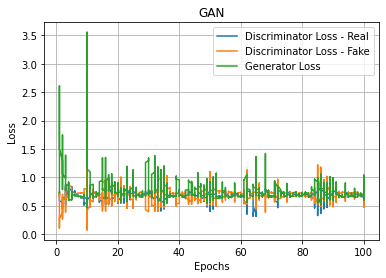

<Figure size 432x288 with 0 Axes>

In [7]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    #generator.add(Dense(units=2048))
    #generator.add(LeakyReLU(0.2))
    
    #generator.add(Dense(units=5096))
    #generator.add(LeakyReLU(0.2))
        
    generator.add(Dense(units=samples.shape[1], activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=samples.shape[1]))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

def training(epochs=1, batch_size=10):
    
    #Loading the data
    X_train = samples
    batch_count = X_train.shape[0] / batch_size
    
    # Array initialization for logging of the losses
    d_loss_logs_r = []
    d_loss_logs_f = []
    g_loss_logs = []
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            y_fake = np.zeros(batch_size)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            y_real = np.ones(batch_size)
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            d_loss_real = discriminator.train_on_batch(image_batch, y_real)
            d_loss_fake = discriminator.train_on_batch(generated_images, y_fake)
            #d_loss_comb = discriminator.train_on_batch(X, y_dis)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            g_loss = gan.train_on_batch(noise, y_gen)
            
            # print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (e, d_loss_real, 100*d_loss_fake, g_loss))
            
            # Store the losses
            d_loss_logs_r.append([e, d_loss_real])
            d_loss_logs_f.append([e, d_loss_fake])
            g_loss_logs.append([e, g_loss])
            
        # end of training    
        d_loss_logs_r_a = np.array(d_loss_logs_r)
        d_loss_logs_f_a = np.array(d_loss_logs_f)
        g_loss_logs_a = np.array(g_loss_logs)

    # At the end of training plot the losses vs epochs
    plt.plot(d_loss_logs_r_a[:,0], d_loss_logs_r_a[:,1], label="Discriminator Loss - Real")
    plt.plot(d_loss_logs_f_a[:,0], d_loss_logs_f_a[:,1], label="Discriminator Loss - Fake")
    plt.plot(g_loss_logs_a[:,0], g_loss_logs_a[:,1], label="Generator Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('GAN')
    plt.grid(True)
    plt.show()
    plt.savefig('GANFIT_1.png')
        #if e == 1 or e % 20 == 0:
           #plot_generated_images(e, generator)
            
training(100,50)

g.save('generator_2.h5')
d.save('discriminator_2.h5')


In [8]:
def compute_port_VaR(port_weights, var_hor, ret_samples):

    # create list to store values of portfolio returns
    port_returns = []
    # for each of the samples compute the returns to portfolio over the time horizon
    for num_samp in range(ret_samples.shape[0]):
        for ret_hor in range(ret_samples.shape[1]):
            
            end_ix = ret_hor + var_hor
            # check where the pattern ends
            if end_ix > ret_samples.shape[1]:
                break
            
            # get the subset of returns
            temp = ret_samples[num_samp, ret_hor:end_ix,:]
            if var_hor > 1:
                temp = np.cumprod((temp + 1), axis =0)
                temp = np.dot(temp[len(temp)-1], port_weights) -1
                port_returns.append(temp)
            else:
                port_returns.append(np.dot(temp, port_weights))
    
    return np.array(port_returns)


In [9]:
init_weights = np.random.uniform(0,1,test.shape[1])
# portfolio weights must add up to 1
init_weights = init_weights / sum(init_weights)

# now generate 100000 samples and compute the VaR for various horizons and save them
g = load_model('generator_2.h5')
noise= np.random.normal(0,1,[10000,100])
ret_samples = g.predict(noise)
ret_samples = ret_samples.reshape(ret_samples.shape[0],22,test.shape[1])
VaRList = list()
for i in range(1,21):
    tempvar = compute_port_VaR(init_weights, i, ret_samples)
    VaRList.append(tempvar)

In [10]:
e = 1
for v in VaRList:
    temp = np.sort(v,axis=None)
    f_VaR5 = temp[(int(len(v)*0.05))]
    f_VaR95 = temp[(int(len(v)*0.95))]
    print ("%d [5 VaR: %.2f%%, 95 VaR: %.2f%%]" %(e, f_VaR5*100, 100*f_VaR95))
    e = e + 1

1 [5 VaR: -31.92%, 95 VaR: 48.87%]
2 [5 VaR: -37.90%, 95 VaR: 79.81%]
3 [5 VaR: -42.77%, 95 VaR: 113.02%]
4 [5 VaR: -47.70%, 95 VaR: 149.69%]
5 [5 VaR: -51.30%, 95 VaR: 196.90%]
6 [5 VaR: -53.49%, 95 VaR: 248.01%]
7 [5 VaR: -55.07%, 95 VaR: 292.91%]
8 [5 VaR: -56.15%, 95 VaR: 348.78%]
9 [5 VaR: -56.14%, 95 VaR: 408.44%]
10 [5 VaR: -53.62%, 95 VaR: 463.15%]
11 [5 VaR: -51.99%, 95 VaR: 509.50%]
12 [5 VaR: -49.10%, 95 VaR: 537.15%]
13 [5 VaR: -45.42%, 95 VaR: 572.77%]
14 [5 VaR: -43.01%, 95 VaR: 563.39%]
15 [5 VaR: -40.73%, 95 VaR: 578.13%]
16 [5 VaR: -36.34%, 95 VaR: 657.57%]
17 [5 VaR: -33.10%, 95 VaR: 770.42%]
18 [5 VaR: -30.35%, 95 VaR: 845.21%]
19 [5 VaR: -30.84%, 95 VaR: 997.94%]
20 [5 VaR: -23.68%, 95 VaR: 1118.85%]


In [16]:
# now compute VaR just using real data
ret_samples = samples.reshape(samples.shape[0],22,test.shape[1])
dVaRList = list()
for i in range(1,21):
    tempvar = compute_port_VaR(init_weights, i, ret_samples)
    dVaRList.append(tempvar)

In [17]:
e = 1
for v in dVaRList:
    temp = np.sort(v,axis=None)
    f_VaR5 = temp[(int(len(v)*0.05))]
    f_VaR95 = temp[(int(len(v)*0.95))]
    print ("%d [5 VaR: %.2f%%, 95 VaR: %.2f%%]" %(e, f_VaR5*100, 100*f_VaR95))
    e = e+ 1

1 [5 VaR: -3.98%, 95 VaR: 4.60%]
2 [5 VaR: -5.83%, 95 VaR: 6.95%]
3 [5 VaR: -7.08%, 95 VaR: 8.46%]
4 [5 VaR: -7.93%, 95 VaR: 9.75%]
5 [5 VaR: -8.83%, 95 VaR: 10.78%]
6 [5 VaR: -9.54%, 95 VaR: 11.55%]
7 [5 VaR: -10.08%, 95 VaR: 12.43%]
8 [5 VaR: -10.75%, 95 VaR: 13.33%]
9 [5 VaR: -11.52%, 95 VaR: 13.91%]
10 [5 VaR: -11.57%, 95 VaR: 14.73%]
11 [5 VaR: -12.43%, 95 VaR: 15.37%]
12 [5 VaR: -12.79%, 95 VaR: 16.14%]
13 [5 VaR: -13.08%, 95 VaR: 16.83%]
14 [5 VaR: -13.70%, 95 VaR: 17.26%]
15 [5 VaR: -14.06%, 95 VaR: 17.52%]
16 [5 VaR: -14.44%, 95 VaR: 18.17%]
17 [5 VaR: -14.88%, 95 VaR: 18.94%]
18 [5 VaR: -14.91%, 95 VaR: 19.45%]
19 [5 VaR: -15.48%, 95 VaR: 20.54%]
20 [5 VaR: -15.97%, 95 VaR: 21.79%]


In [83]:
v = dVaRList[0]
temp = np.sort(v,axis=None)
len(v)

110704

In [63]:
tempvar = compute_port_VaR(init_weights, 1, ret_samples)
tempvar = np.array(tempvar)

In [64]:
tempvar = np.sort(tempvar,axis=0)


In [13]:
init_weights = np.random.uniform(0,1,test.shape[1])
# portfolio weights must add up to 1
init_weights = init_weights / sum(init_weights)

In [14]:
# now compute VaR just using real data
dVaRList = list()
for i in range(1,21):
    ret_mat = test.shift(-1*i)/test -1
    ret_mat.drop(ret_mat.tail(i).index,inplace=True)
    tempvar = np.dot(ret_mat.values,init_weights)
    dVaRList.append(tempvar)

In [15]:
x = init_weights.reshape(init_weights.shape[0],1)
i = 1
ret_mat = test.shift(-1*i)/test -1
ret_mat.drop(ret_mat.tail(i).index,inplace=True)
tempvar = np.dot(ret_mat.values,init_weights)
tempvar.shape

(5054,)

In [72]:
tempvar

array([        nan,         nan,         nan, ..., 16.0636912 ,
       -1.55394215,  0.22985371])